In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt

<h4>ابتدا همه رستوران ها را براساس risk category طبقه بندی می کنیم<h4>

In [2]:
df = pd.read_csv('Food_Establishment_Inspection_Data.csv',low_memory=False)
df[['capacity','Risk_category']]= df.Description.str.split(" - ",expand=True)
df.head(1)

Name Program Identifier Inspection Date  \
0  #807 TUTTA BELLA   #807 TUTTA BELLA      08/31/2022   

                        Description          Address     City Zip Code  \
0  Seating 0-12 - Risk Category III  2746 NE 45TH ST  SEATTLE    98105   

            Phone   Longitude   Latitude  ... Inspection Closed Business  \
0  (206) 722-6400 -122.296415  47.662311  ...                      False   

  Violation Type                              Violation Description  \
0           BLUE  3200 - Insects, rodents, animals not present; ...   

  Violation Points Business_ID Inspection_Serial_Num Violation_Record_ID  \
0                5   PR0089260             DAEEWQC0L           IVQ7QYW2V   

   Grade      capacity      Risk_category  
0    1.0  Seating 0-12  Risk Category III  

[1 rows x 24 columns]

In [3]:
df['Inspection Date']=pd.to_datetime(df['Inspection Date'])

df['year']=pd.DatetimeIndex(df['Inspection Date']).year

# Risk 3


In [20]:
R3=df.loc[df['Risk_category']=='Risk Category III']

تعداد رستوران ها در هر شهر که براساس risk category 3 وجود دارند حساب شده است

In [110]:


resturans3=R3.groupby(['City','year'],as_index=False).count()
resturans_incities3=resturans3[['year','City','Business_ID']]
resturans_incities3



year         City  Business_ID
0     2007.0       ALGONA            7
1     2008.0       ALGONA            9
2     2009.0       ALGONA           13
3     2010.0       ALGONA           11
4     2011.0       ALGONA           12
...      ...          ...          ...
1119  2019.0  Woodinville           56
1120  2020.0  Woodinville           15
1121  2021.0  Woodinville           23
1122  2022.0  Woodinville           36
1123  2022.0      seattle            6

[1124 rows x 3 columns]

تعداد بازرسی ها =inspection date

In [75]:
R3_final=R3.groupby(["year" ,'City'],as_index=False).count()
R3_final=R3_final[['year','City','Inspection Date']]
R3_final

year          City  Inspection Date
0     2006.0        AUBURN              145
1     2006.0        Auburn               87
2     2006.0      BELLEVUE              260
3     2006.0       BOTHELL               42
4     2006.0        BURIEN               79
...      ...           ...              ...
1119  2022.0        Vashon                6
1120  2022.0  WEST SEATTLE                1
1121  2022.0   WOODINVILLE              111
1122  2022.0   Woodinville               36
1123  2022.0       seattle                6

[1124 rows x 3 columns]

merge کردن

In [111]:
R3_final2=(pd.merge(left=R3_final , right= resturans_incities3 , left_on= "City" , right_on="City" , how = "inner" ))
R3_final2
# تعداد بازرسی ها تقسیم بر تعداد رستوران های هر شهر
R3_final2['inspection_per_rest']=R3_final2['Inspection Date']/R3_final2['Business_ID']
R3_final2

year_x              City  Inspection Date  year_y  Business_ID  \
0      2006.0            AUBURN              145  2006.0          145   
1      2006.0            AUBURN              145  2007.0          132   
2      2006.0            AUBURN              145  2008.0          166   
3      2006.0            AUBURN              145  2009.0          125   
4      2006.0            AUBURN              145  2010.0          170   
...       ...               ...              ...     ...          ...   
18457  2022.0  Lake Forest Park                2  2022.0            2   
18458  2022.0          PUYALLUP                3  2022.0            3   
18459  2022.0         Sammamish                2  2022.0            2   
18460  2022.0           Tukwila                2  2022.0            2   
18461  2022.0           seattle                6  2022.0            6   

       inspection_per_rest  
0                 1.000000  
1                 1.098485  
2                 0.873494  
3                 1.160000  
4                 0.852941  
...                    ...  
18457             1.000000  
18458             1.000000  
18459             1.000000  
18460             1.000000  
18461             1.000000  

[18462 rows x 6 columns]

In [27]:
import geopandas

In [55]:
Cities = geopandas.read_file("WSDOT_-_City_Limits.shp")

In [112]:
R3_final3=(pd.merge(left=R3_final2 , right= Cities , left_on= "City" , right_on="CityName" , how = "inner" ))
R3_final3

year_x              City  Inspection Date  year_y  Business_ID  \
0     2006.0            Auburn               87  2006.0           87   
1     2006.0            Auburn               87  2007.0           86   
2     2006.0            Auburn               87  2008.0           85   
3     2006.0            Auburn               87  2009.0           85   
4     2006.0            Auburn               87  2010.0           99   
...      ...               ...              ...     ...          ...   
6333  2022.0            Burien                7  2022.0            7   
6334  2022.0        Des Moines                6  2022.0            6   
6335  2022.0  Lake Forest Park                2  2022.0            2   
6336  2022.0         Sammamish                2  2022.0            2   
6337  2022.0           Tukwila                2  2022.0            2   

      inspection_per_rest  OBJECTID          CityName CountySeat  CityGNISPl  \
0                1.000000      9118            Auburn         no     2409755   
1                1.011628      9118            Auburn         no     2409755   
2                1.023529      9118            Auburn         no     2409755   
3                1.023529      9118            Auburn         no     2409755   
4                0.878788      9118            Auburn         no     2409755   
...                   ...       ...               ...        ...         ...   
6333             1.000000      9132            Burien         no     2409940   
6334             1.000000      9149        Des Moines         no     2410327   
6335             1.000000      9133  Lake Forest Park         no     2411603   
6336             1.000000      9126         Sammamish         no     2411772   
6337             1.000000      9141           Tukwila         no     2412106   

      LastUpdate CountyFIPS MajorCity CityFIPSLo OFMCityCod  \
0     2016-02-29      53033        no    5303180       0055   
1     2016-02-29      53033        no    5303180       0055   
2     2016-02-29      53033        no    5303180       0055   
3     2016-02-29      53033        no    5303180       0055   
4     2016-02-29      53033        no    5303180       0055   
...          ...        ...       ...        ...        ...   
6333  2010-05-31      53033        no    5308850       0139   
6334        None      53033        no    5317635       0325   
6335        None      53033        no    5337270       0657   
6336  2016-05-31      53033        no    5361115       1136   
6337  2013-02-28      53033        no    5372625       1320   

                                    GlobalID    SHAPESTAre     SHAPESTLen  \
0     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
1     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
2     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
3     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
4     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
...                                      ...           ...            ...   
6333  {98828B92-CCC5-4821-B5CD-215F7118DF43}  4.337970e+08  120258.882124   
6334  {F0D61528-AD2C-4D99-B7B6-368260B3656F}  1.787870e+08  101616.403806   
6335  {013D2421-523B-4772-9545-C3AF971E026D}  9.944533e+07   58546.726943   
6336  {A70E9F58-C724-4E74-A6A5-5DC06F1E18D2}  6.750803e+08  173274.426764   
6337  {A11B1934-334E-4C0F-B067-AE46F8B22F14}  2.663813e+08  131005.784319   

                                               geometry  
0     POLYGON ((-13606869.504 6000023.199, -13606614...  
1     POLYGON ((-13606869.504 6000023.199, -13606614...  
2     POLYGON ((-13606869.504 6000023.199, -13606614...  
3     POLYGON ((-13606869.504 6000023.199, -13606614...  
4     POLYGON ((-13606869.504 6000023.199, -13606614...  
...                                                 ...  
6333  POLYGON ((-13615228.277 6025179.539, -13615209...  
6334  POLYGON ((-13618326.512 6012

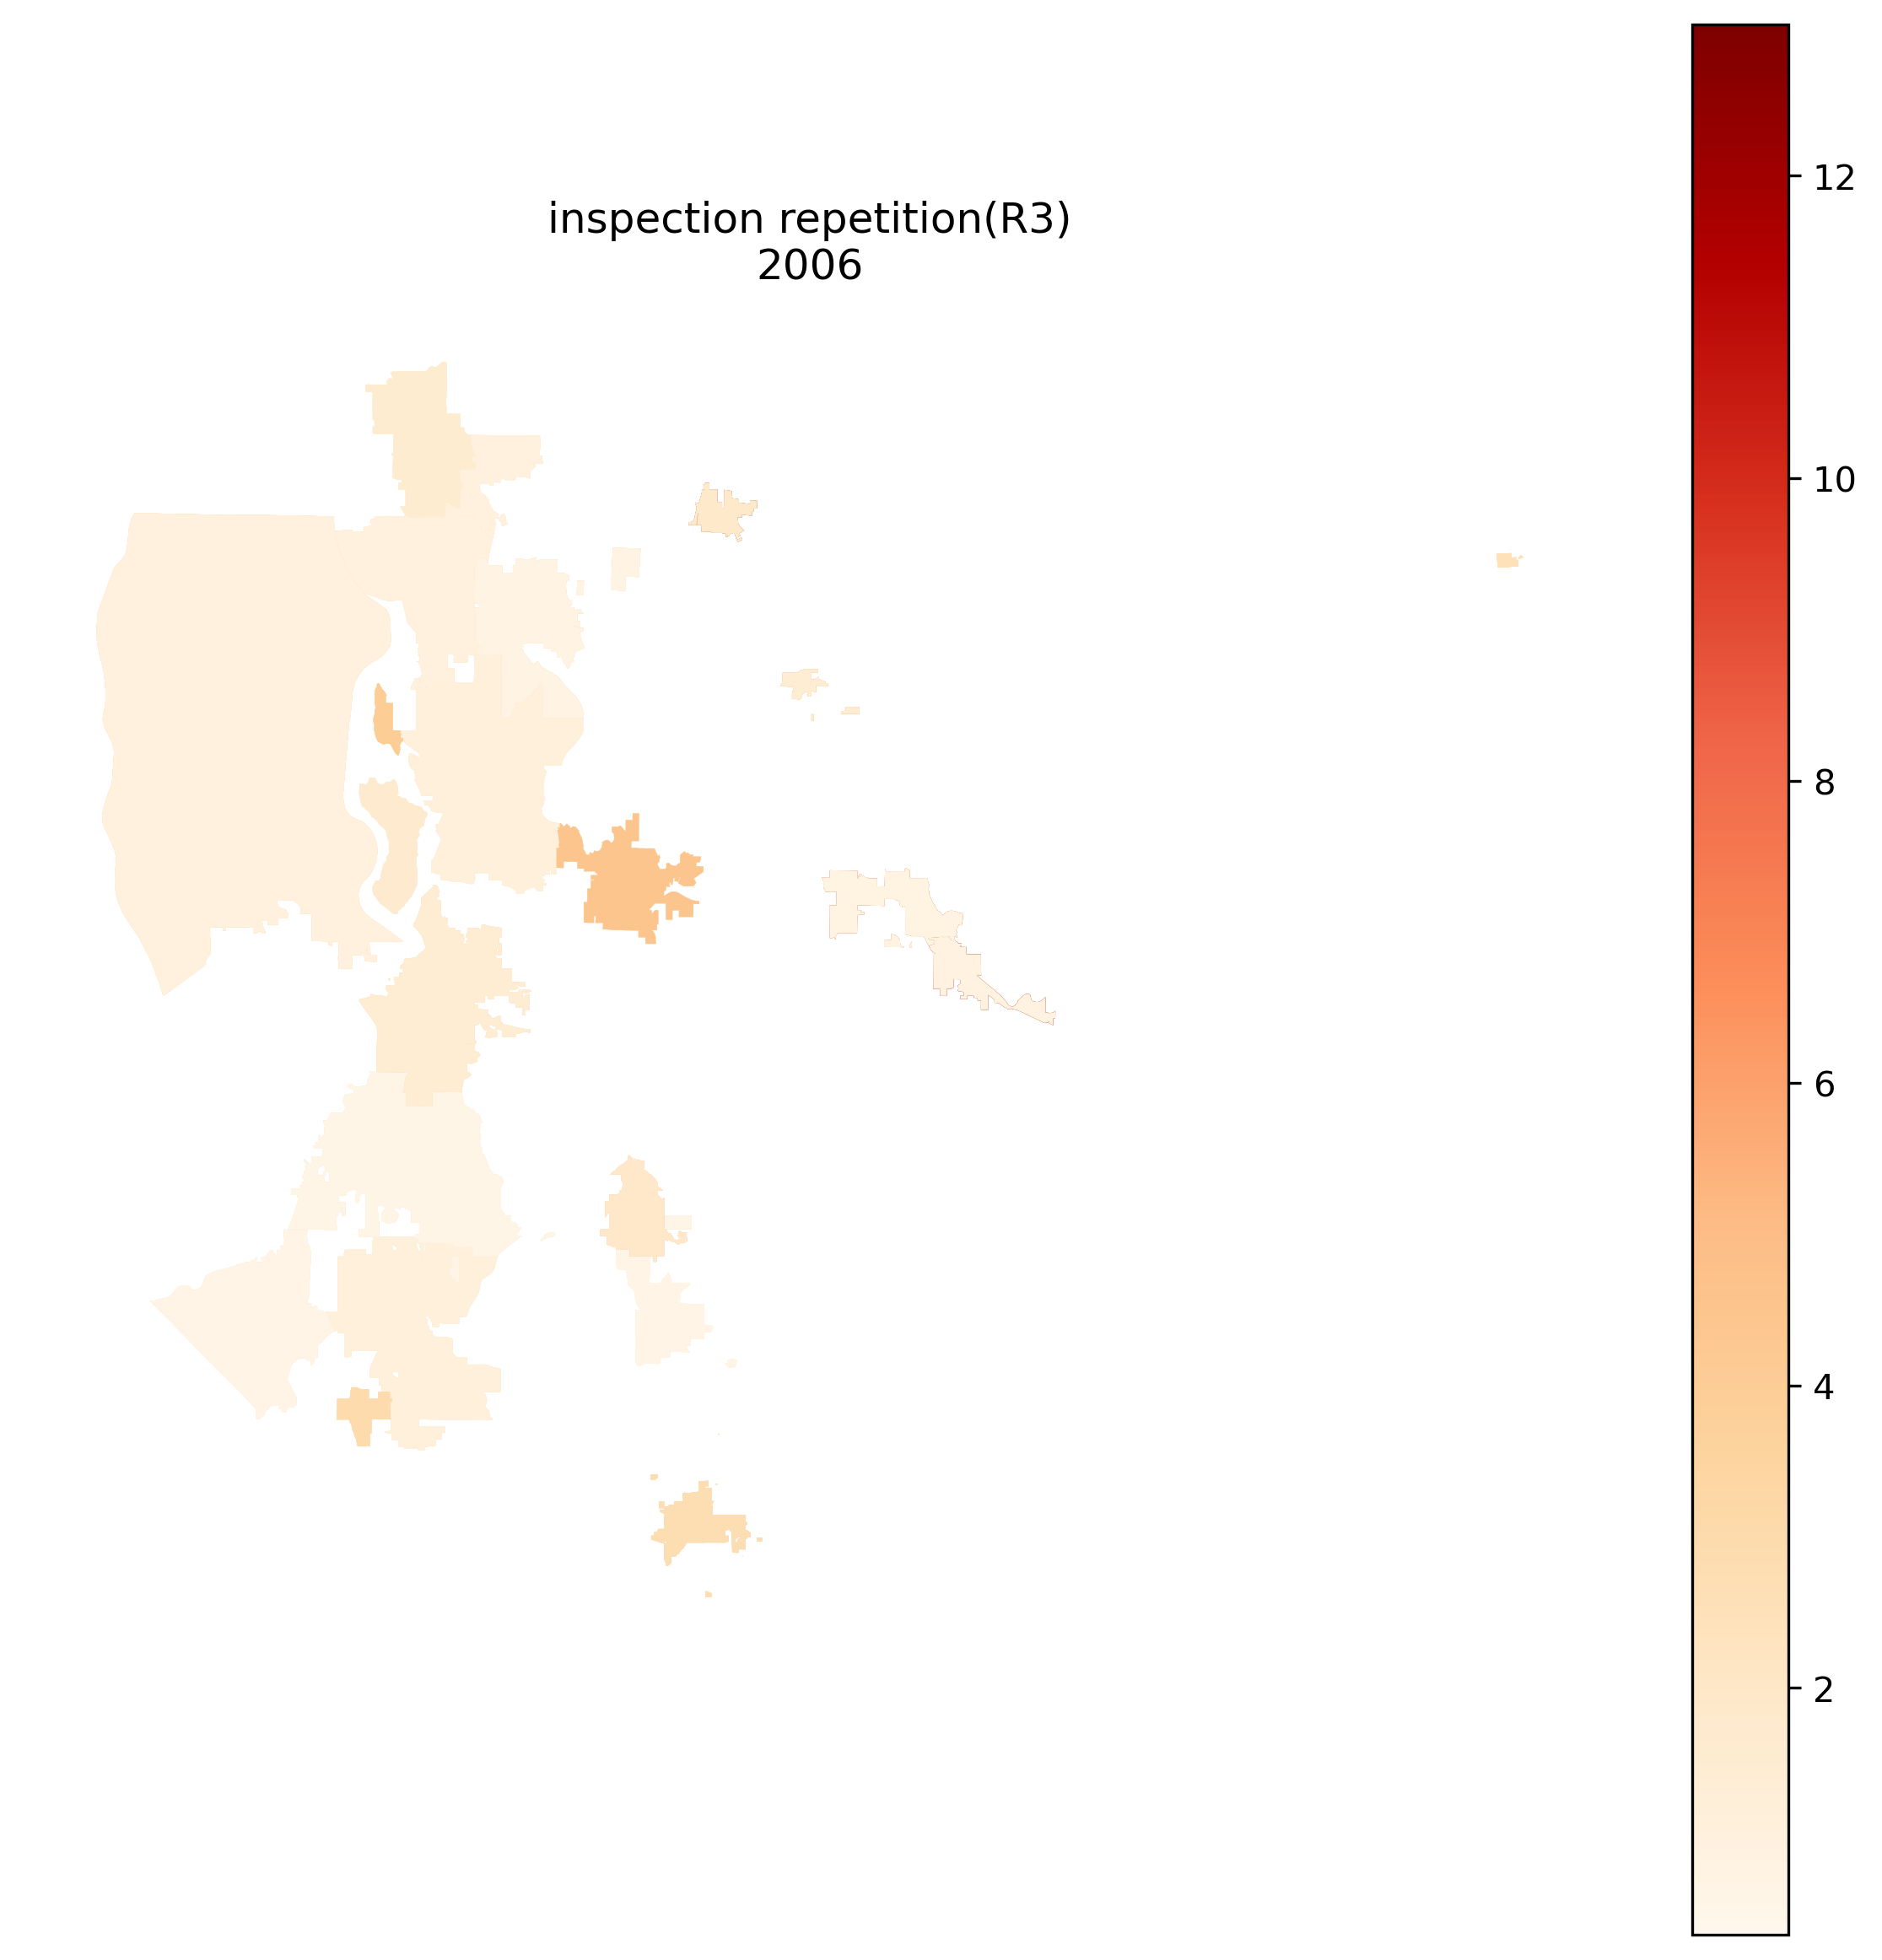

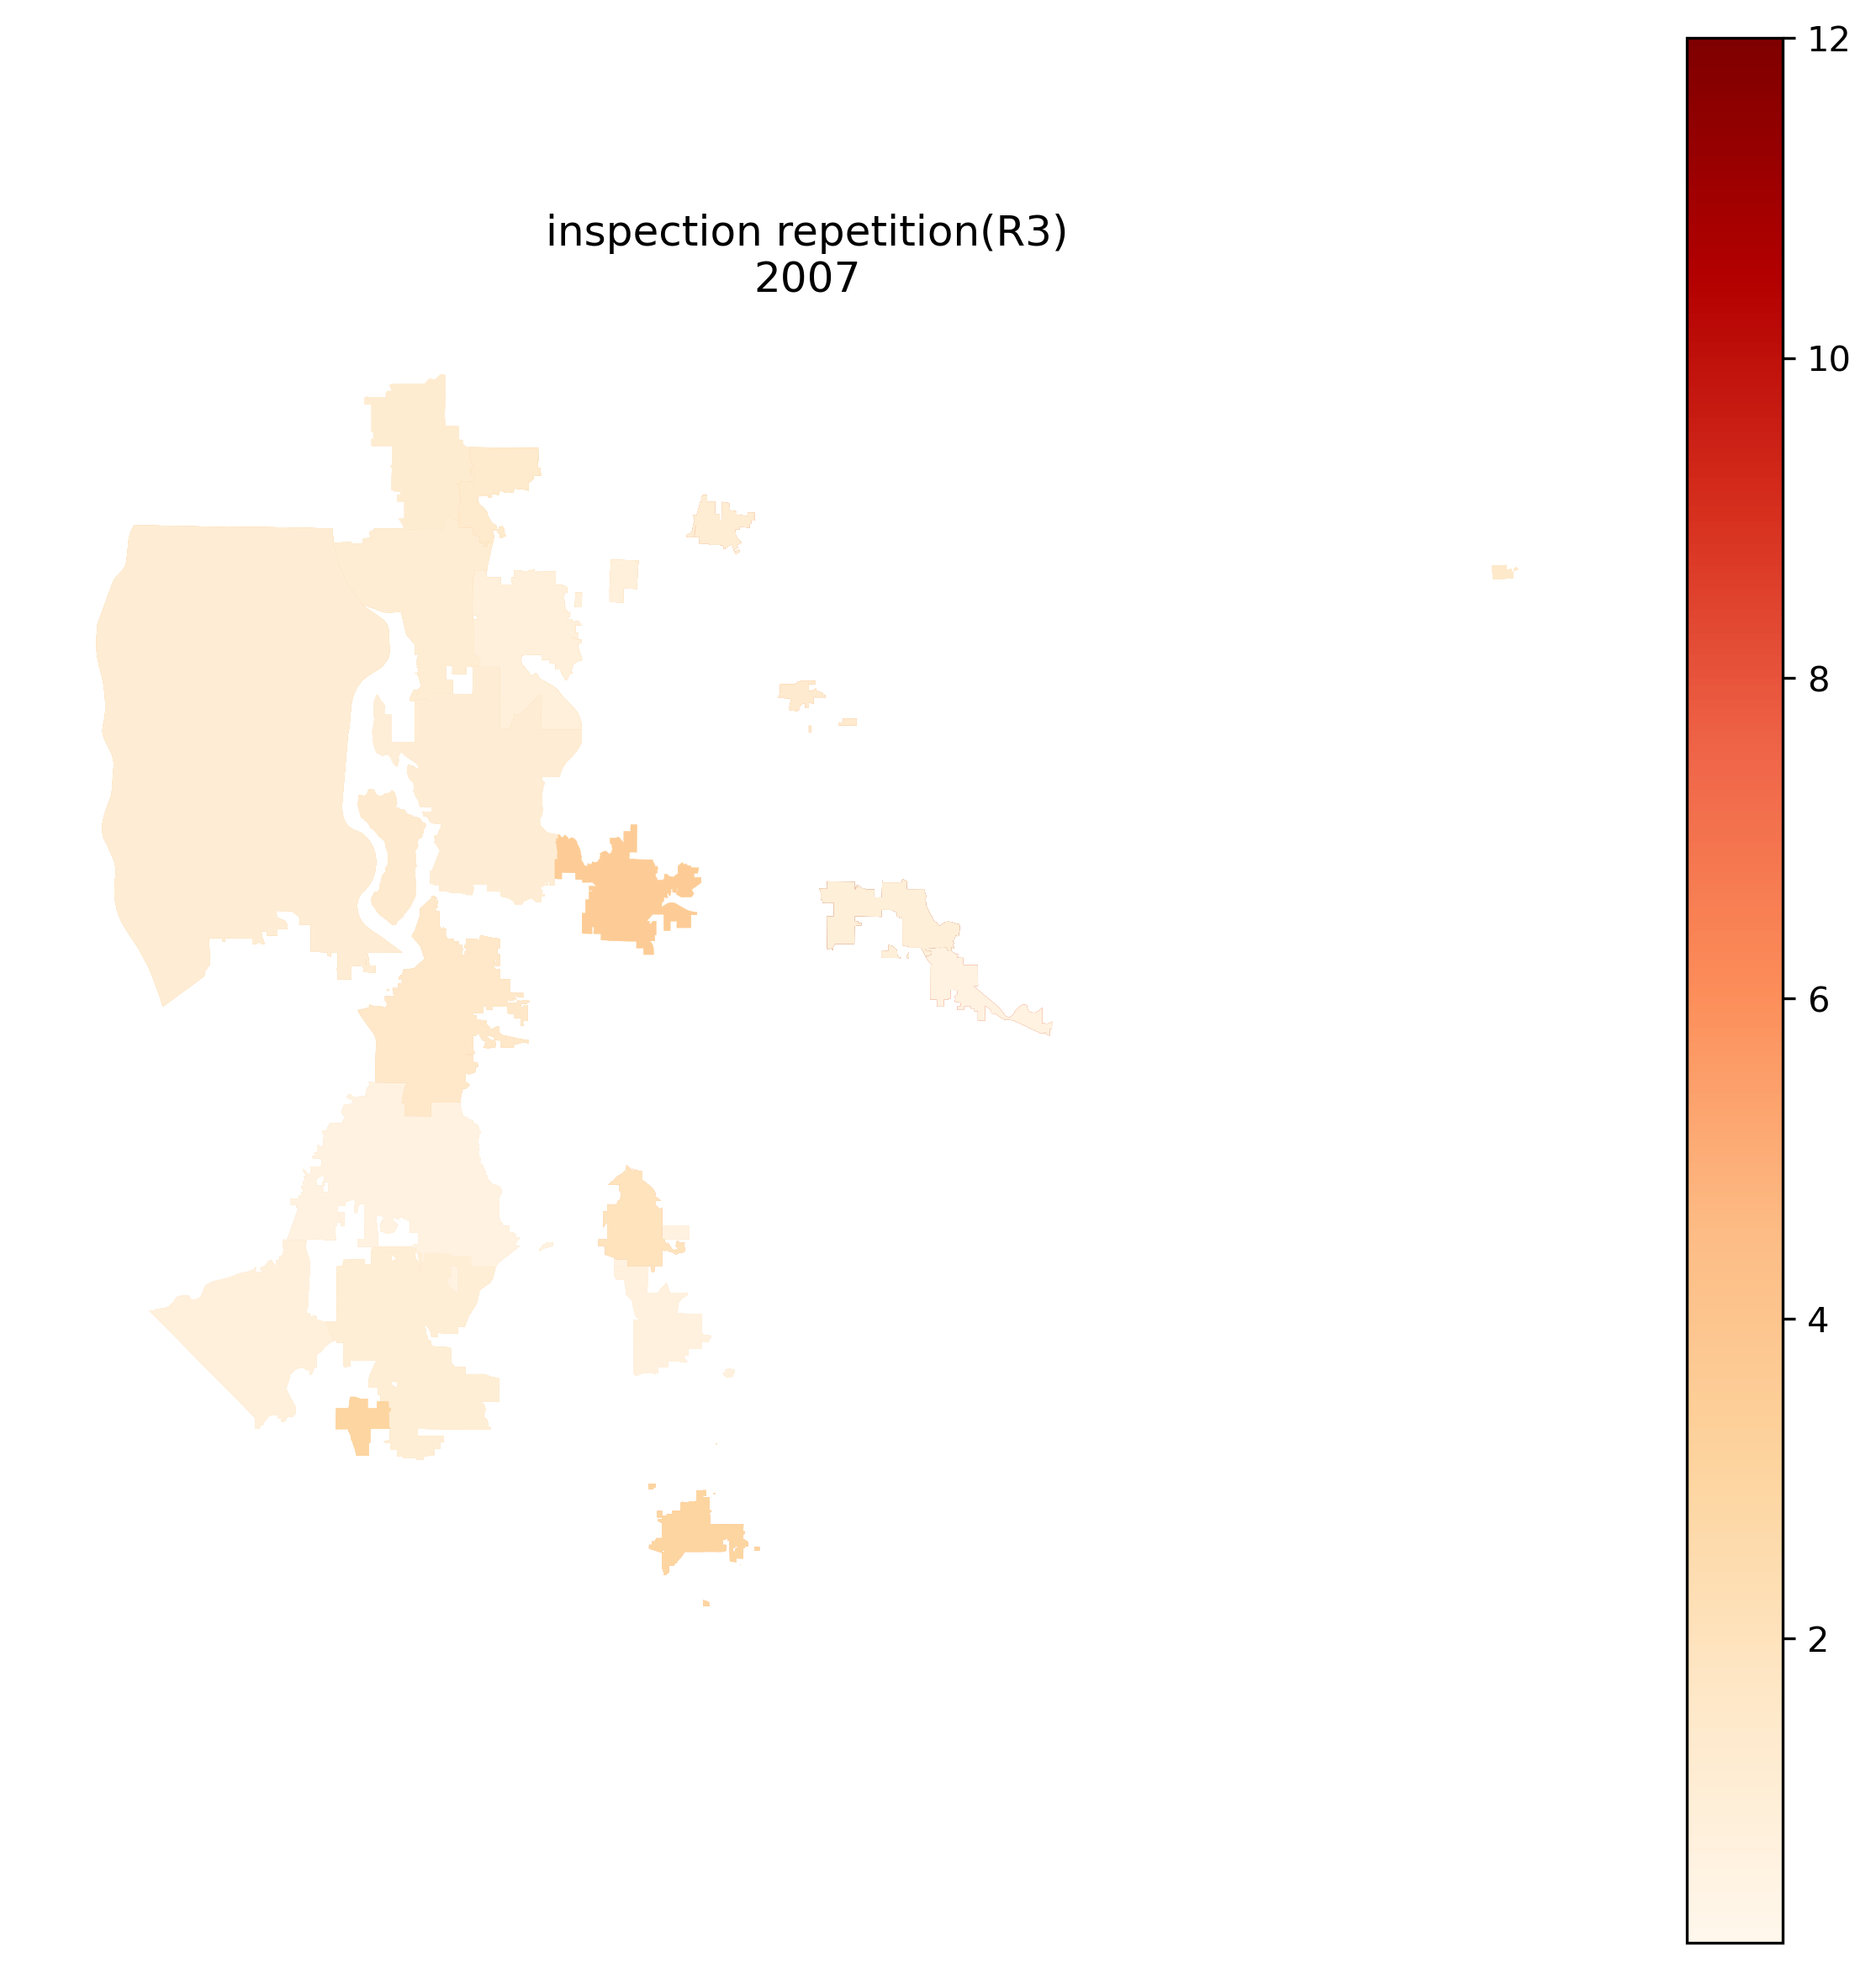

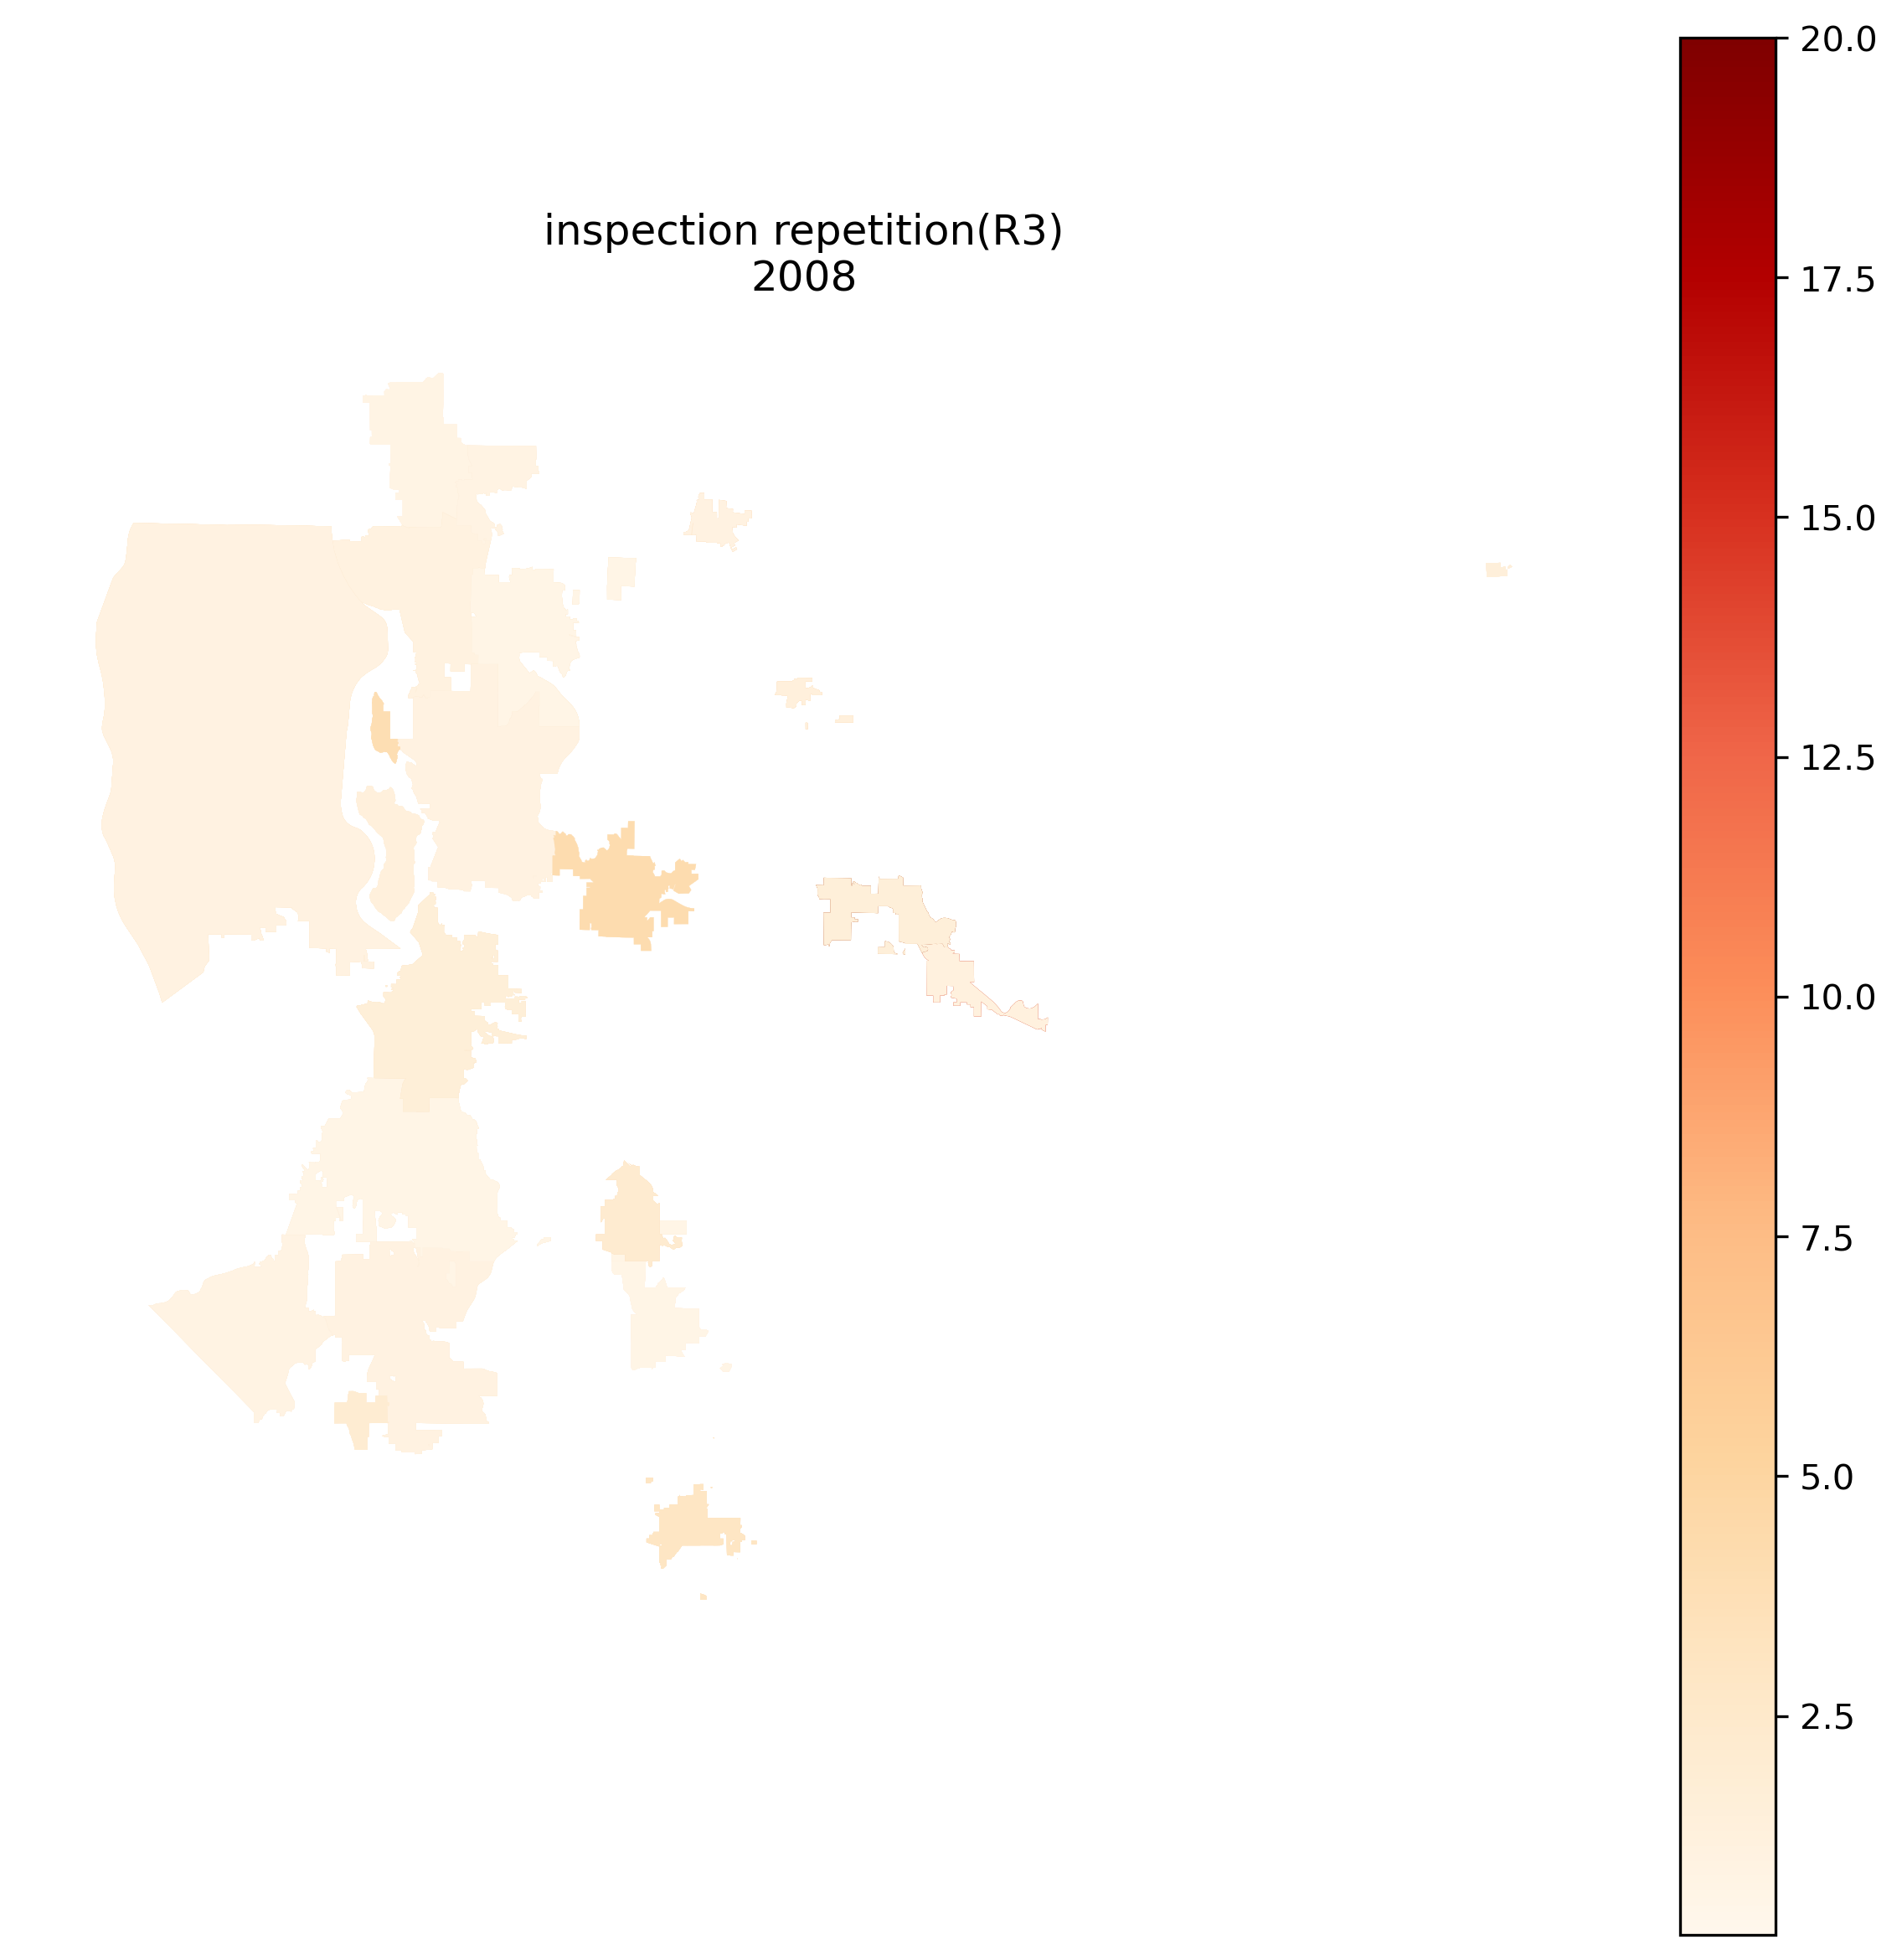

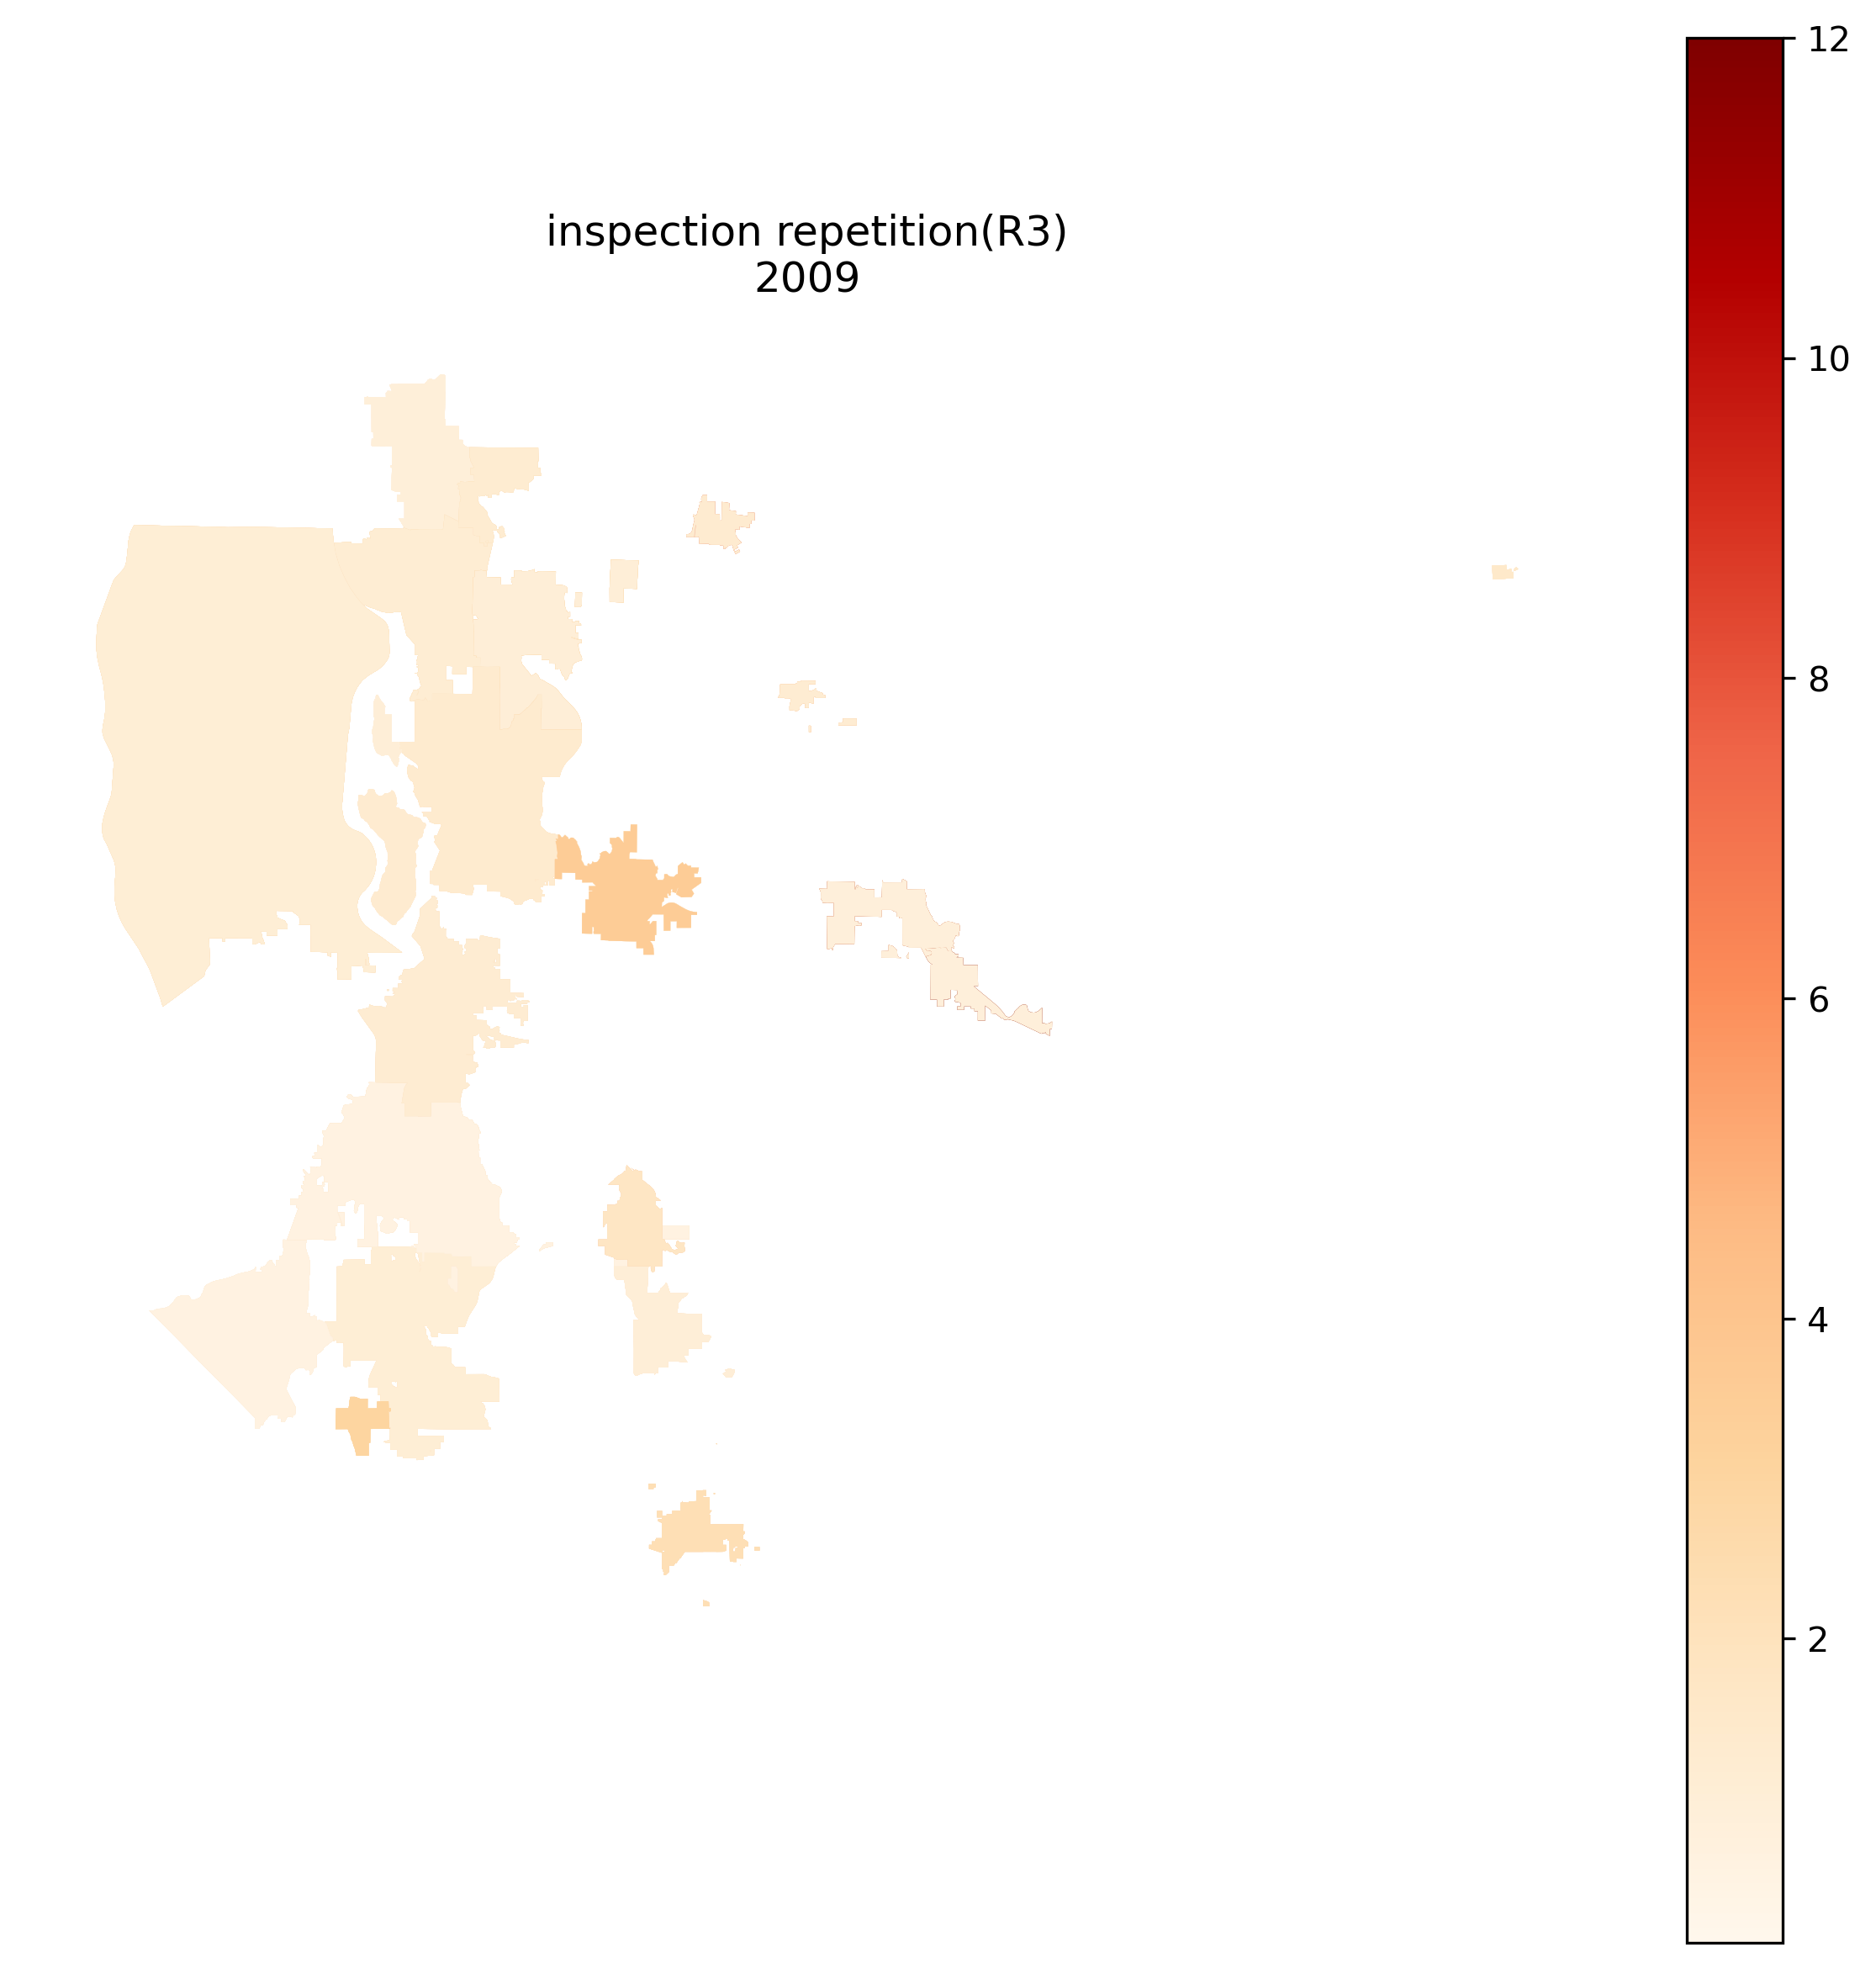

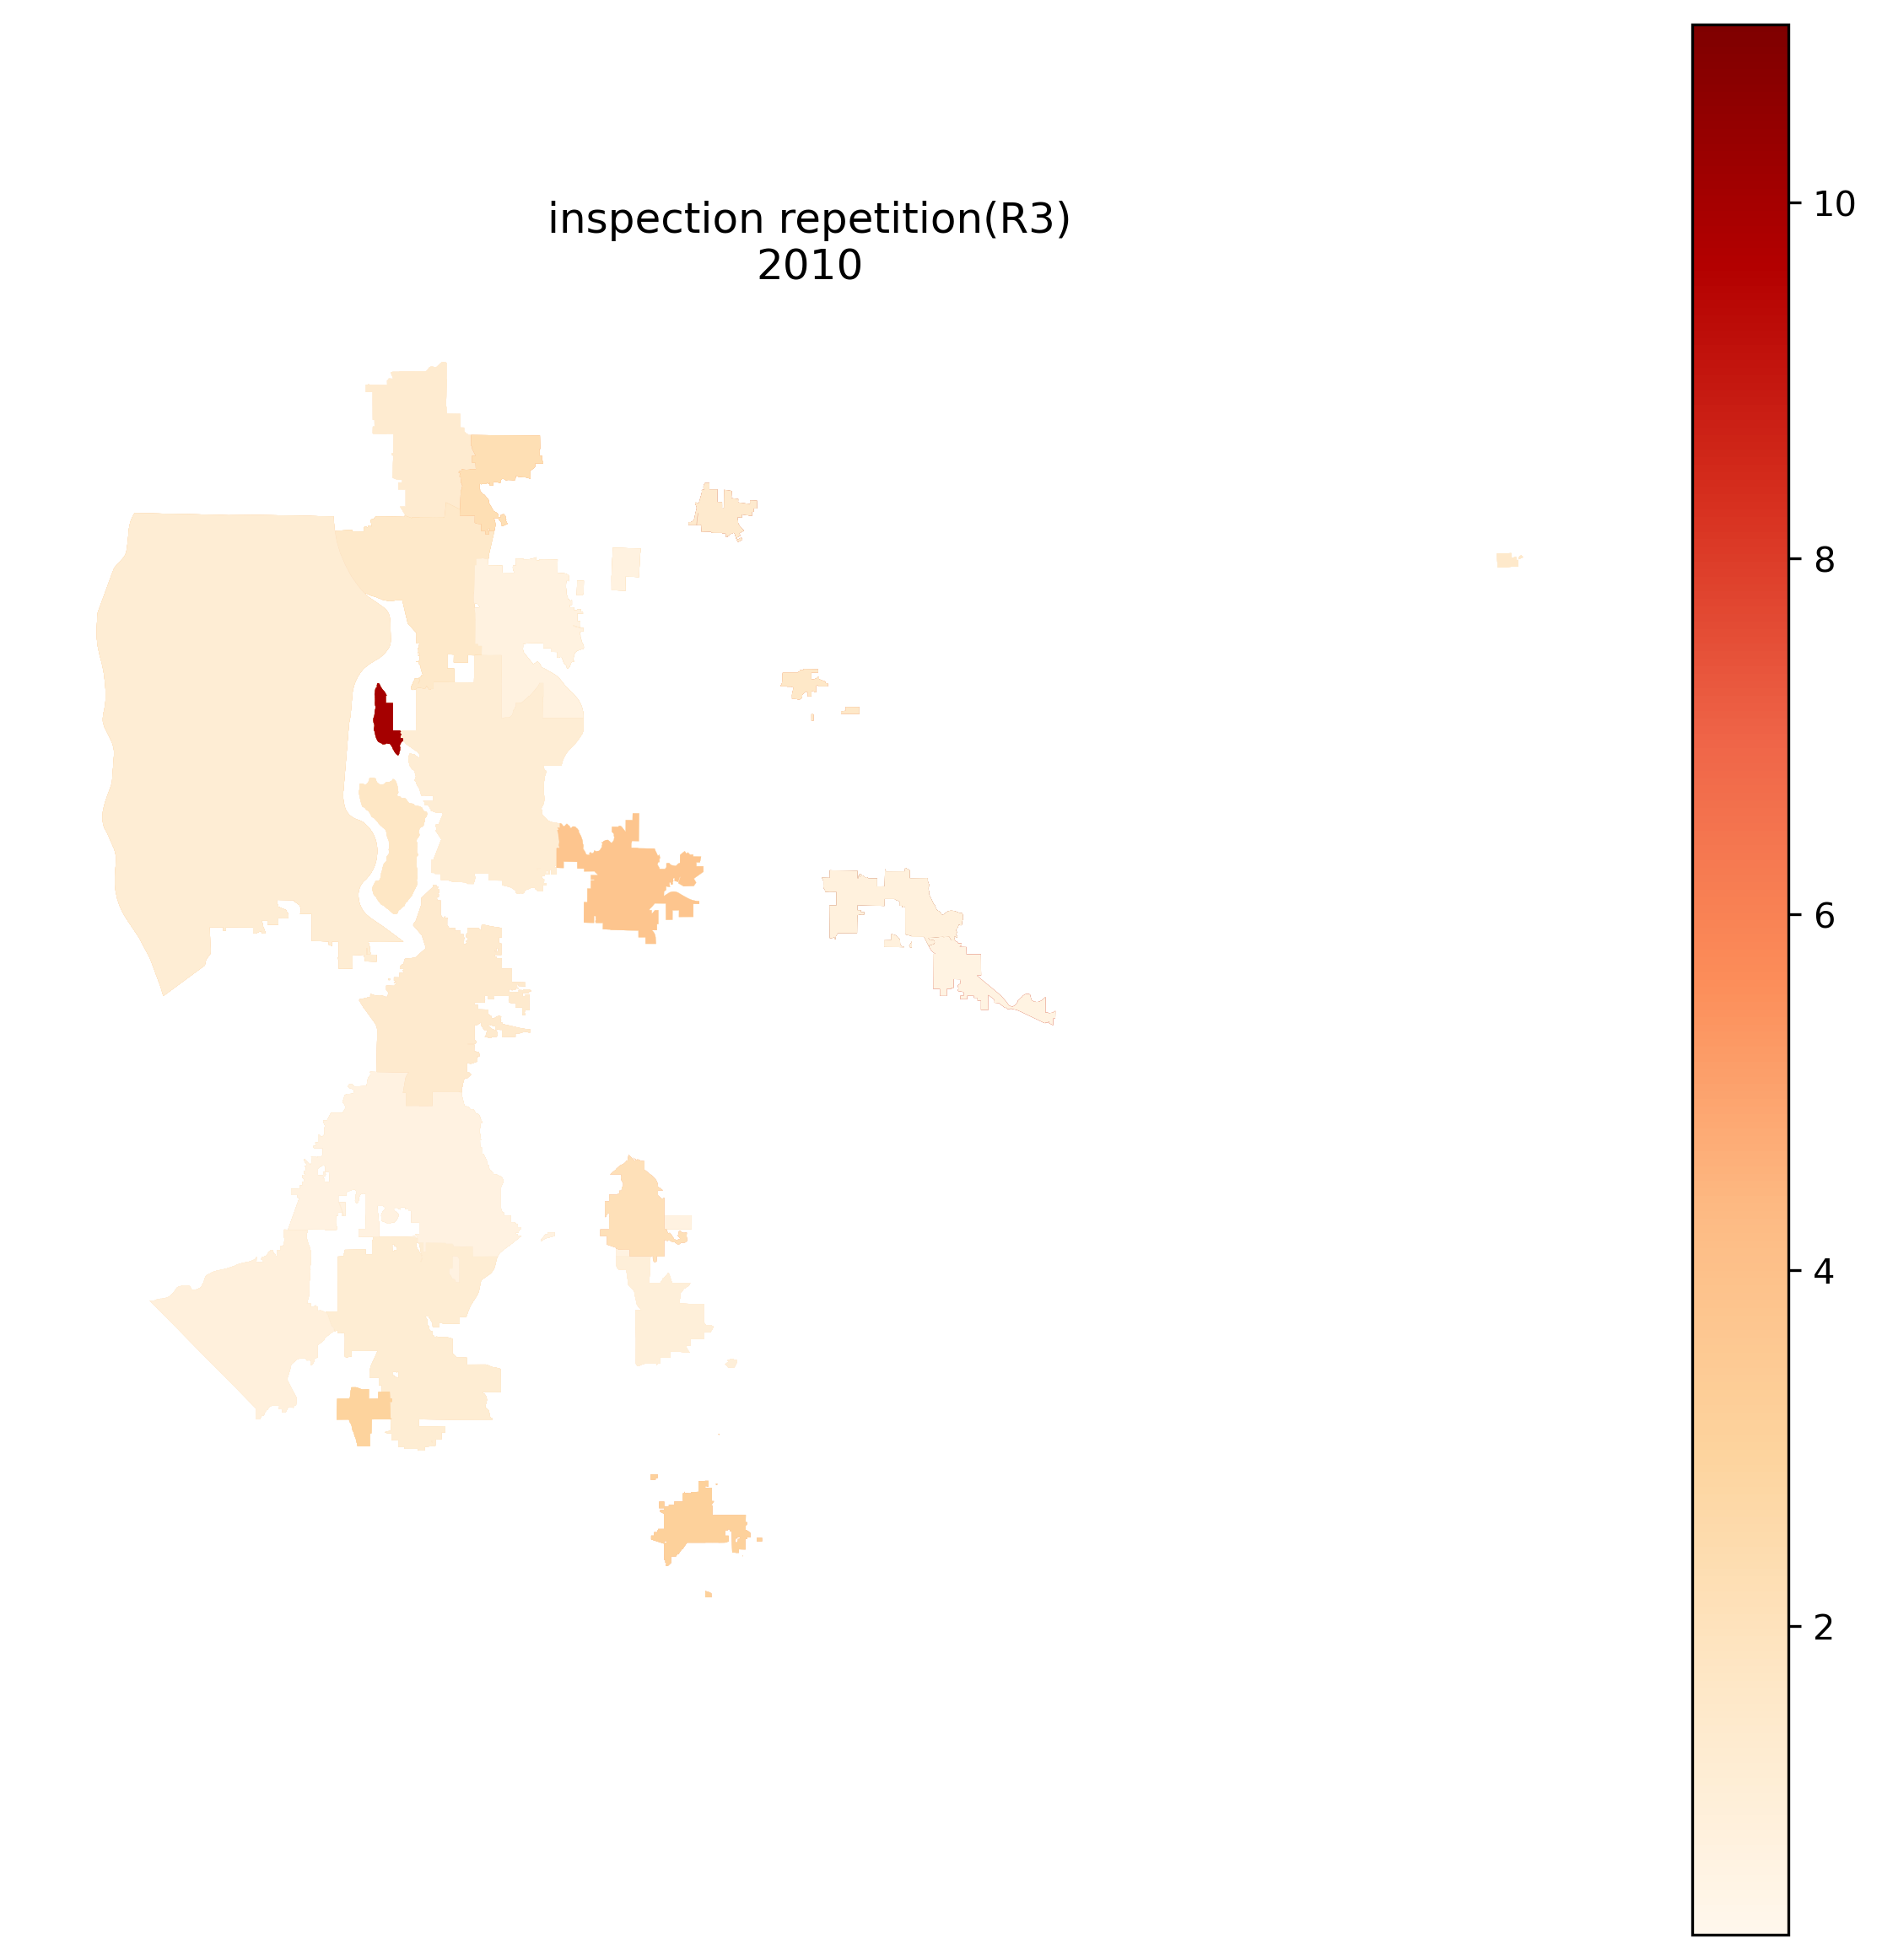

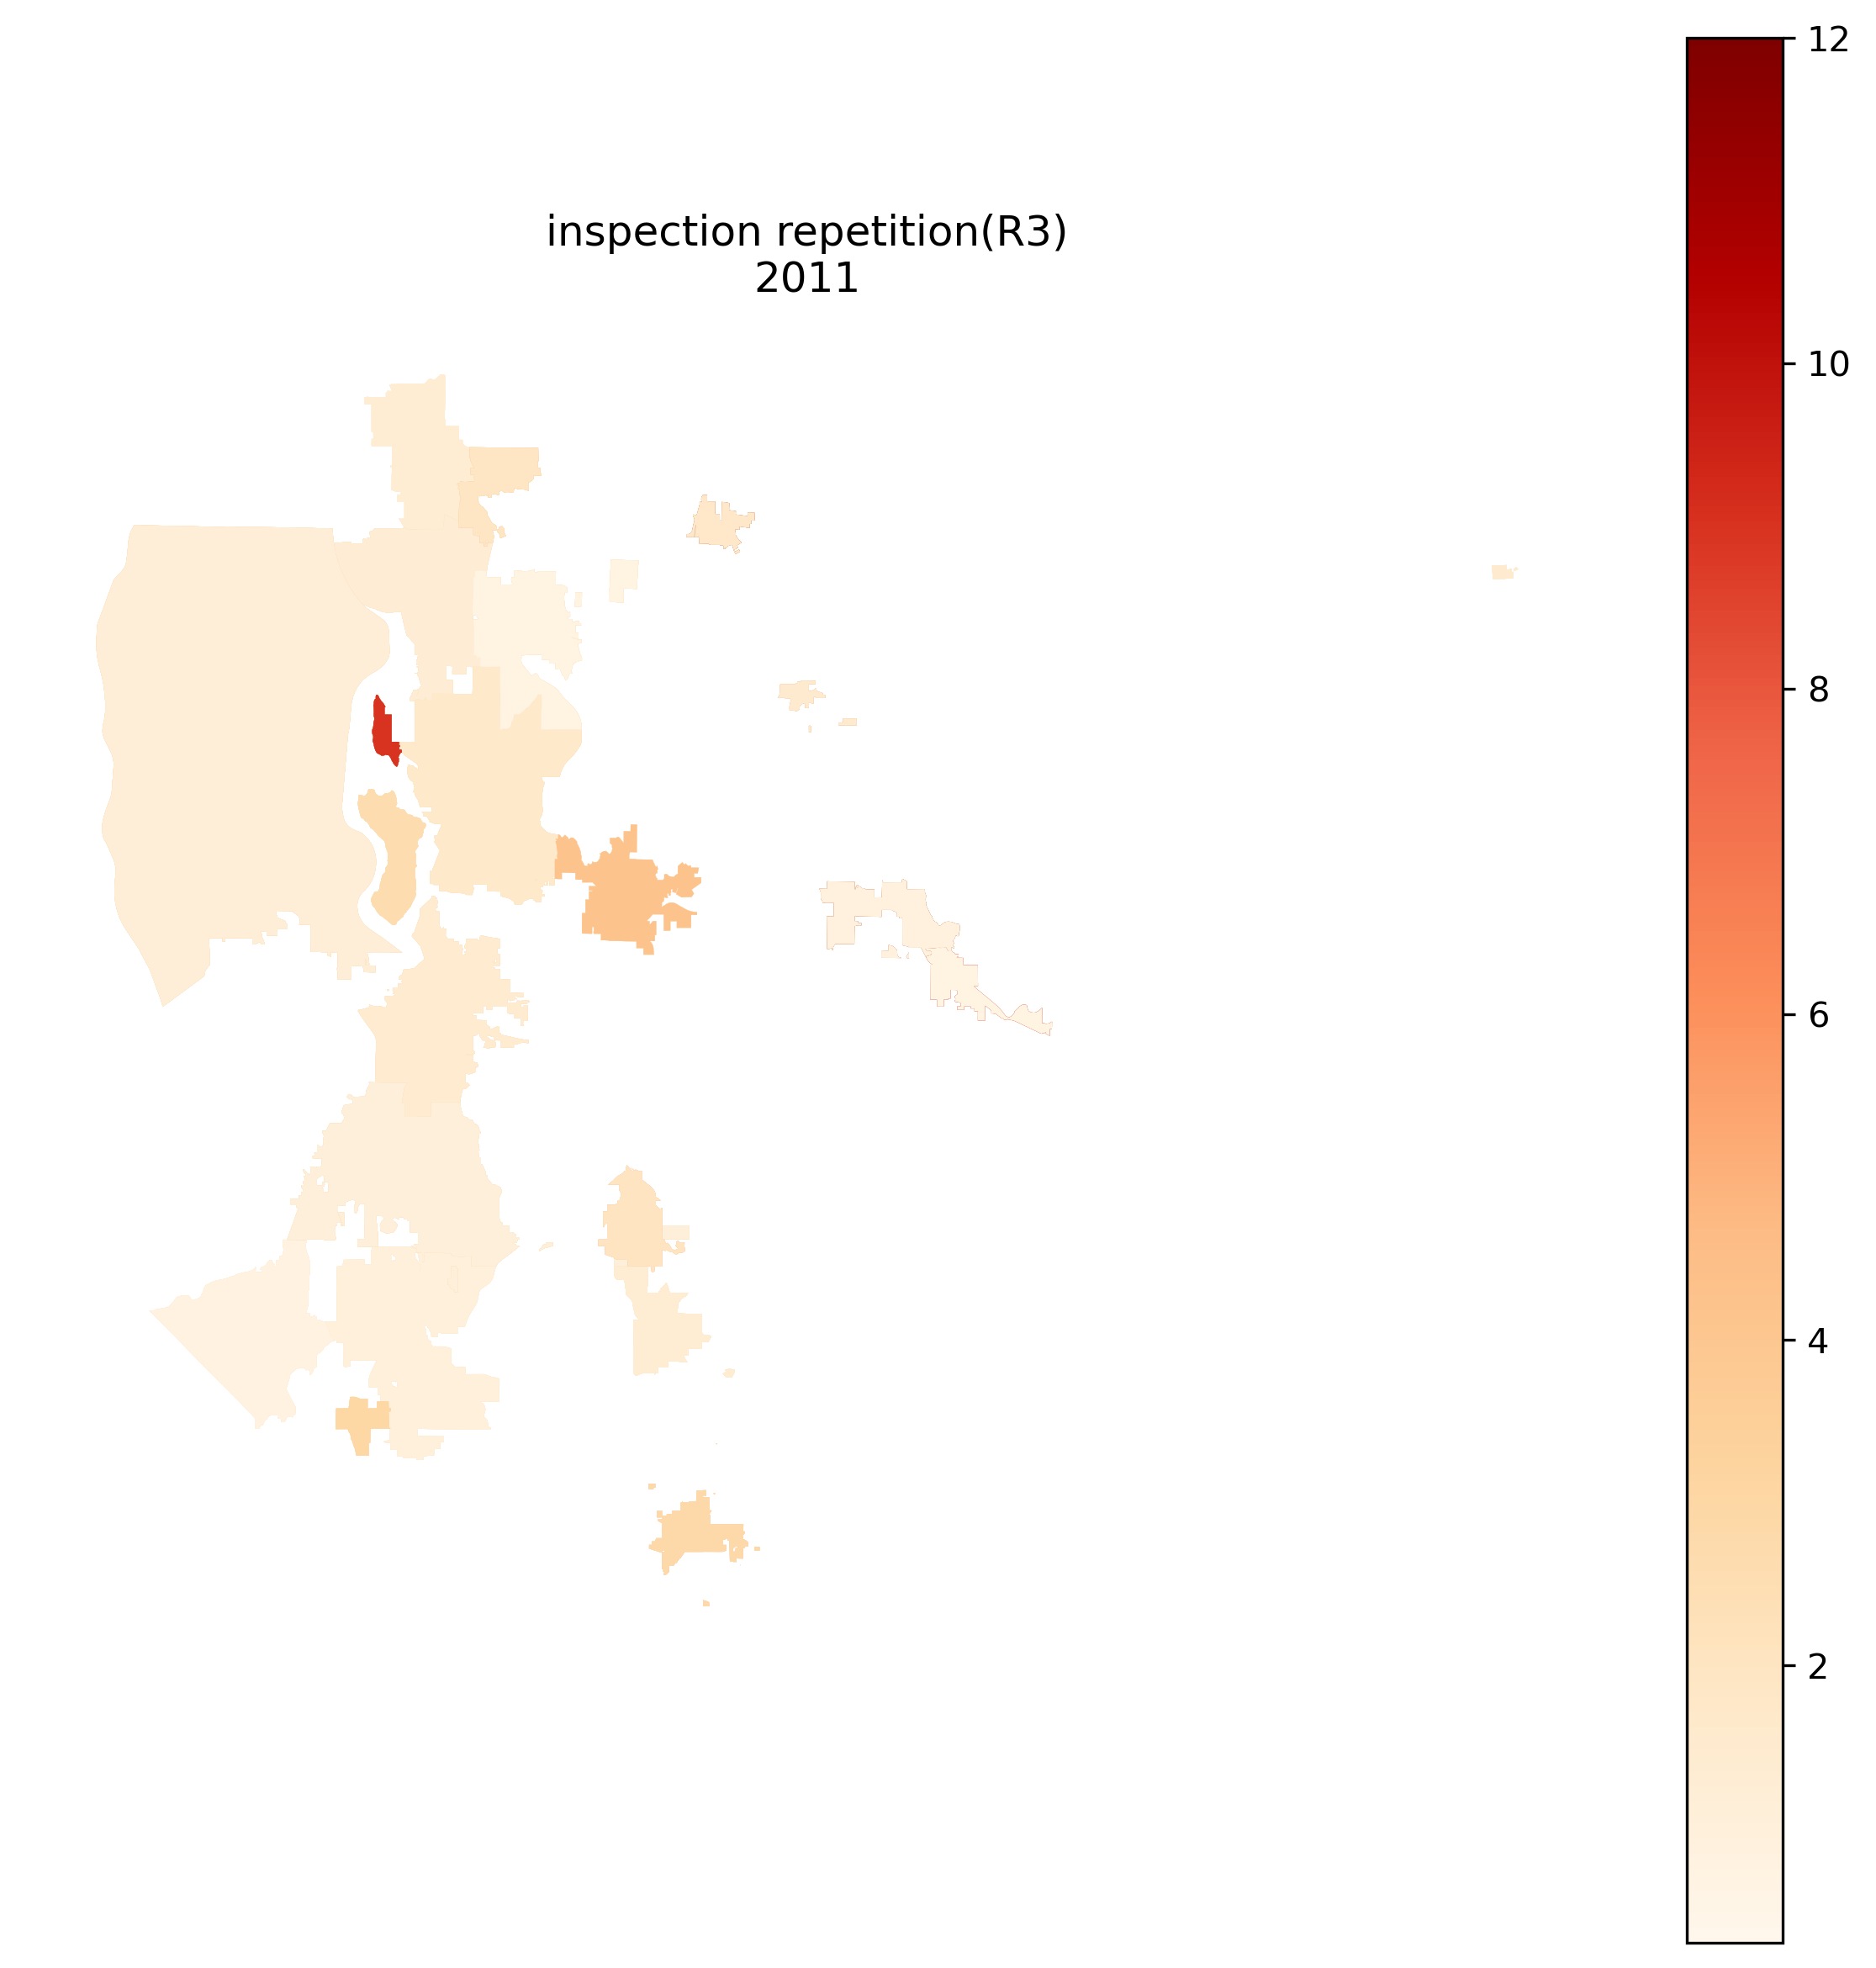

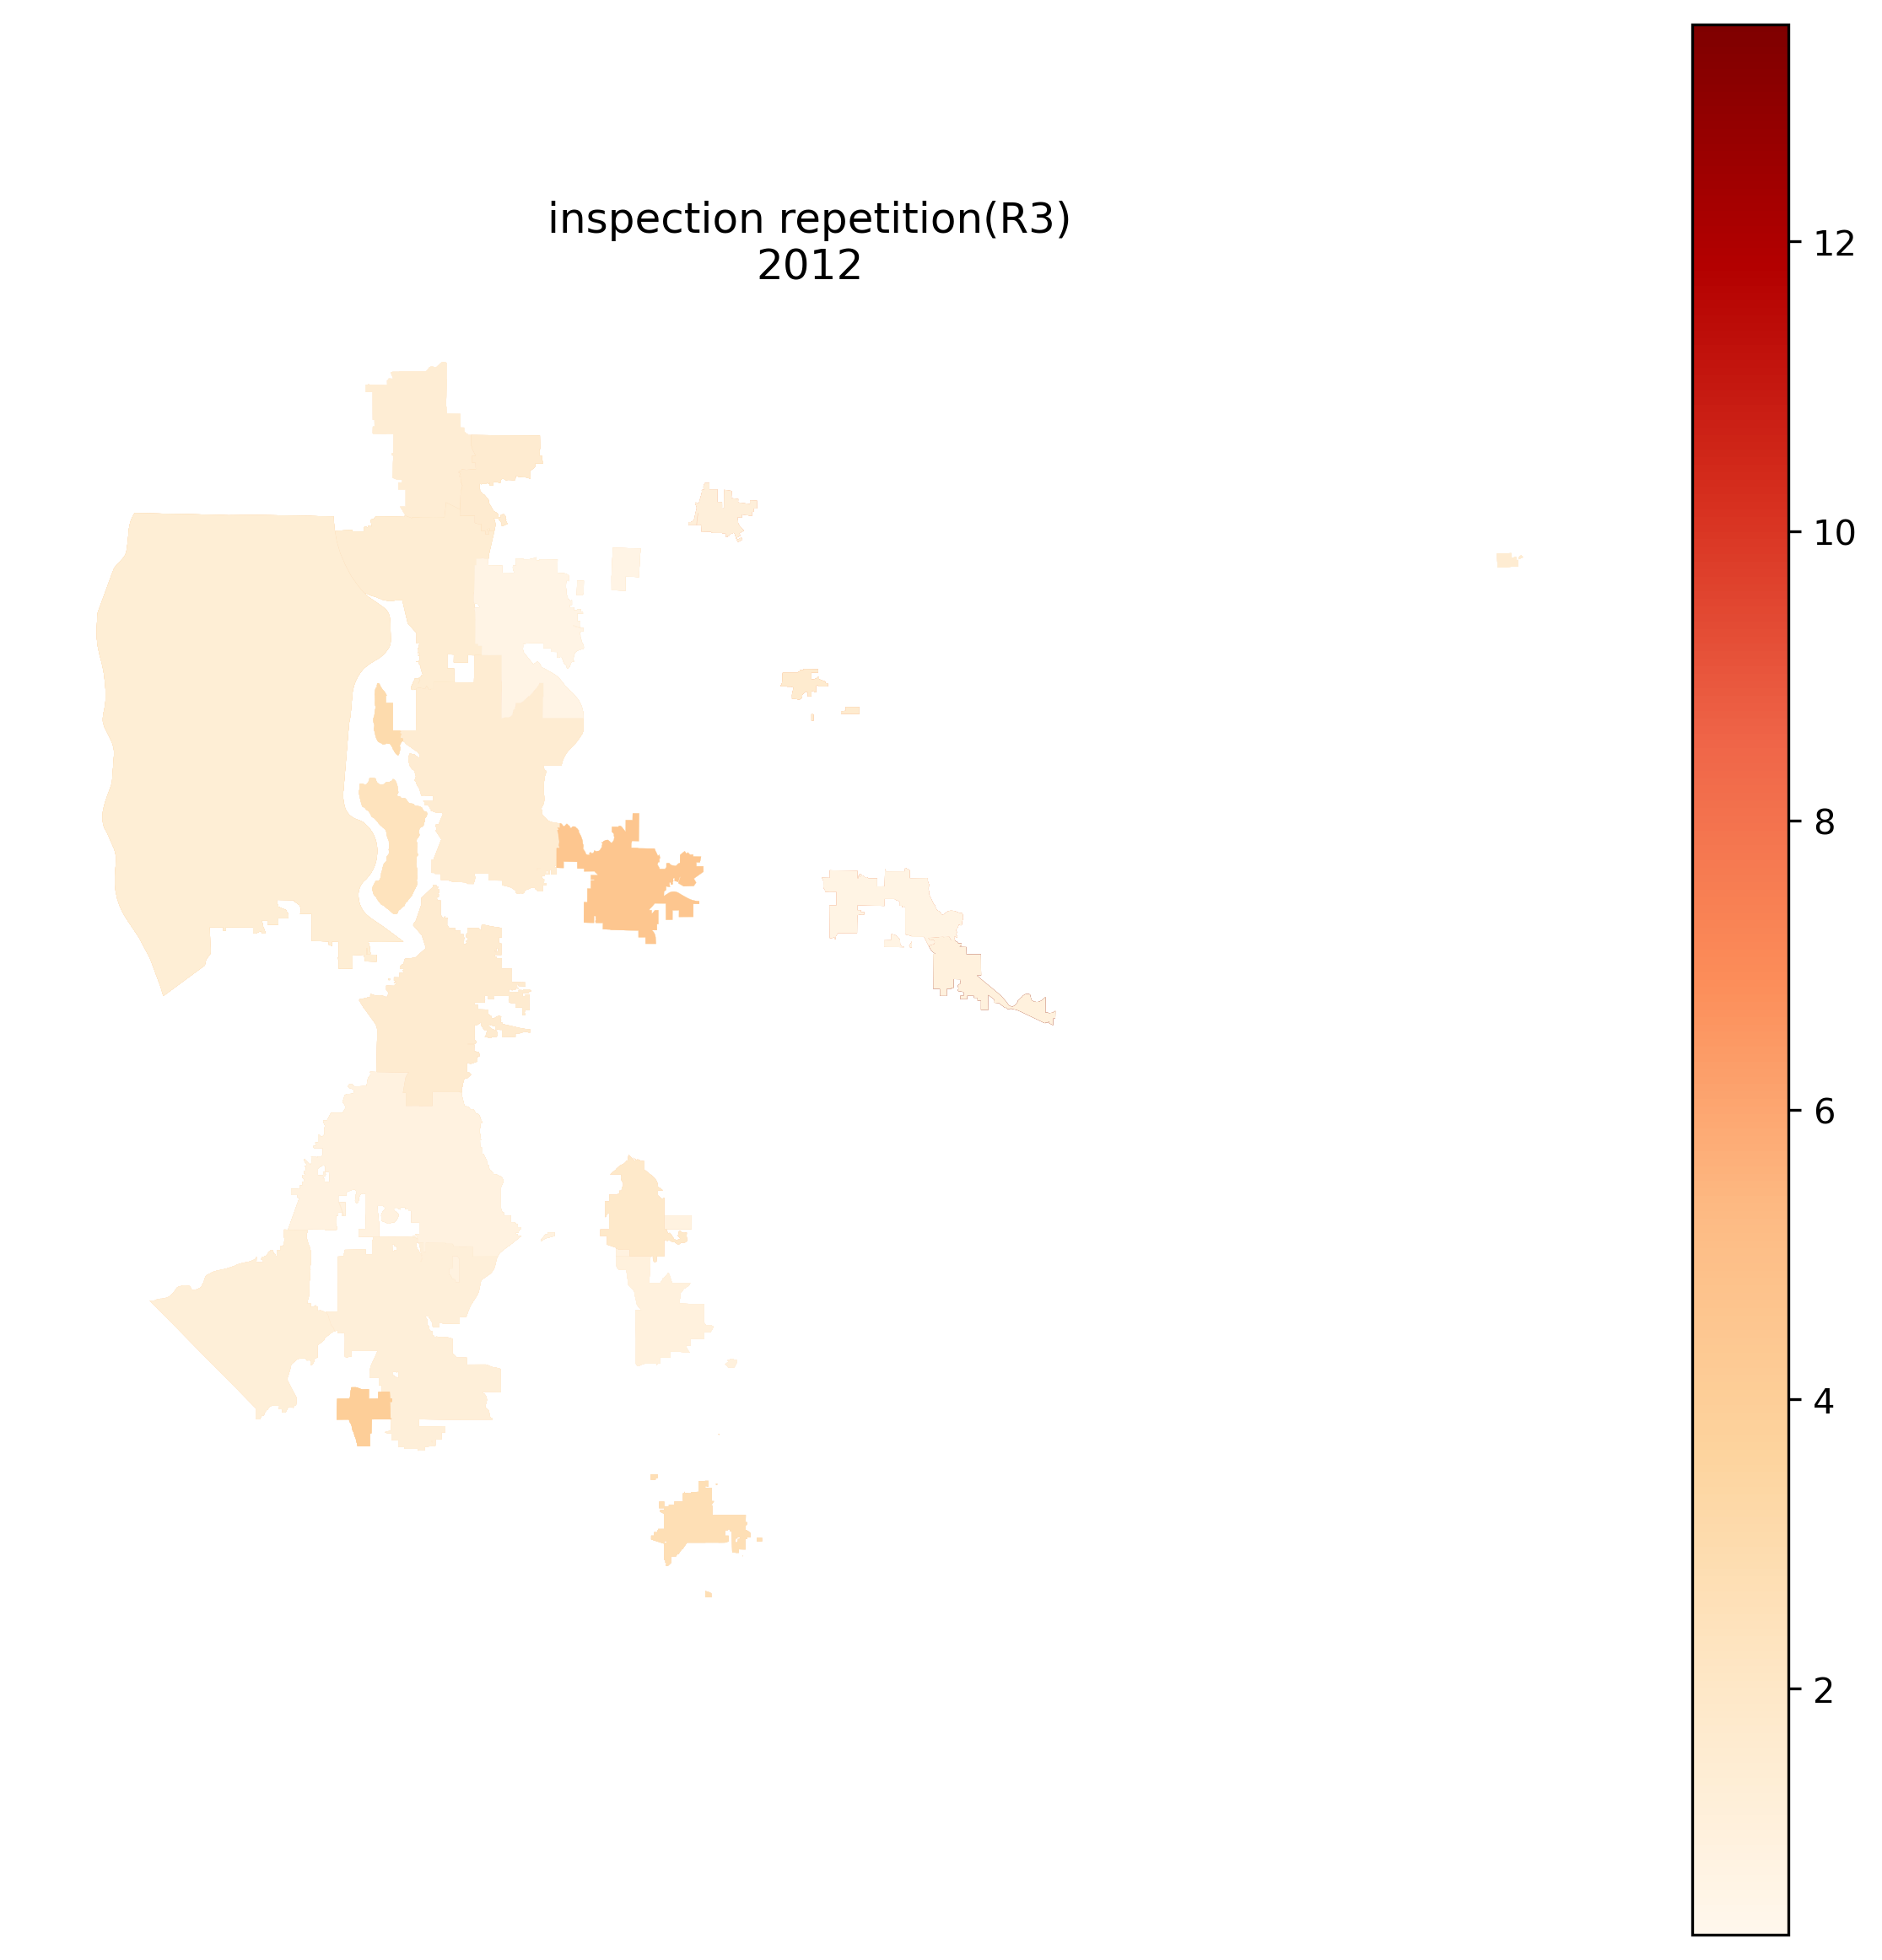

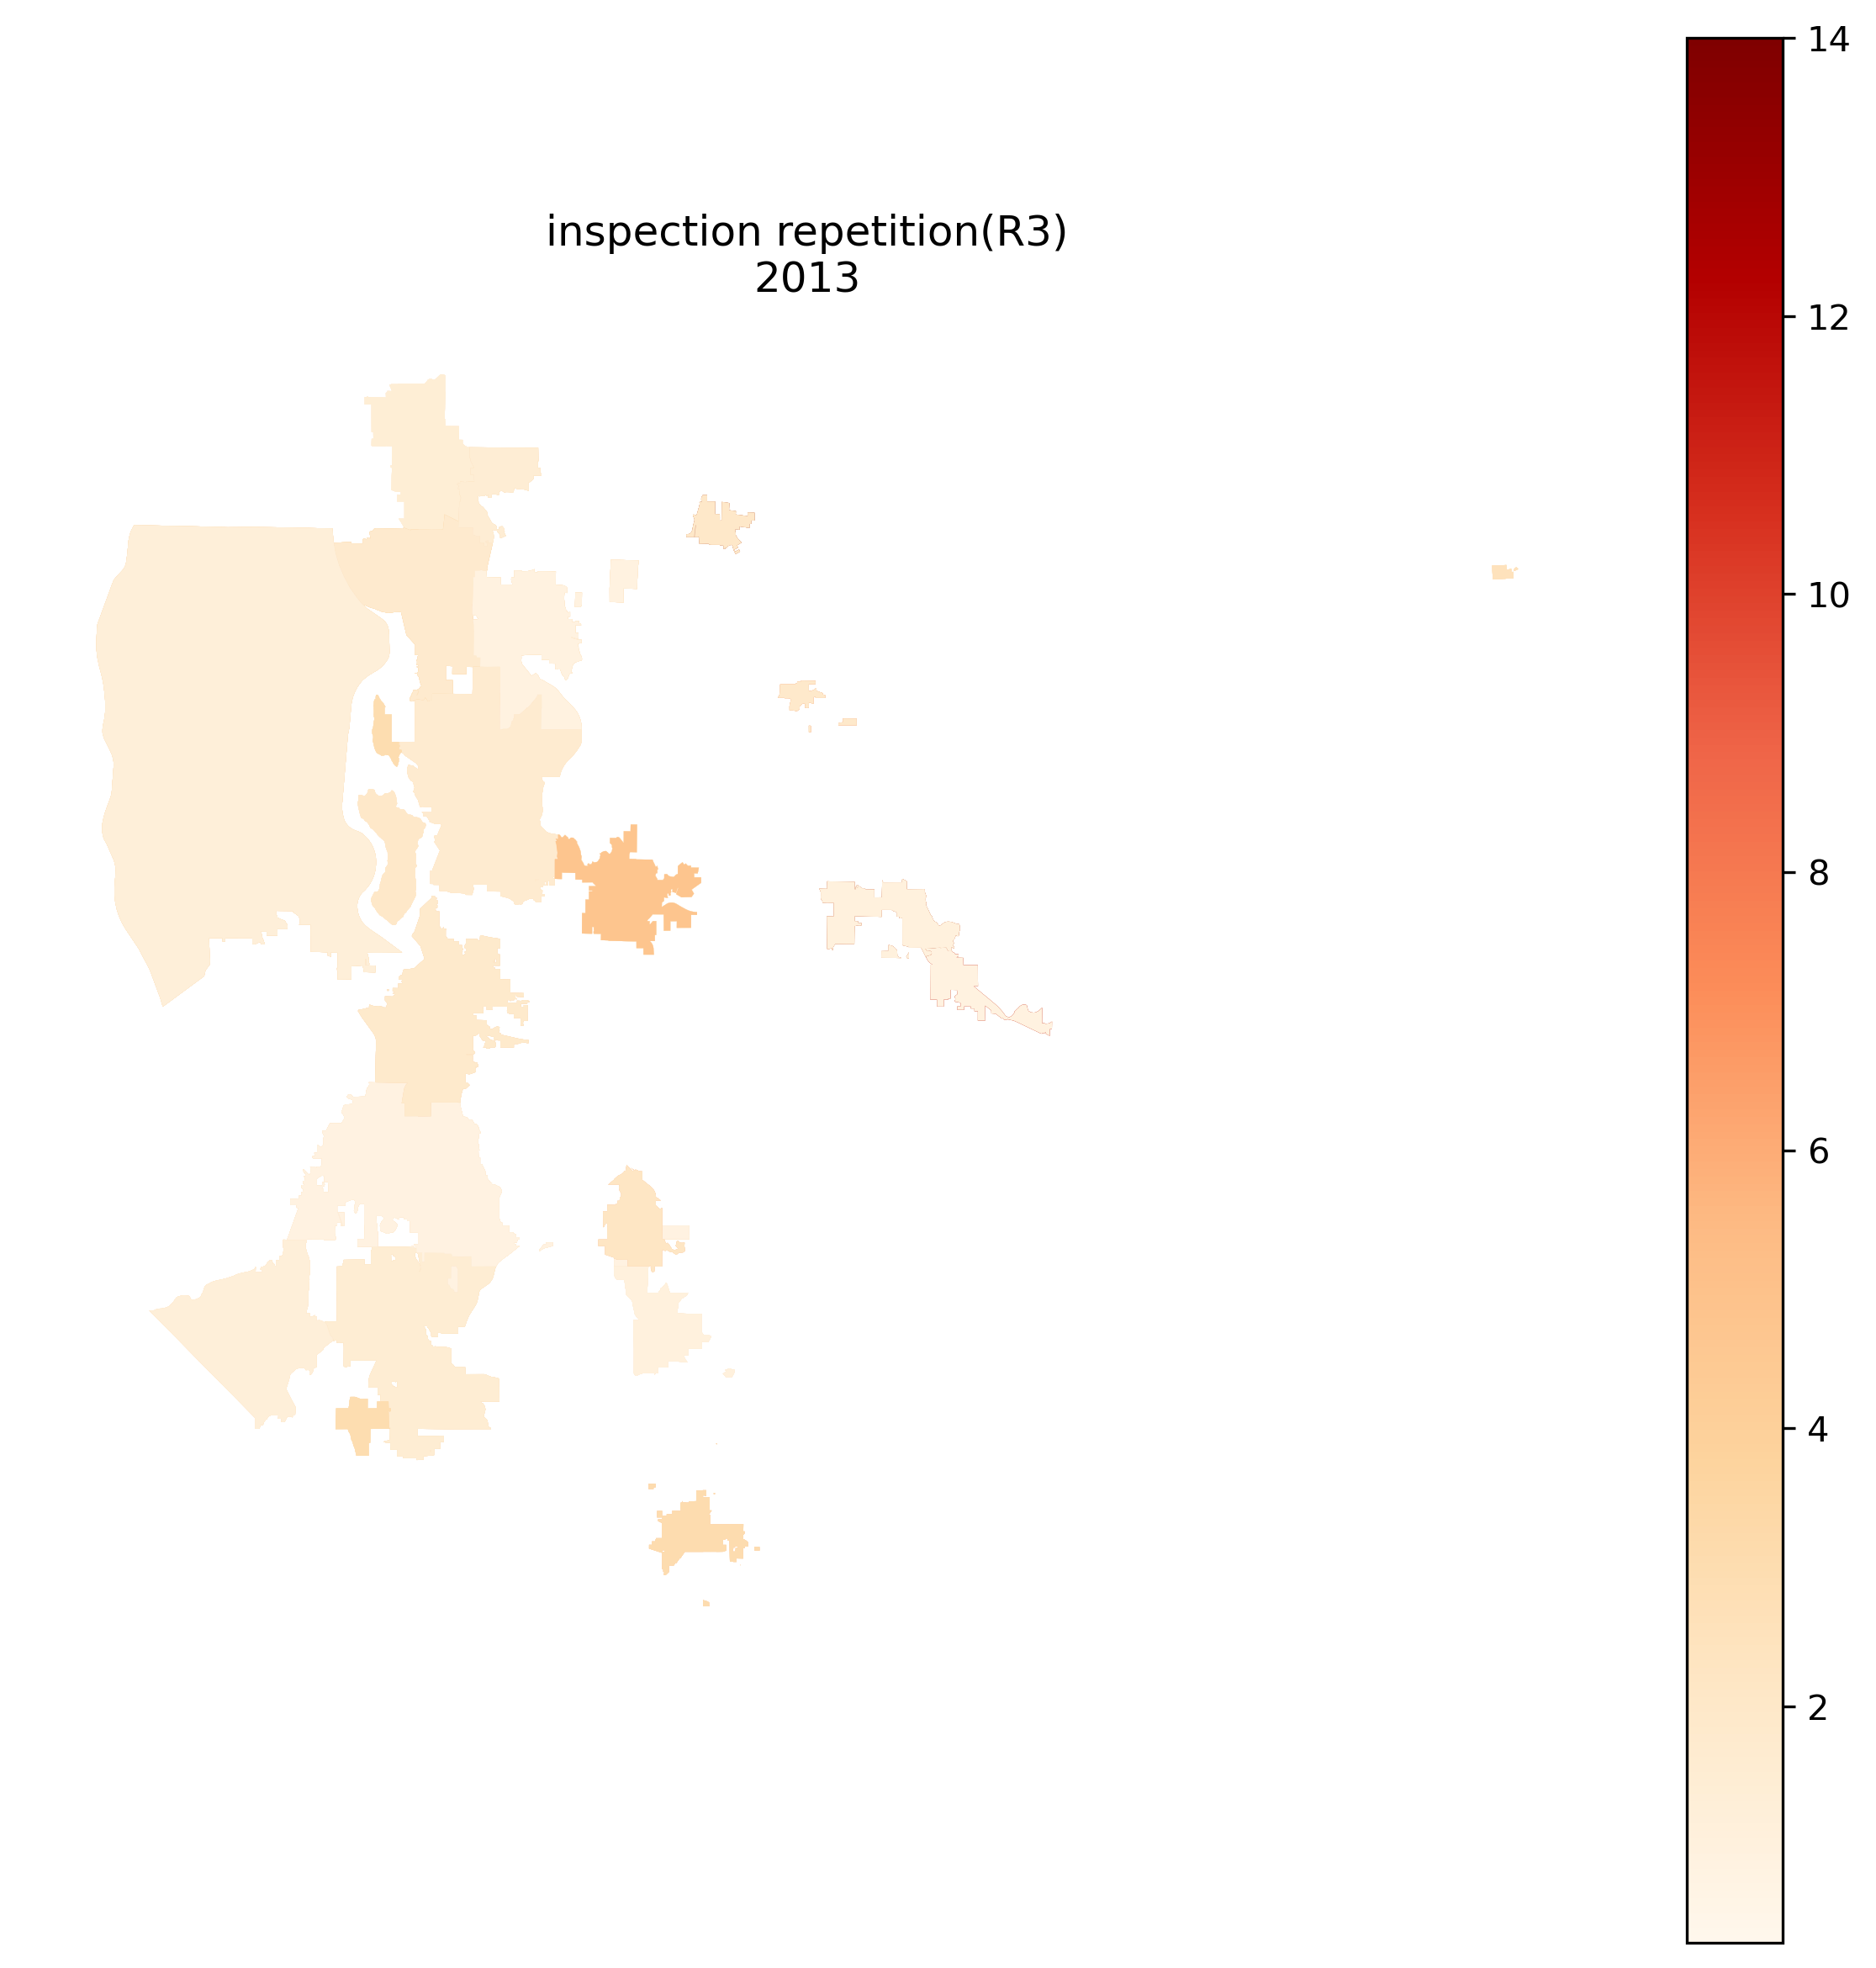

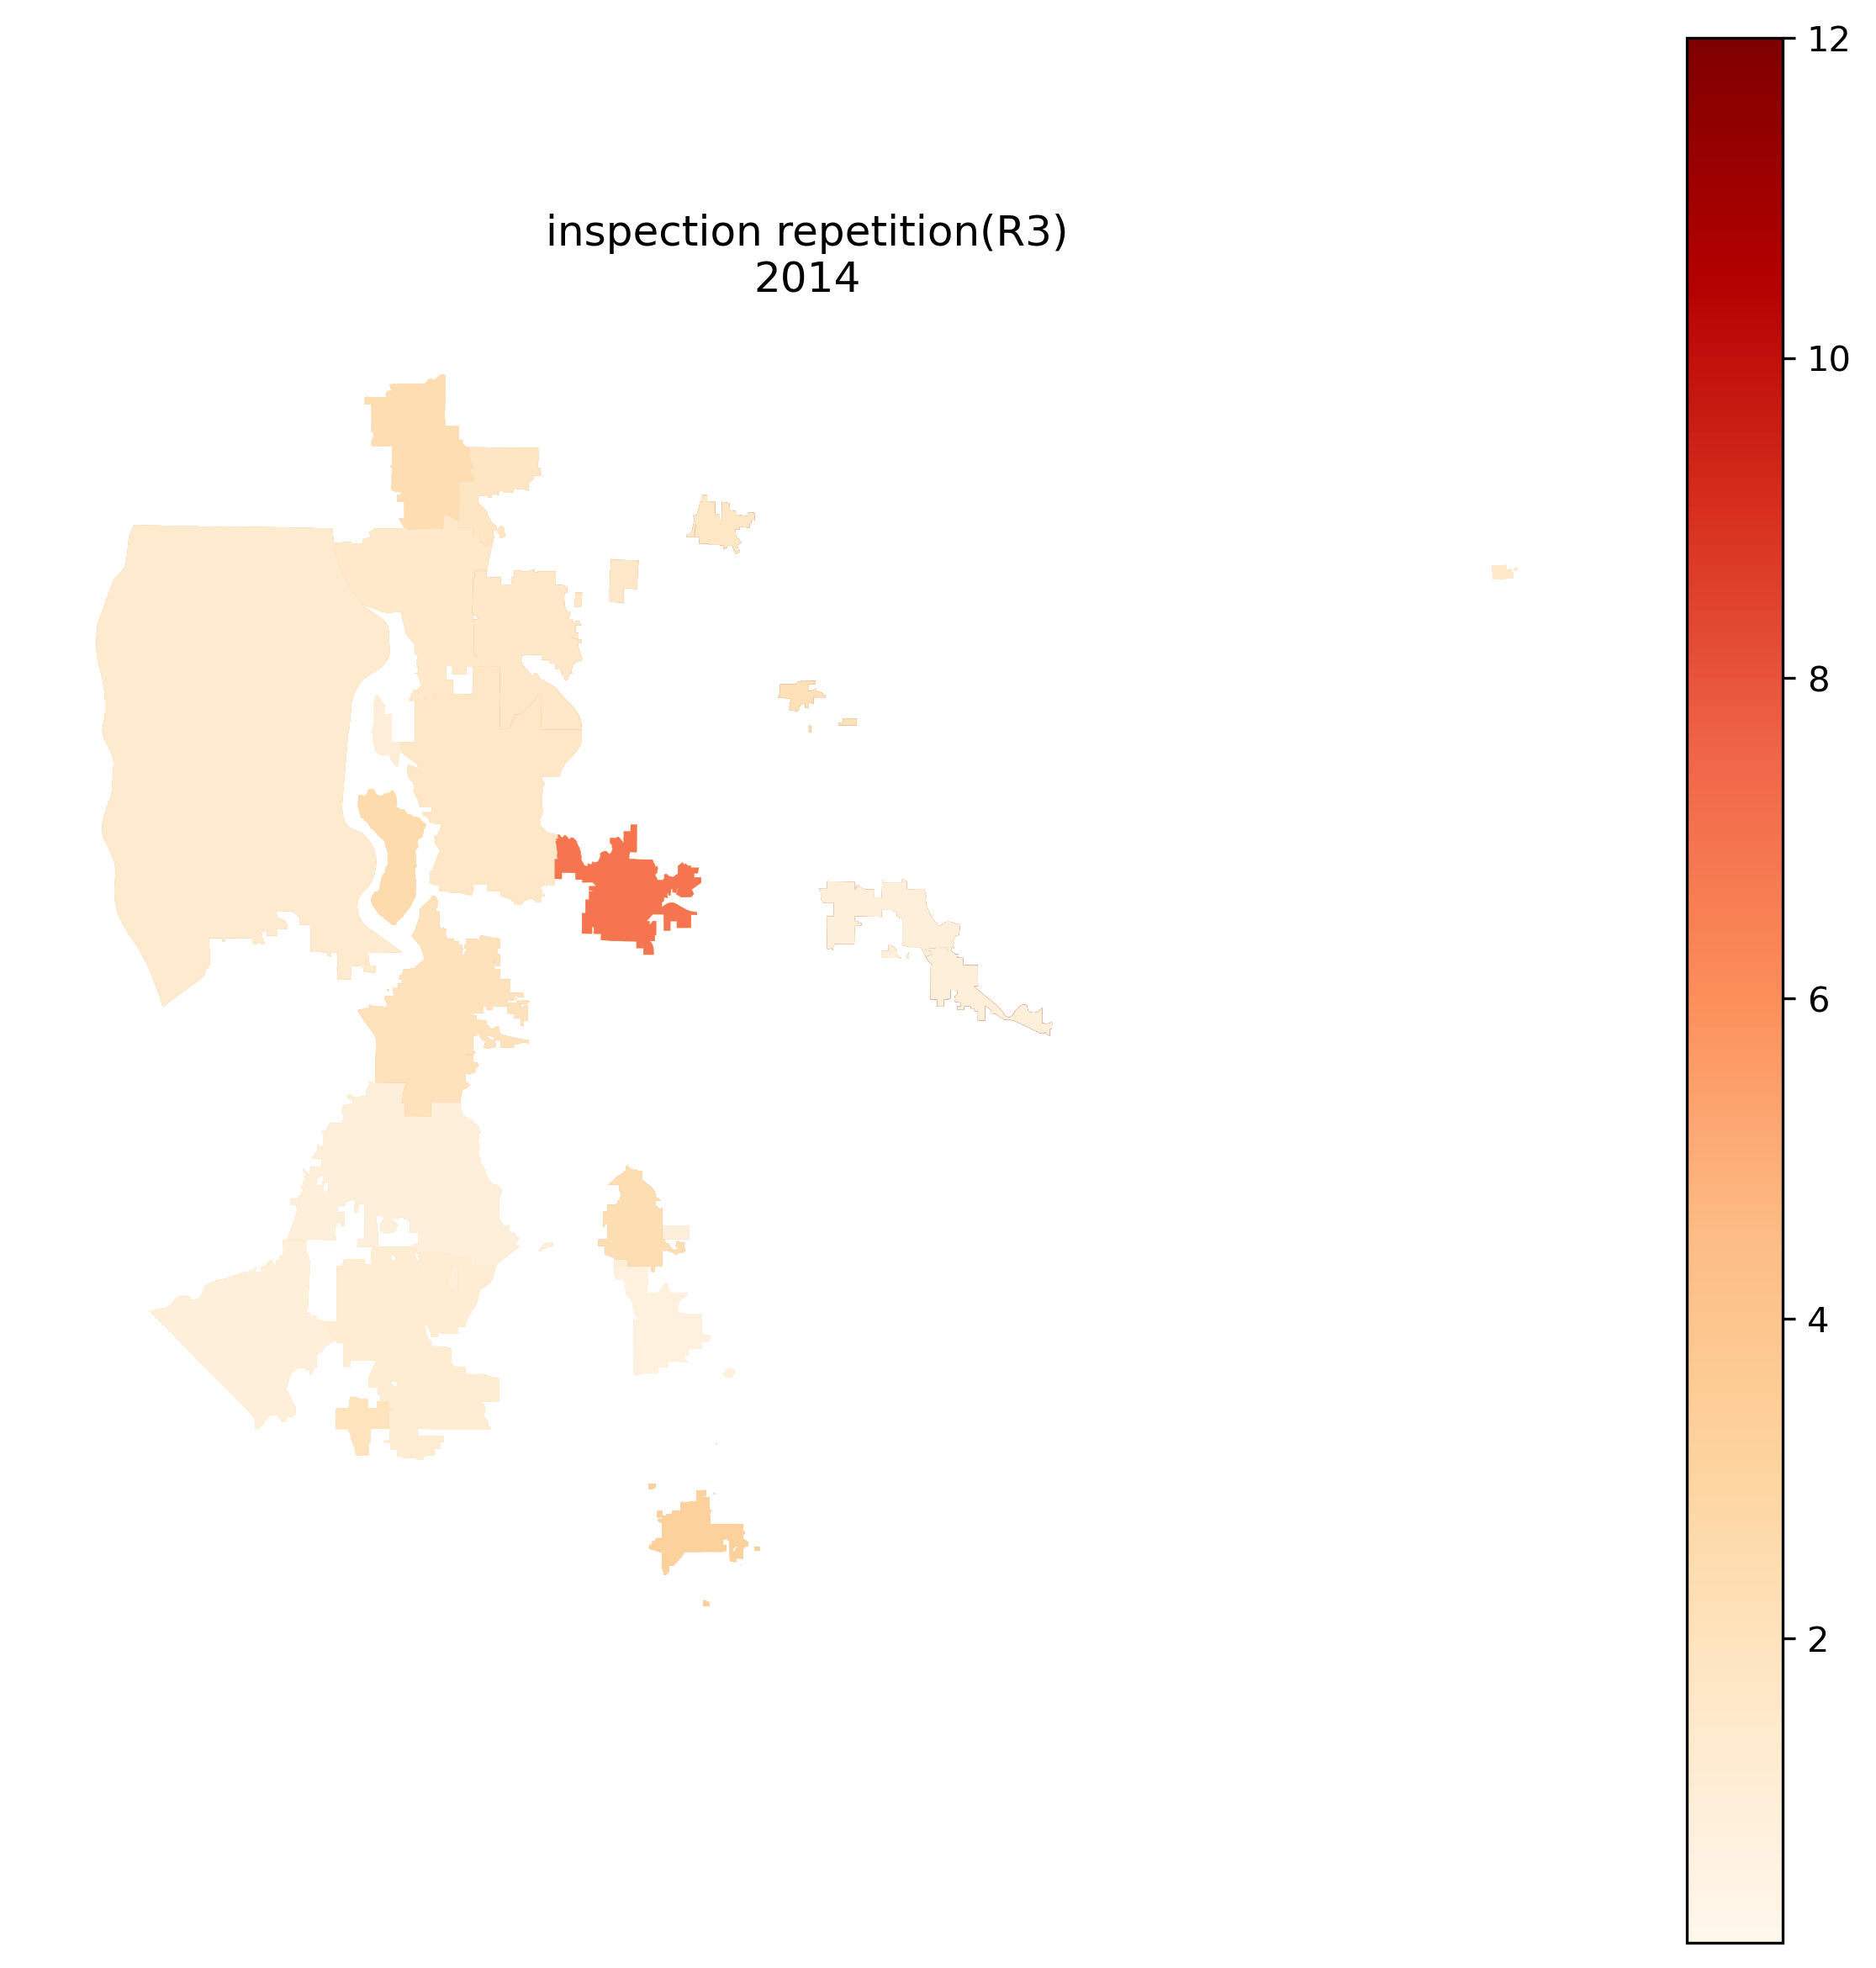

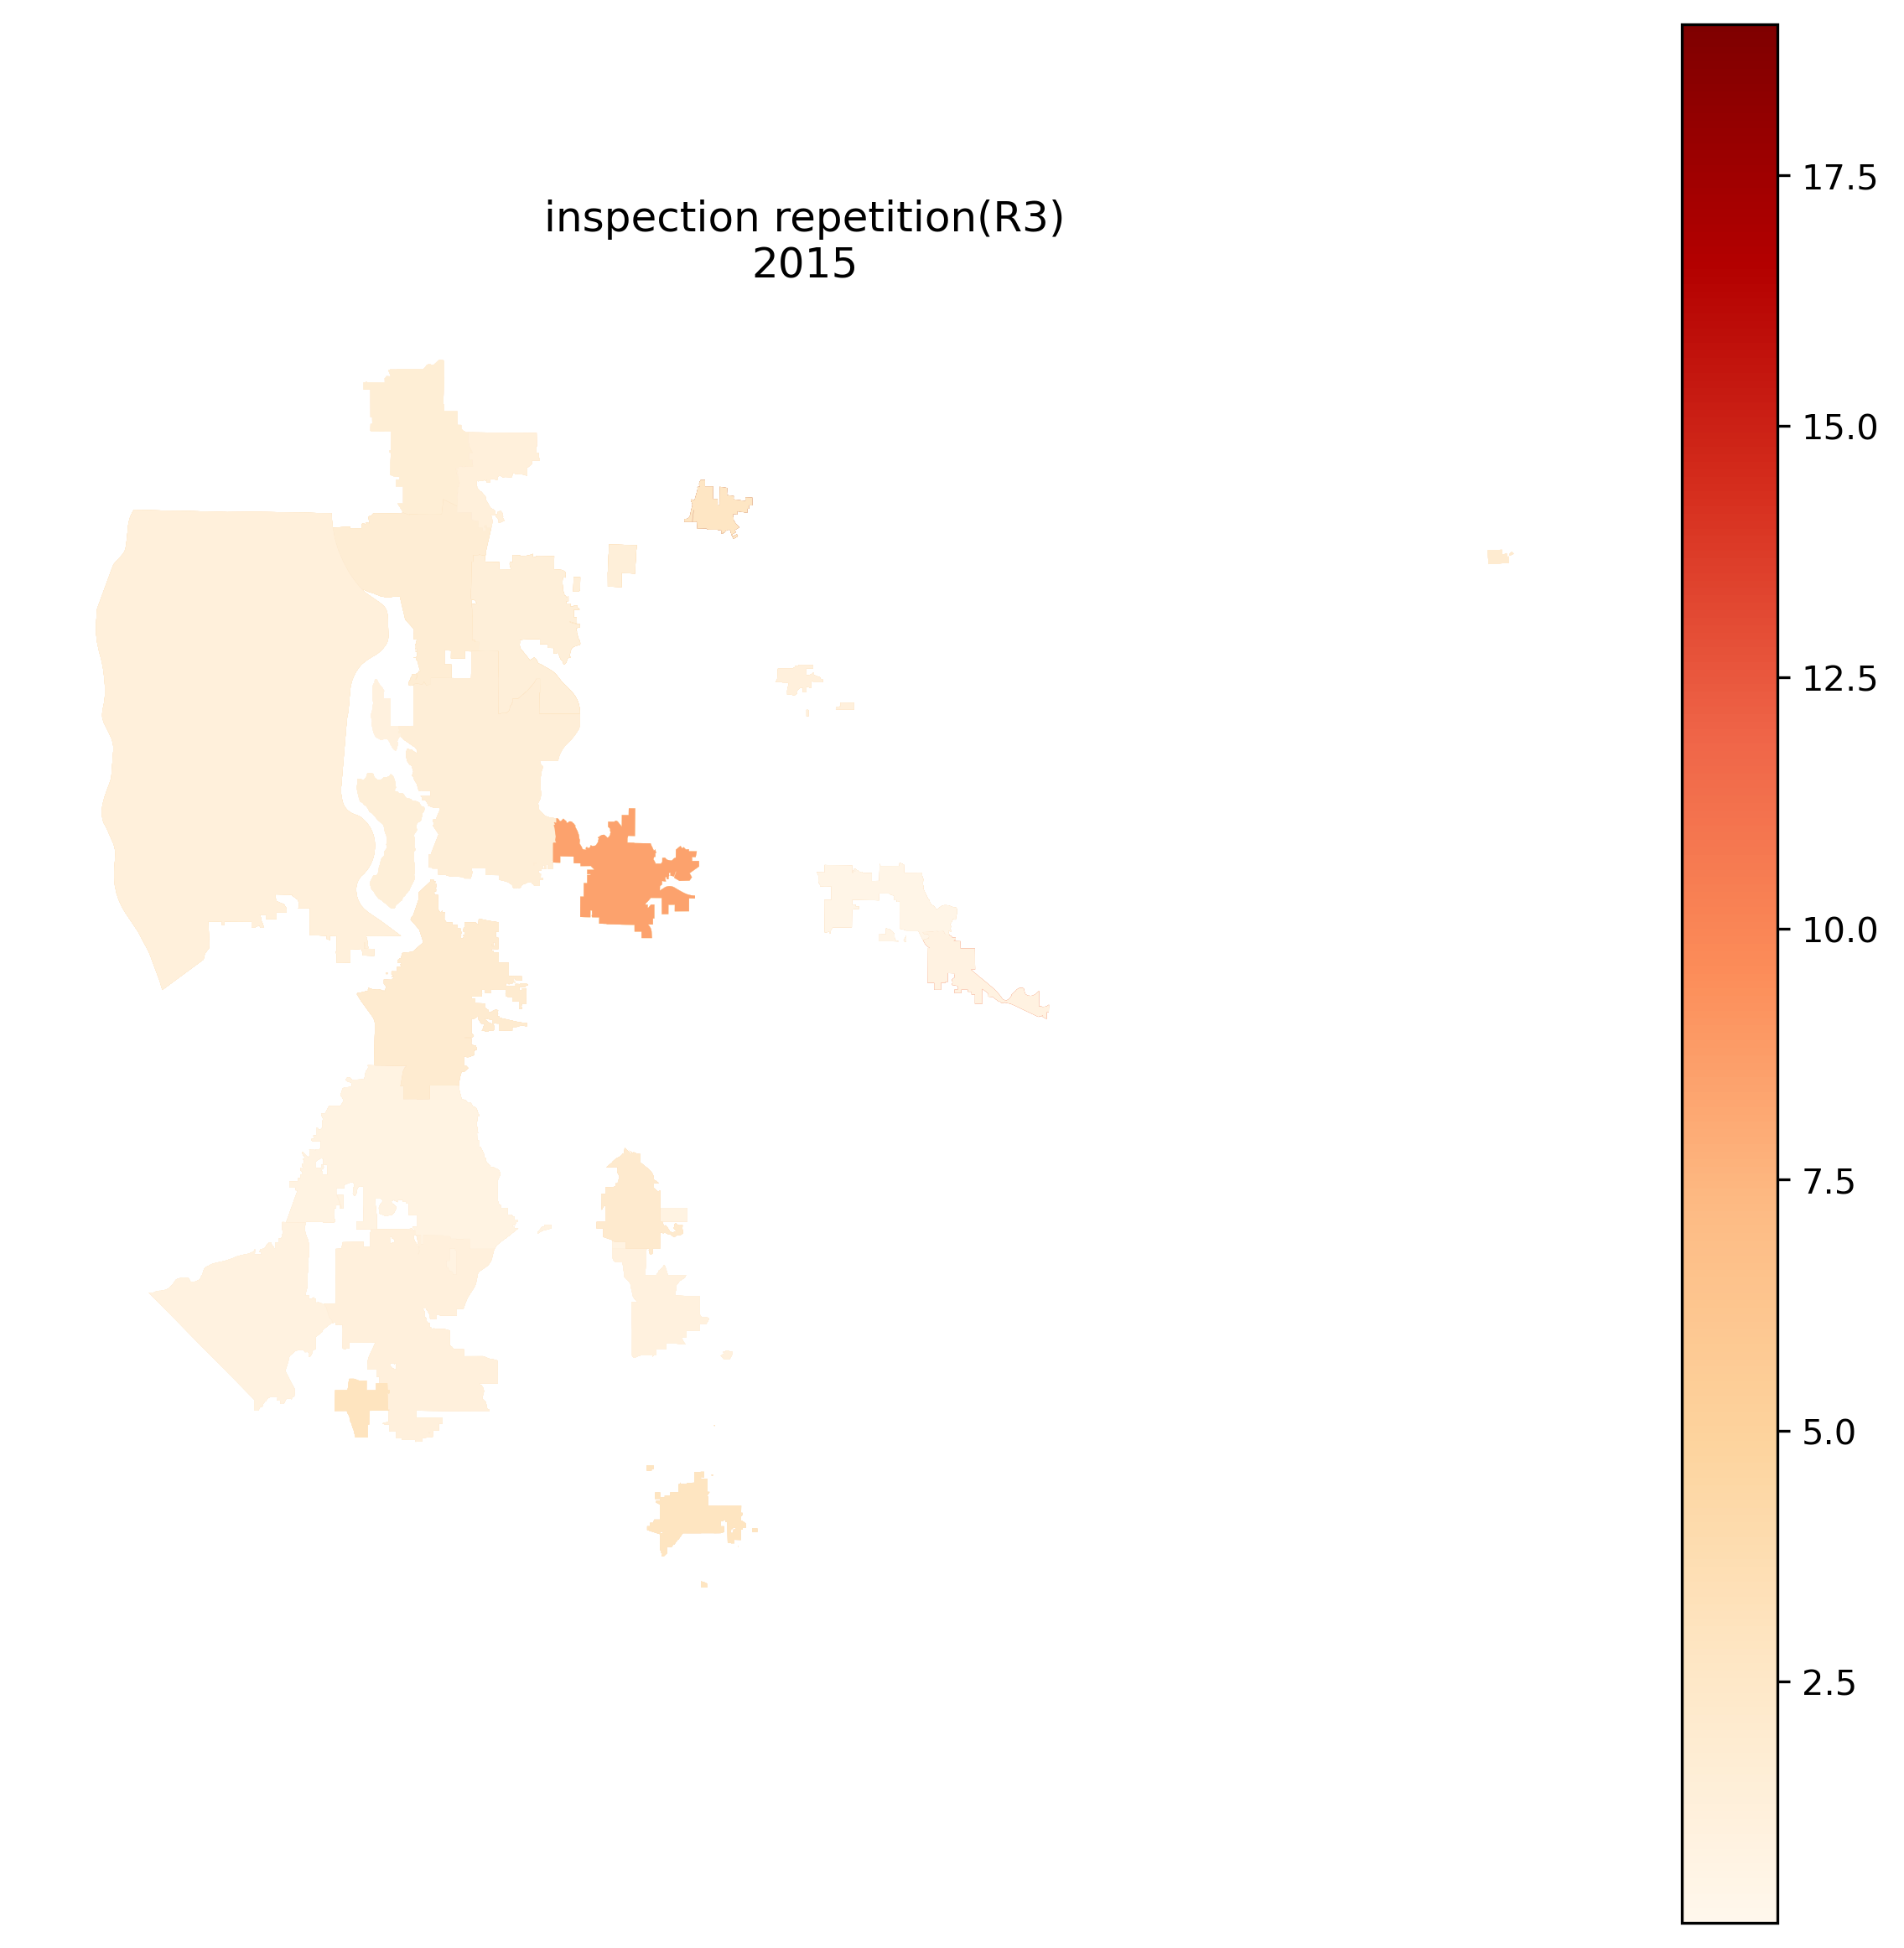

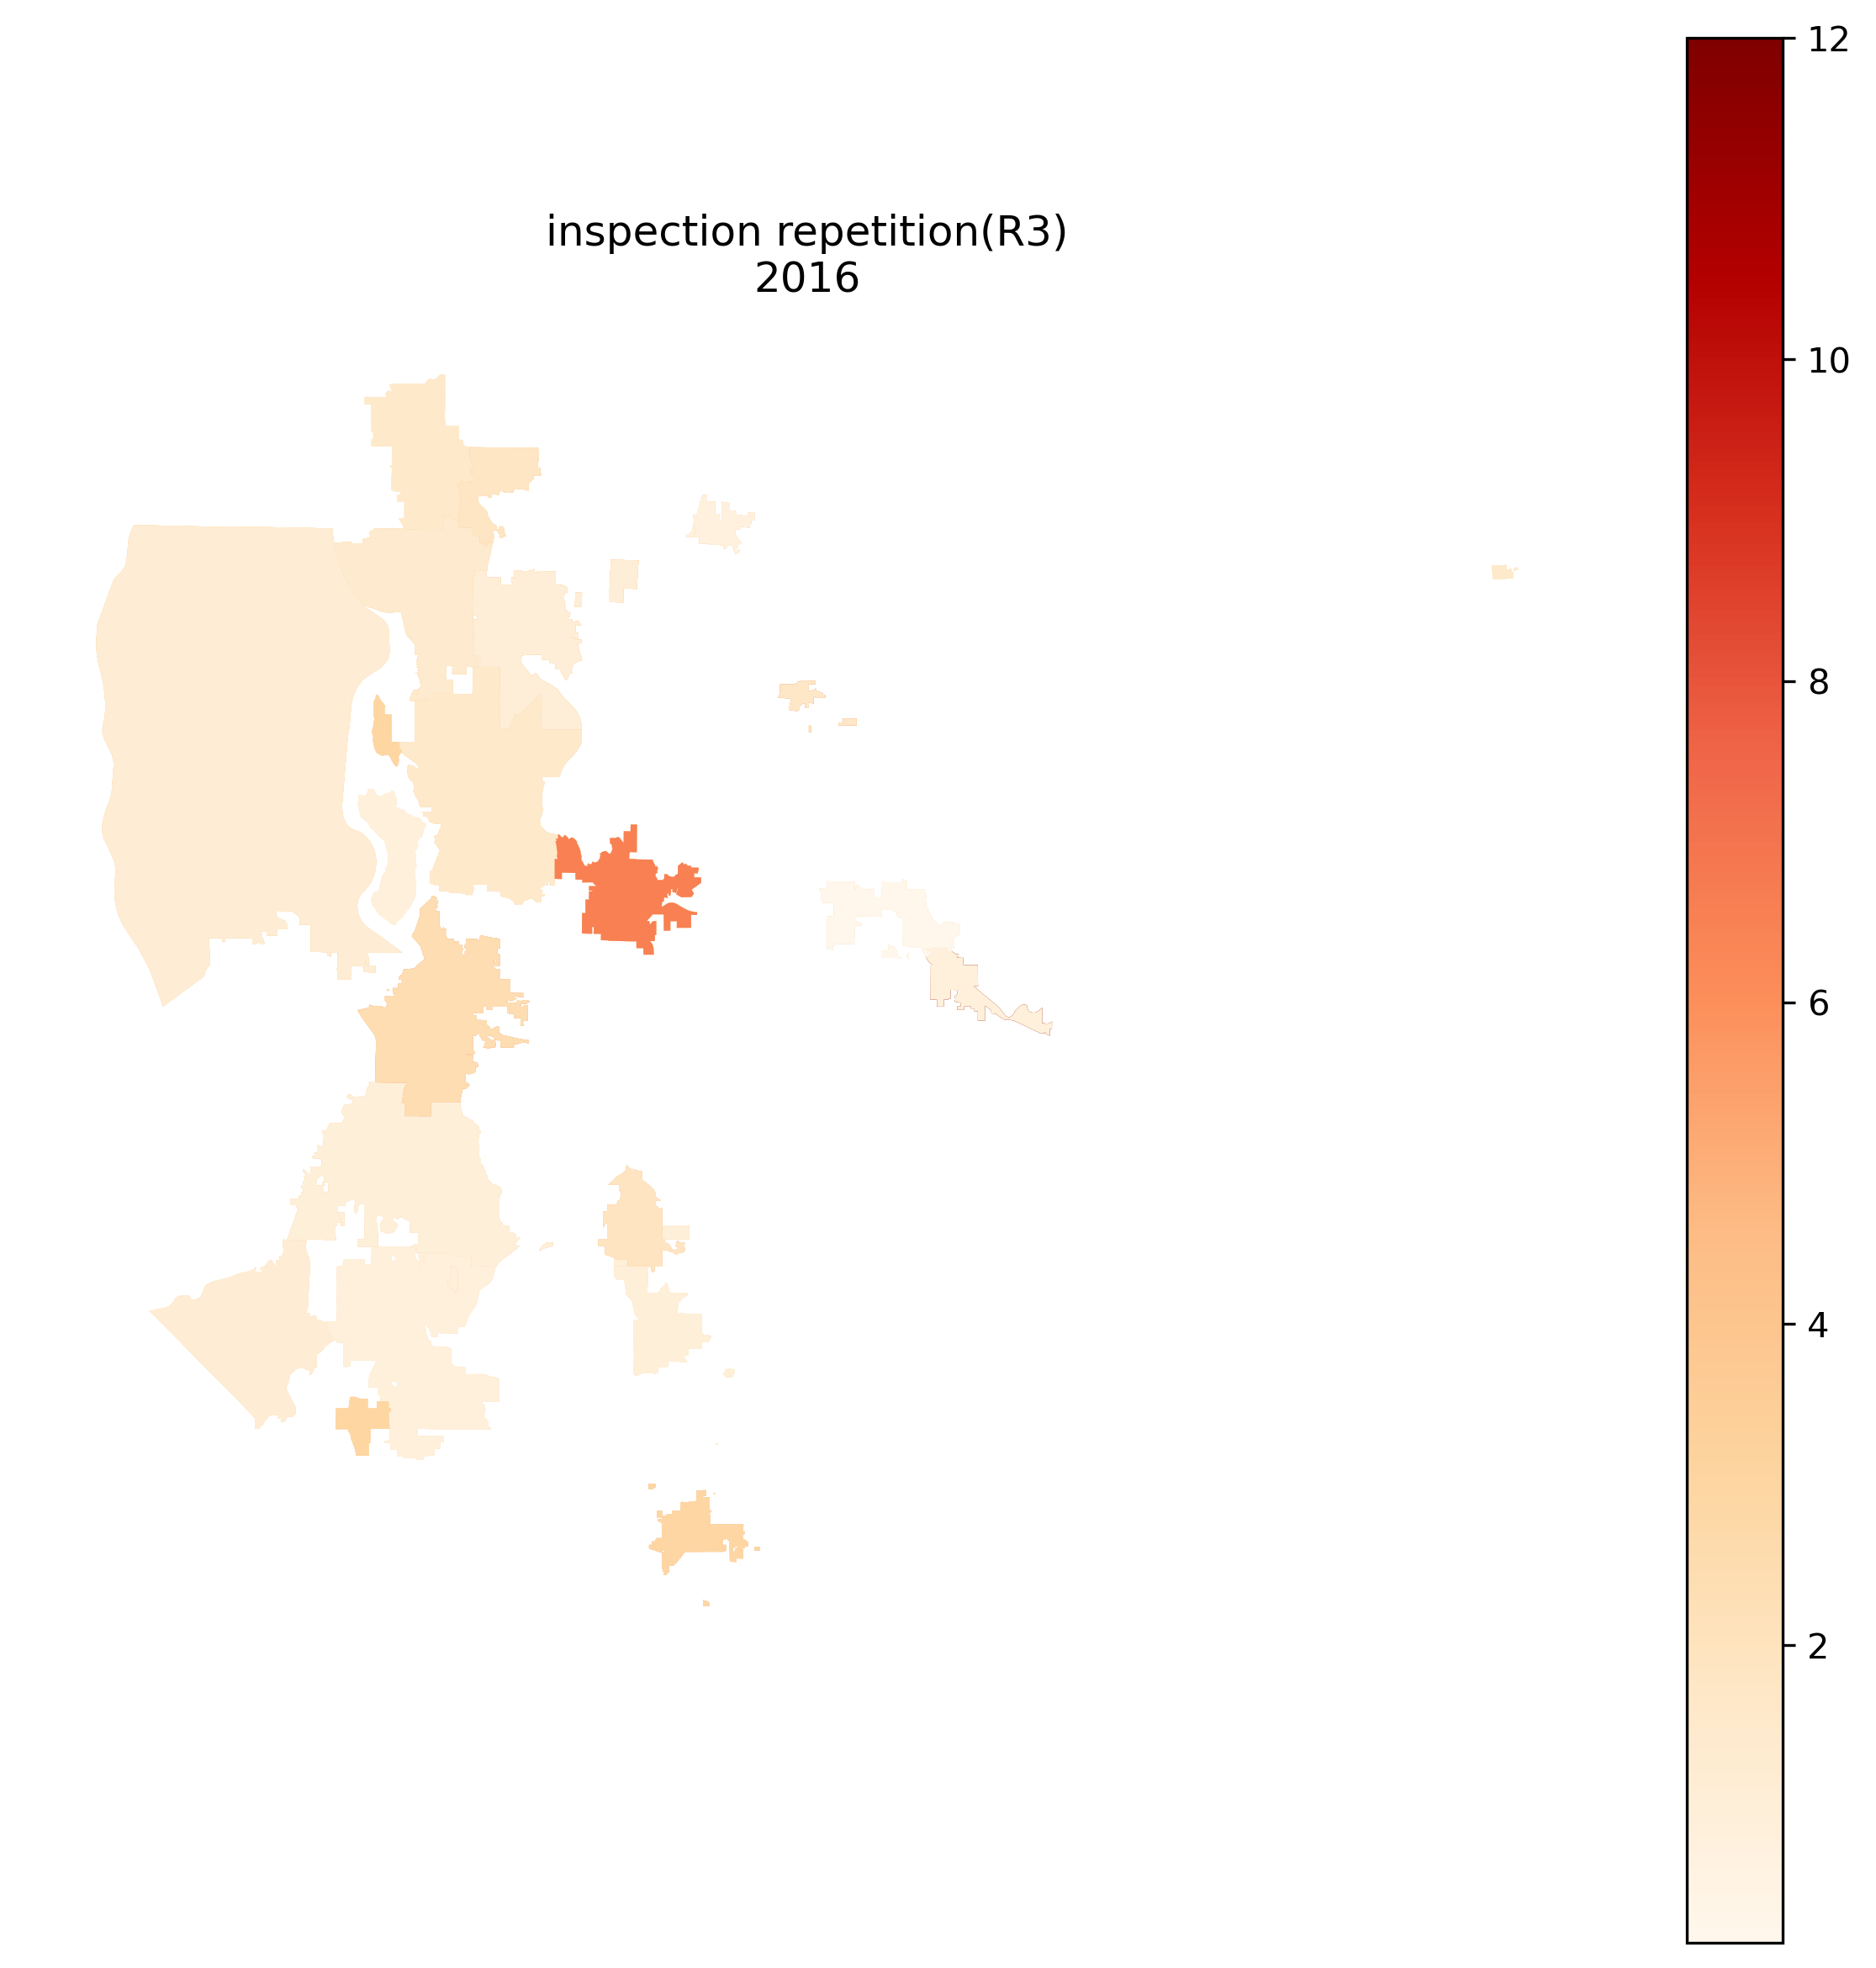

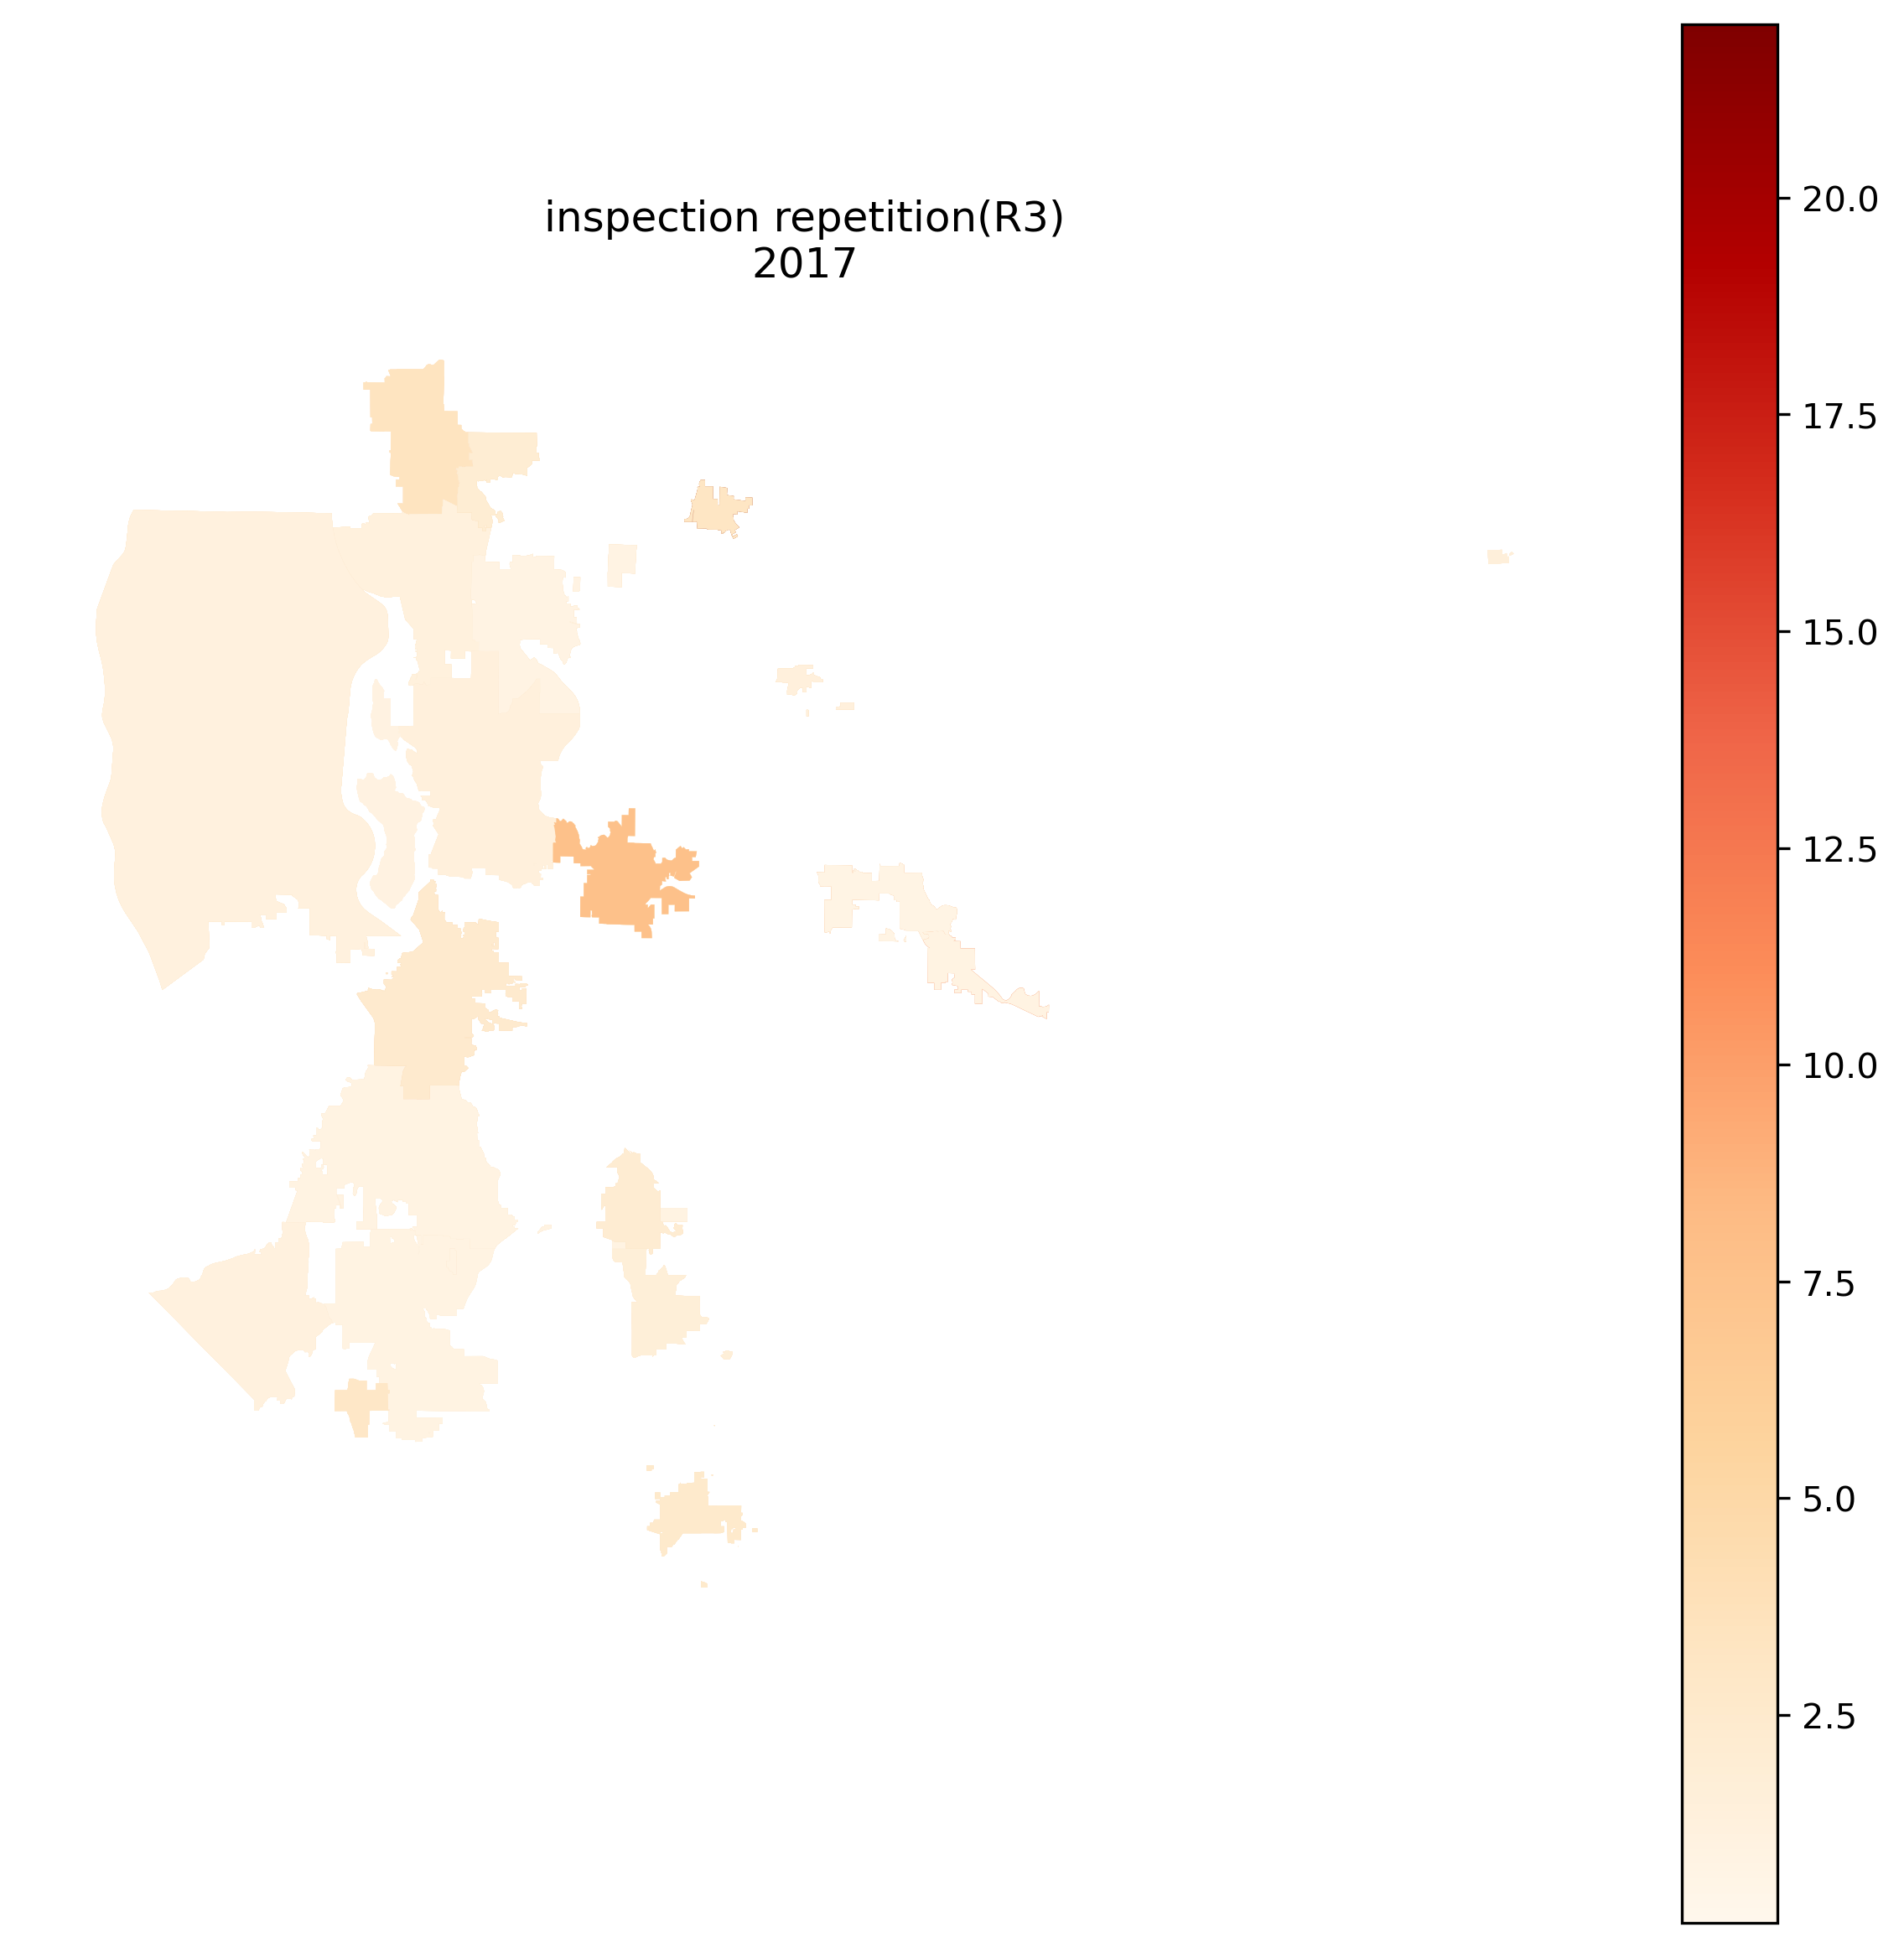

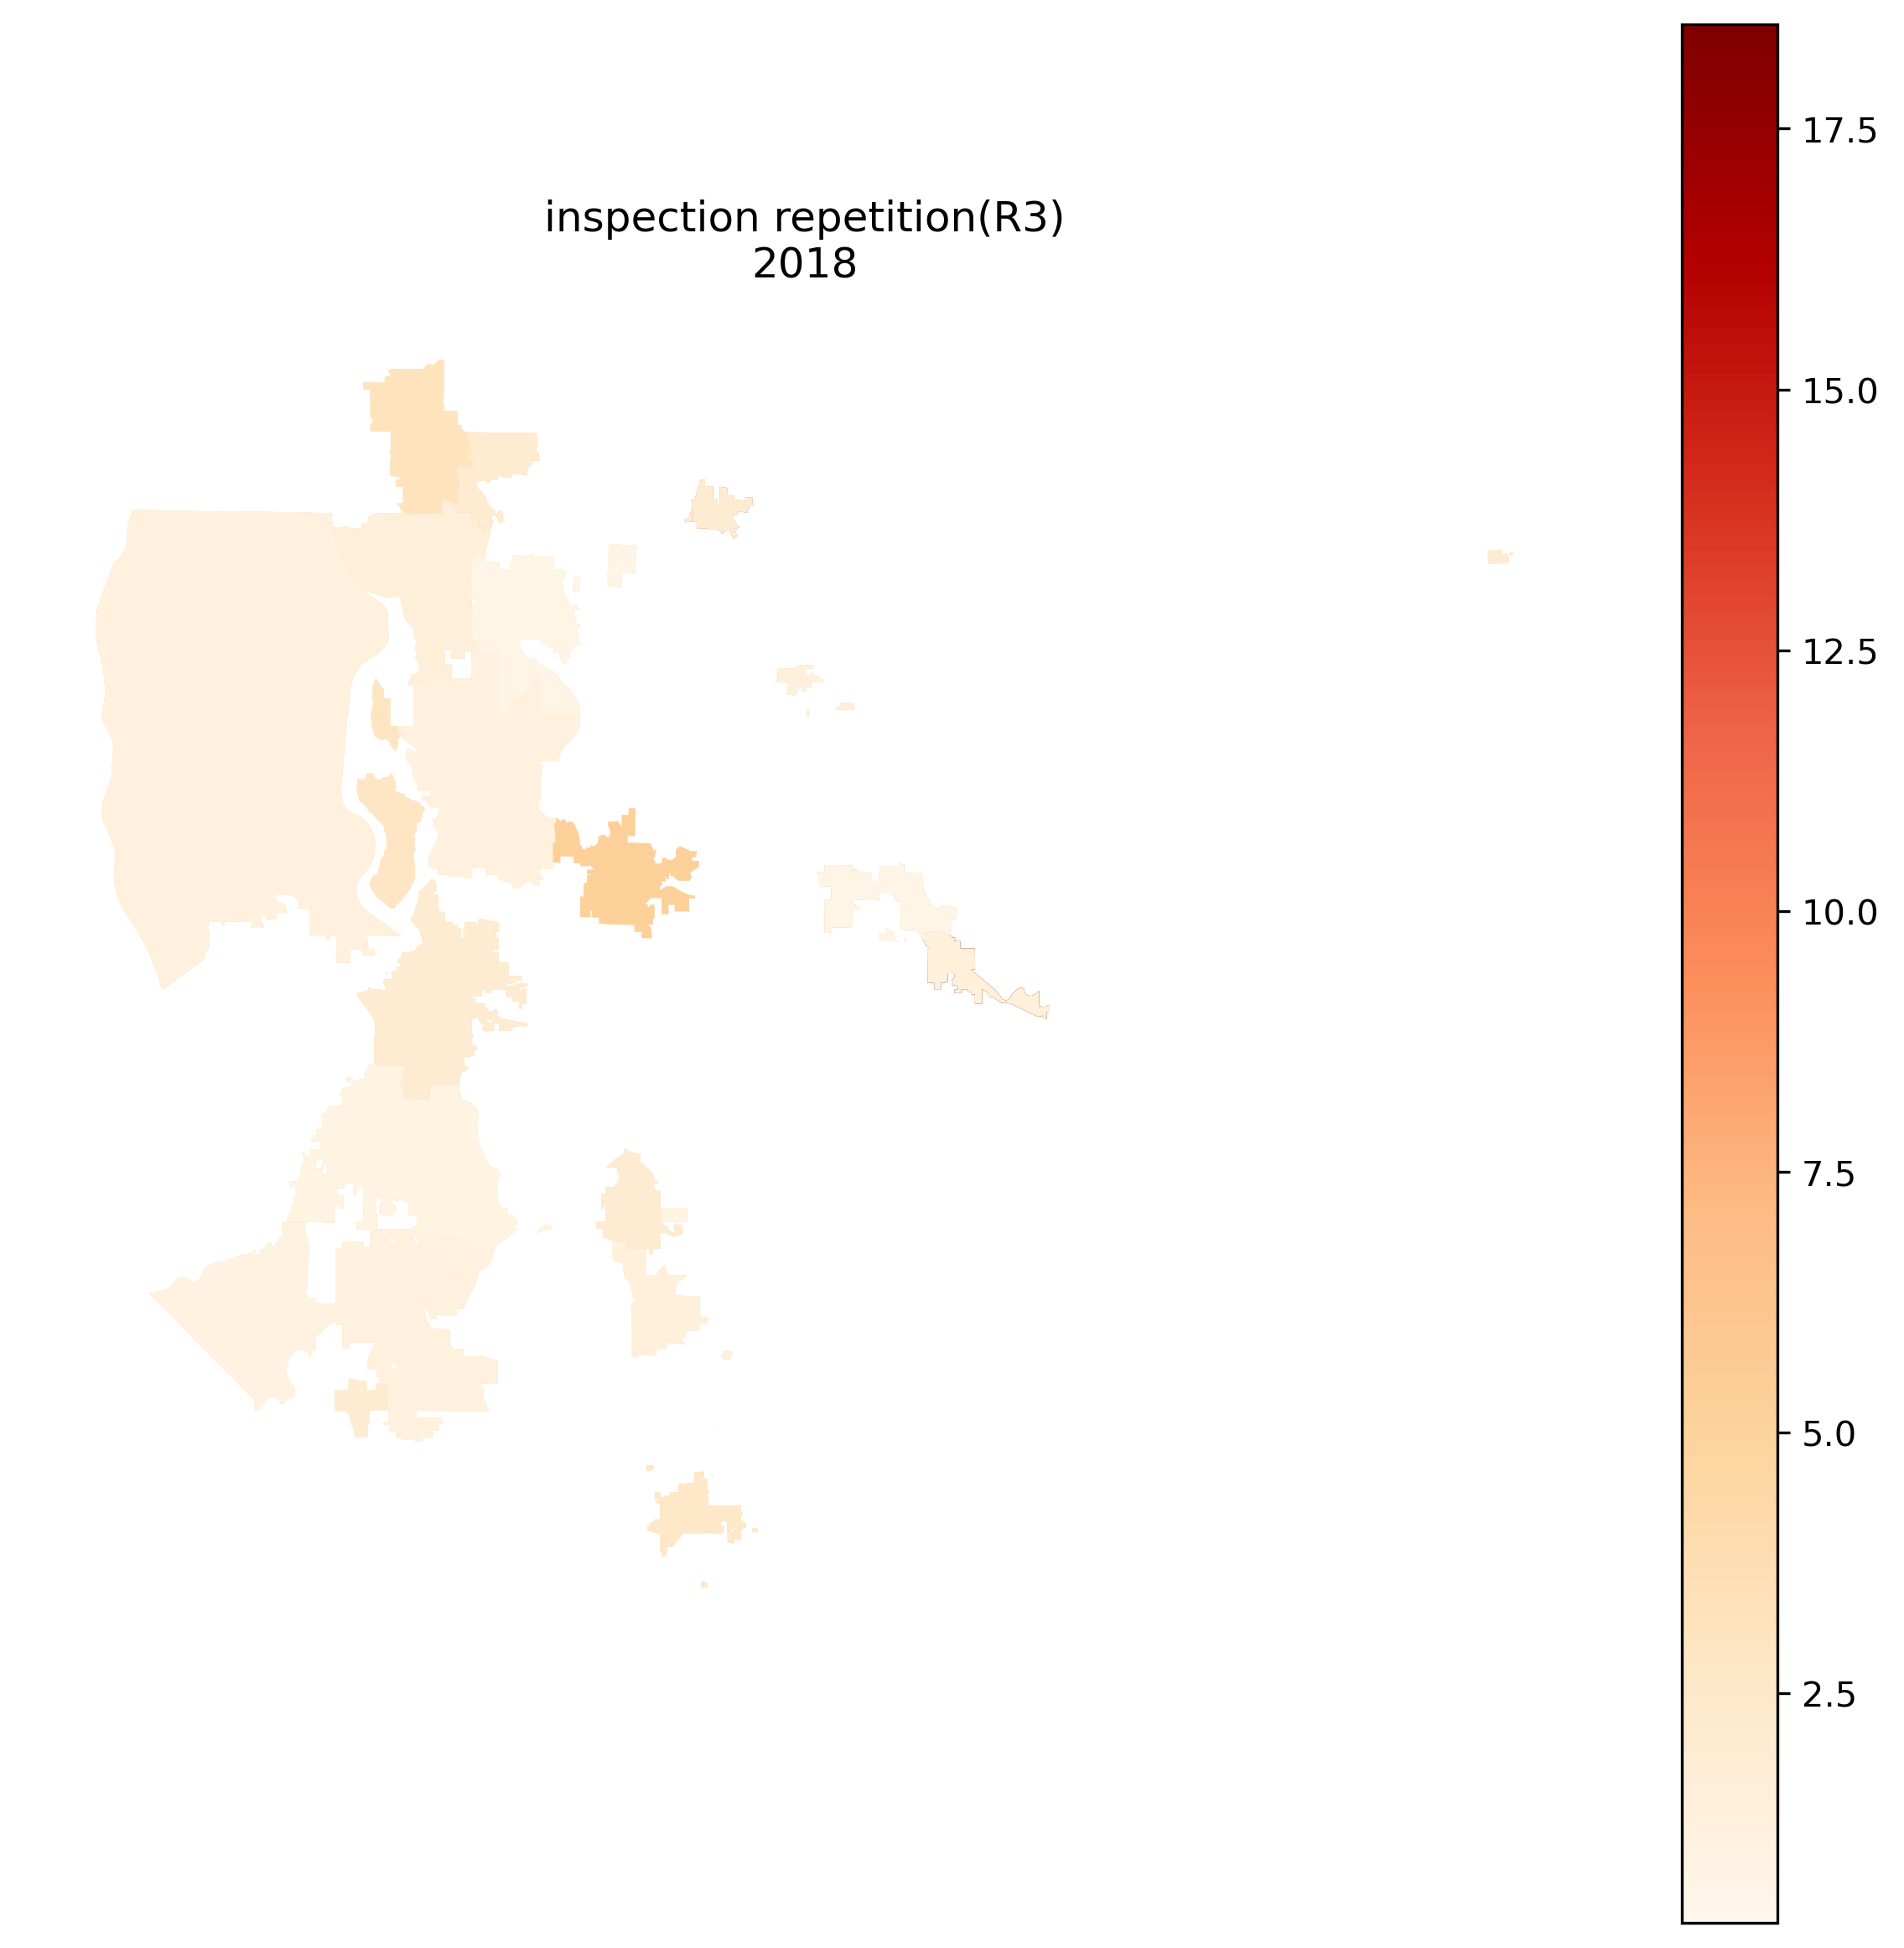

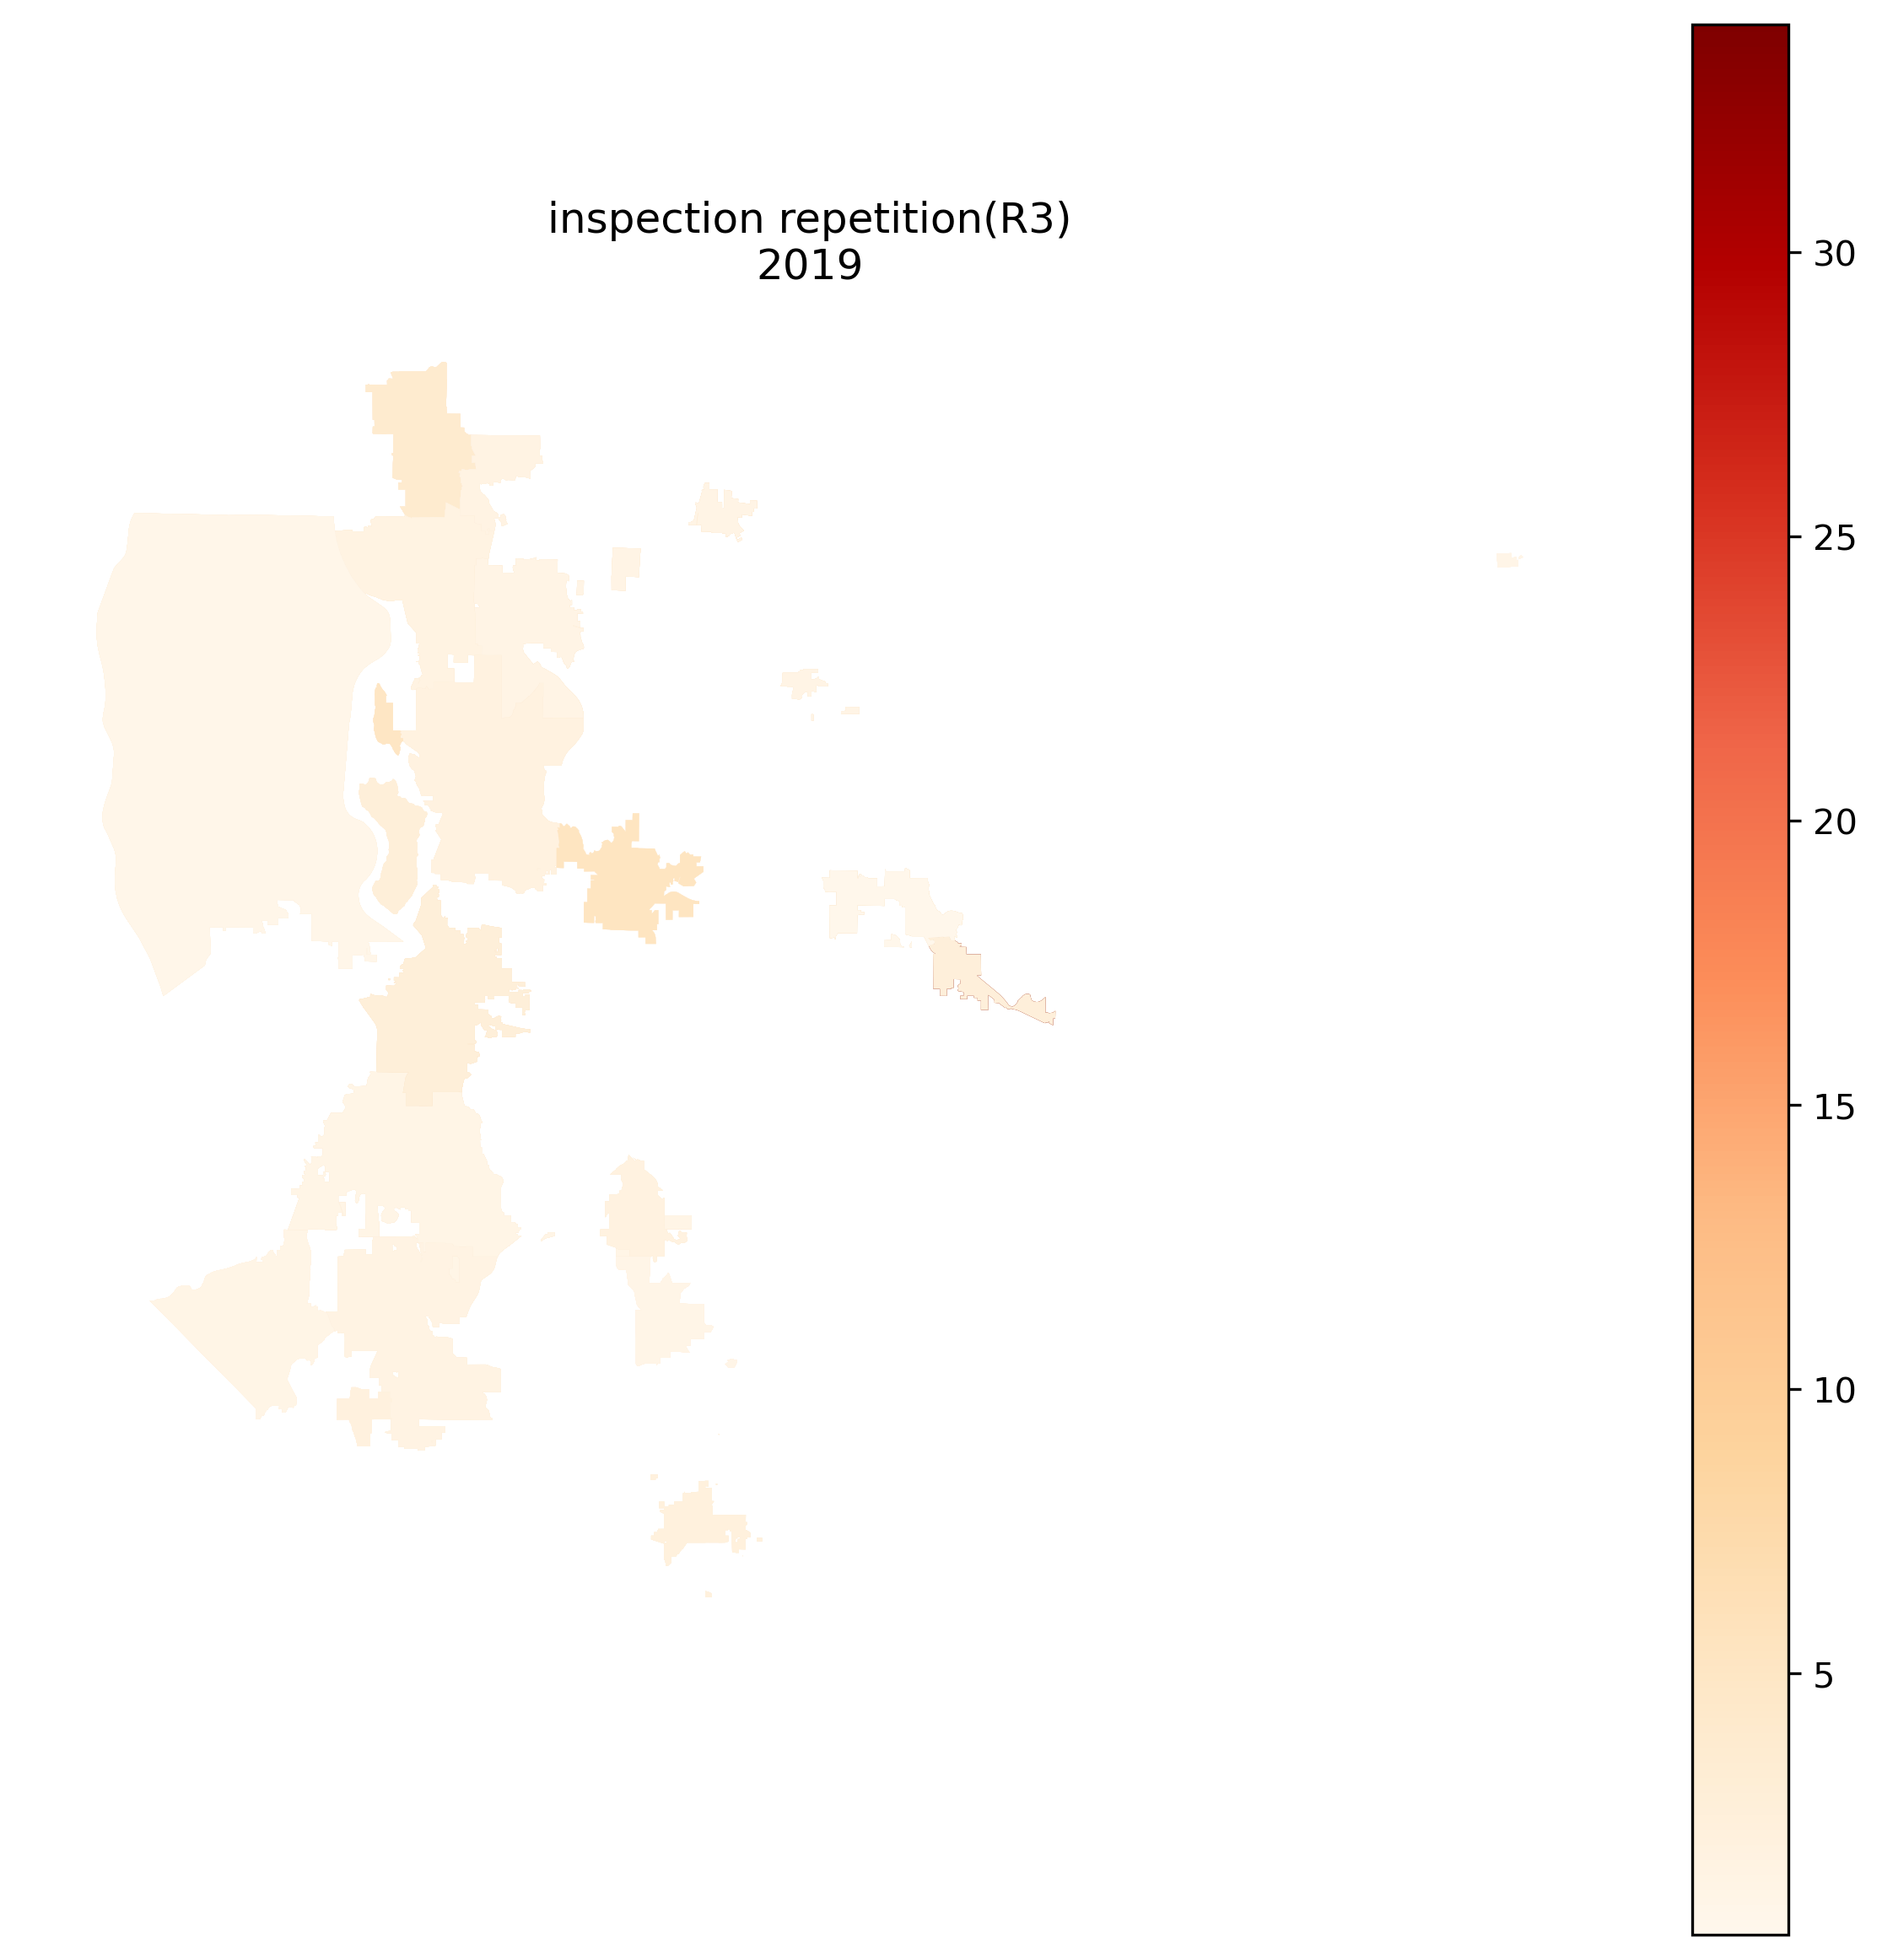

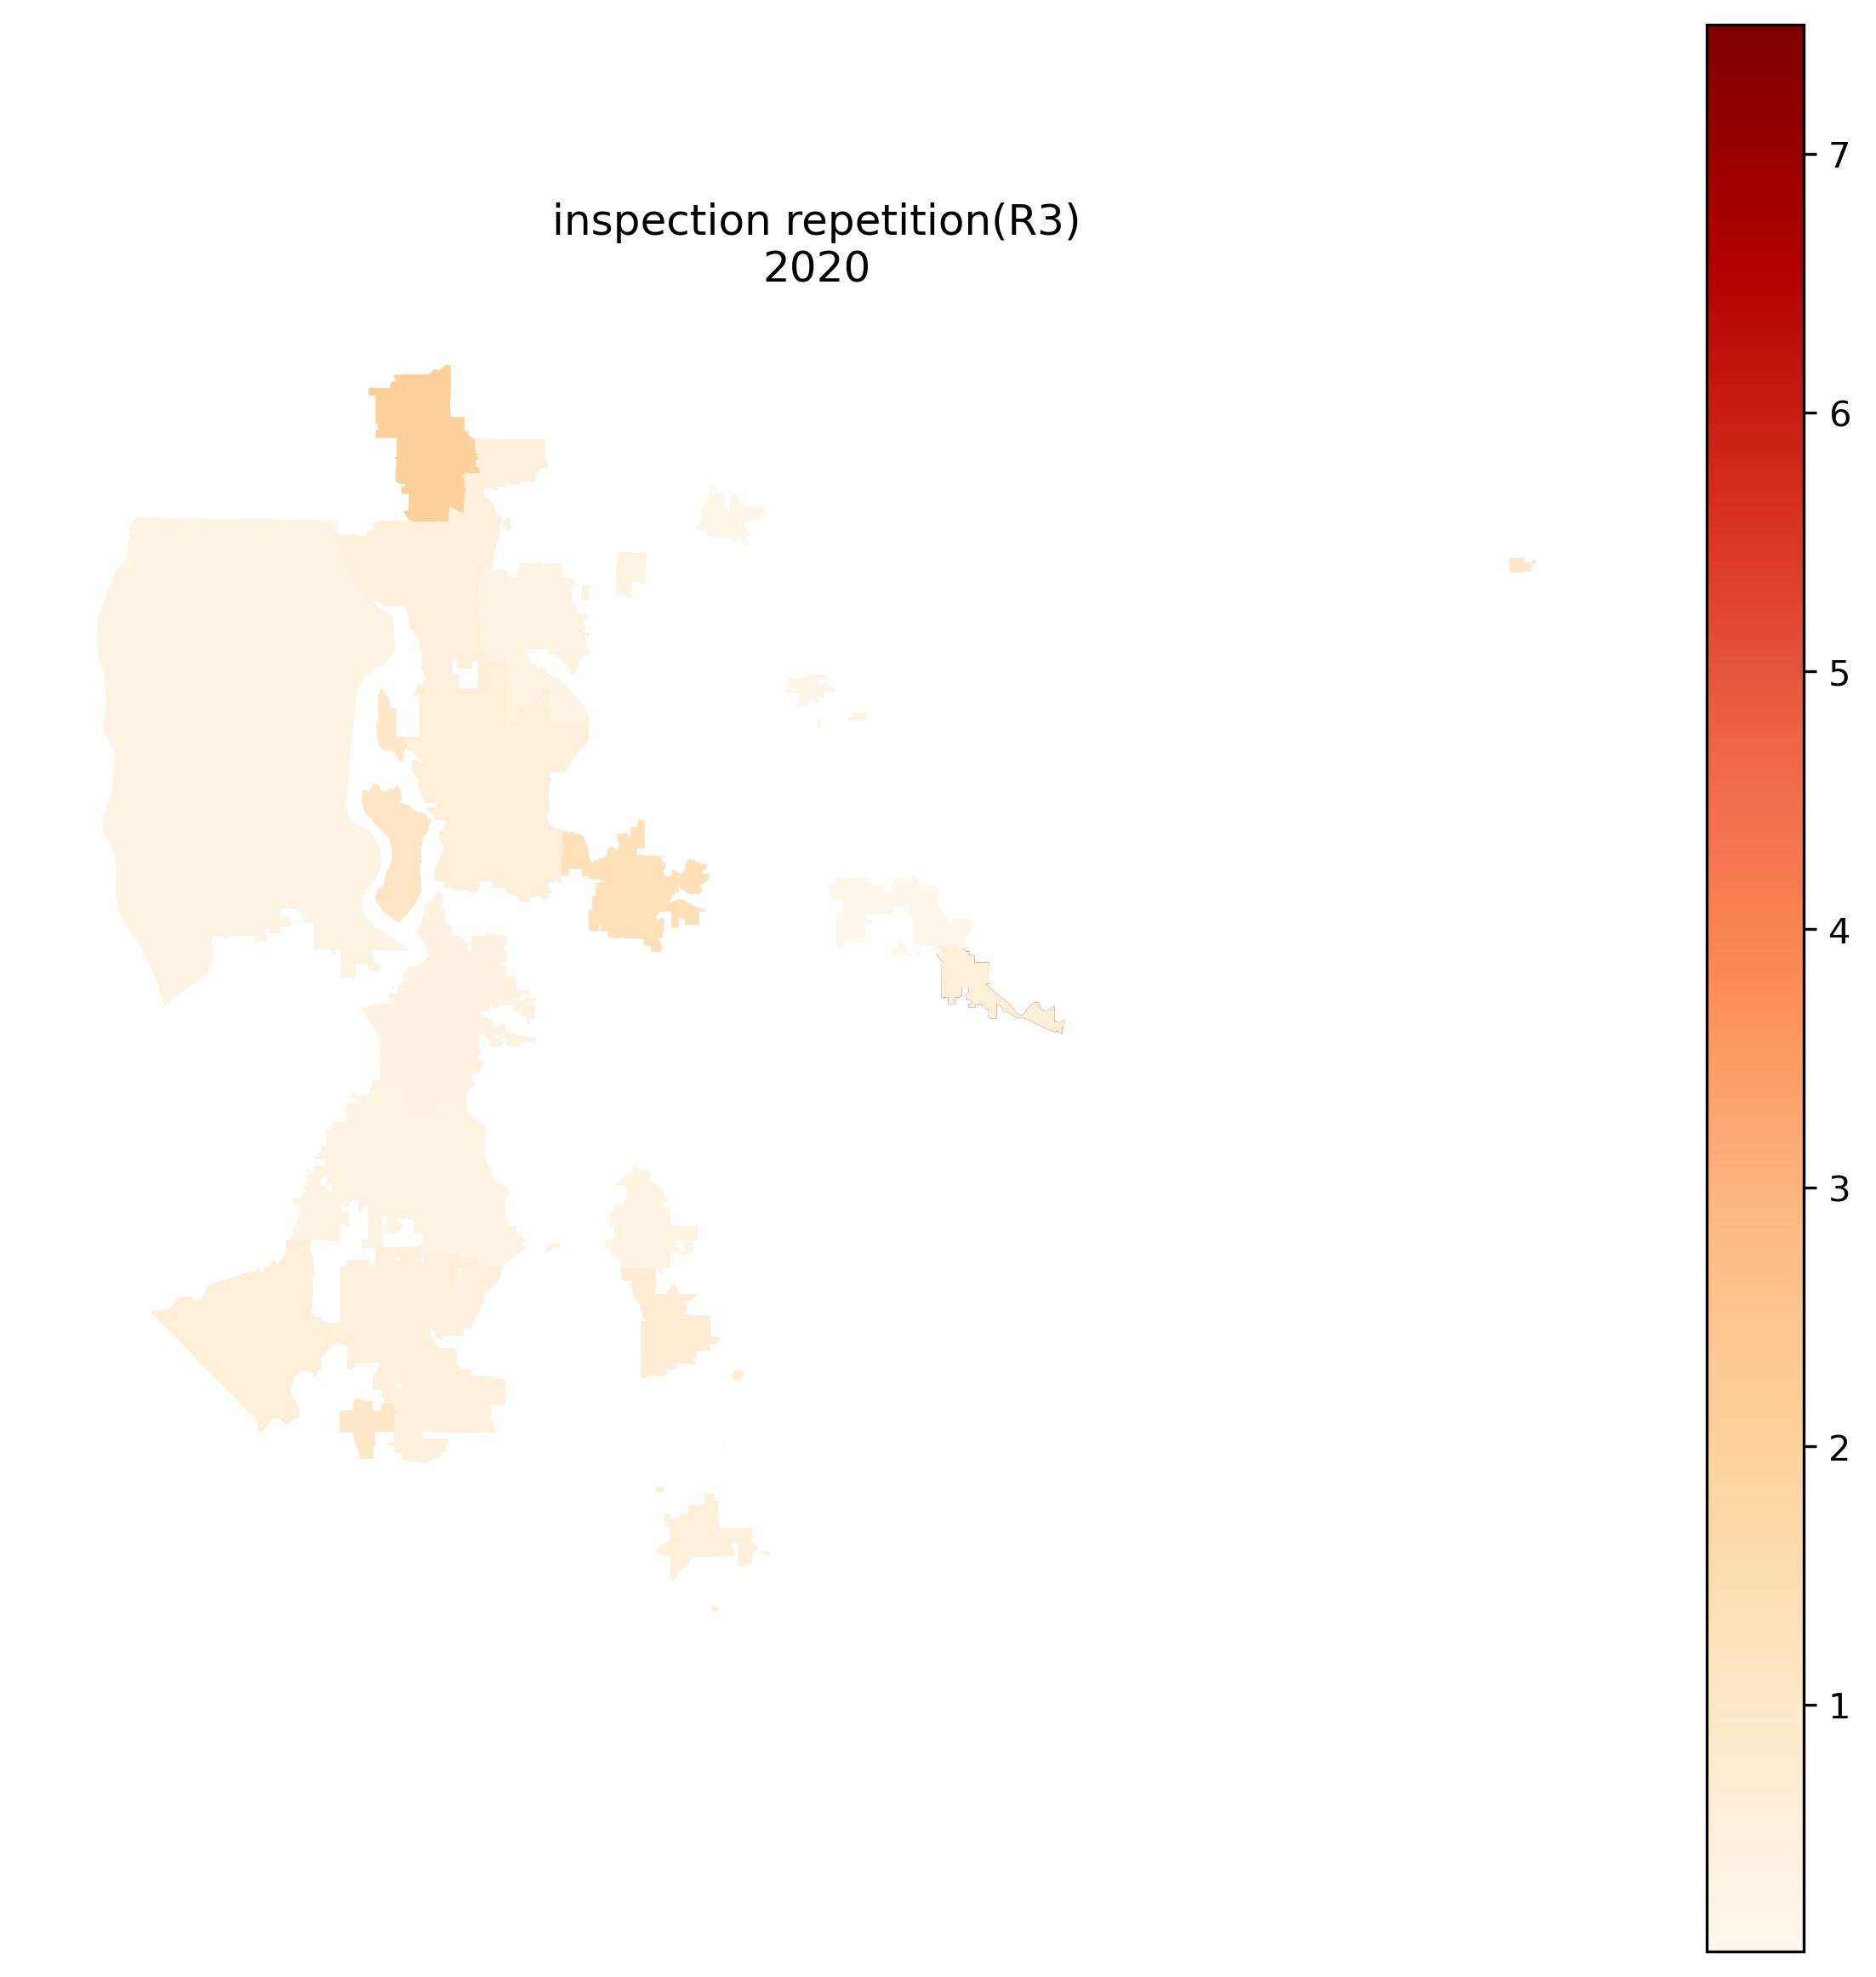

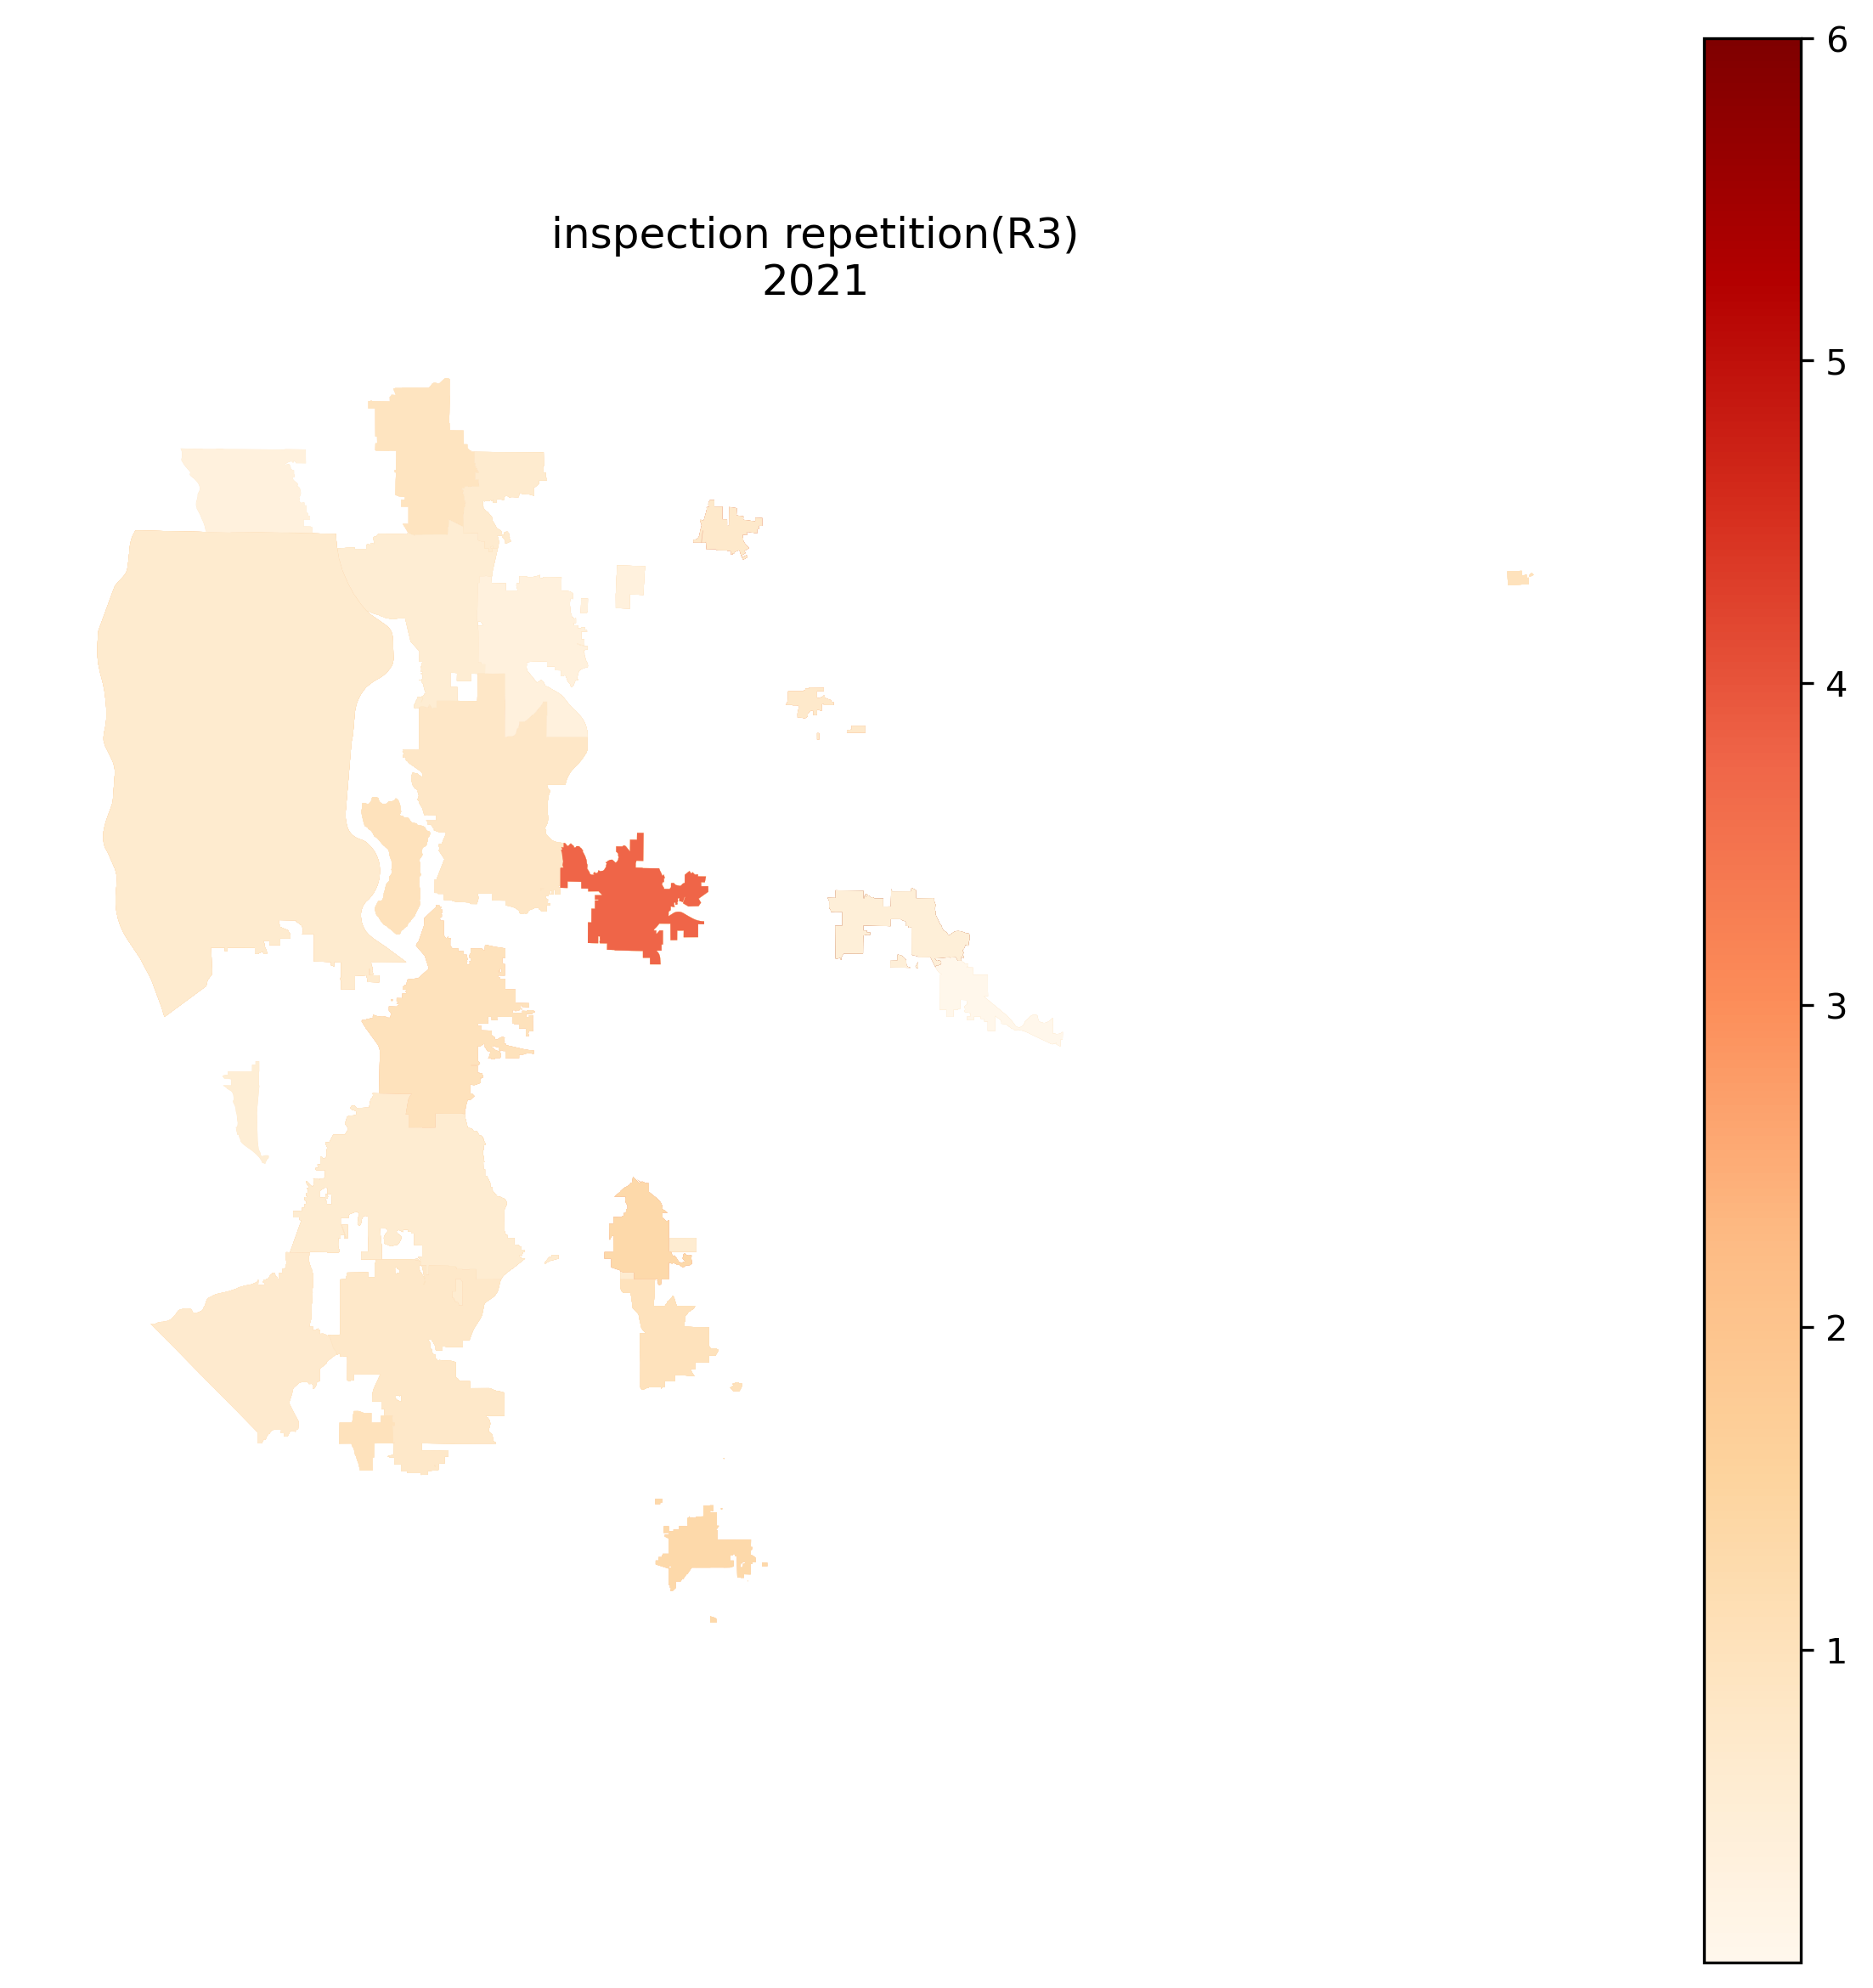

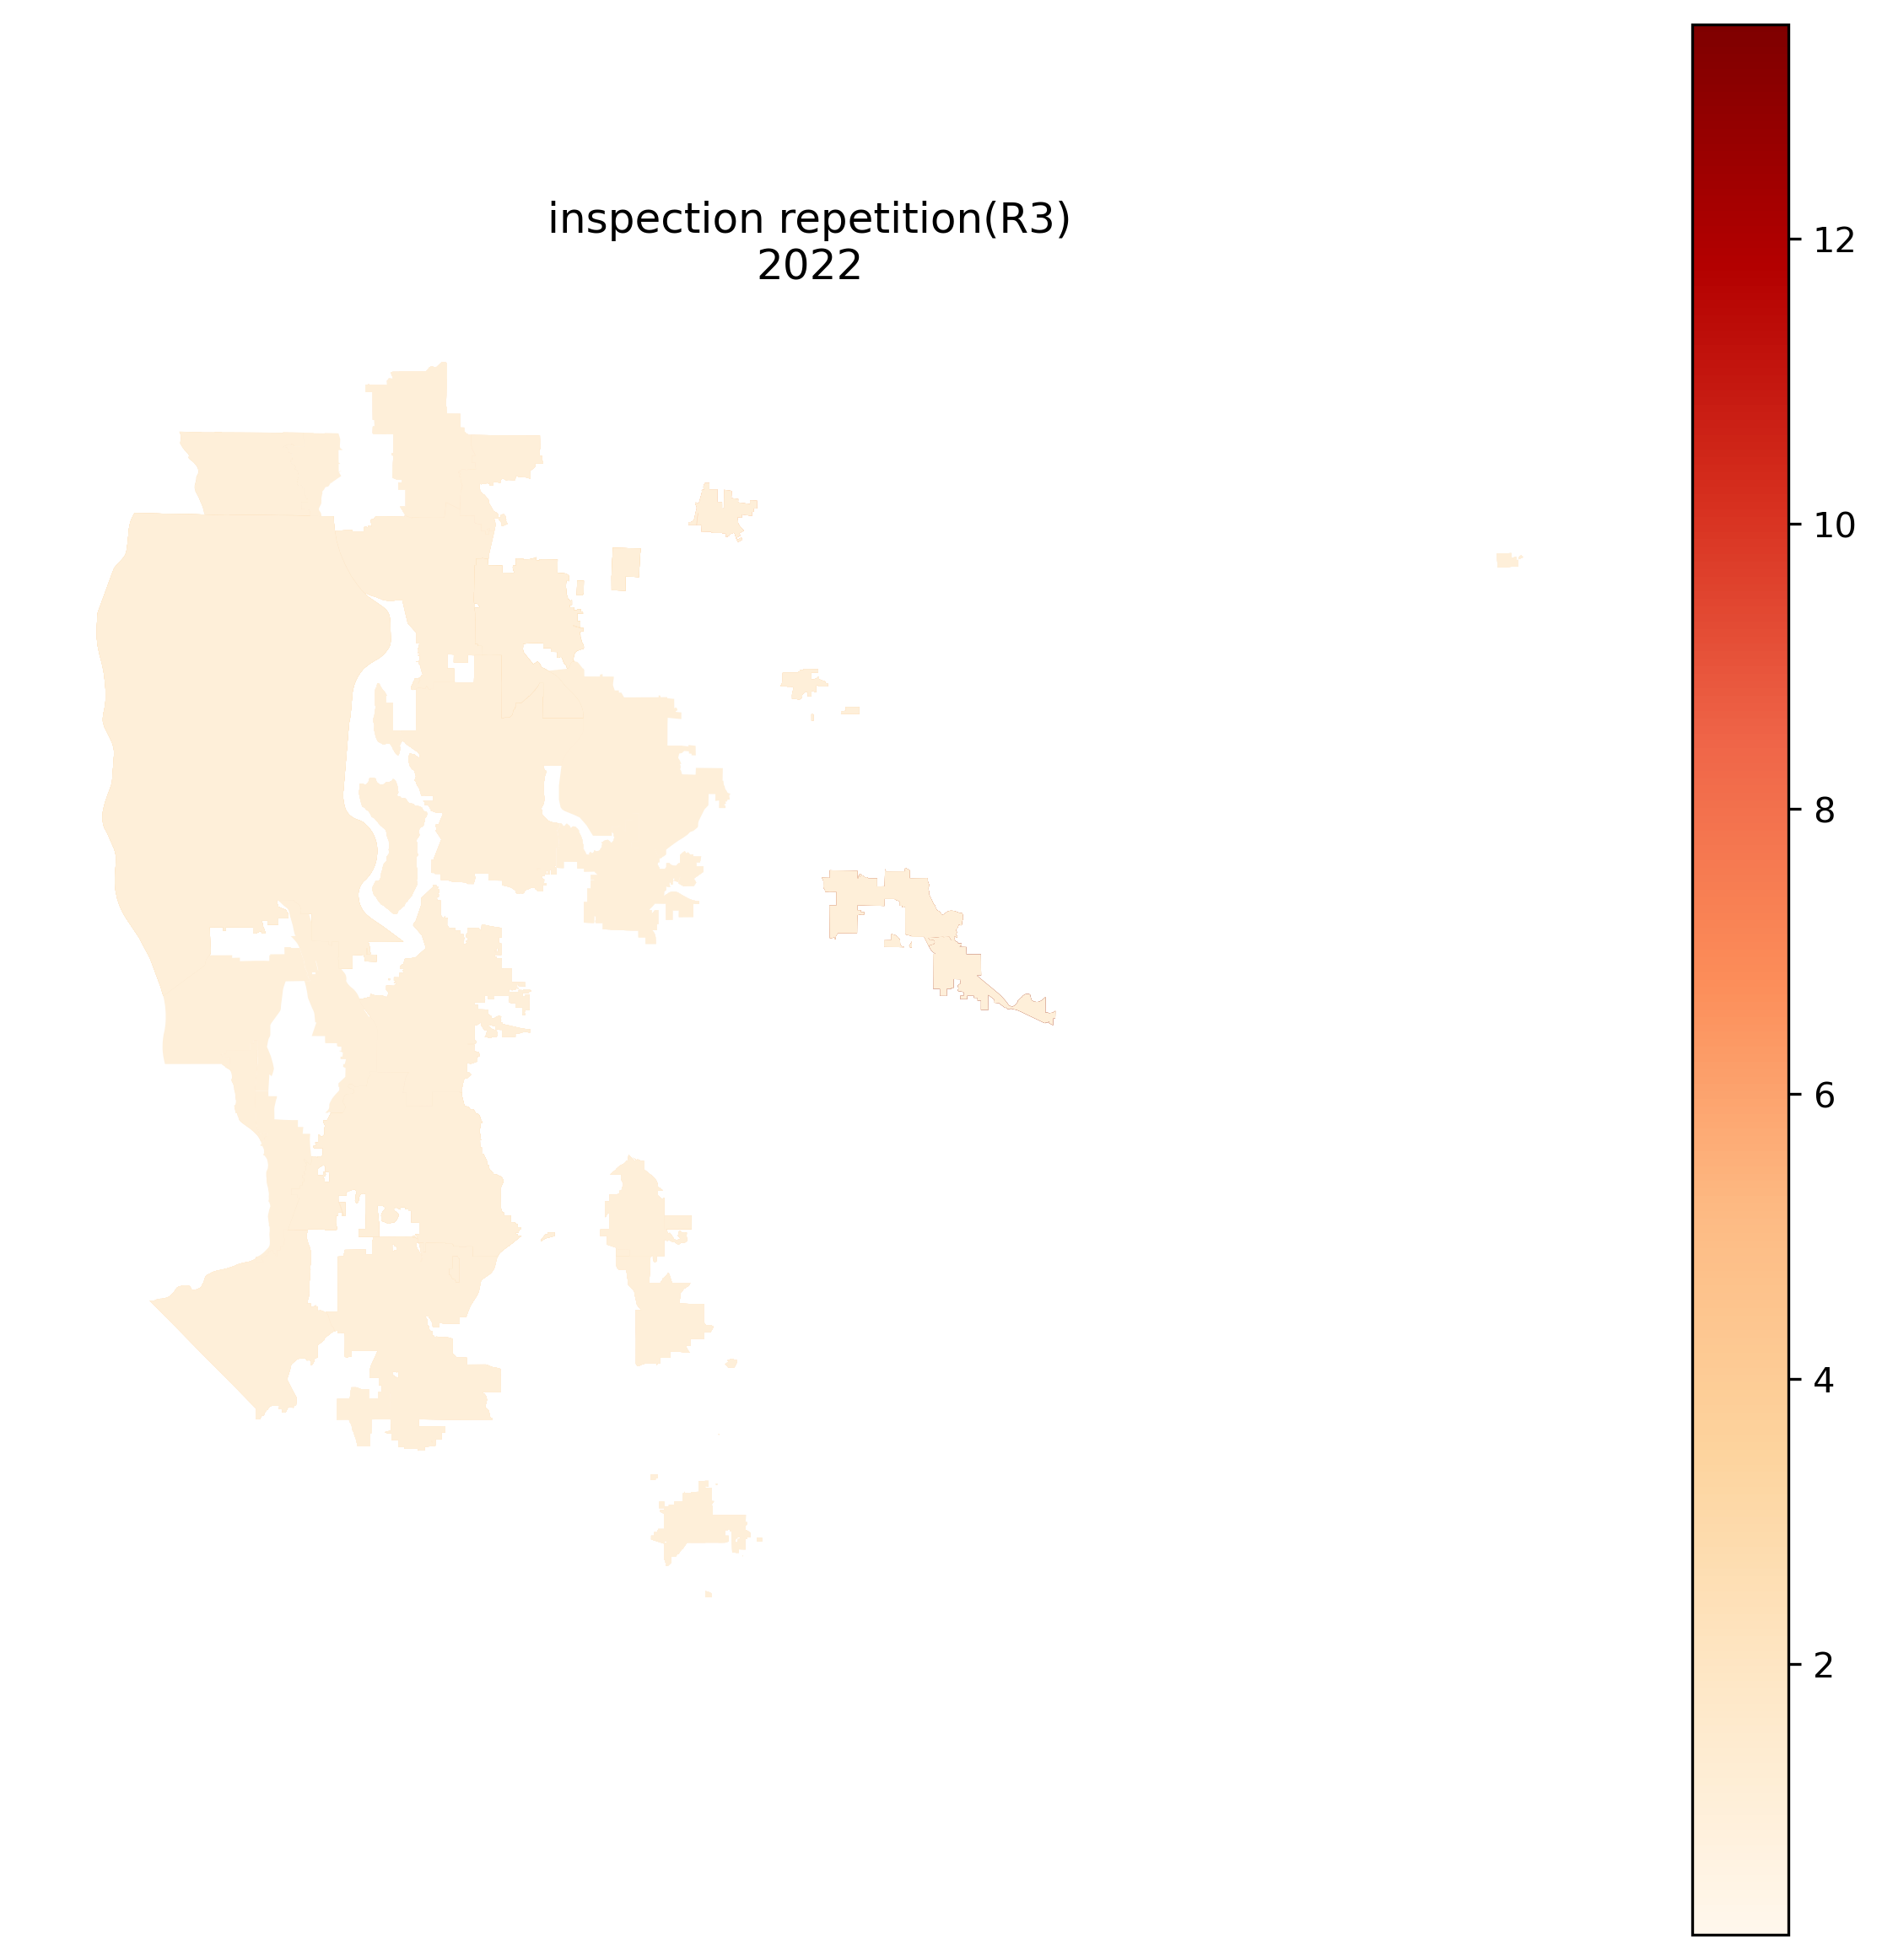

In [113]:
for year in range(2006, 2023):
    fig,ax = plt.subplots(1,1,figsize = (10,10),dpi = 300)
    geopandas.GeoDataFrame(R3_final3[R3_final3["year_x"]==year],geometry= "geometry").plot(column="inspection_per_rest",legend=True, cmap='OrRd' ,label ="inspection repetition" , ax = ax)
    # plt.axis("off")
    # plt.legend()
    # ax.set
    # plt.savefig("")
    ax.set_axis_off()
    # ax.legend(title = "Proportion")
#     ax.legend(fontsize=20,
          
#           loc=(1, .1),
#           title="LEGEND")

    ax.set_title(f"inspection repetition(R3)\n{year}")
    plt.savefig(f"IPR_{year}.jpeg" , bbox_inches = "tight")
    plt.show()

# risk 2

In [92]:
R2=df.loc[df['Risk_category']=='Risk Category II']
R2.head()

Name             Program Identifier  \
48                 100TH AVE CAKES                100TH AVE CAKES   
49                 100TH AVE CAKES                100TH AVE CAKES   
50                 100TH AVE CAKES                100TH AVE CAKES   
402  203 DEGREES FAHRENHEIT COFFEE  203 DEGREES FAHRENHEIT COFFEE   
403  203 DEGREES FAHRENHEIT COFFEE  203 DEGREES FAHRENHEIT COFFEE   

    Inspection Date                           Description  \
48       2022-06-03  Bakery-no seating - Risk Category II   
49       2022-04-29  Bakery-no seating - Risk Category II   
50       2021-12-09  Bakery-no seating - Risk Category II   
402      2022-01-26      Seating 13-50 - Risk Category II   
403      2021-08-11      Seating 13-50 - Risk Category II   

                         Address      City Zip Code           Phone  \
48              15364 NE 96TH PL   REDMOND    98052  (758) 753-4760   
49              15364 NE 96TH PL   REDMOND    98052  (758) 753-4760   
50              15364 NE 96TH PL   REDMOND    98052  (758) 753-4760   
402  11901 NE VILLAGE PL STE 171  KIRKLAND    98034  (206) 227-4293   
403  11901 NE VILLAGE PL STE 171  KIRKLAND    98034  (206) 227-4293   

      Longitude  Latitude  ... Violation Type Violation Description  \
48  -122.133729  47.68723  ...            NaN                   NaN   
49  -122.133729  47.68723  ...            NaN                   NaN   
50  -122.133729  47.68723  ...            NaN                   NaN   
402 -122.180170  47.71251  ...            NaN                   NaN   
403 -122.180170  47.71251  ...            NaN                   NaN   

     Violation Points Business_ID Inspection_Serial_Num Violation_Record_ID  \
48                  0   PR0089941             DANKUP6XO                 NaN   
49                  0   PR0089941             DAEIAN0EI                 NaN   
50                  0   PR0089941             DAY0JNLHM                 NaN   
402                 0   PR0088112             DASFWFNFJ                 NaN   
403                 0   PR0088112             DA1VODIJM                 NaN   

    Grade           capacity     Risk_category    year  
48    NaN  Bakery-no seating  Risk Category II  2022.0  
49    NaN  Bakery-no seating  Risk Category II  2022.0  
50    NaN  Bakery-no seating  Risk Category II  2021.0  
402   1.0      Seating 13-50  Risk Category II  2022.0  
403   1.0      Seating 13-50  Risk Category II  2021.0  

[5 rows x 25 columns]

In [114]:
resturans2=R2.groupby(['City','year'],as_index=False).count()
resturans_incities2=resturans2[['year','City','Business_ID']]
resturans_incities2

year         City  Business_ID
0    2006.0       AUBURN           12
1    2007.0       AUBURN           21
2    2008.0       AUBURN           27
3    2009.0       AUBURN           33
4    2010.0       AUBURN           41
..      ...          ...          ...
795  2018.0  Woodinville           10
796  2019.0  Woodinville            5
797  2020.0  Woodinville            6
798  2021.0  Woodinville            2
799  2022.0  Woodinville           11

[800 rows x 3 columns]

In [94]:
R2_final=R2.groupby(["year" ,'City'],as_index=False).count()
R2_final=R2_final[['year','City','Inspection Date']]
R2_final

year           City  Inspection Date
0    2006.0         AUBURN               12
1    2006.0         Auburn                1
2    2006.0       BELLEVUE               27
3    2006.0        BOTHELL               13
4    2006.0         BURIEN               13
..      ...            ...              ...
795  2022.0        TUKWILA               40
796  2022.0        Tukwila                1
797  2022.0  VASHON ISLAND                3
798  2022.0    WOODINVILLE               36
799  2022.0    Woodinville               11

[800 rows x 3 columns]

In [115]:
R2_final2=(pd.merge(left=R2_final , right= resturans_incities2 , left_on= "City" , right_on="City" , how = "inner" ))
R2_final2

R2_final2['inspection_per_rest']=R2_final2['Inspection Date']/R2_final2['Business_ID']
R2_final2

year_x      City  Inspection Date  year_y  Business_ID  \
0      2006.0    AUBURN               12  2006.0           12   
1      2006.0    AUBURN               12  2007.0           21   
2      2006.0    AUBURN               12  2008.0           27   
3      2006.0    AUBURN               12  2009.0           33   
4      2006.0    AUBURN               12  2010.0           41   
...       ...       ...              ...     ...          ...   
12973  2022.0  MUKILTEO                1  2020.0            1   
12974  2022.0  MUKILTEO                1  2022.0            1   
12975  2022.0    Burien                1  2022.0            1   
12976  2022.0    Seatac                1  2022.0            1   
12977  2022.0   Tukwila                1  2022.0            1   

       inspection_per_rest  
0                 1.000000  
1                 0.571429  
2                 0.444444  
3                 0.363636  
4                 0.292683  
...                    ...  
12973             1.000000  
12974             1.000000  
12975             1.000000  
12976             1.000000  
12977             1.000000  

[12978 rows x 6 columns]

In [116]:
R2_final3=(pd.merge(left=R2_final2 , right= Cities , left_on= "City" , right_on="CityName" , how = "inner" ))
R2_final3

year_x        City  Inspection Date  year_y  Business_ID  \
0     2006.0      Auburn                1  2006.0            1   
1     2006.0      Auburn                1  2007.0            2   
2     2006.0      Auburn                1  2008.0            1   
3     2006.0      Auburn                1  2009.0            2   
4     2006.0      Auburn                1  2010.0            3   
...      ...         ...              ...     ...          ...   
4838  2022.0  Snoqualmie                2  2019.0            1   
4839  2022.0  Snoqualmie                2  2021.0            1   
4840  2022.0  Snoqualmie                2  2022.0            2   
4841  2022.0      Burien                1  2022.0            1   
4842  2022.0     Tukwila                1  2022.0            1   

      inspection_per_rest  OBJECTID    CityName CountySeat  CityGNISPl  \
0                1.000000      9118      Auburn         no     2409755   
1                0.500000      9118      Auburn         no     2409755   
2                1.000000      9118      Auburn         no     2409755   
3                0.500000      9118      Auburn         no     2409755   
4                0.333333      9118      Auburn         no     2409755   
...                   ...       ...         ...        ...         ...   
4838             2.000000      9059  Snoqualmie         no     2411915   
4839             2.000000      9059  Snoqualmie         no     2411915   
4840             1.000000      9059  Snoqualmie         no     2411915   
4841             1.000000      9132      Burien         no     2409940   
4842             1.000000      9141     Tukwila         no     2412106   

      LastUpdate CountyFIPS MajorCity CityFIPSLo OFMCityCod  \
0     2016-02-29      53033        no    5303180       0055   
1     2016-02-29      53033        no    5303180       0055   
2     2016-02-29      53033        no    5303180       0055   
3     2016-02-29      53033        no    5303180       0055   
4     2016-02-29      53033        no    5303180       0055   
...          ...        ...       ...        ...        ...   
4838  2012-12-03      53033        no    5365205       1185   
4839  2012-12-03      53033        no    5365205       1185   
4840  2012-12-03      53033        no    5365205       1185   
4841  2010-05-31      53033        no    5308850       0139   
4842  2013-02-28      53033        no    5372625       1320   

                                    GlobalID    SHAPESTAre     SHAPESTLen  \
0     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
1     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
2     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
3     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
4     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
...                                      ...           ...            ...   
4838  {8AC2B6A7-17F1-47FD-B286-69FA9E425116}  2.059886e+08  128598.606967   
4839  {8AC2B6A7-17F1-47FD-B286-69FA9E425116}  2.059886e+08  128598.606967   
4840  {8AC2B6A7-17F1-47FD-B286-69FA9E425116}  2.059886e+08  128598.606967   
4841  {98828B92-CCC5-4821-B5CD-215F7118DF43}  4.337970e+08  120258.882124   
4842  {A11B1934-334E-4C0F-B067-AE46F8B22F14}  2.663813e+08  131005.784319   

                                               geometry  
0     POLYGON ((-13606869.504 6000023.199, -13606614...  
1     POLYGON ((-13606869.504 6000023.199, -13606614...  
2     POLYGON ((-13606869.504 6000023.199, -13606614...  
3     POLYGON ((-13606869.504 6000023.199, -13606614...  
4     POLYGON ((-13606869.504 6000023.199, -13606614...  
...                                                 ...  
4838  MULTIPOLYGON (((-13561486.170 6031896.277, -13...  
4839  MULTIPOLYGON (((-13561486.170 6031896.277, -13...  
4840  MULTIPOLYGON (((-13561486.170 6031896.277, -13...  
4841  POLYGON ((-13615228.277 6025179.539, -13615209...  
4842

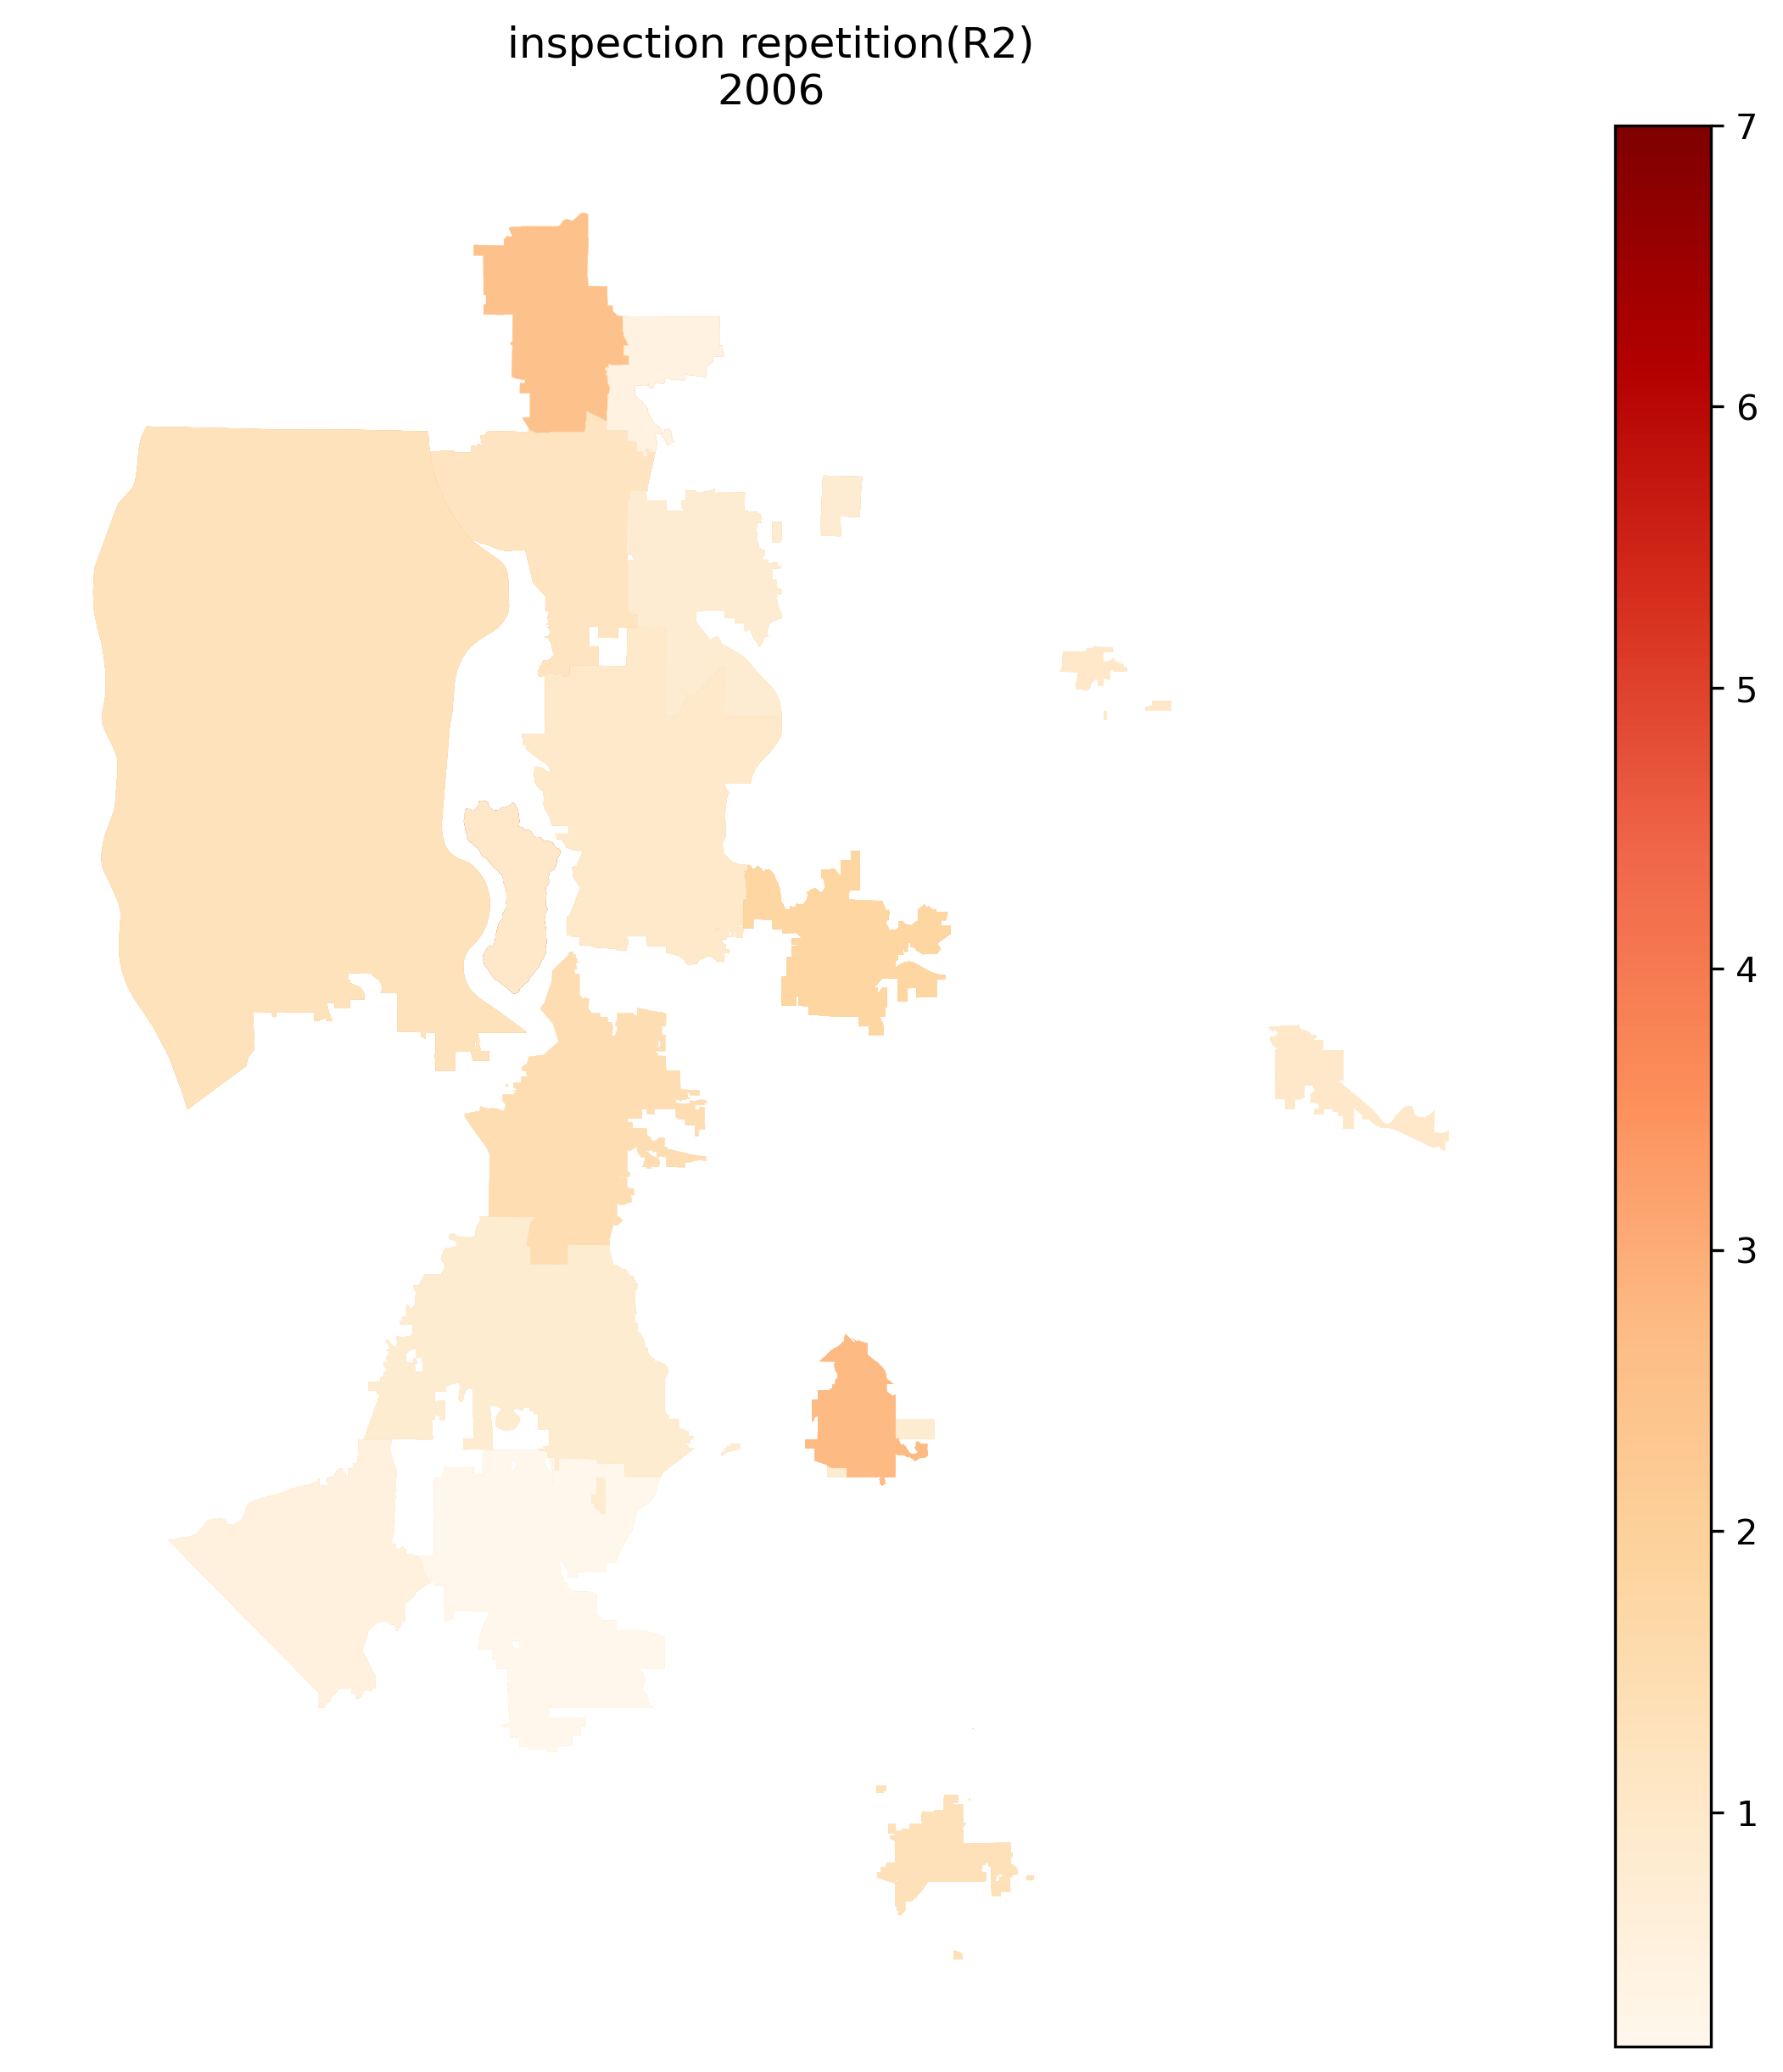

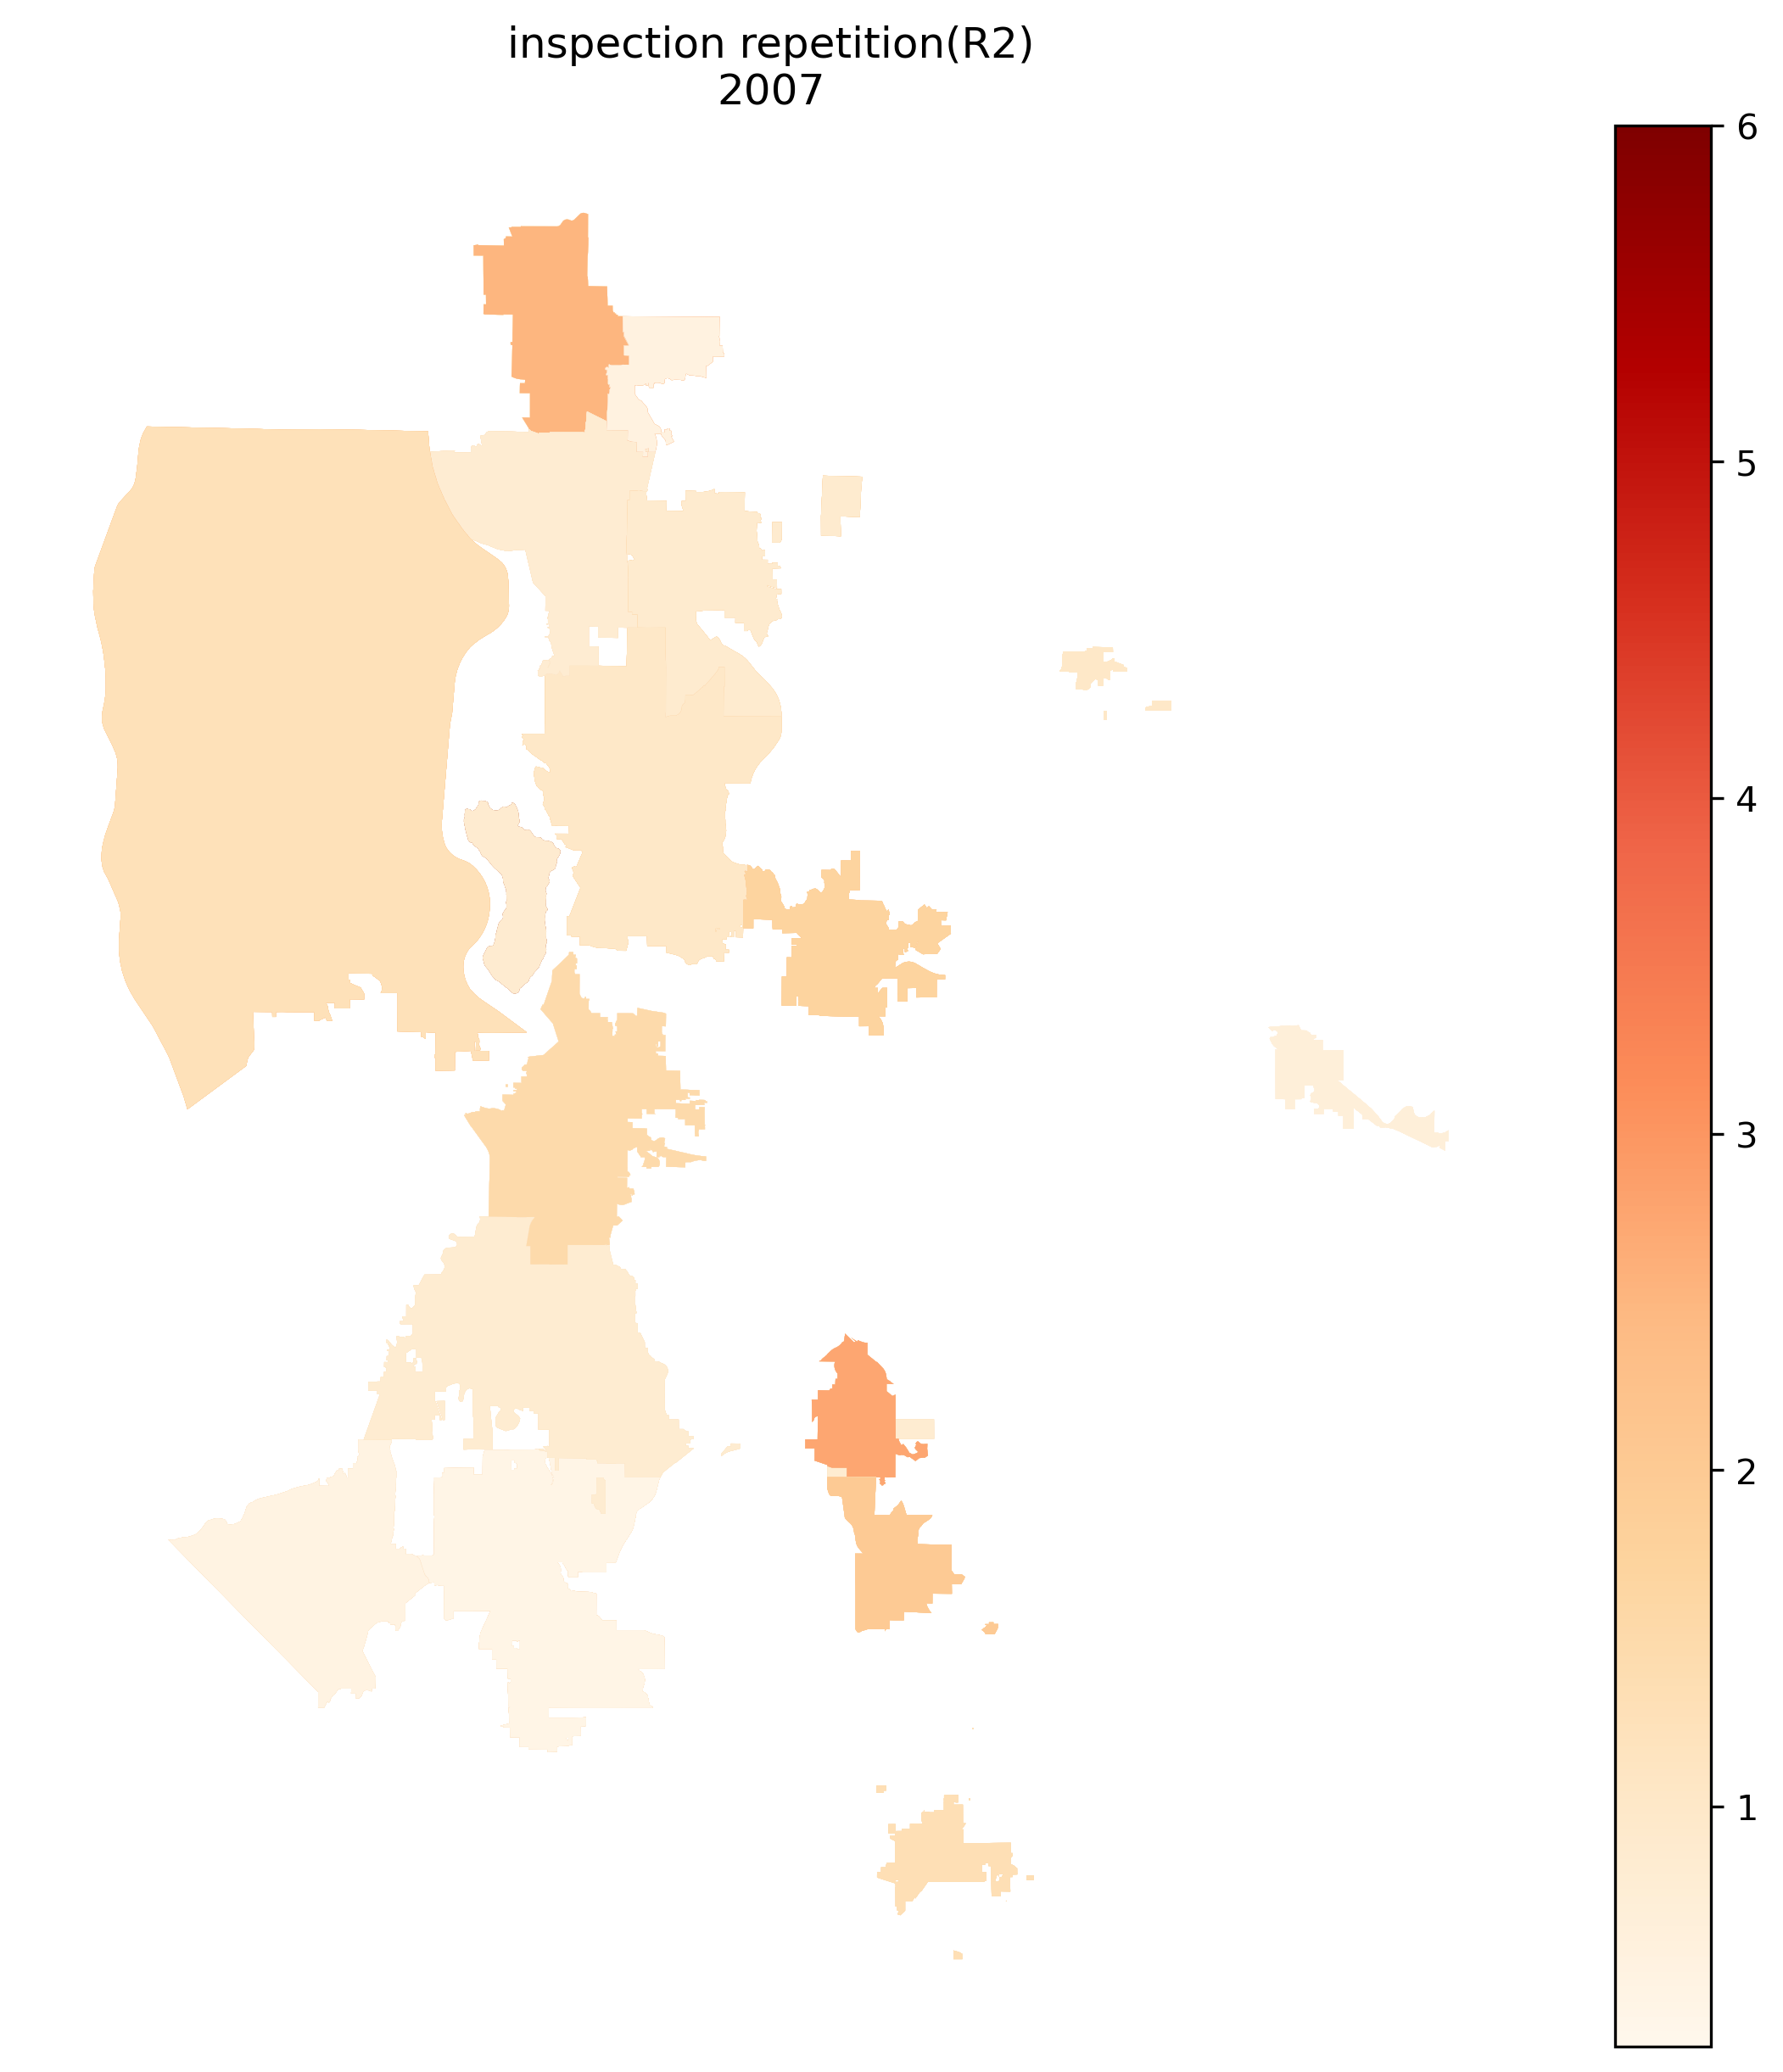

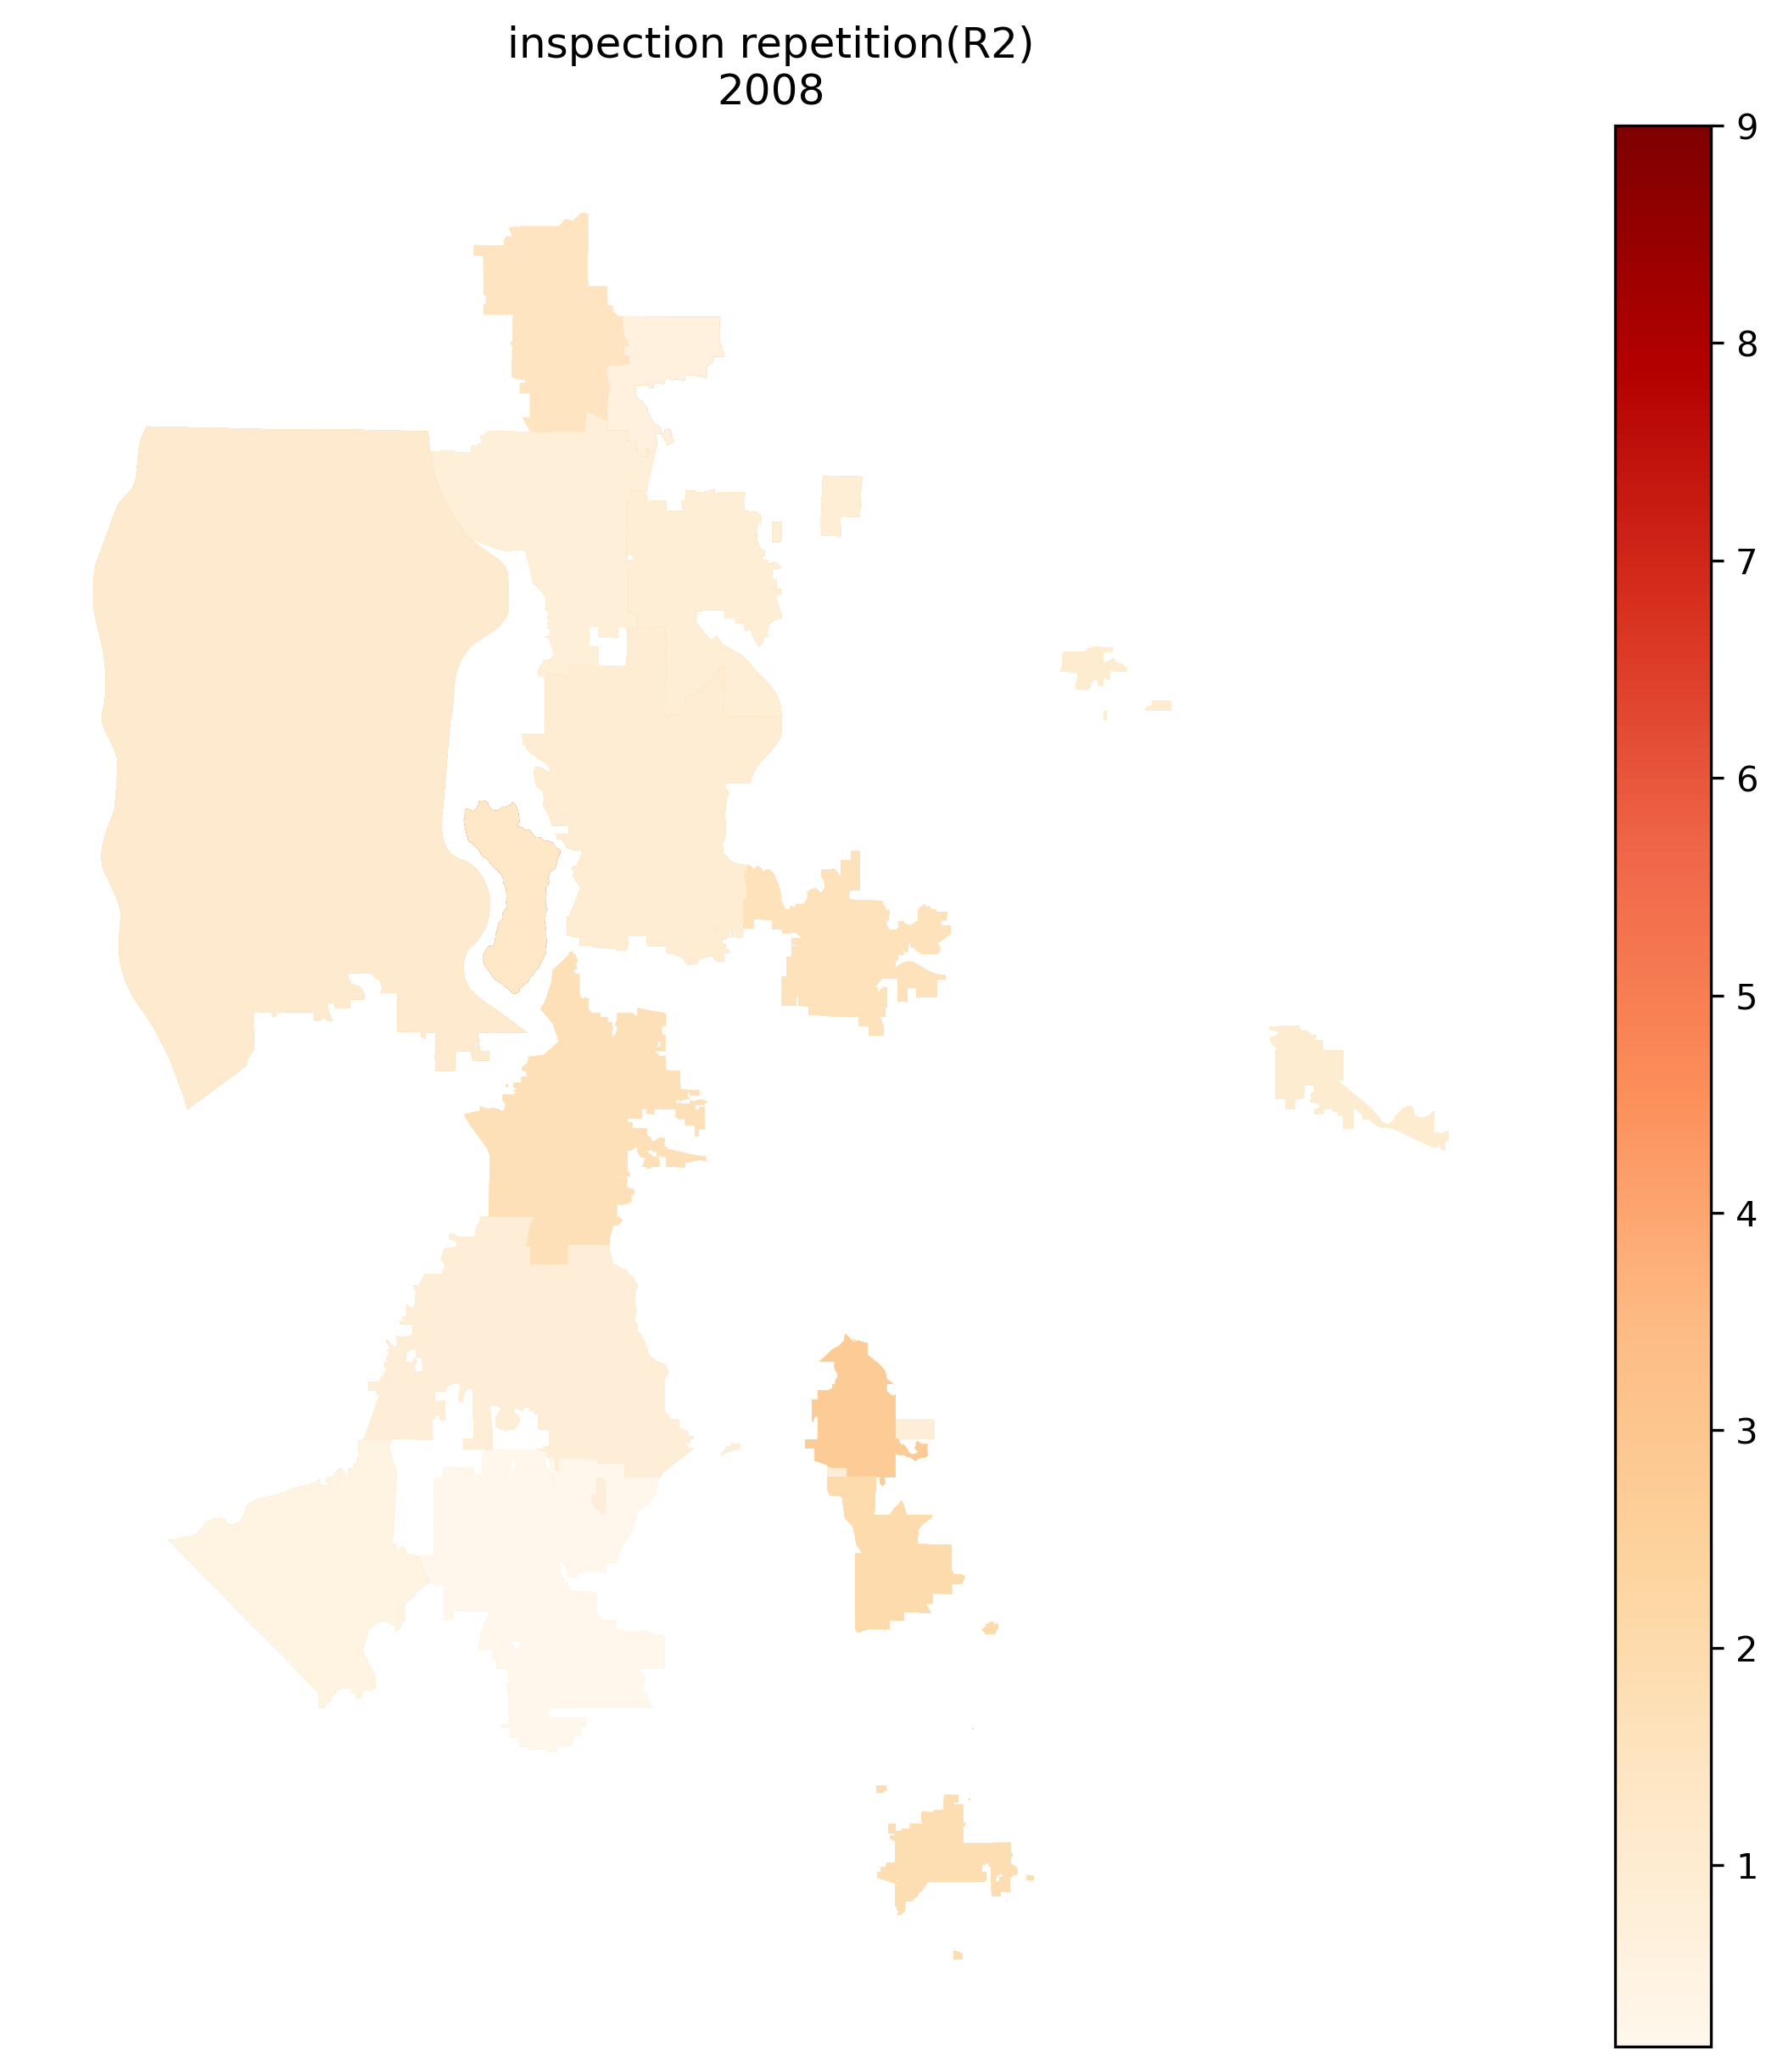

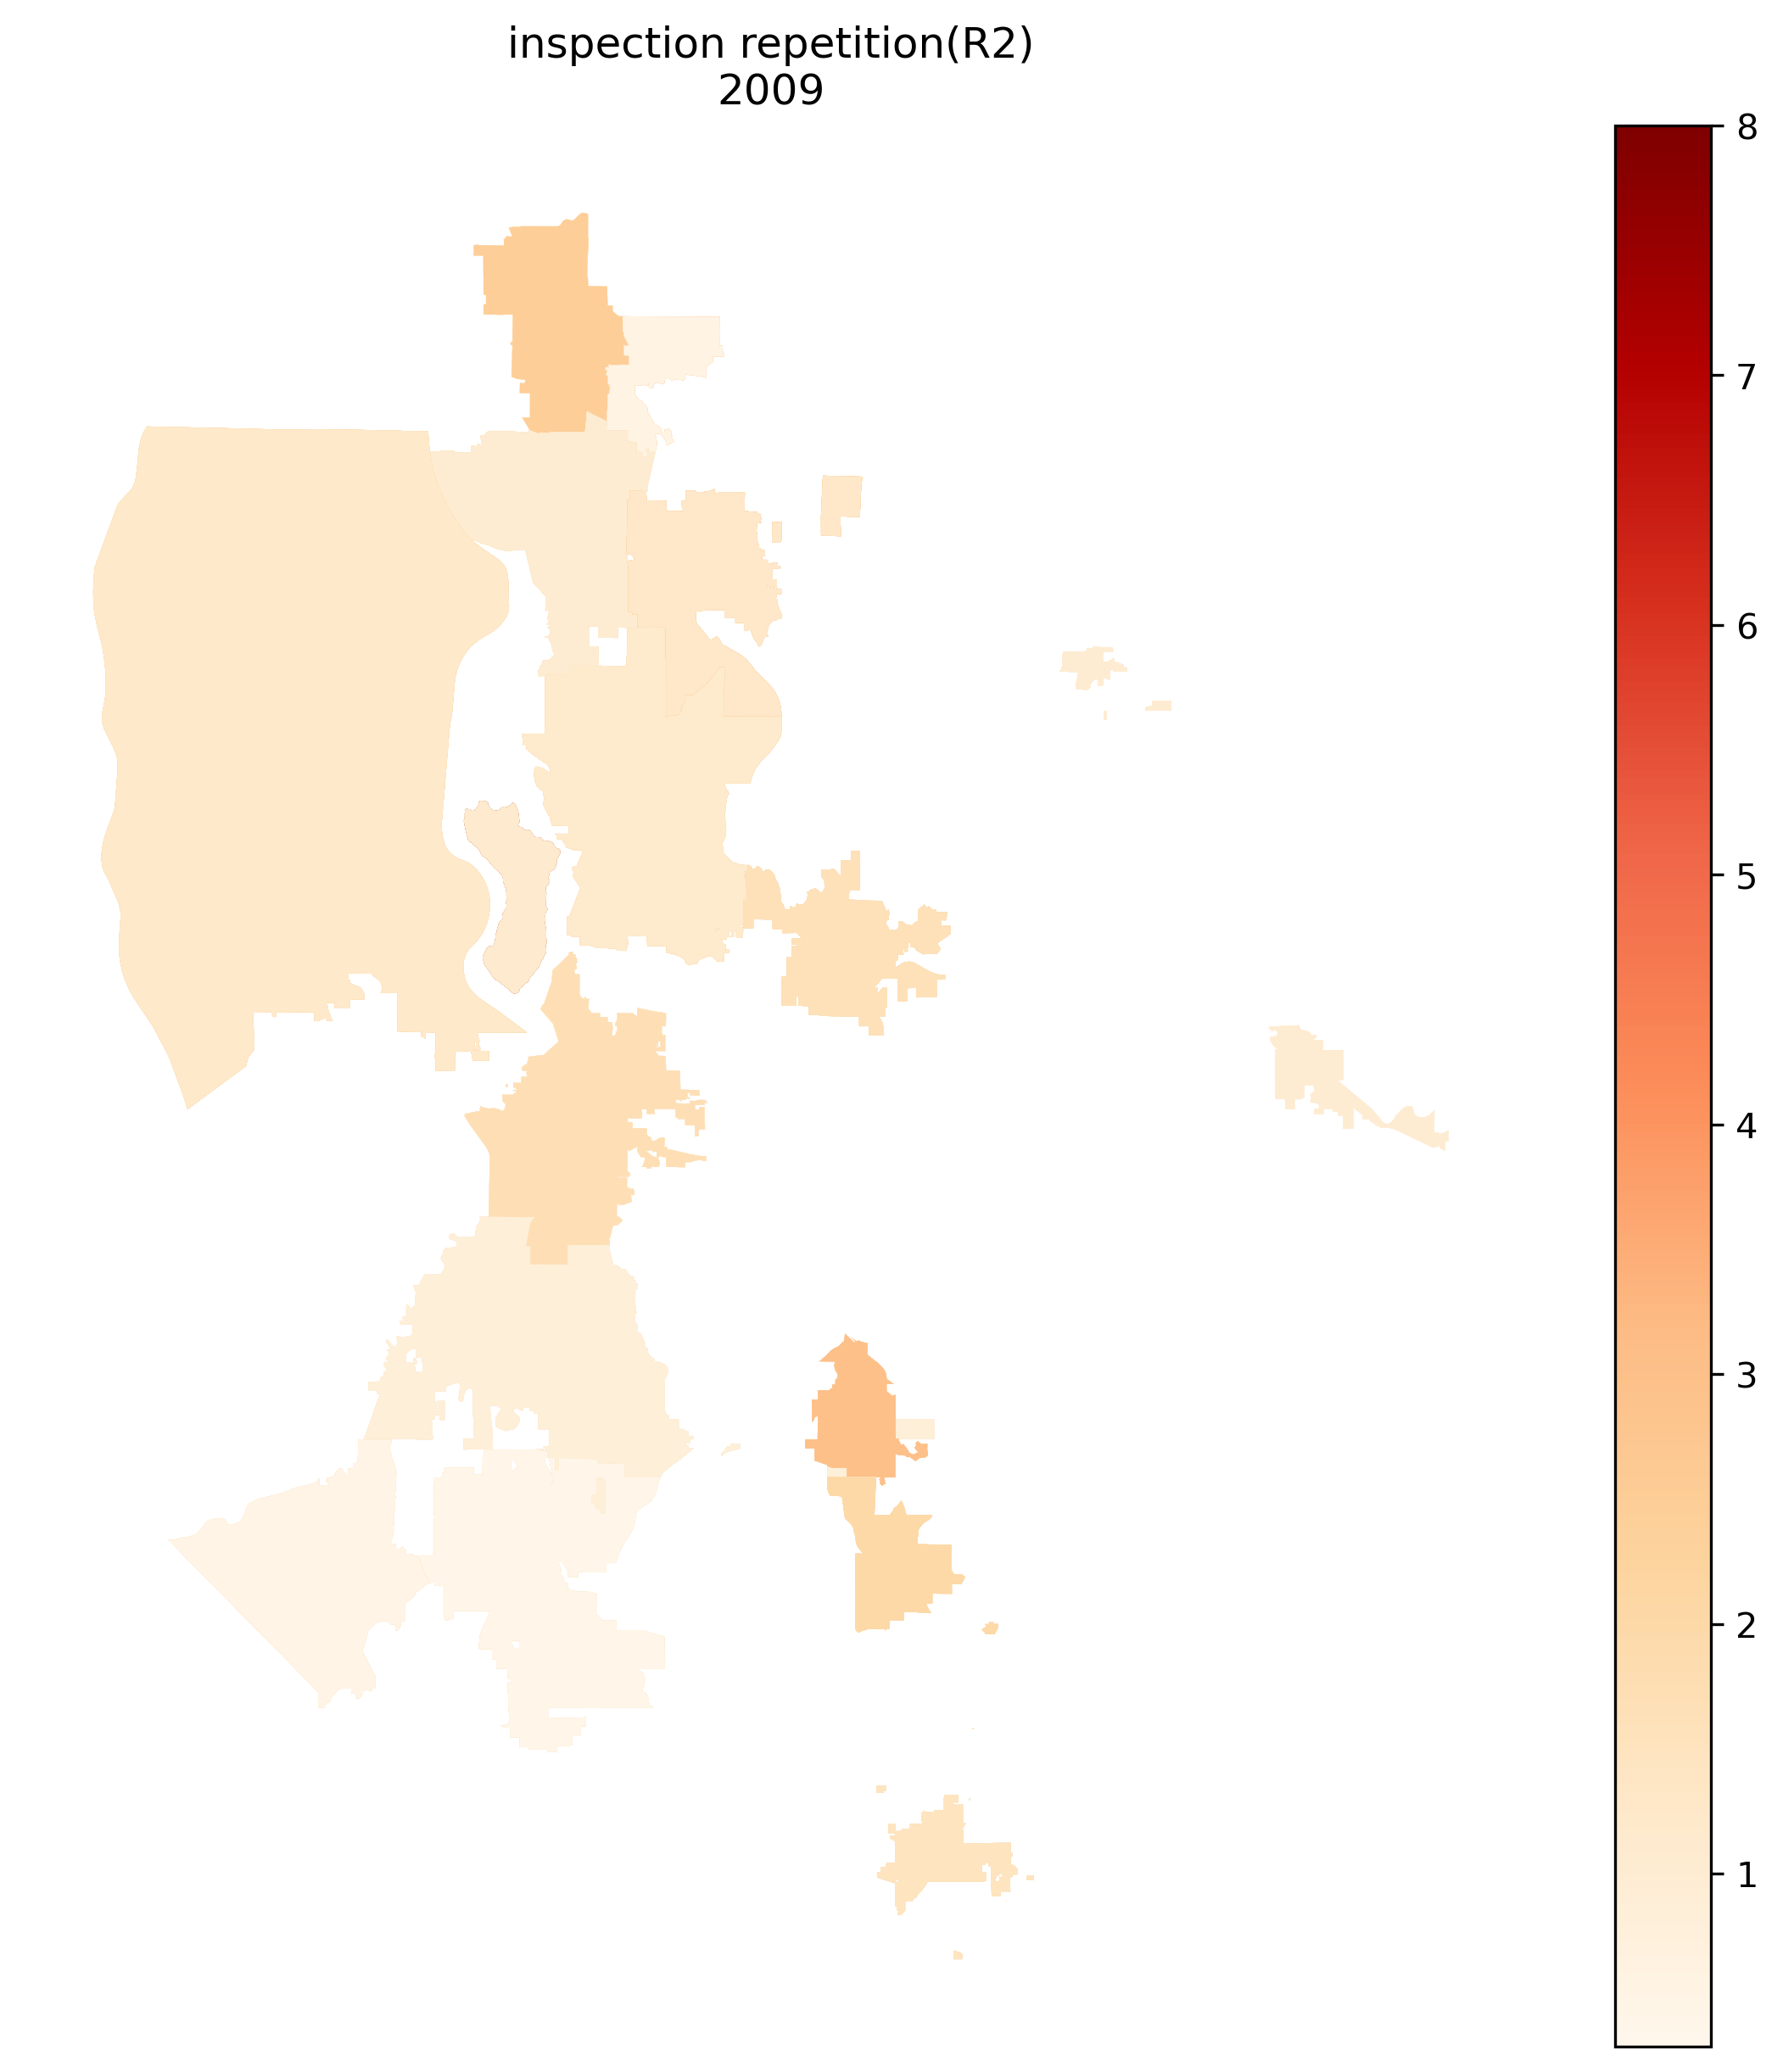

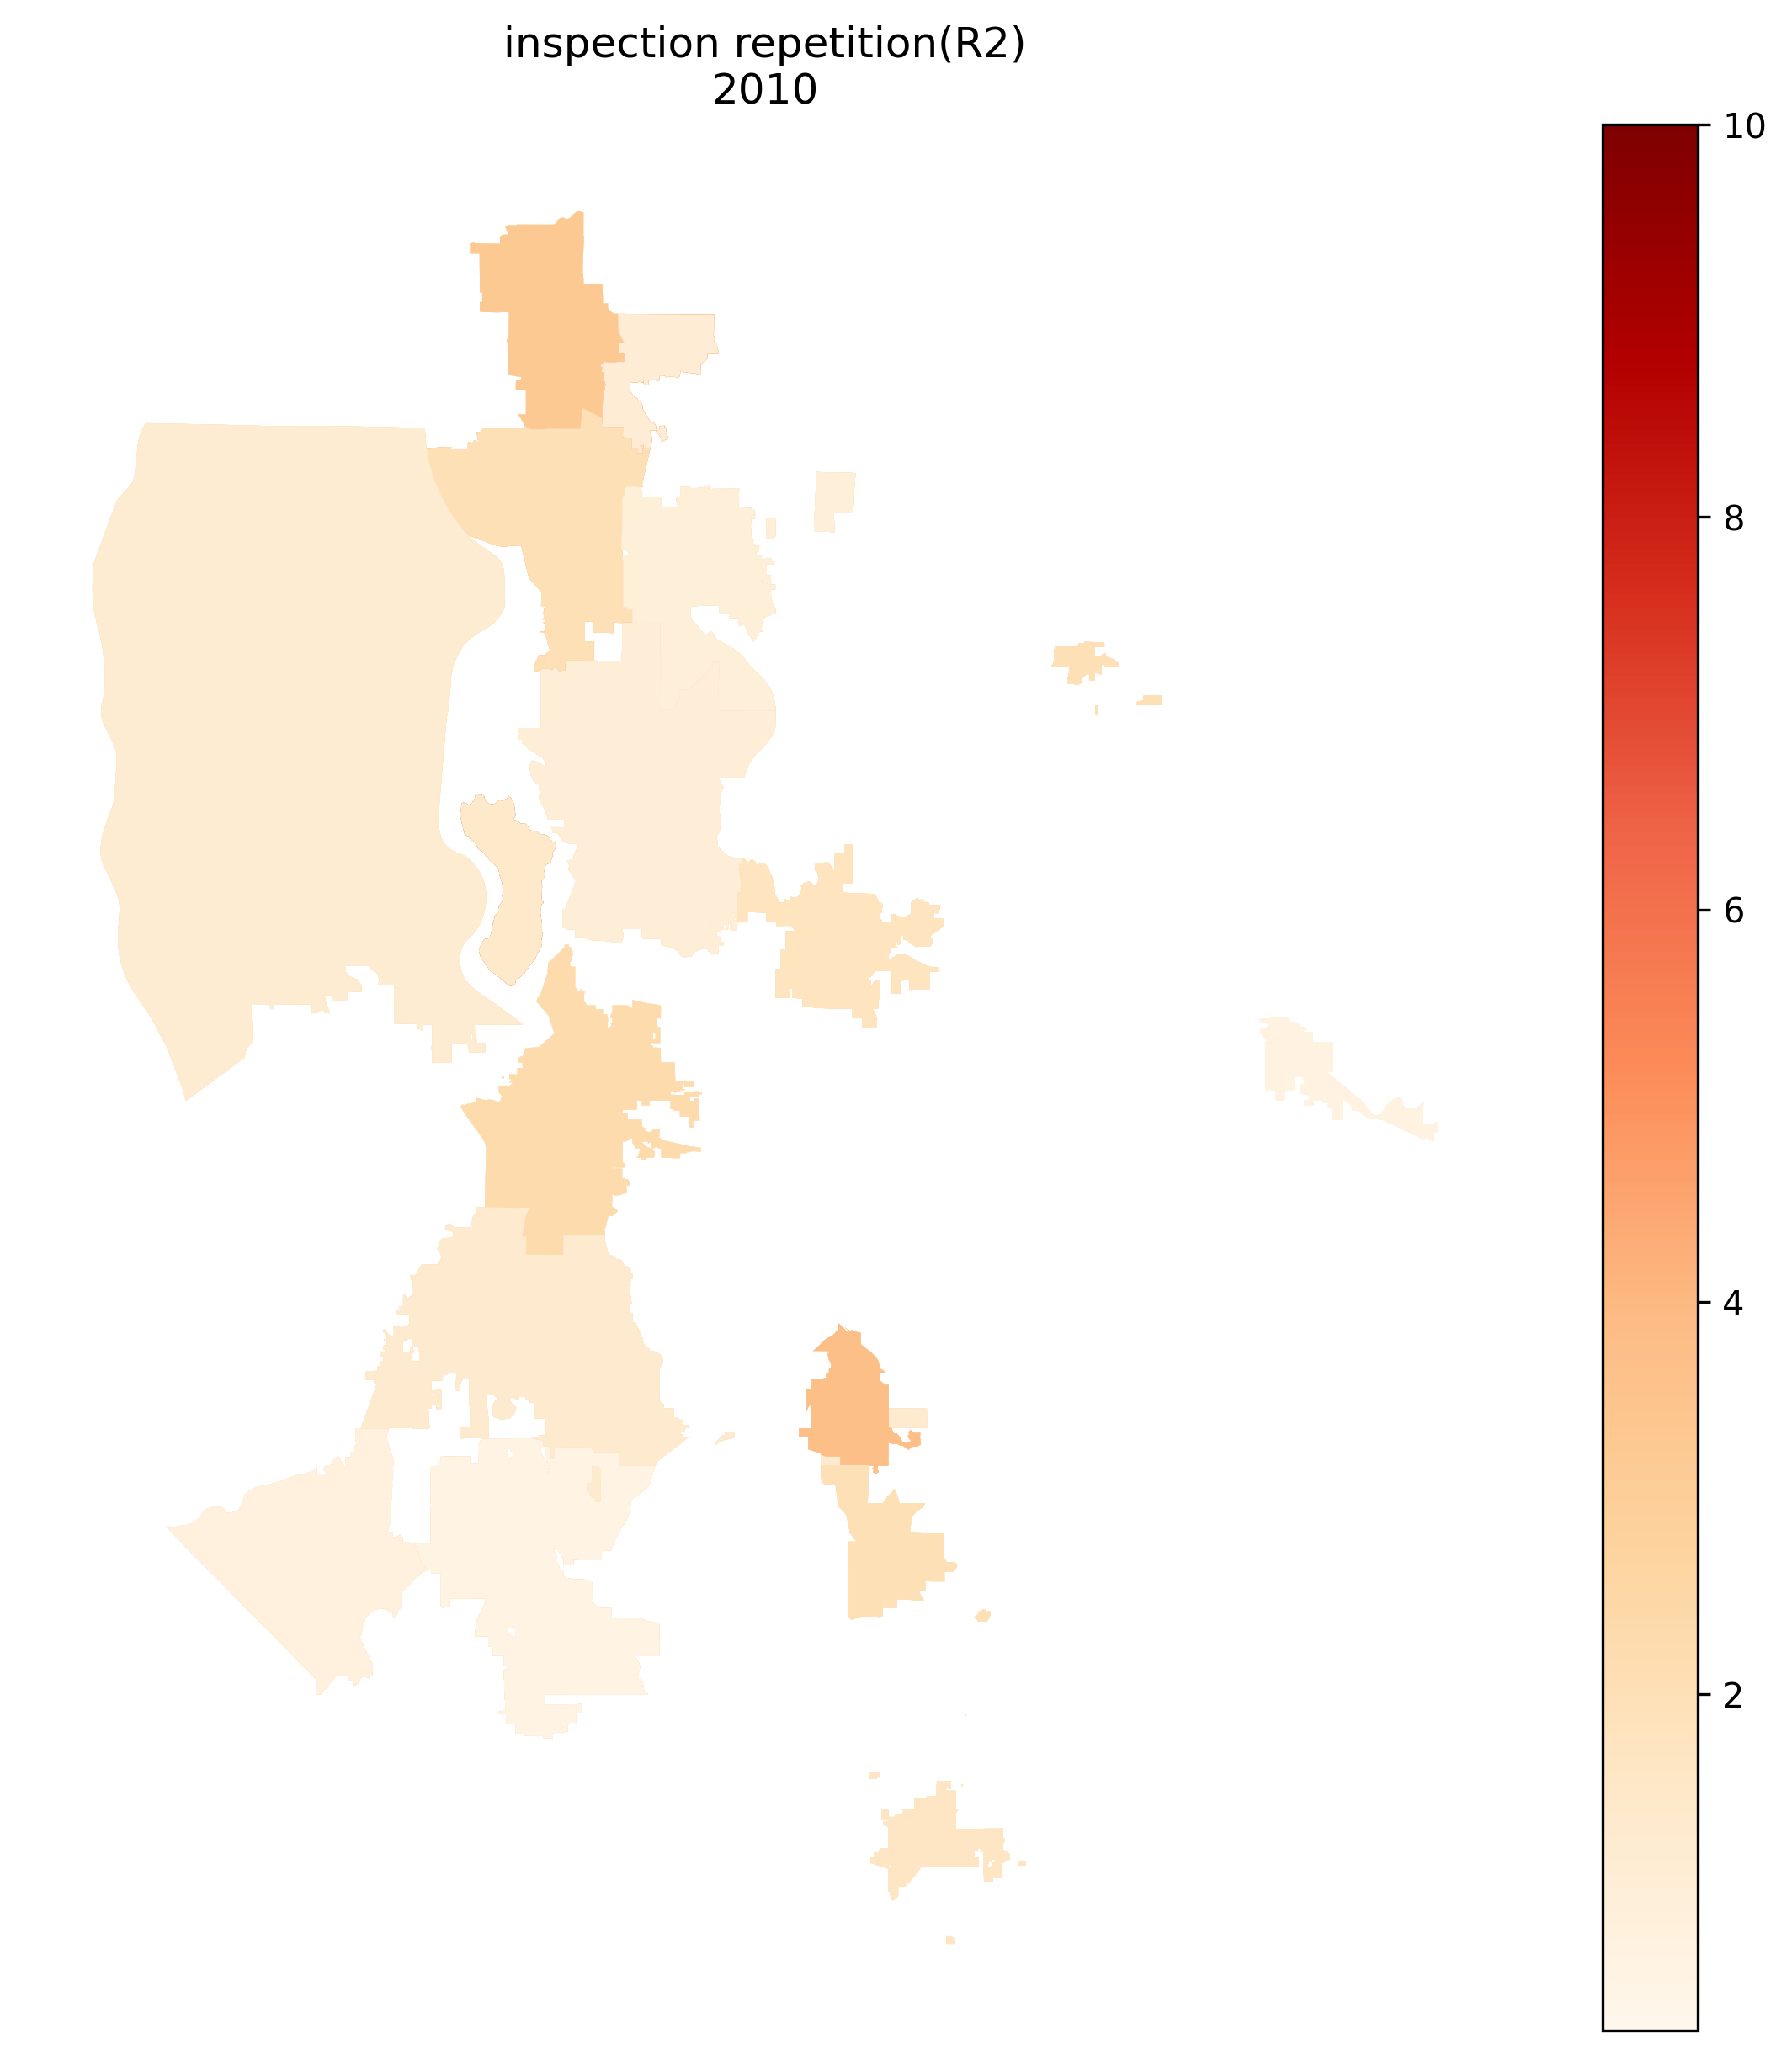

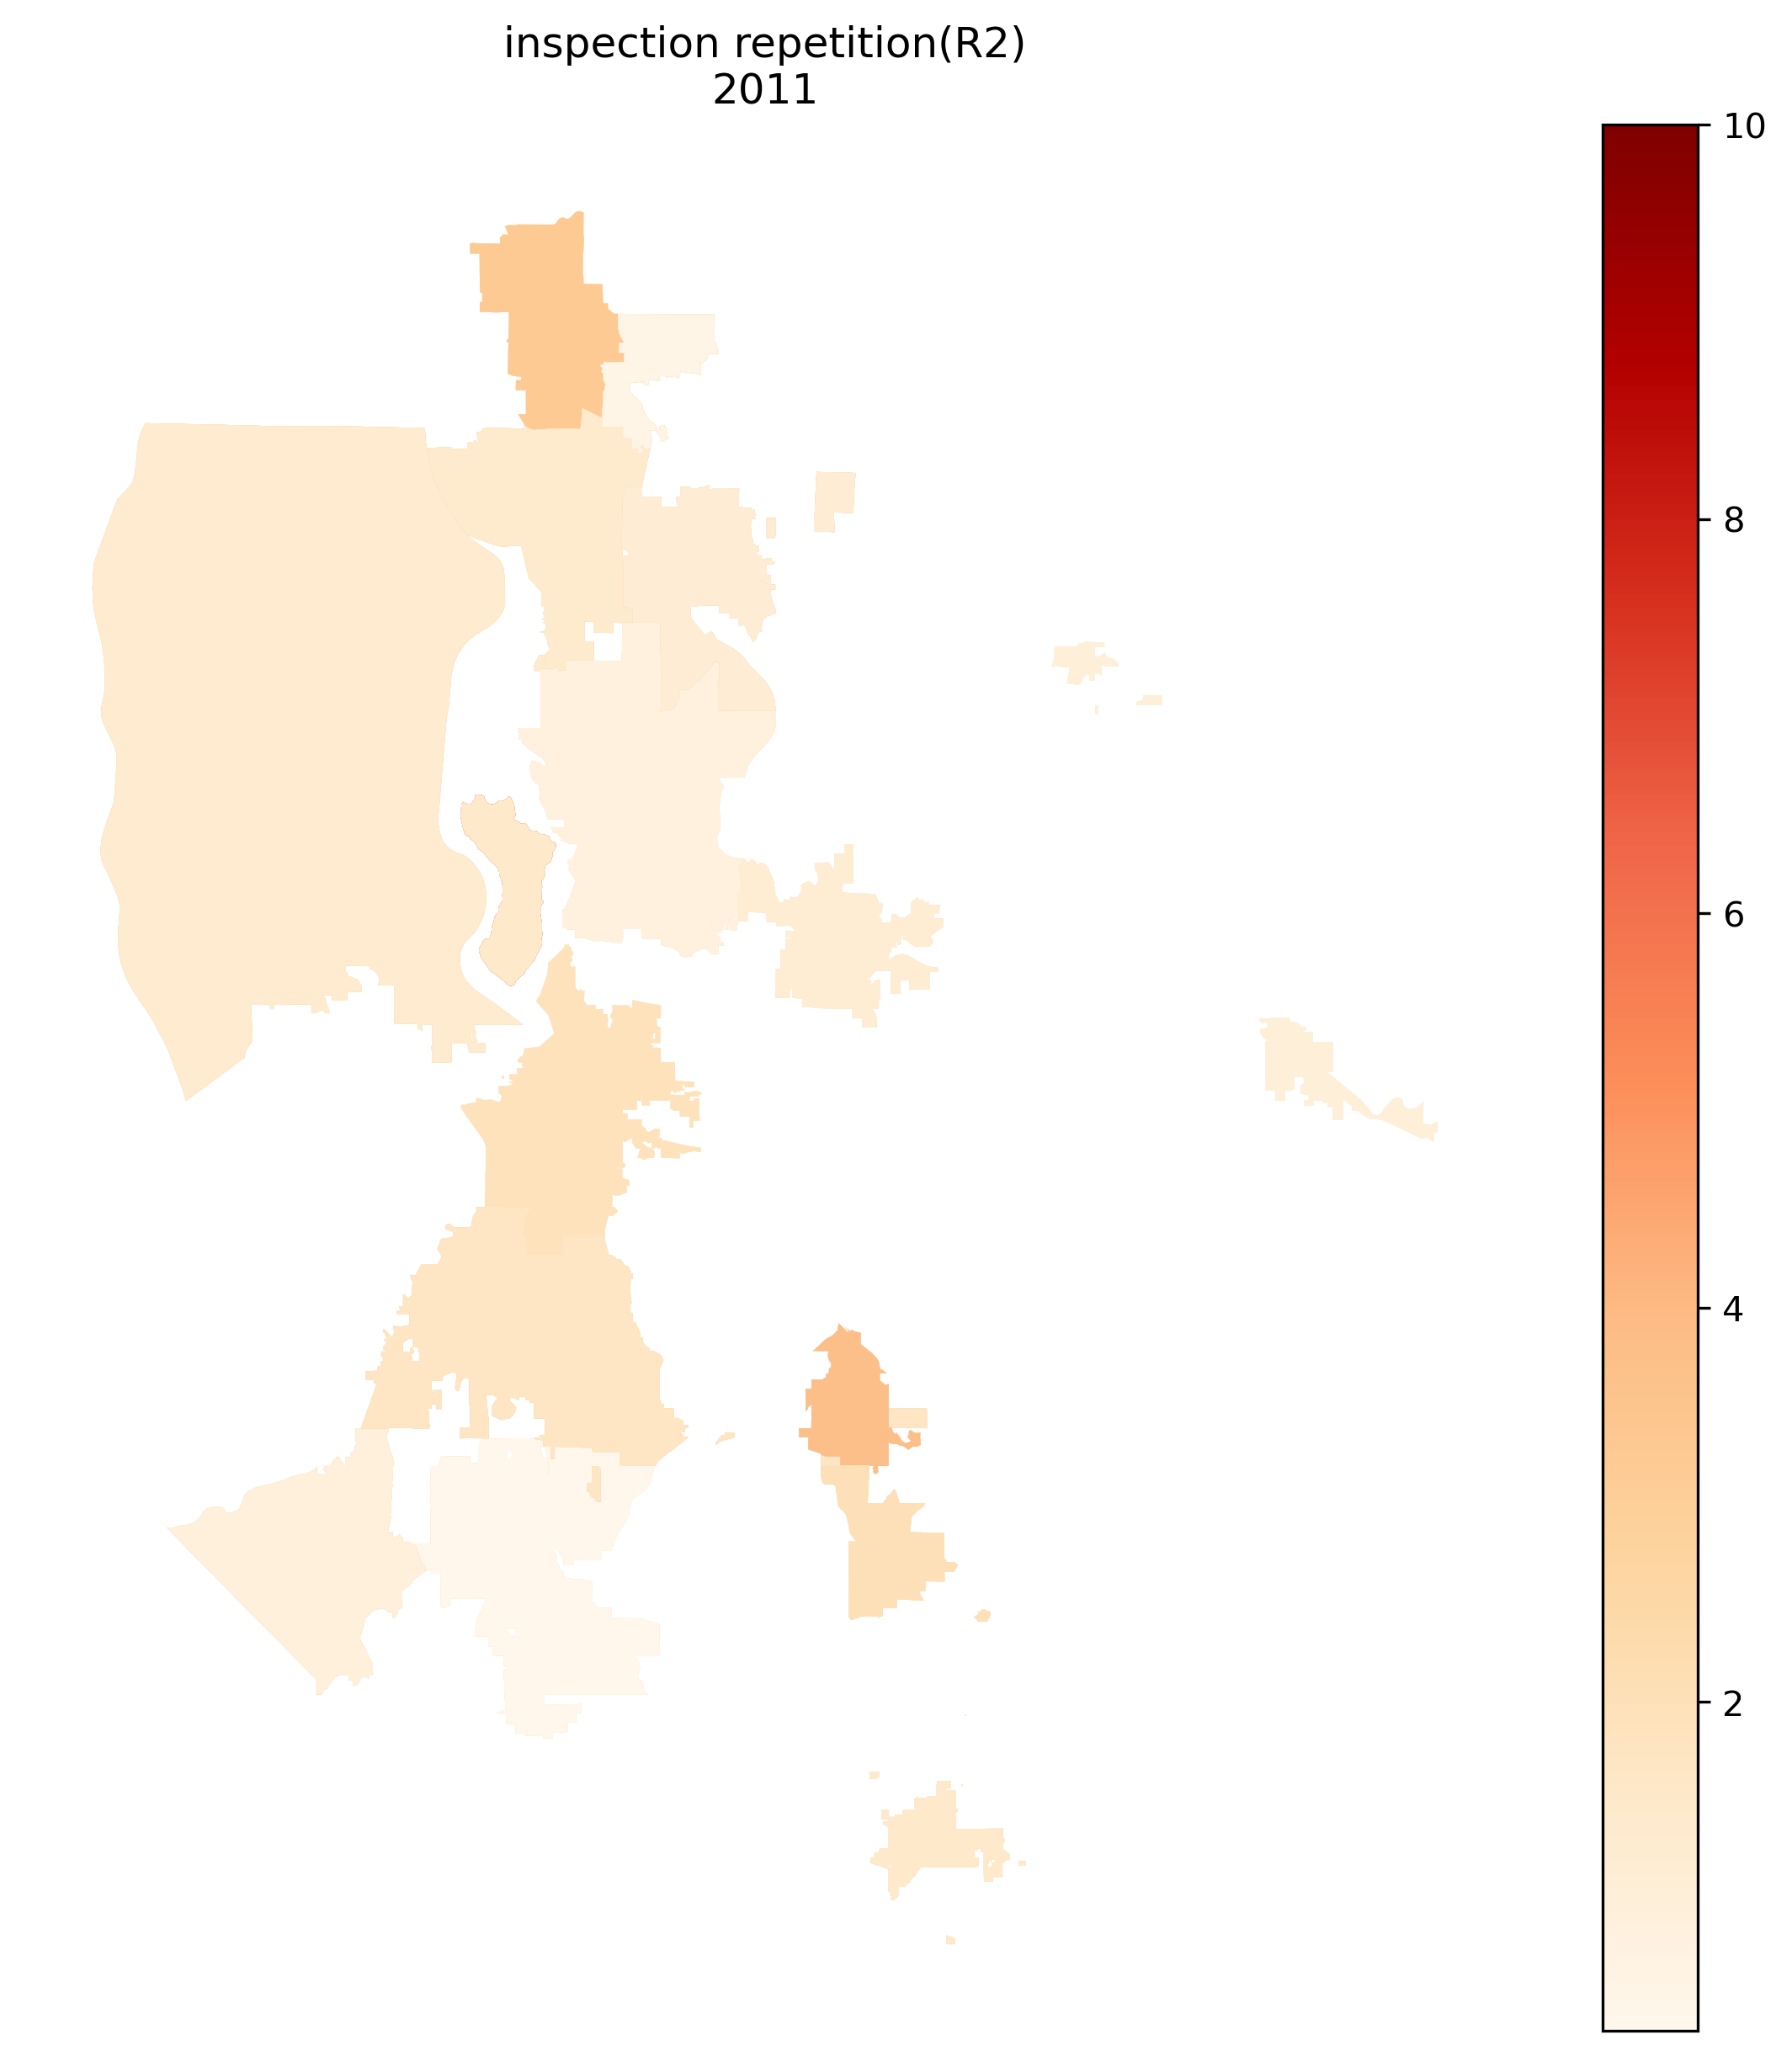

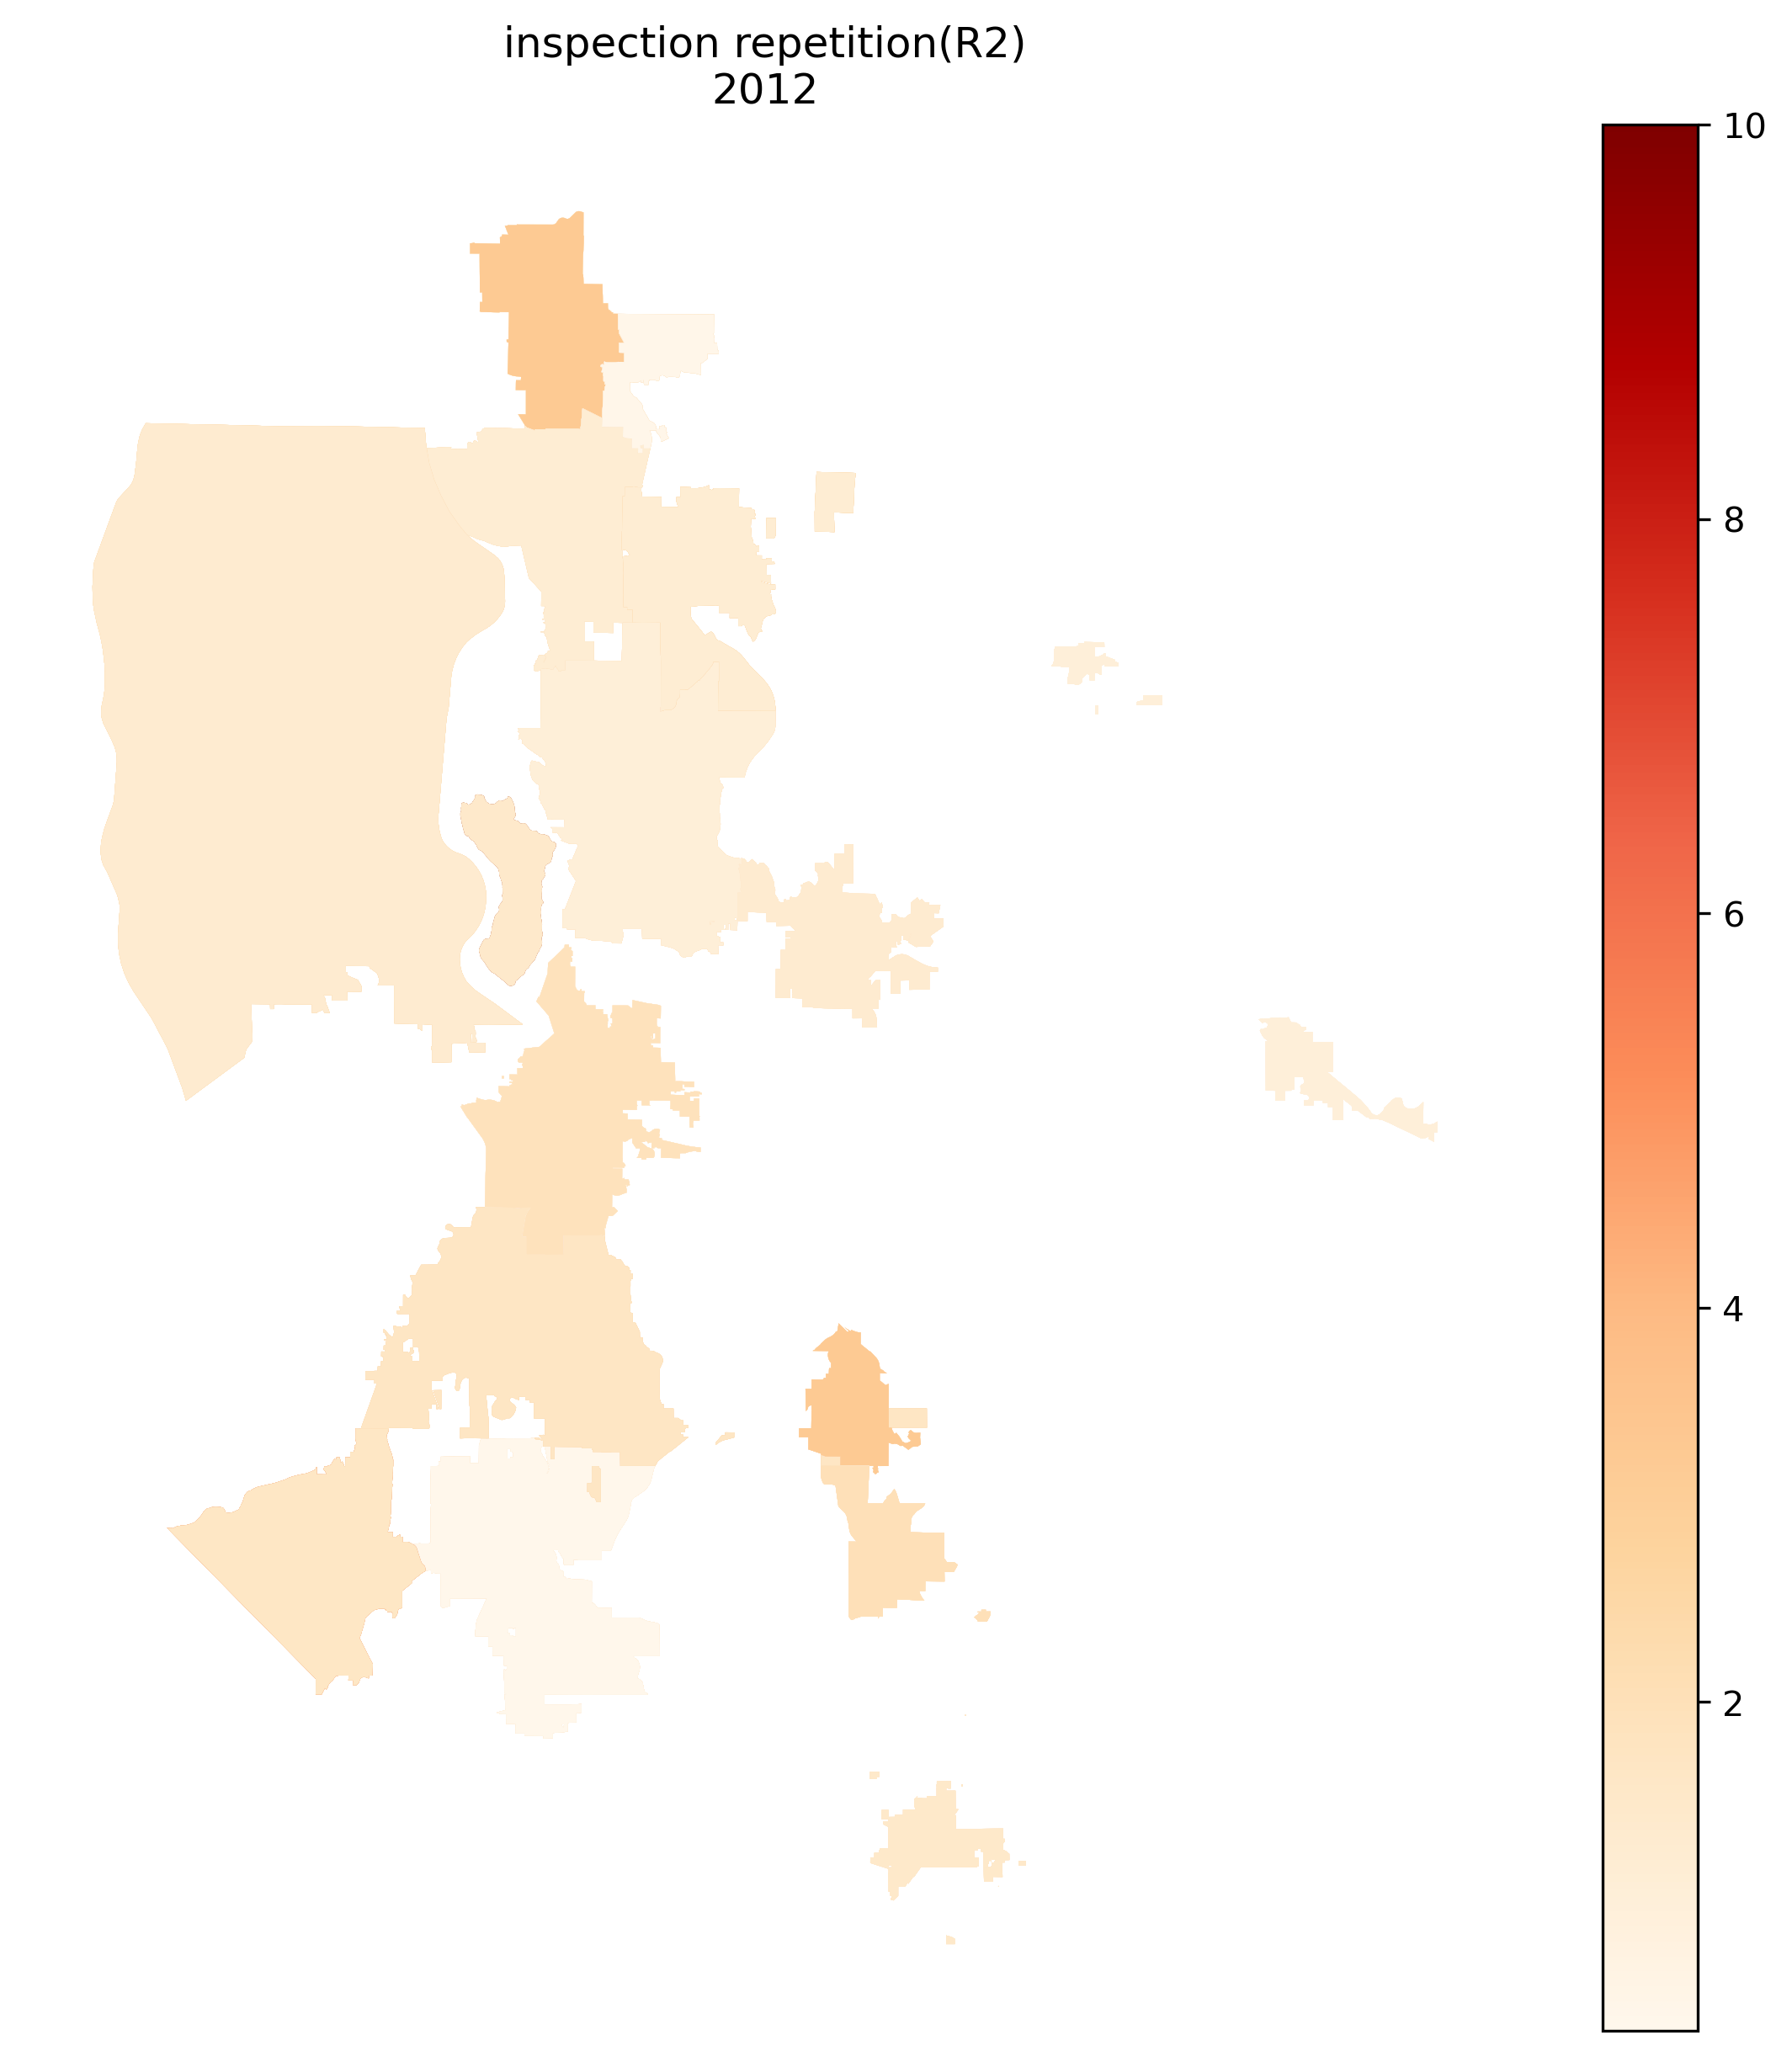

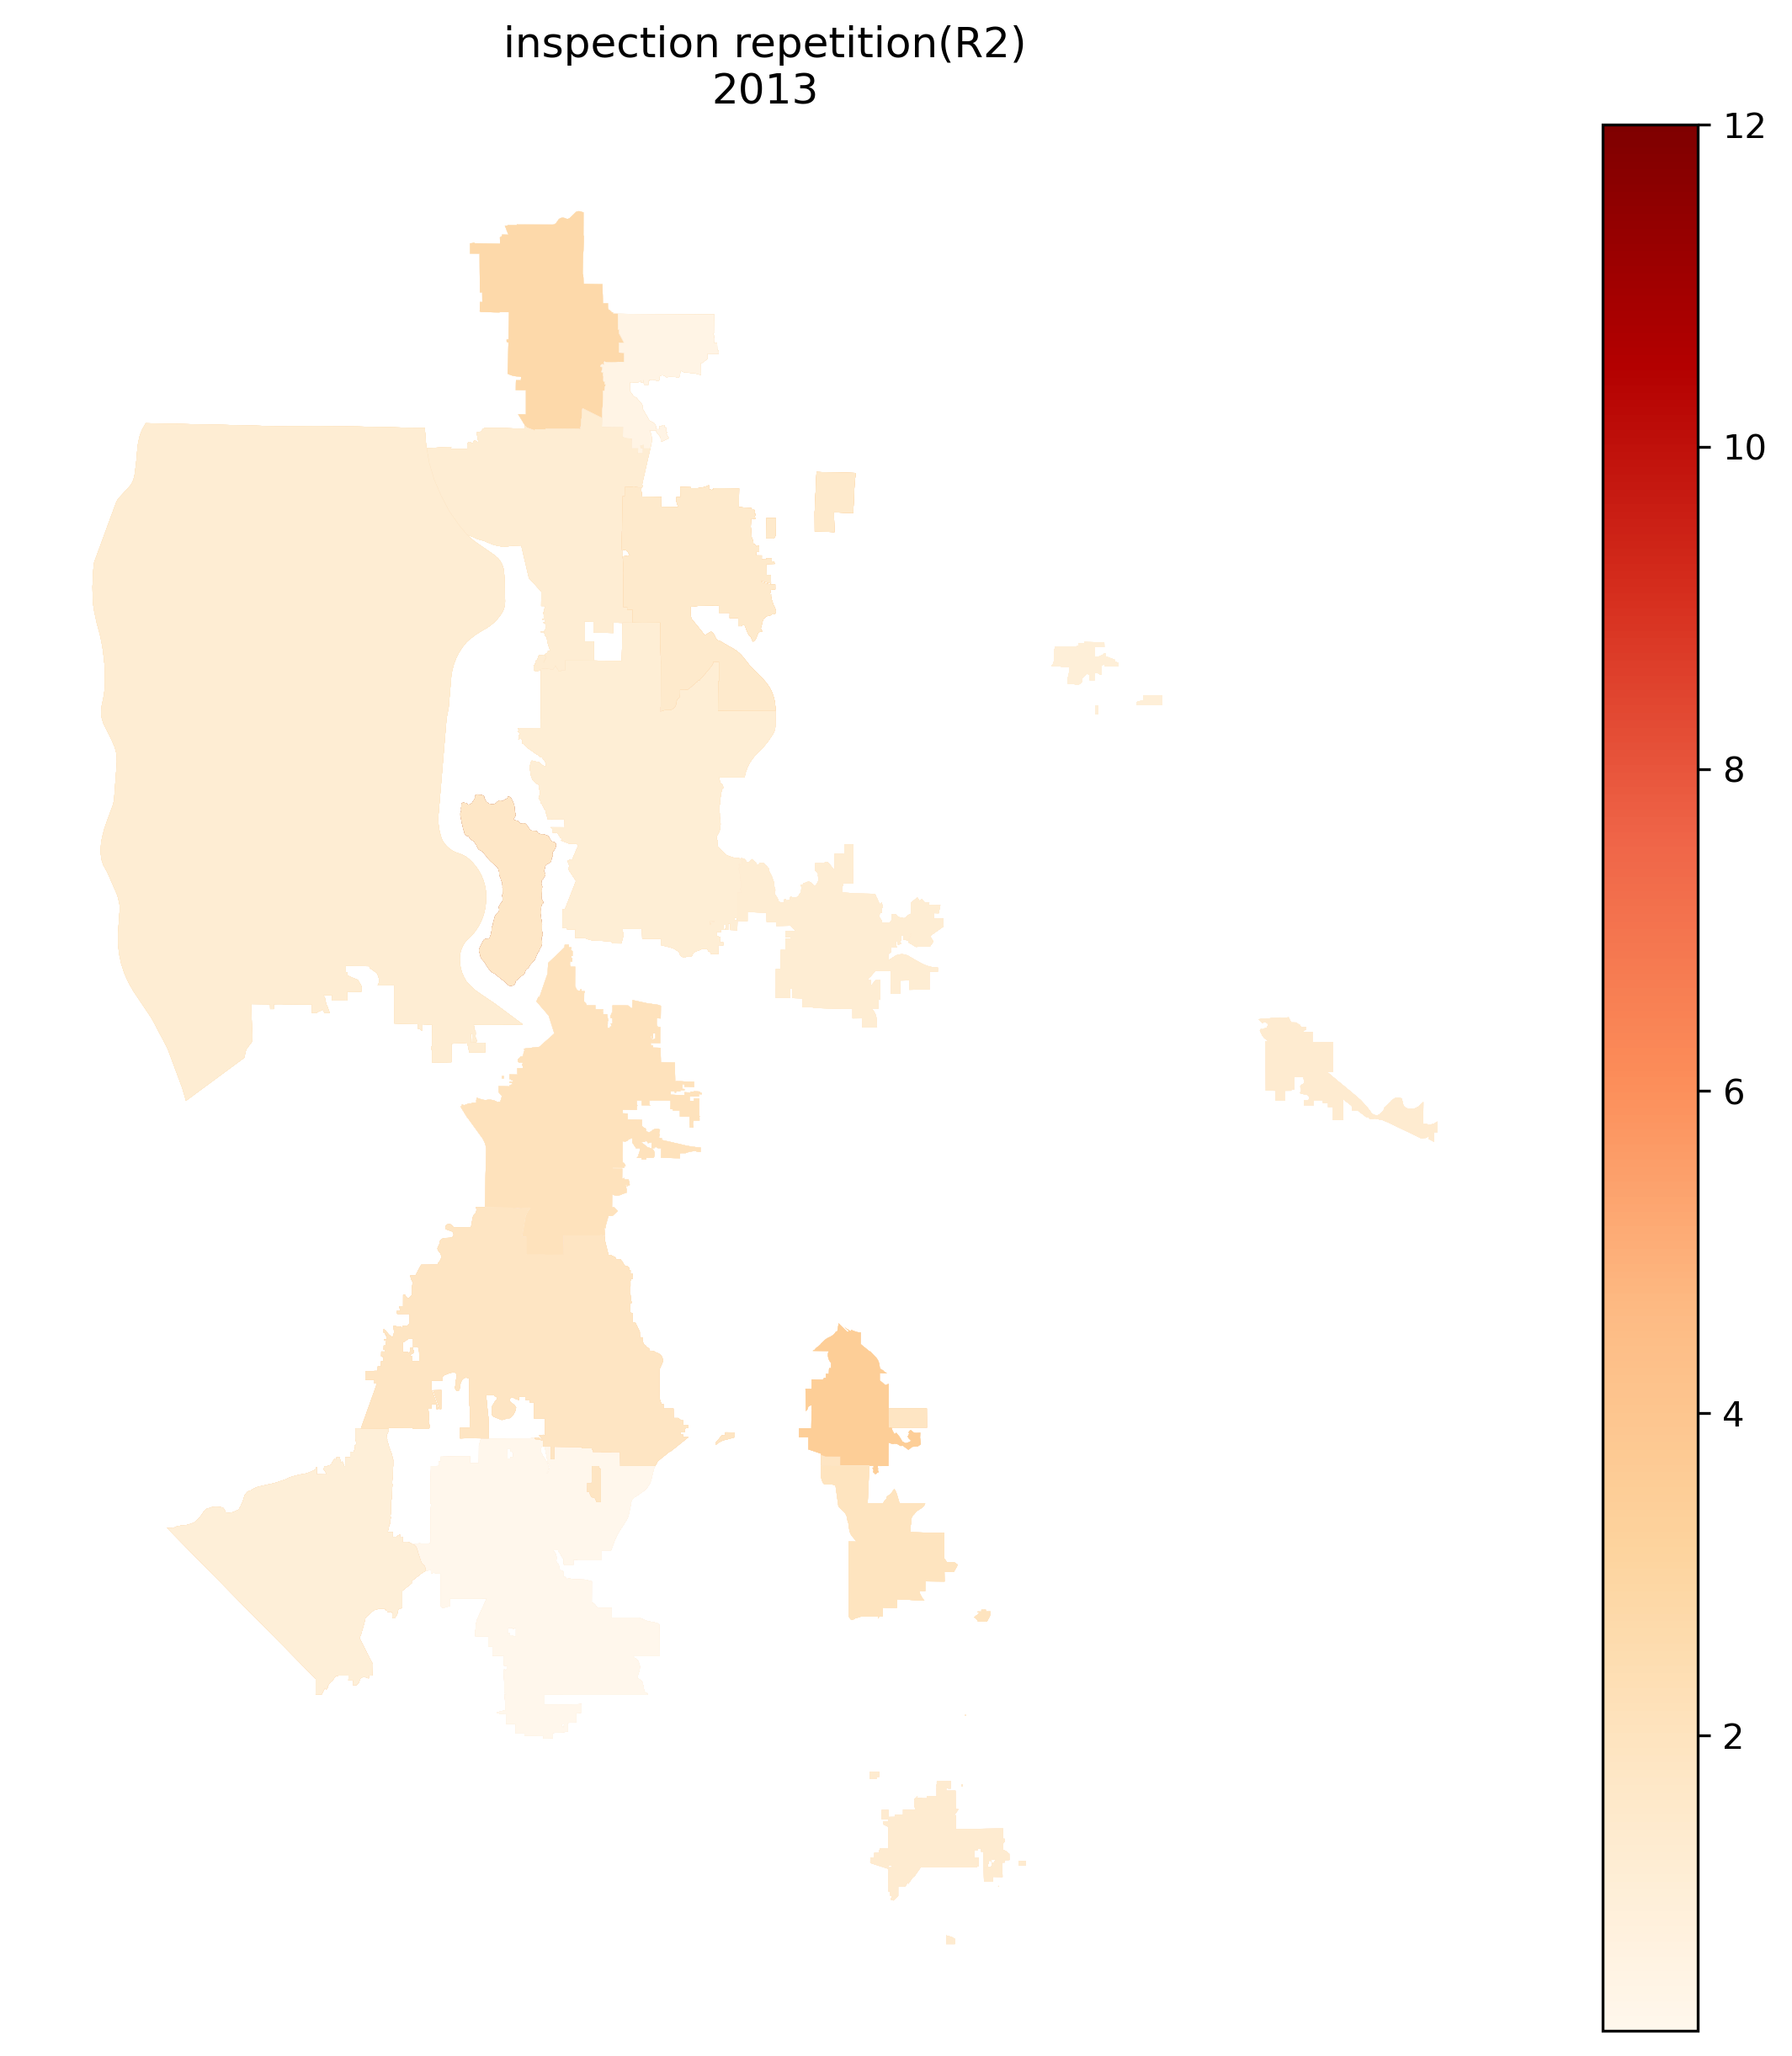

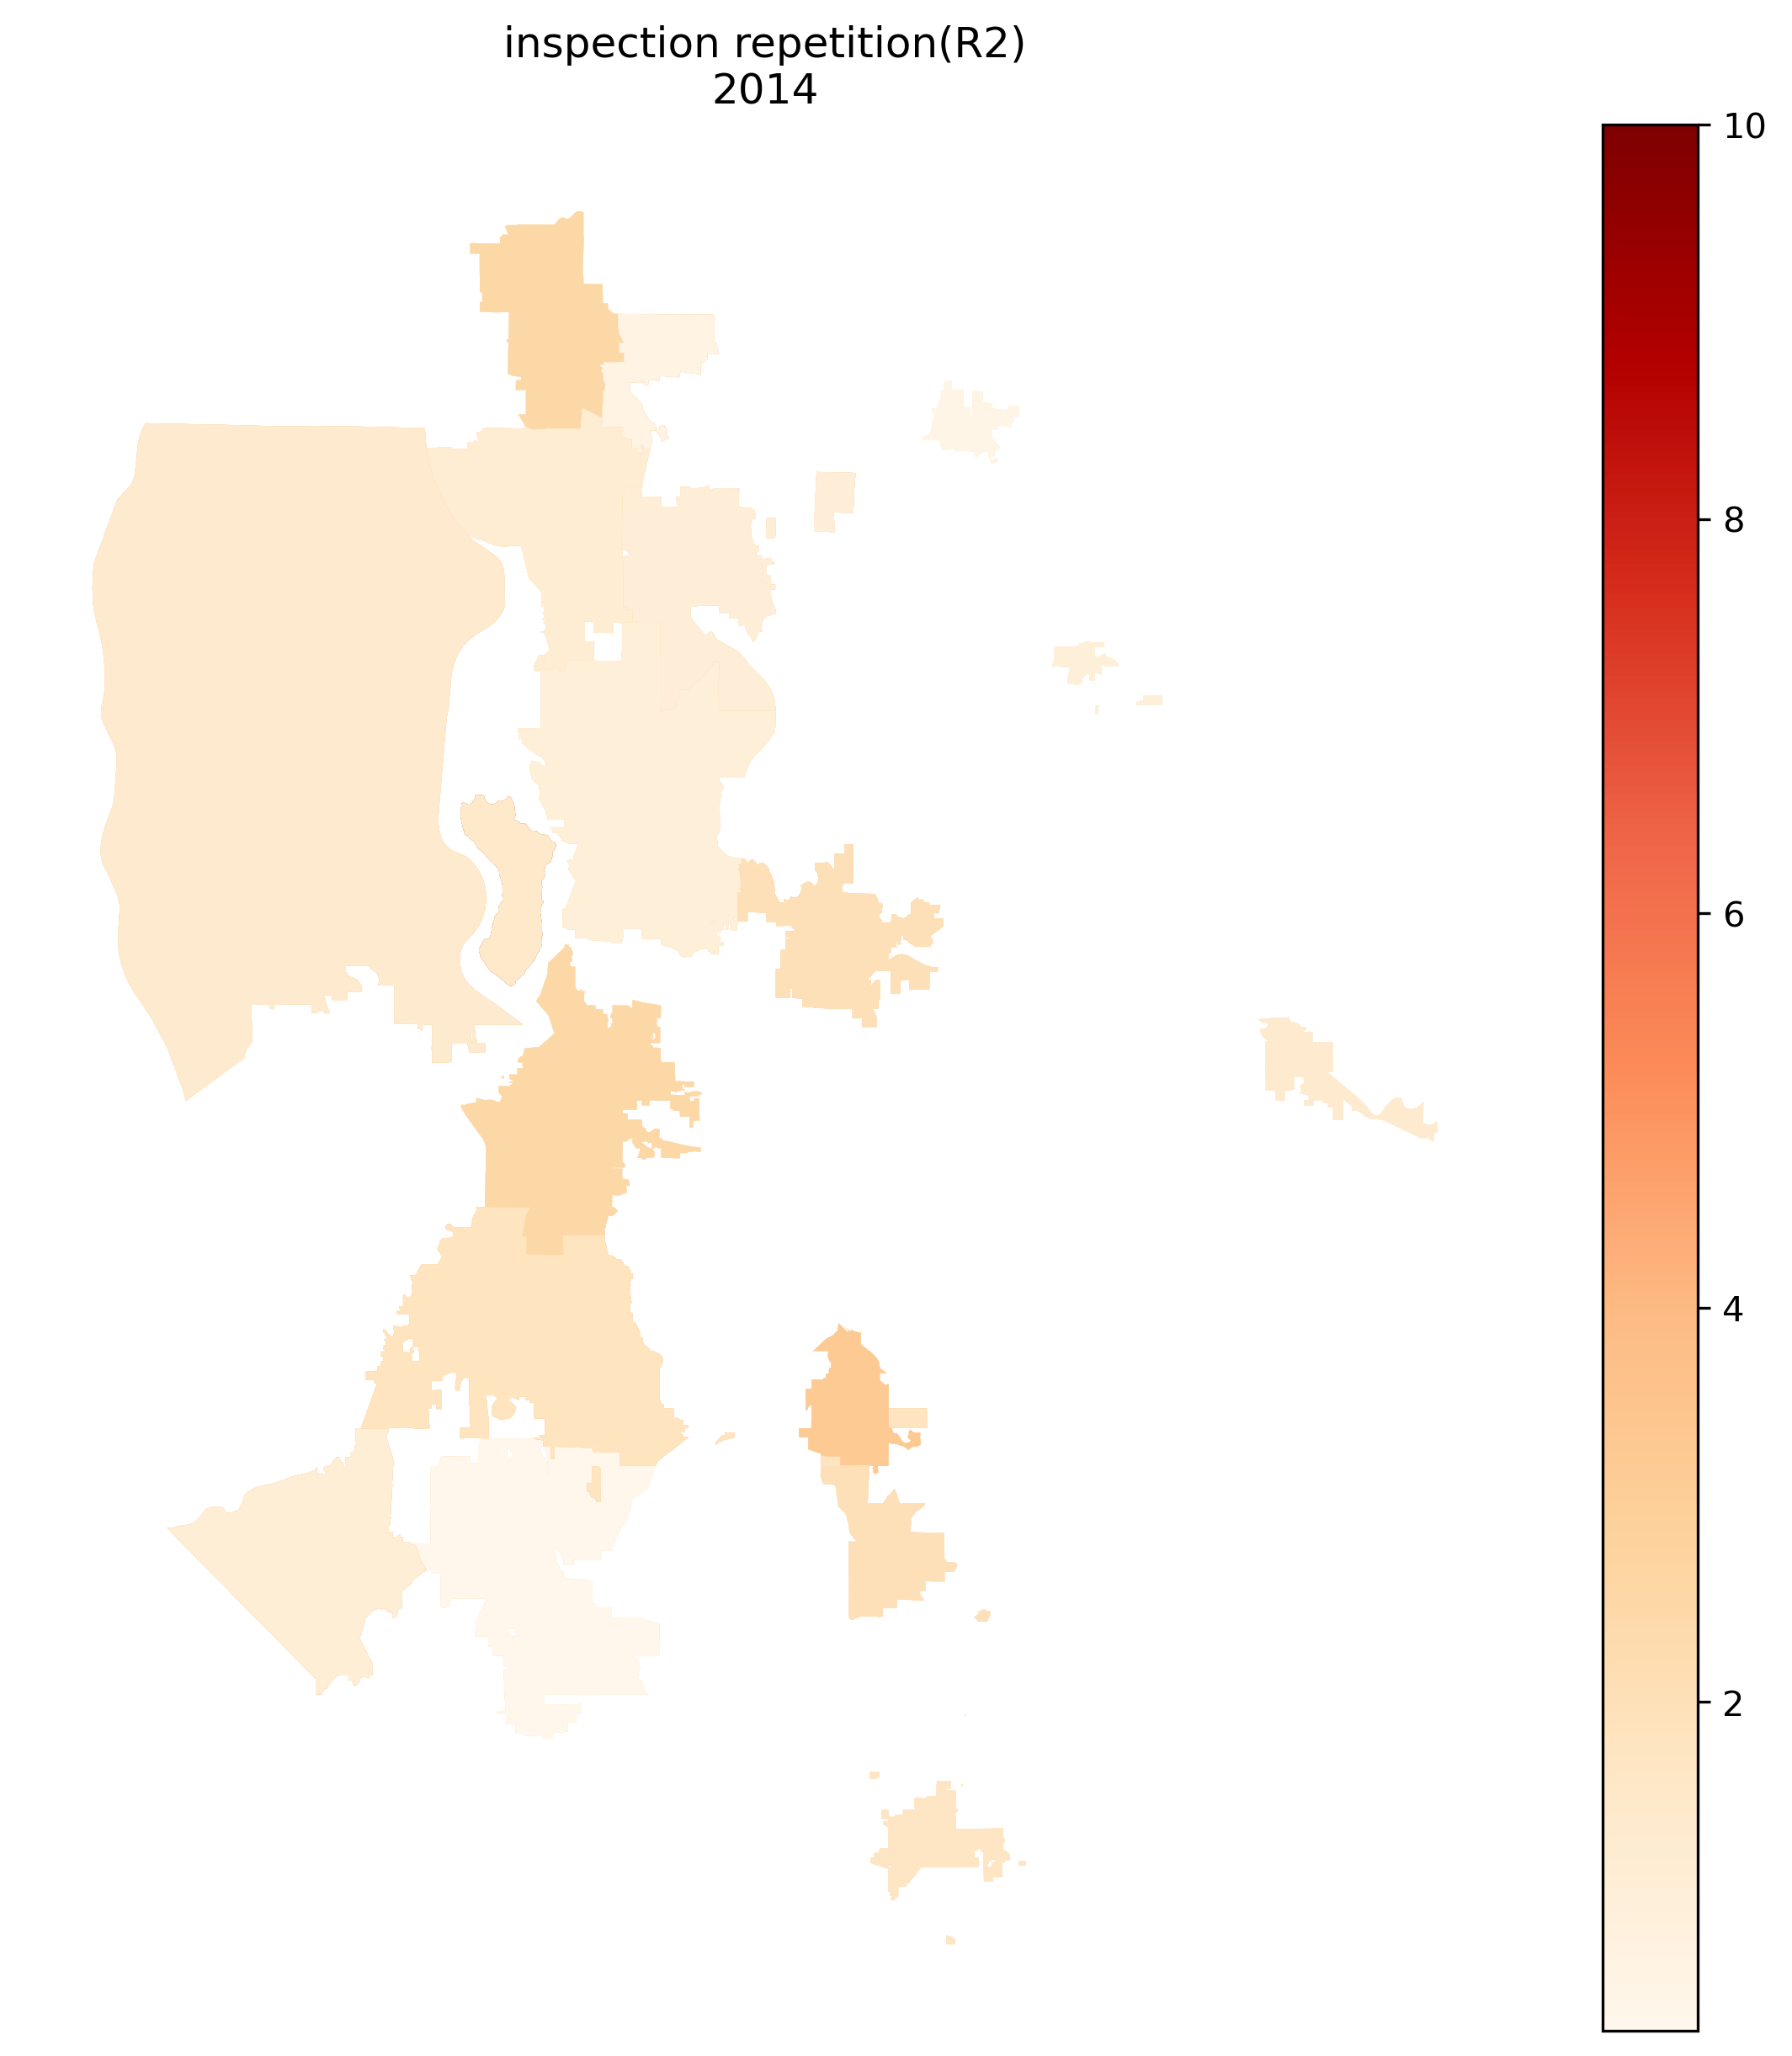

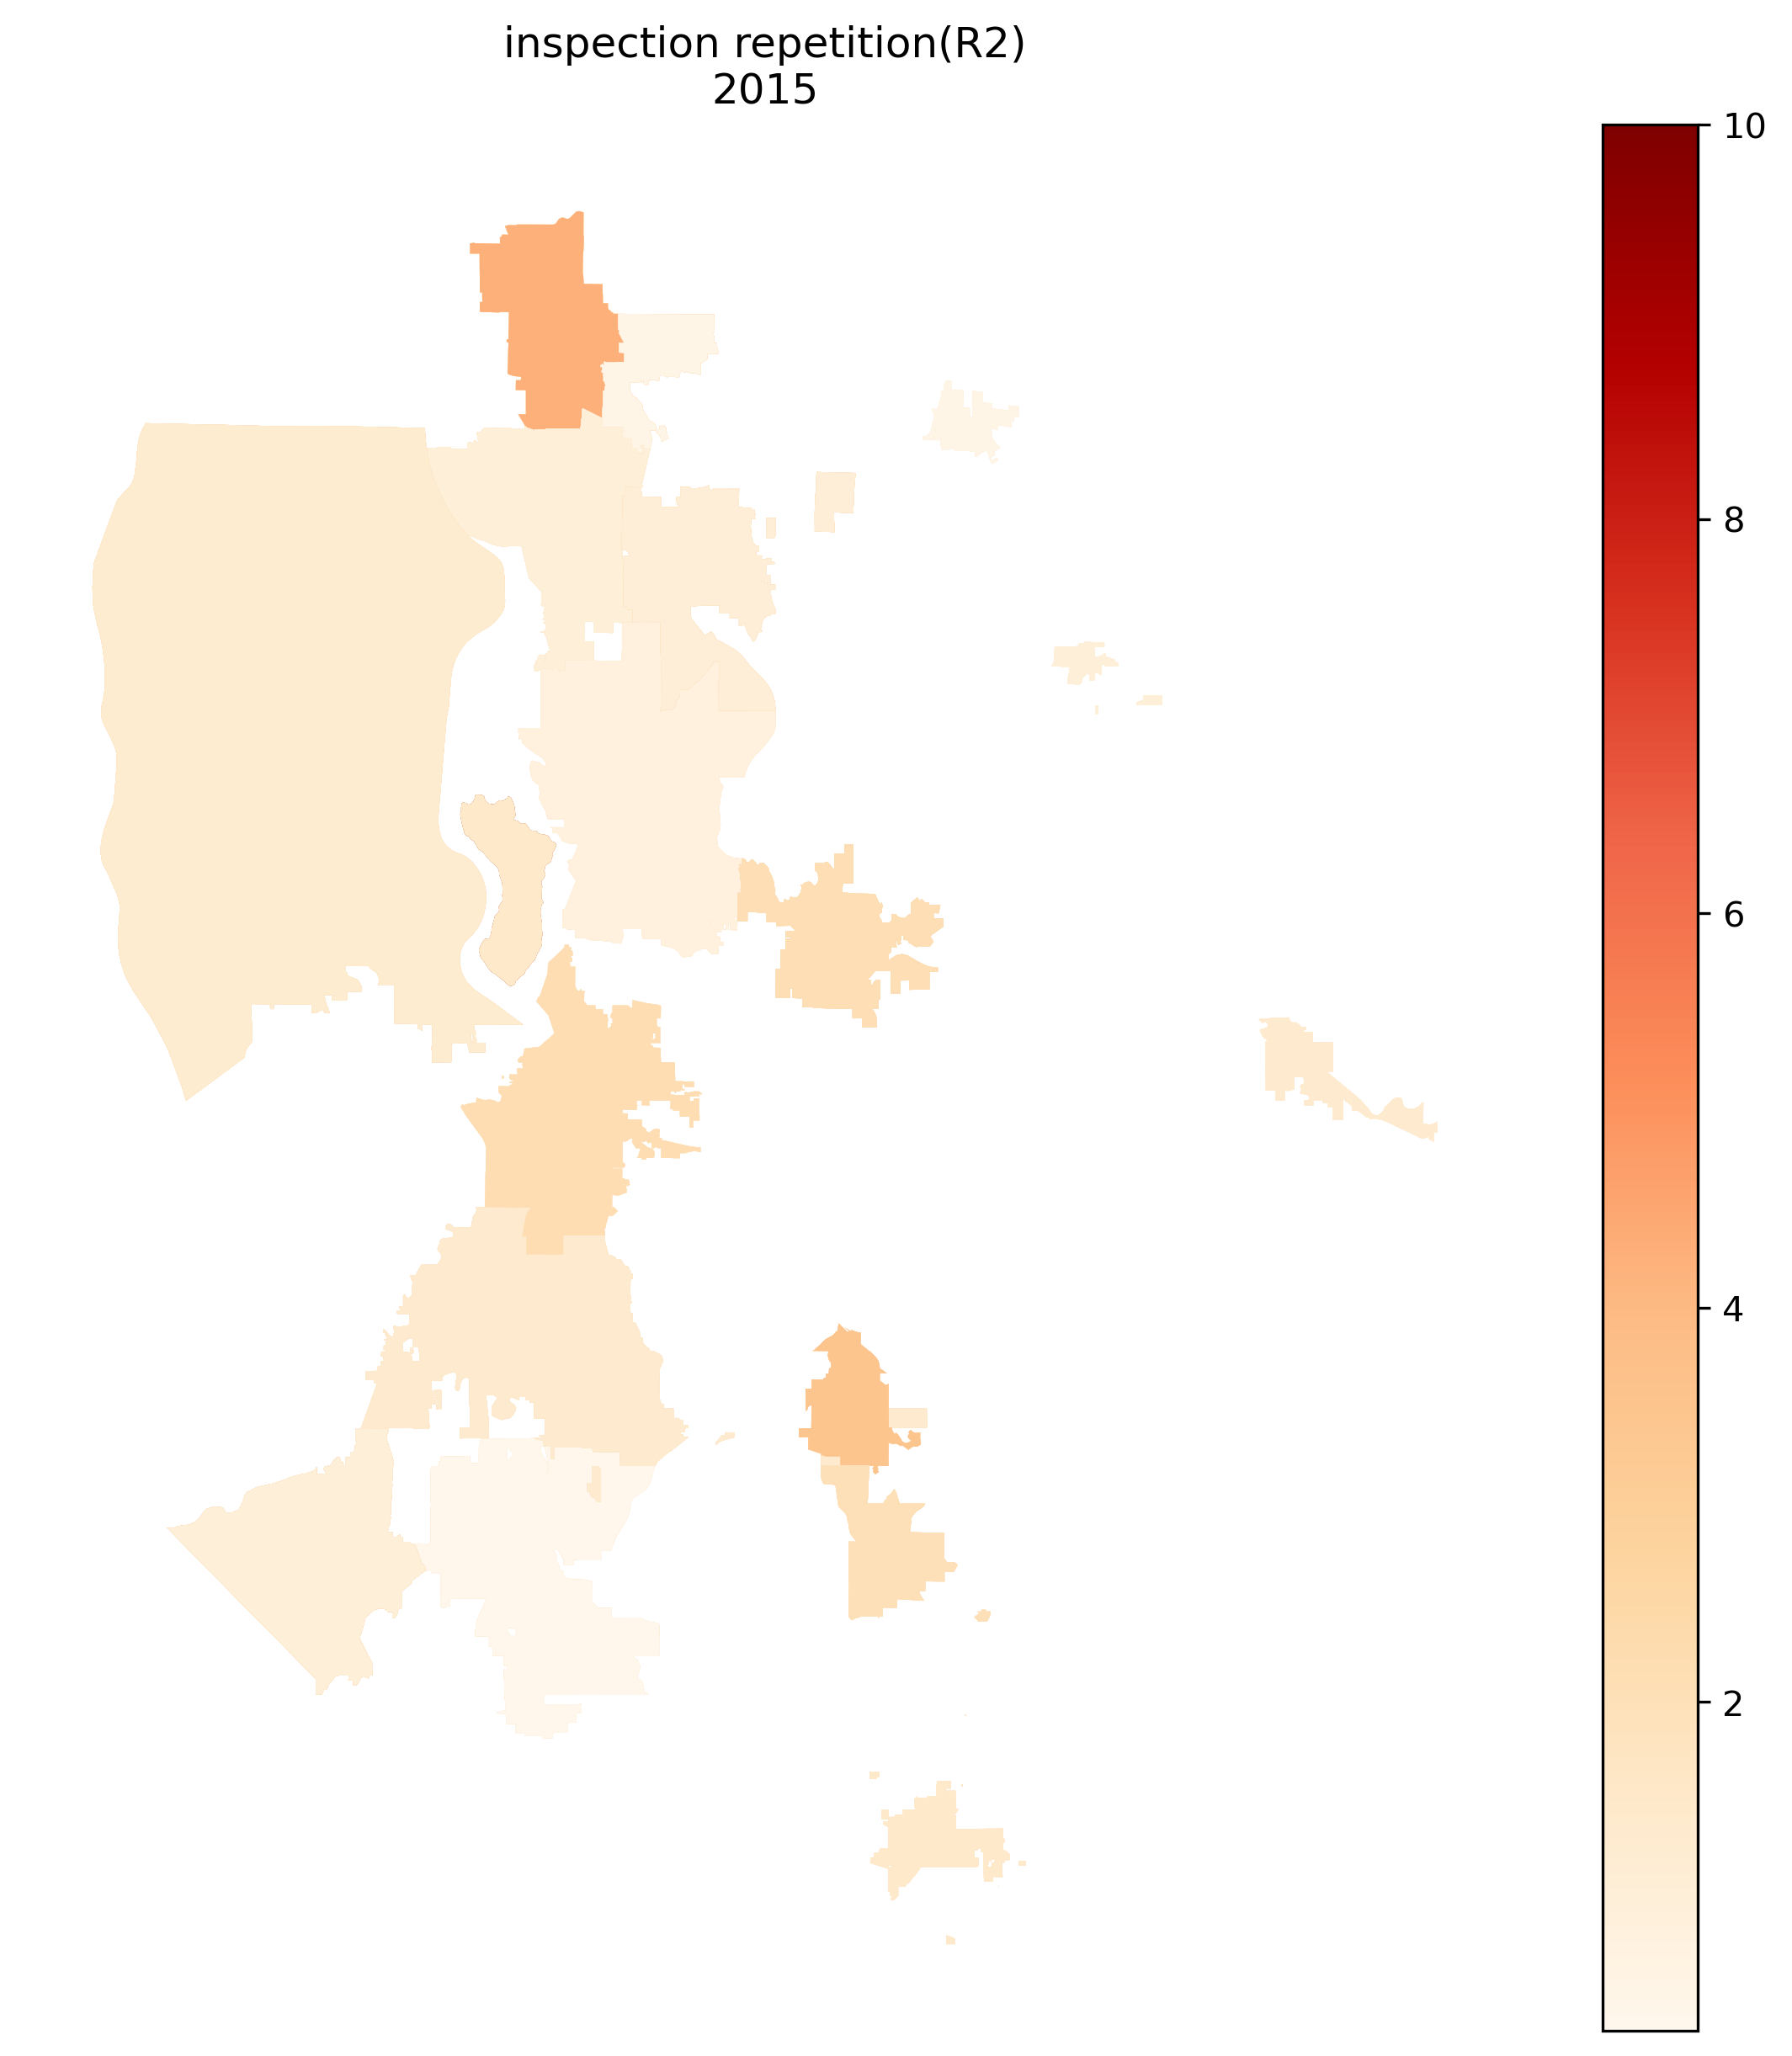

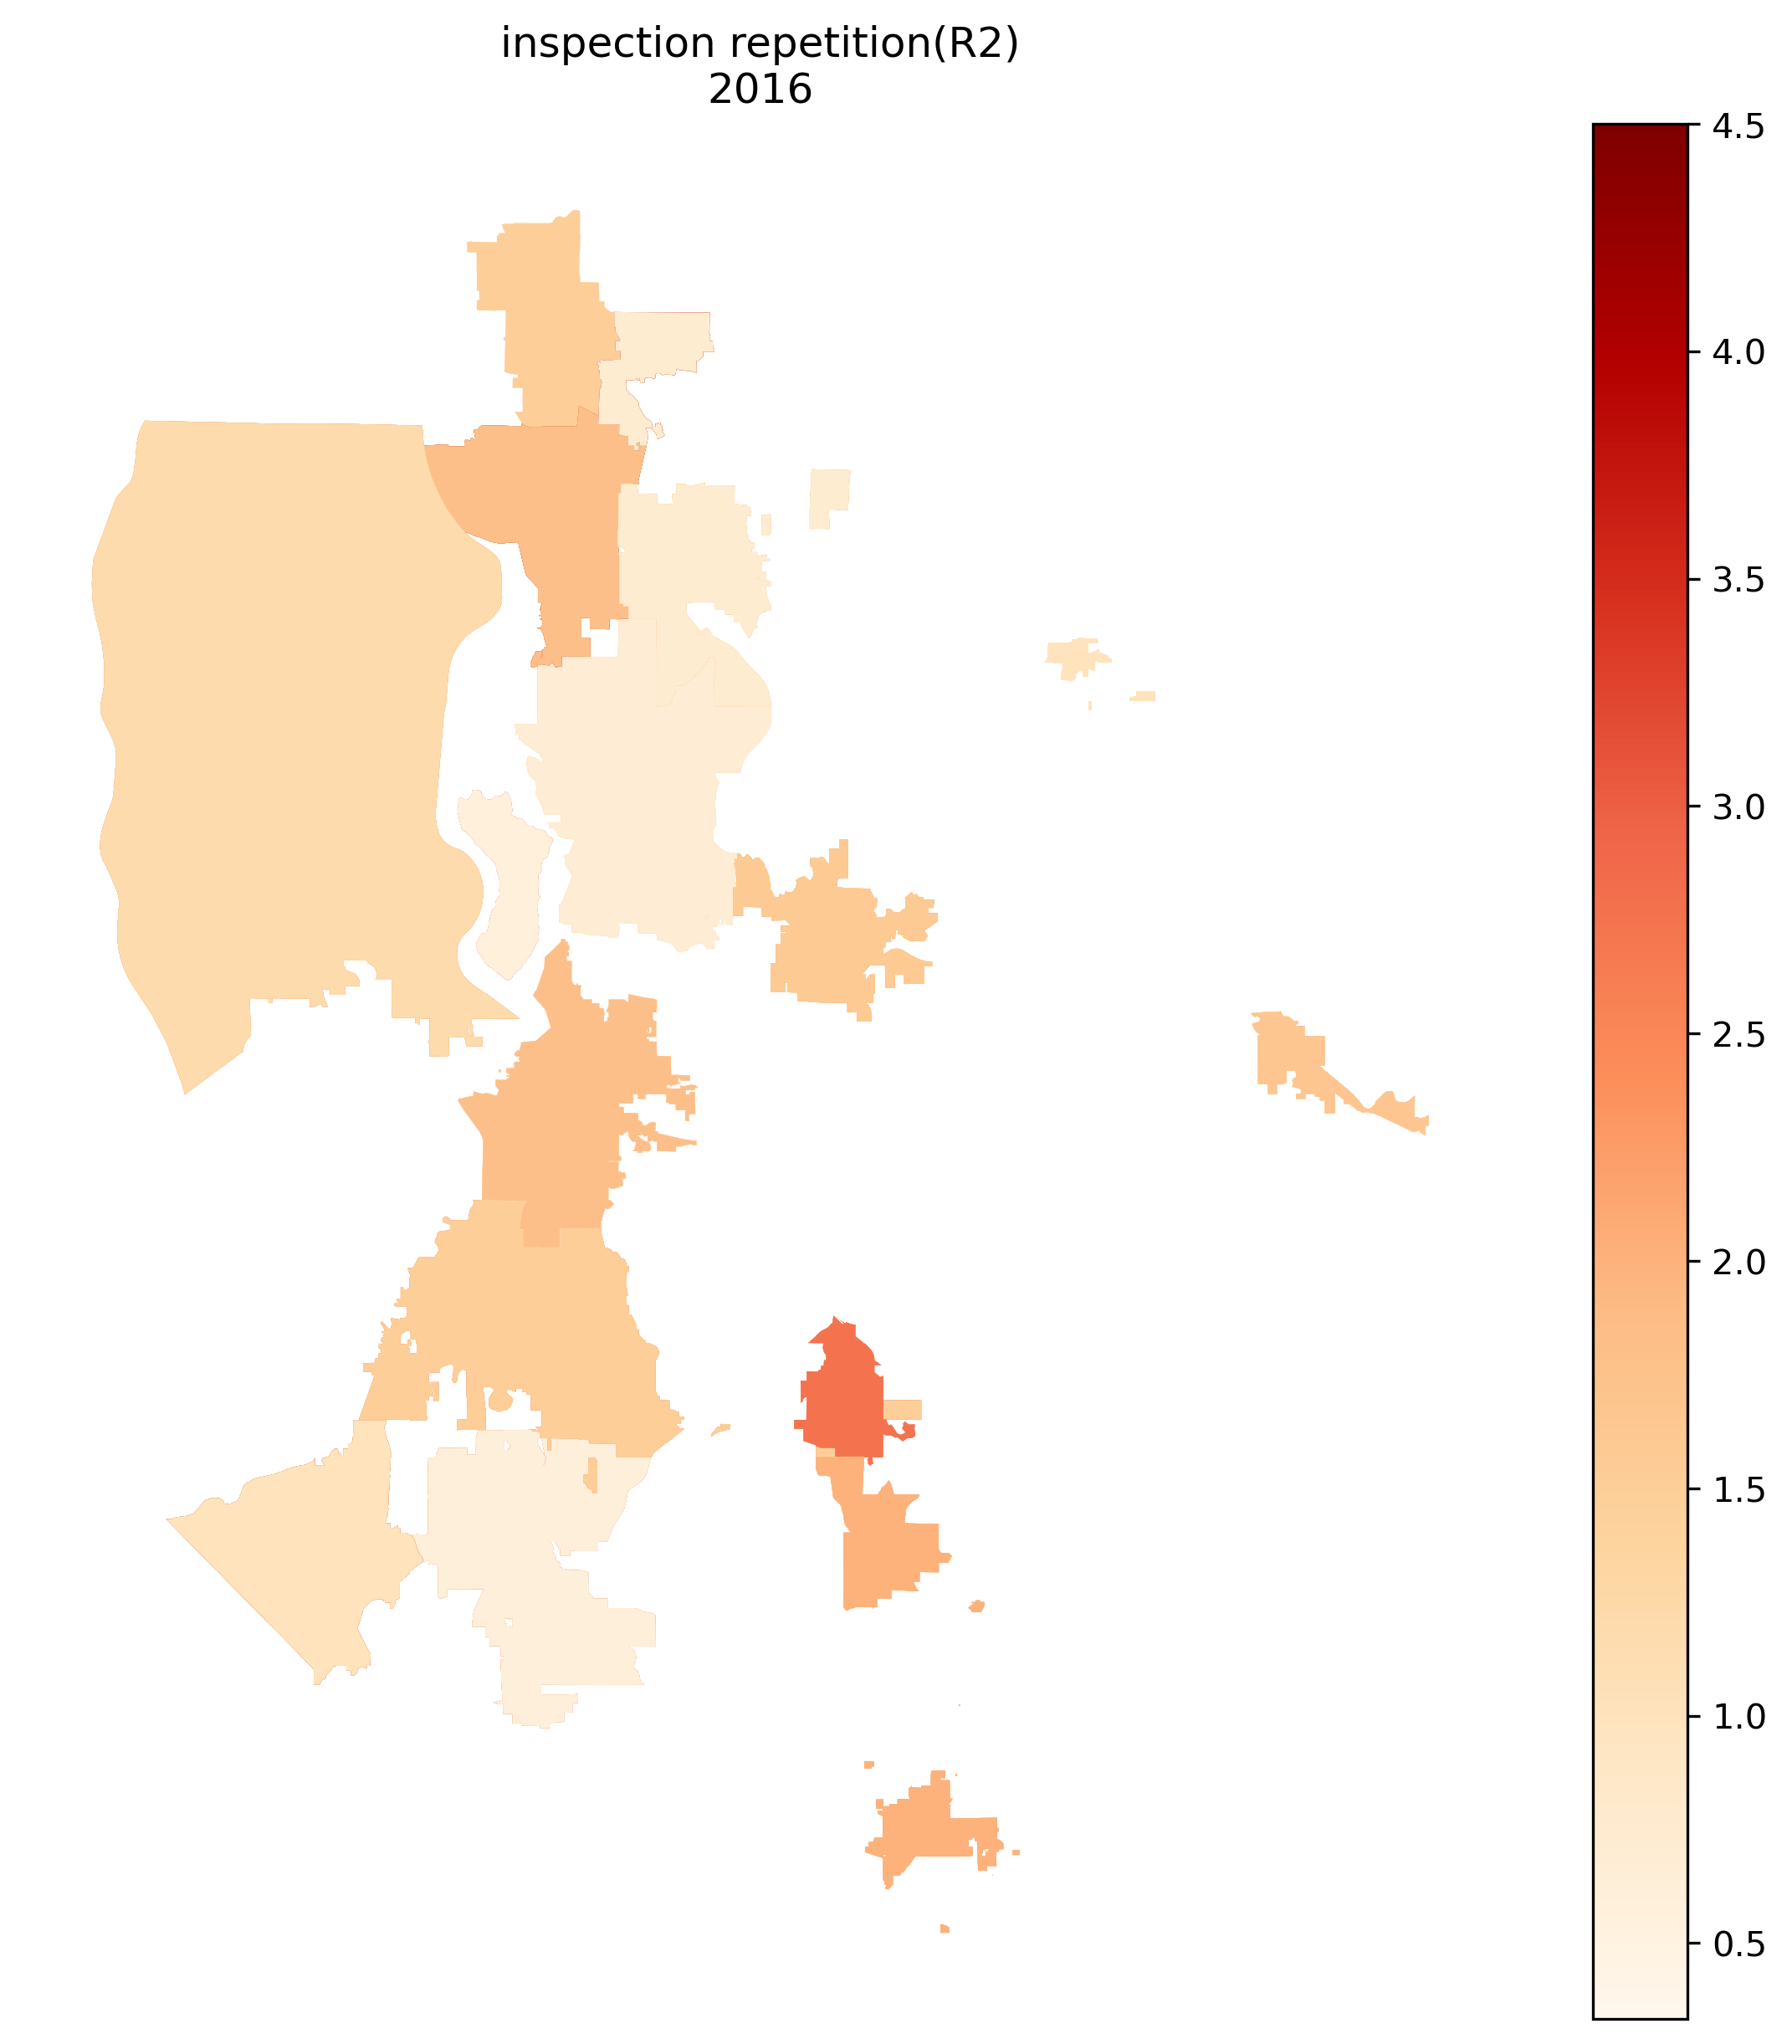

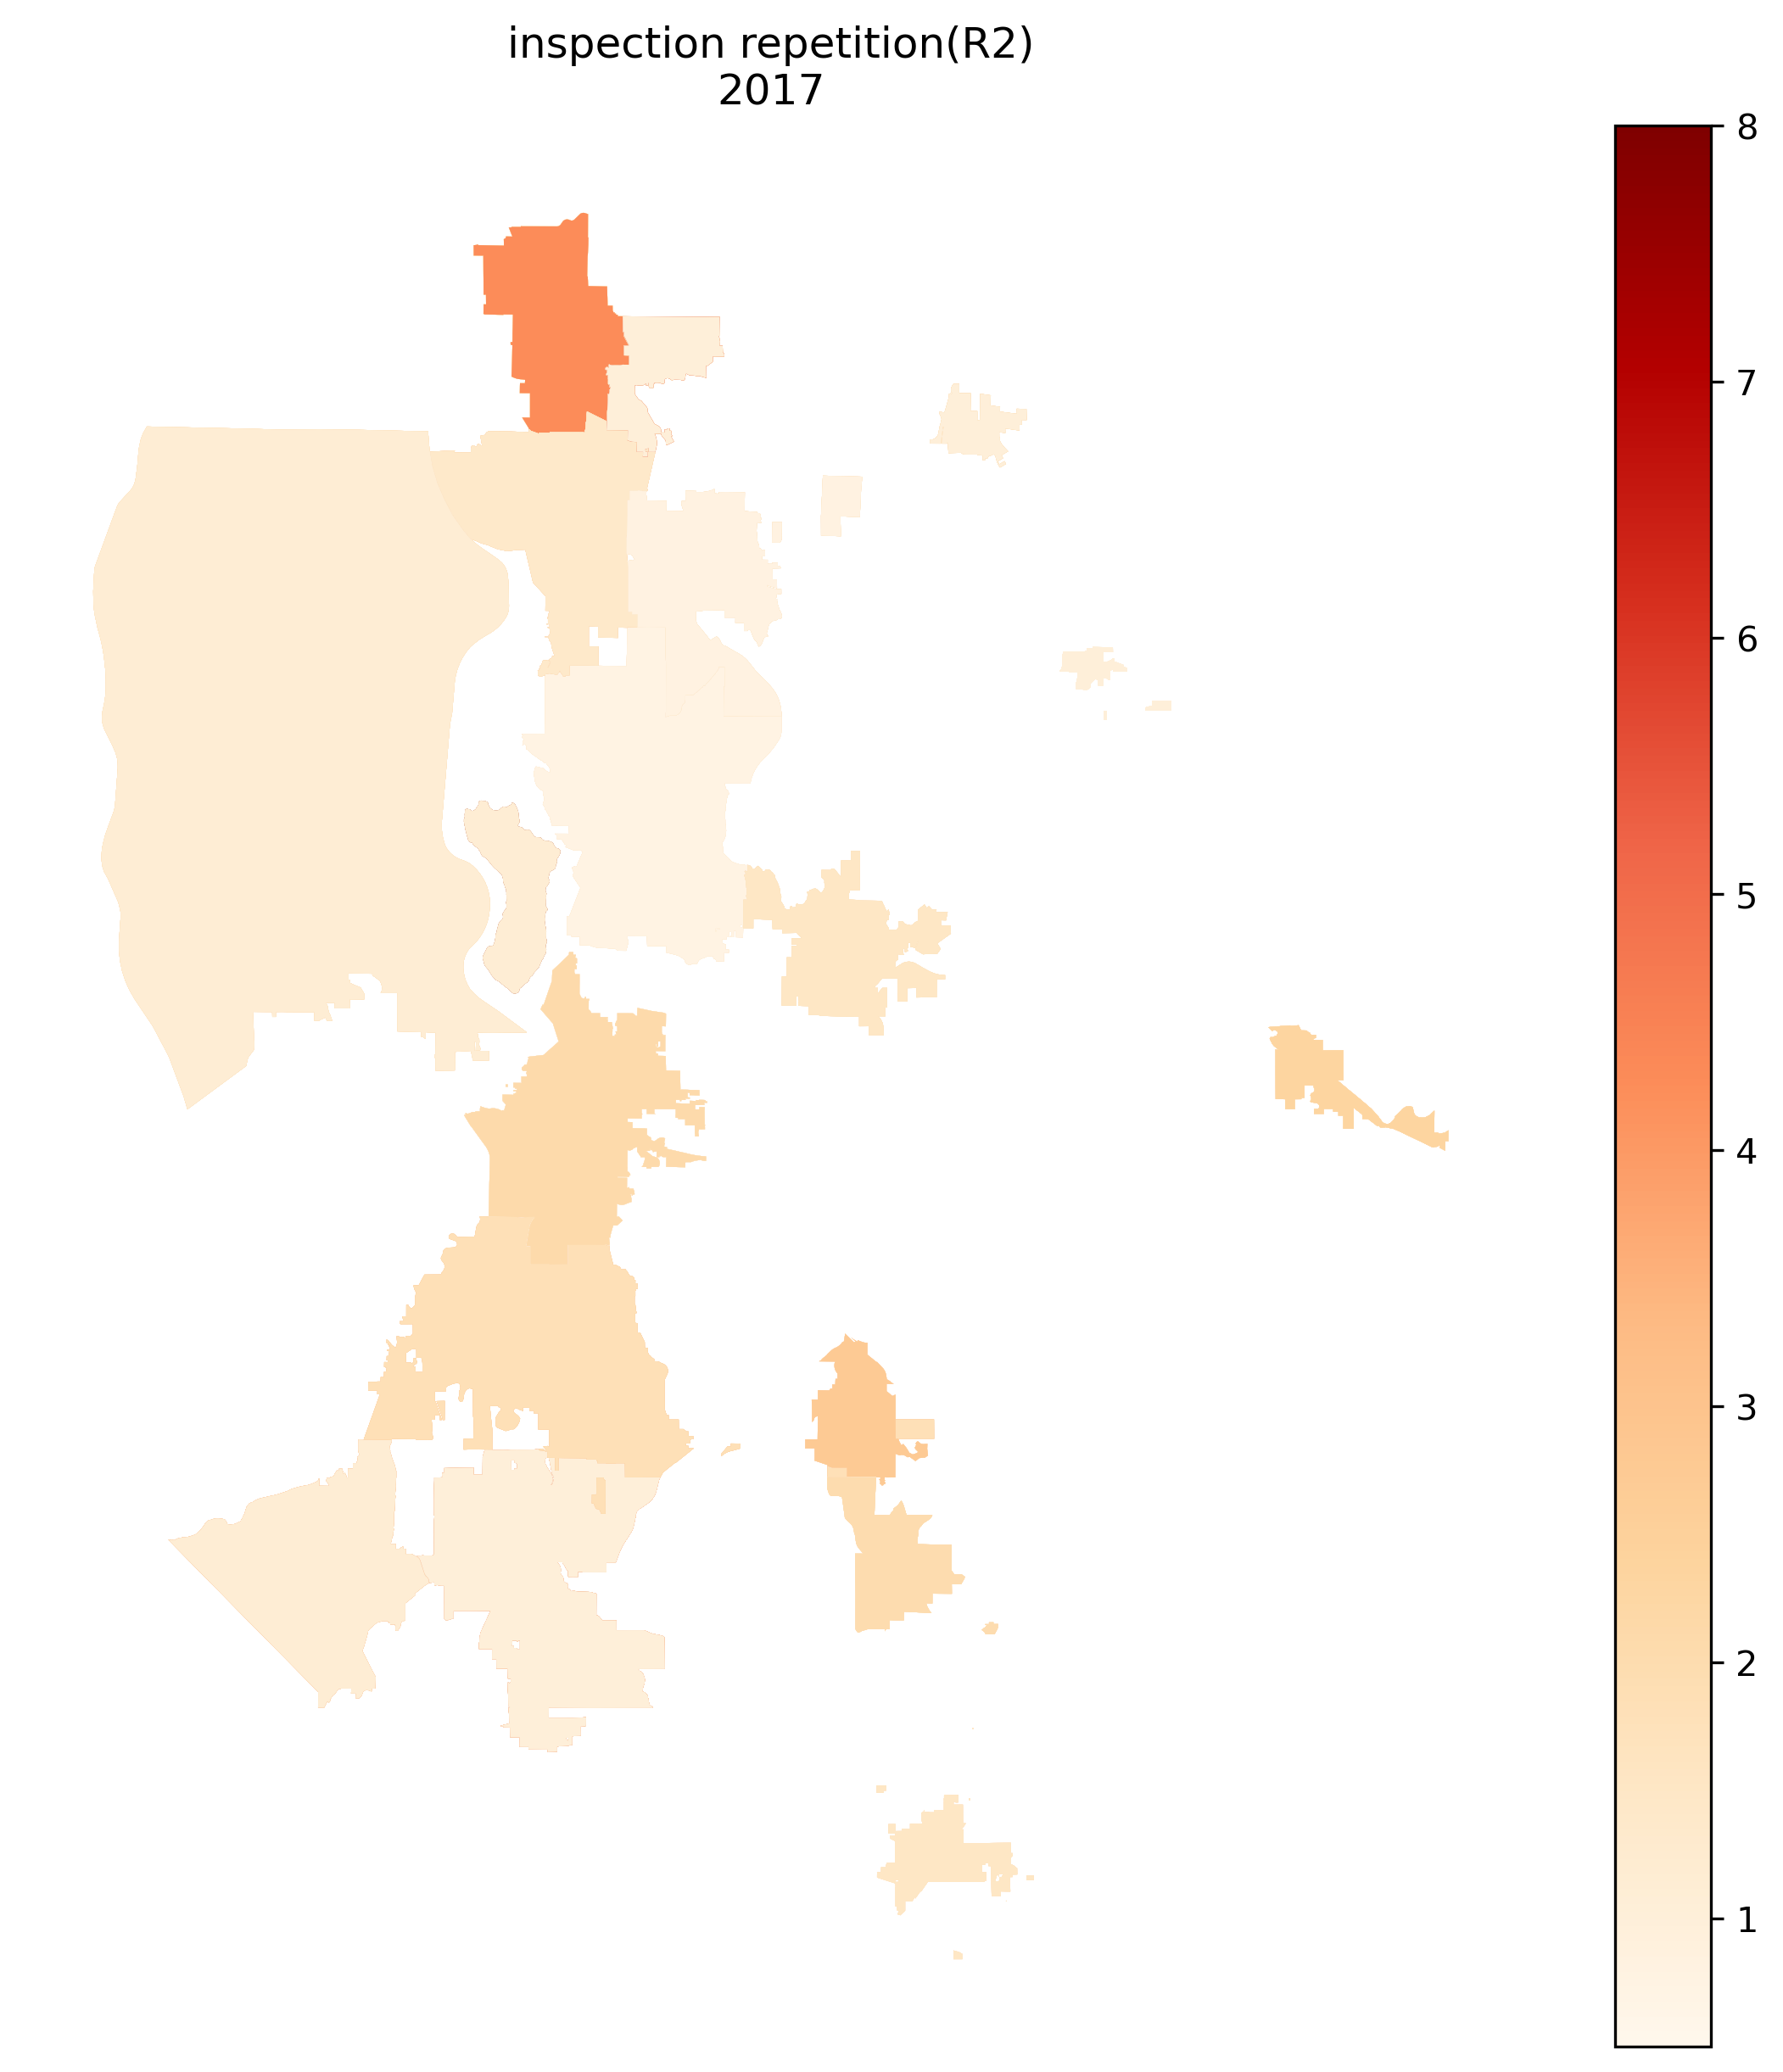

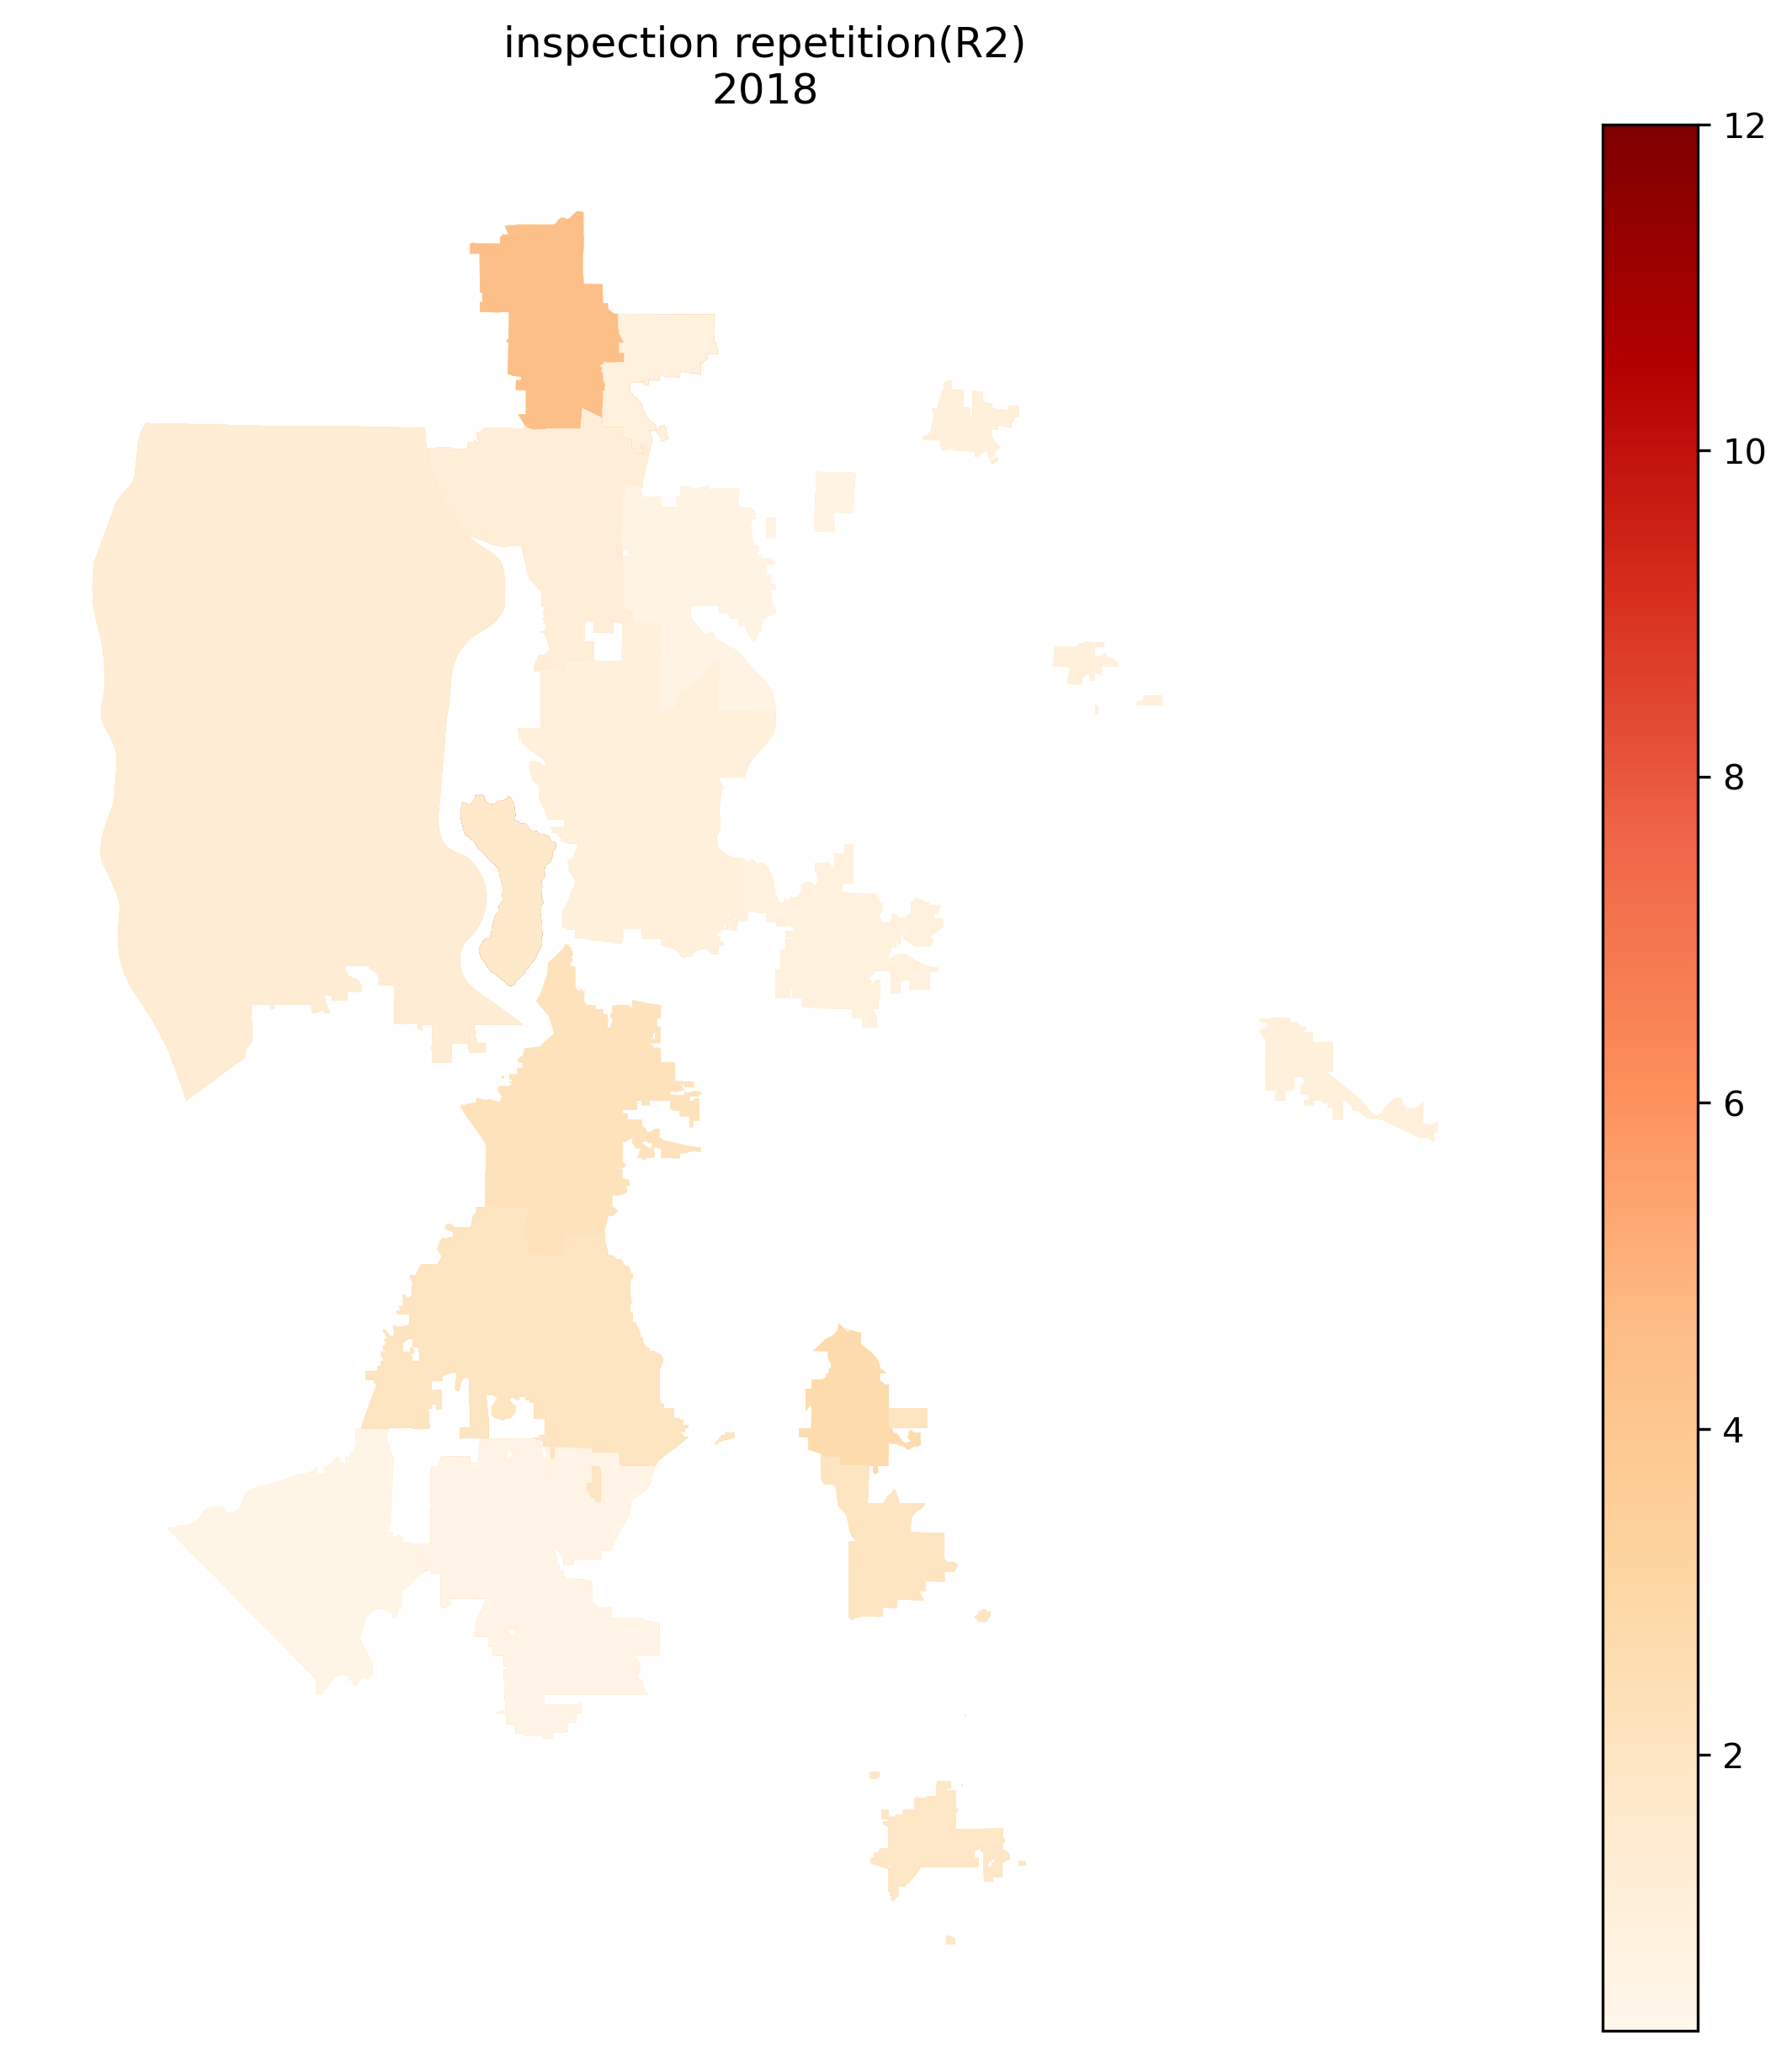

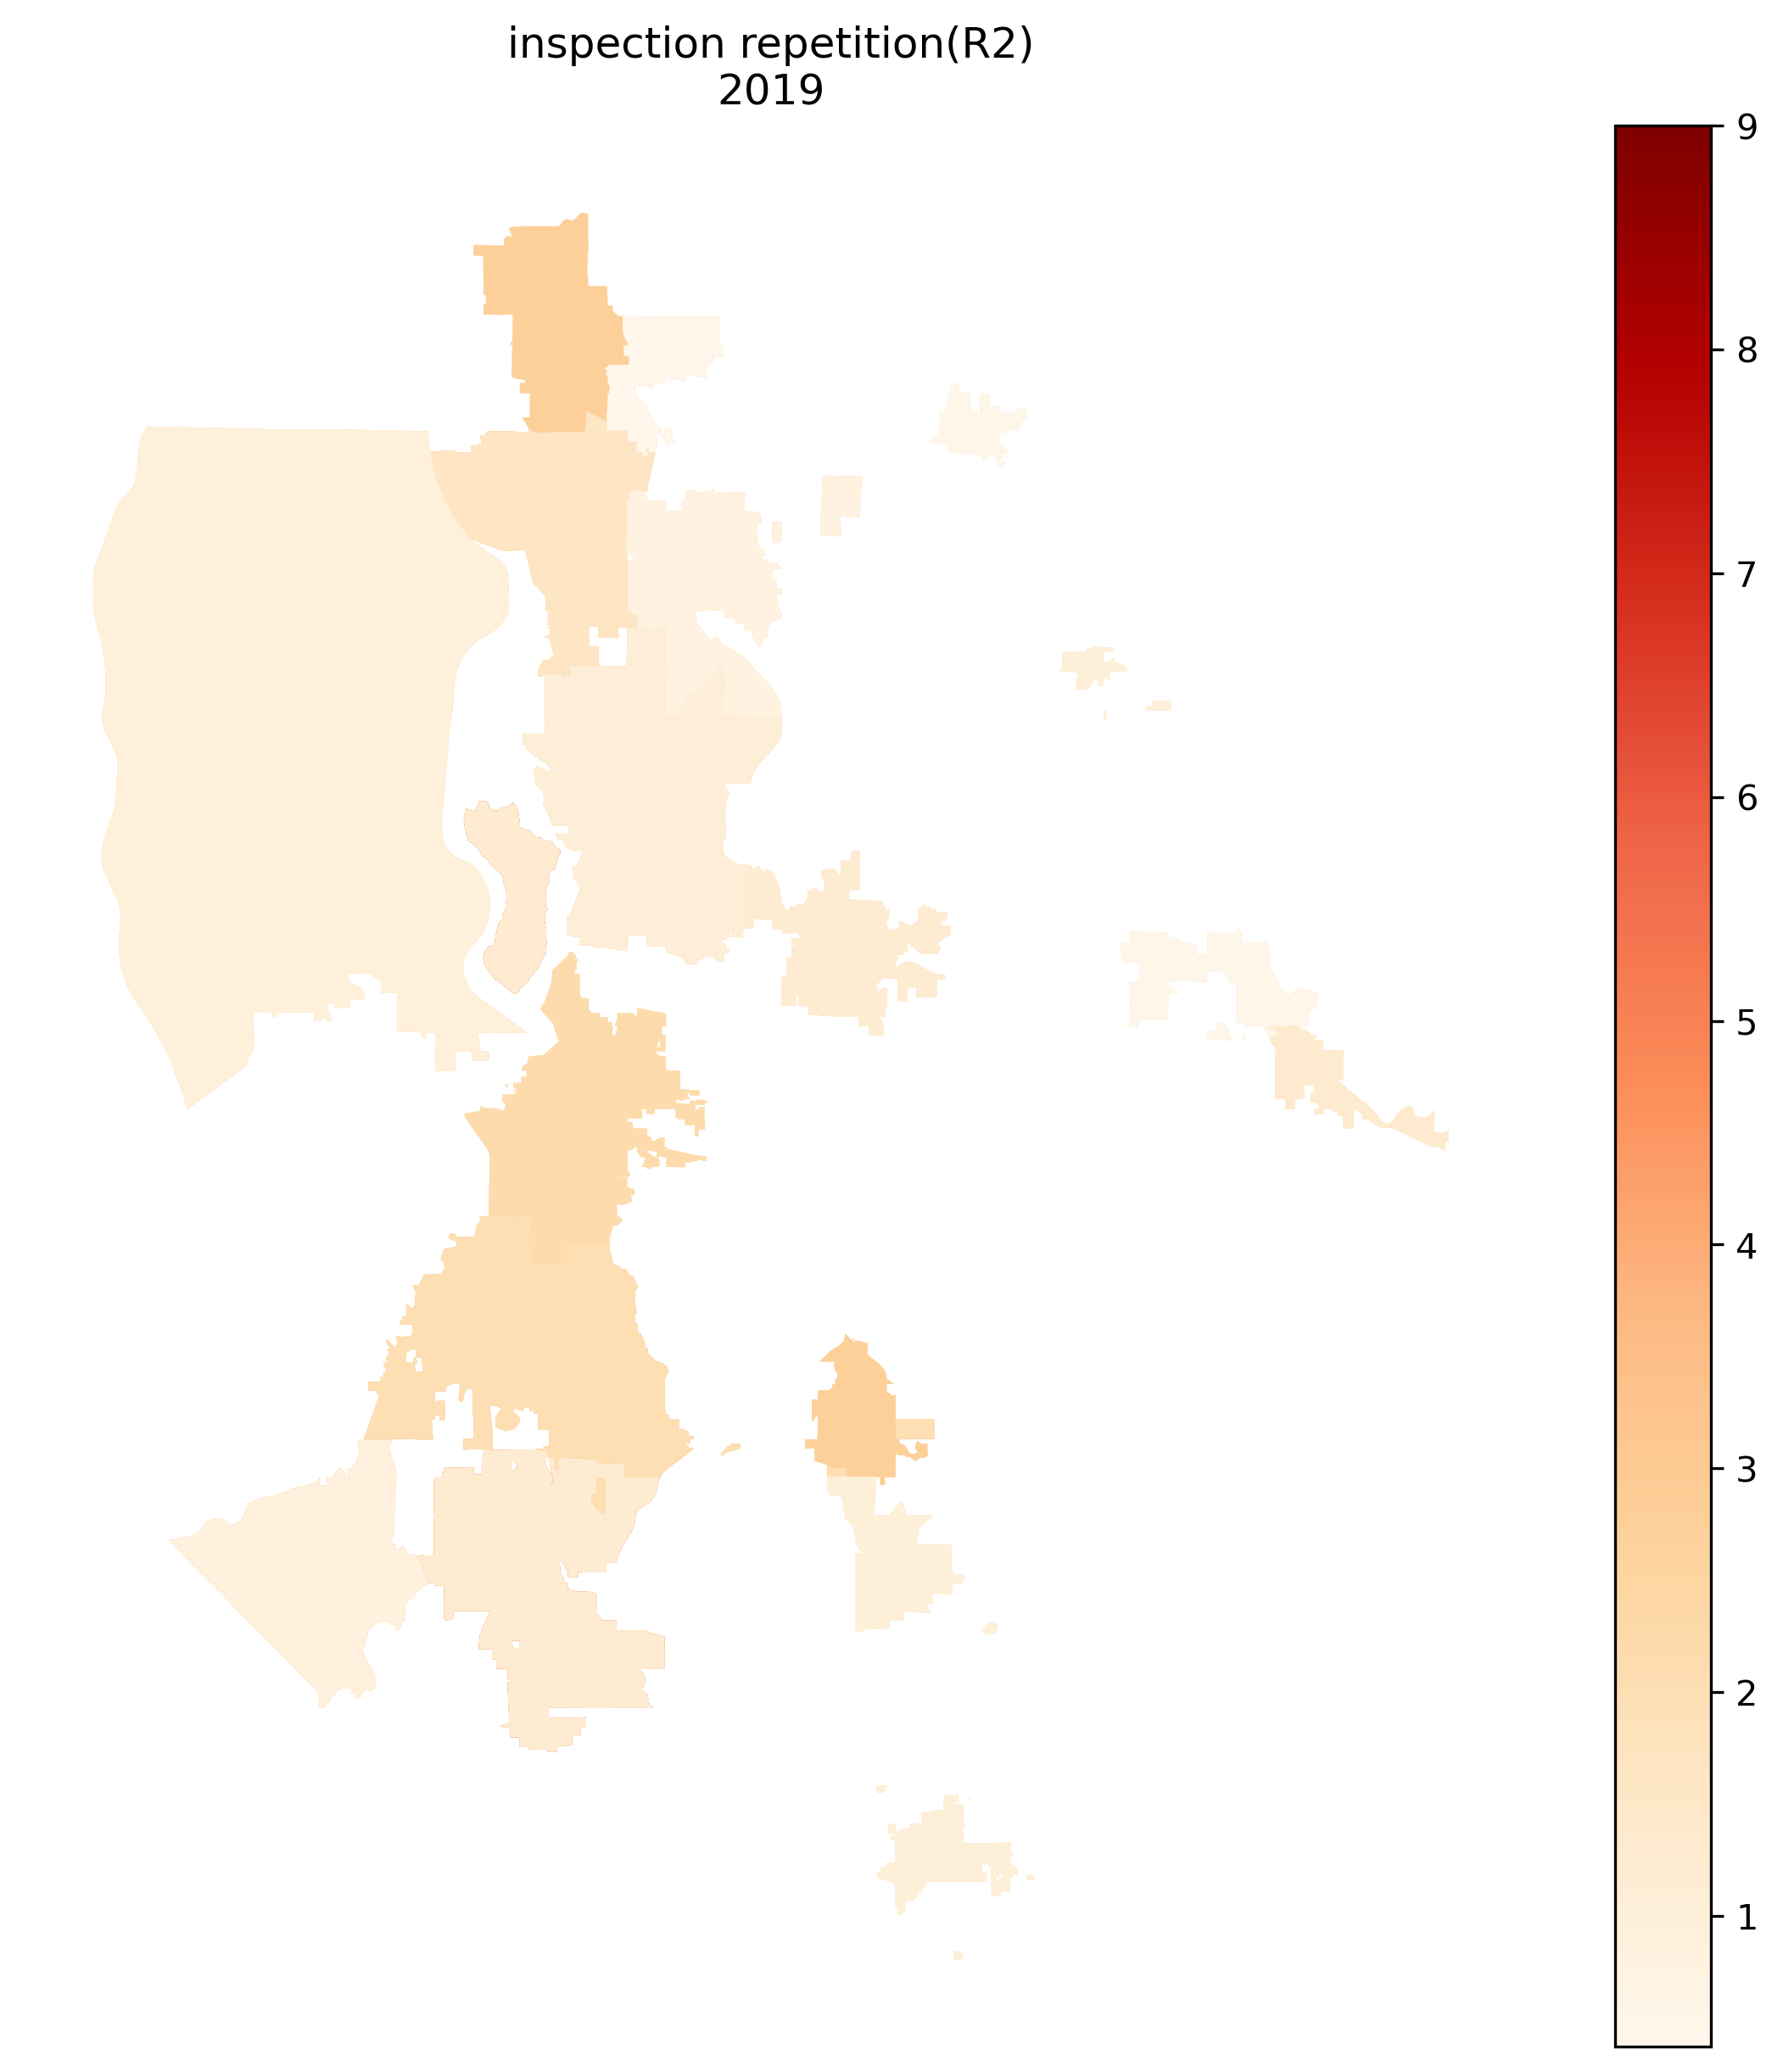

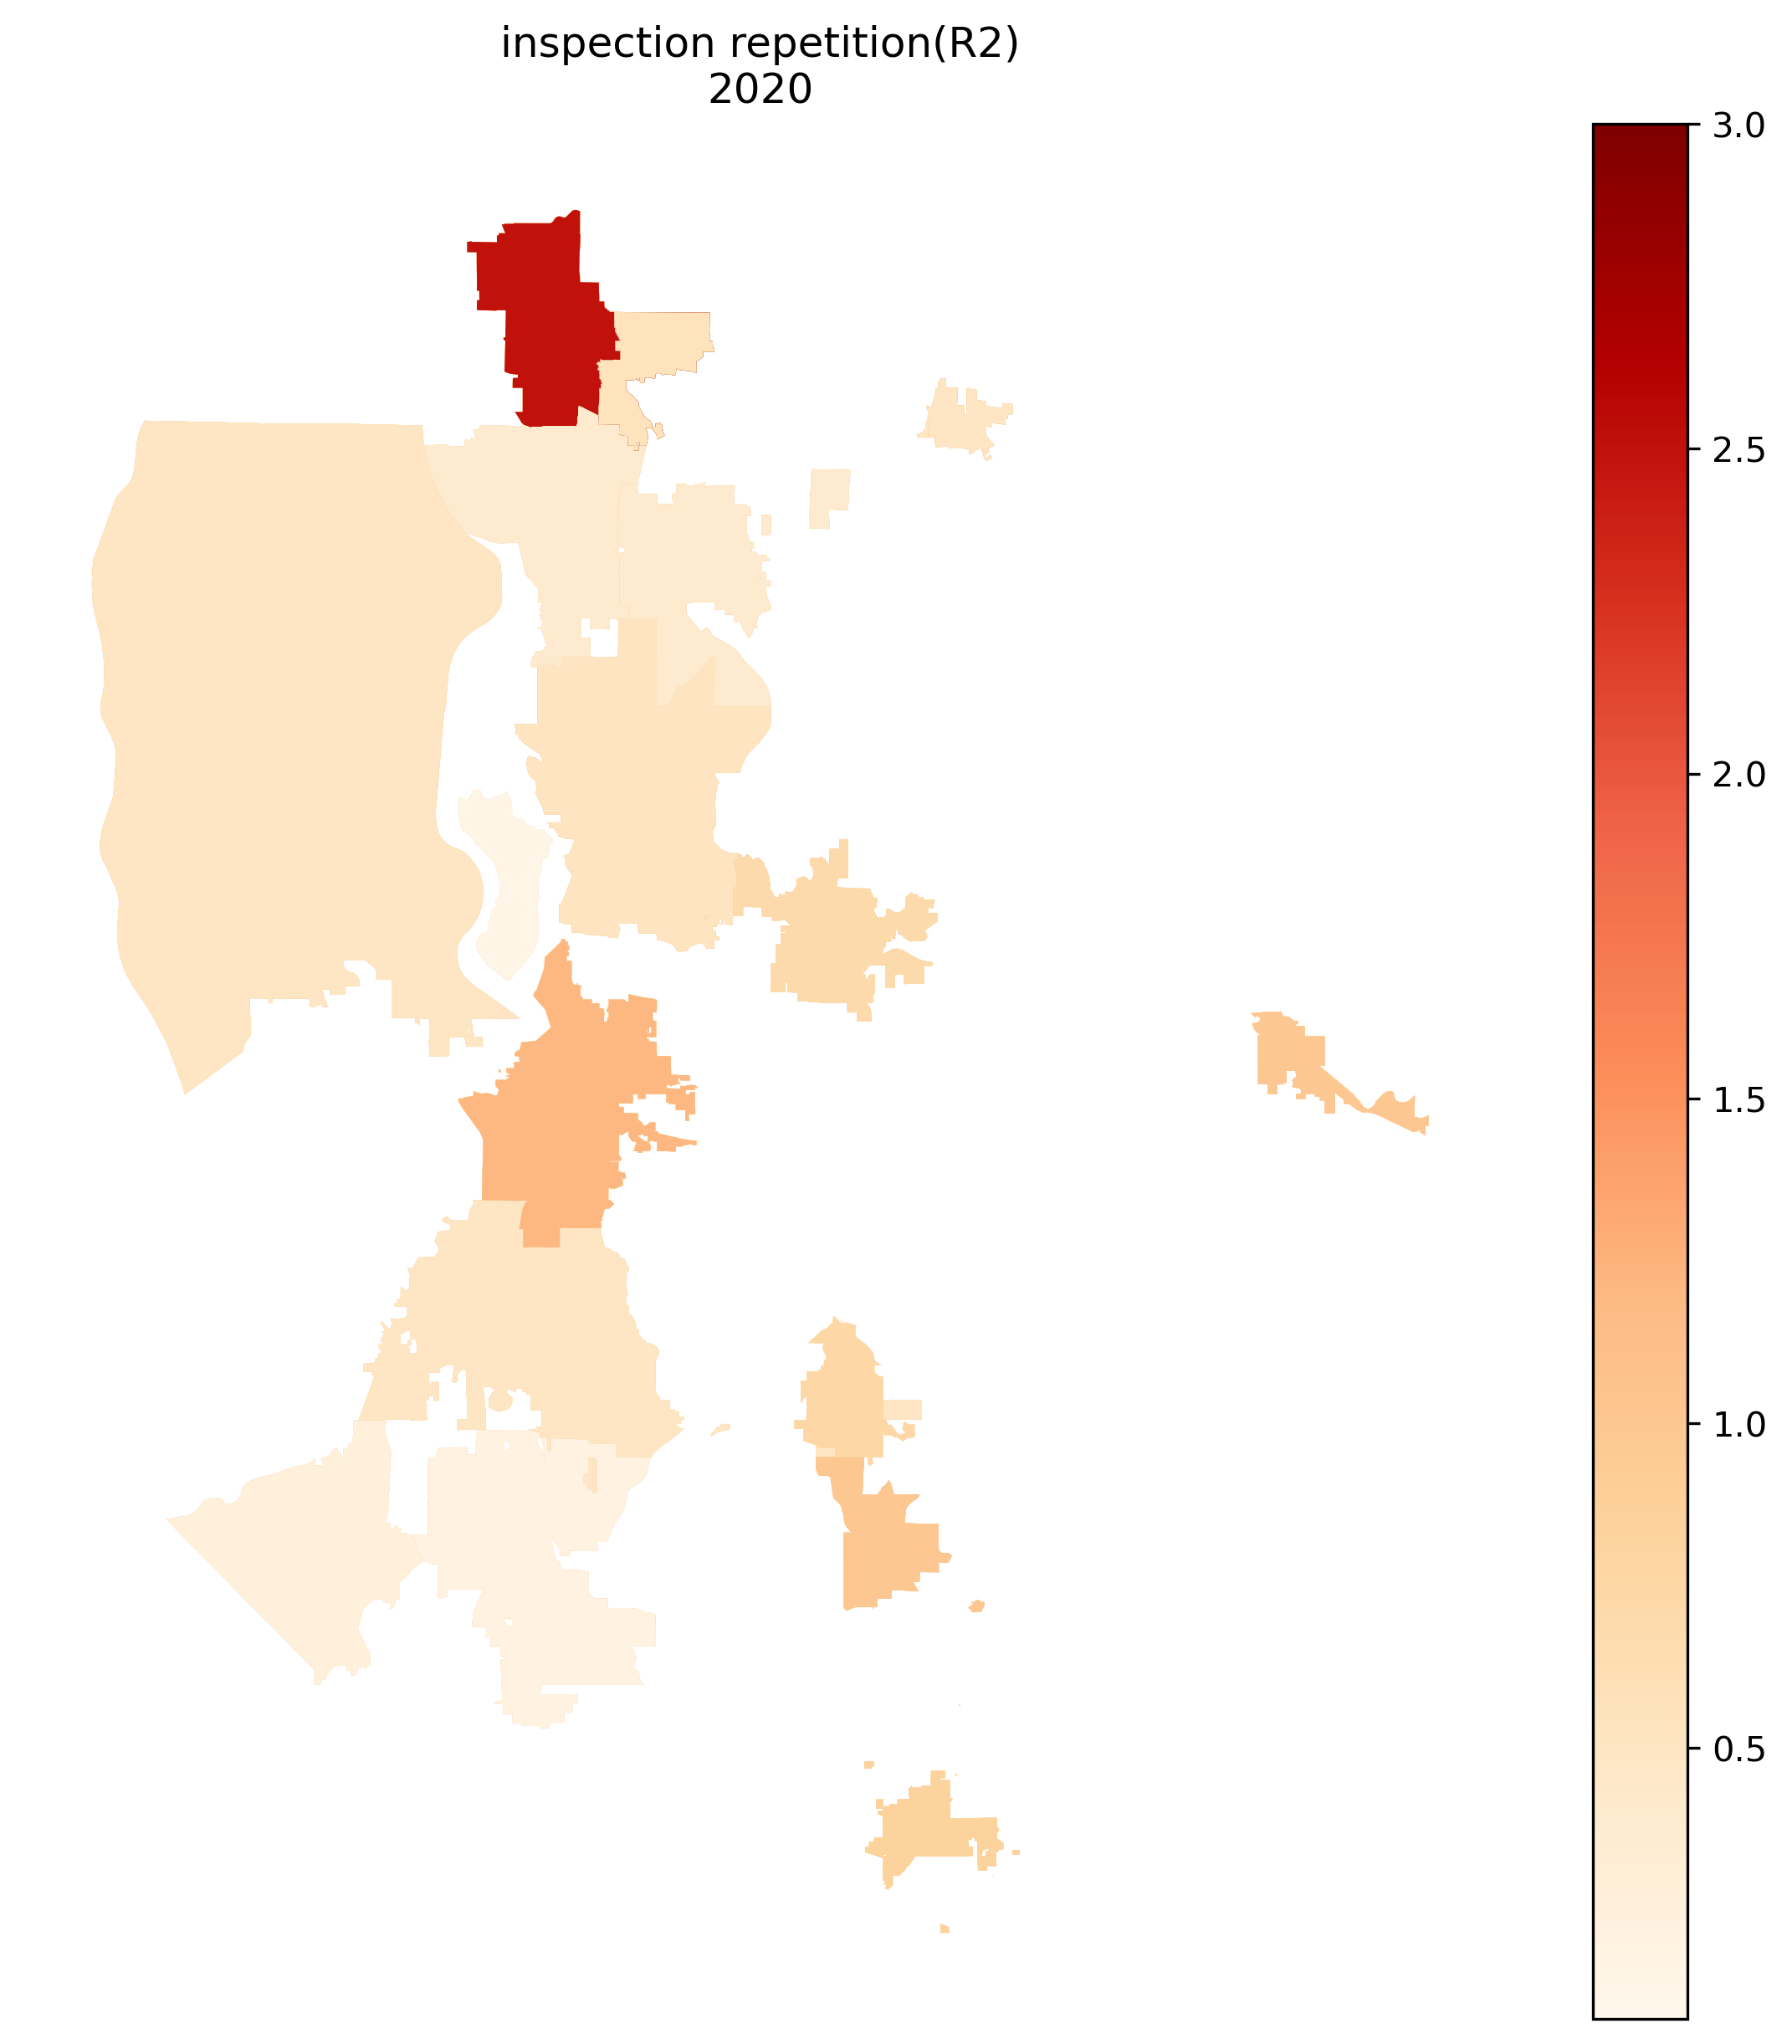

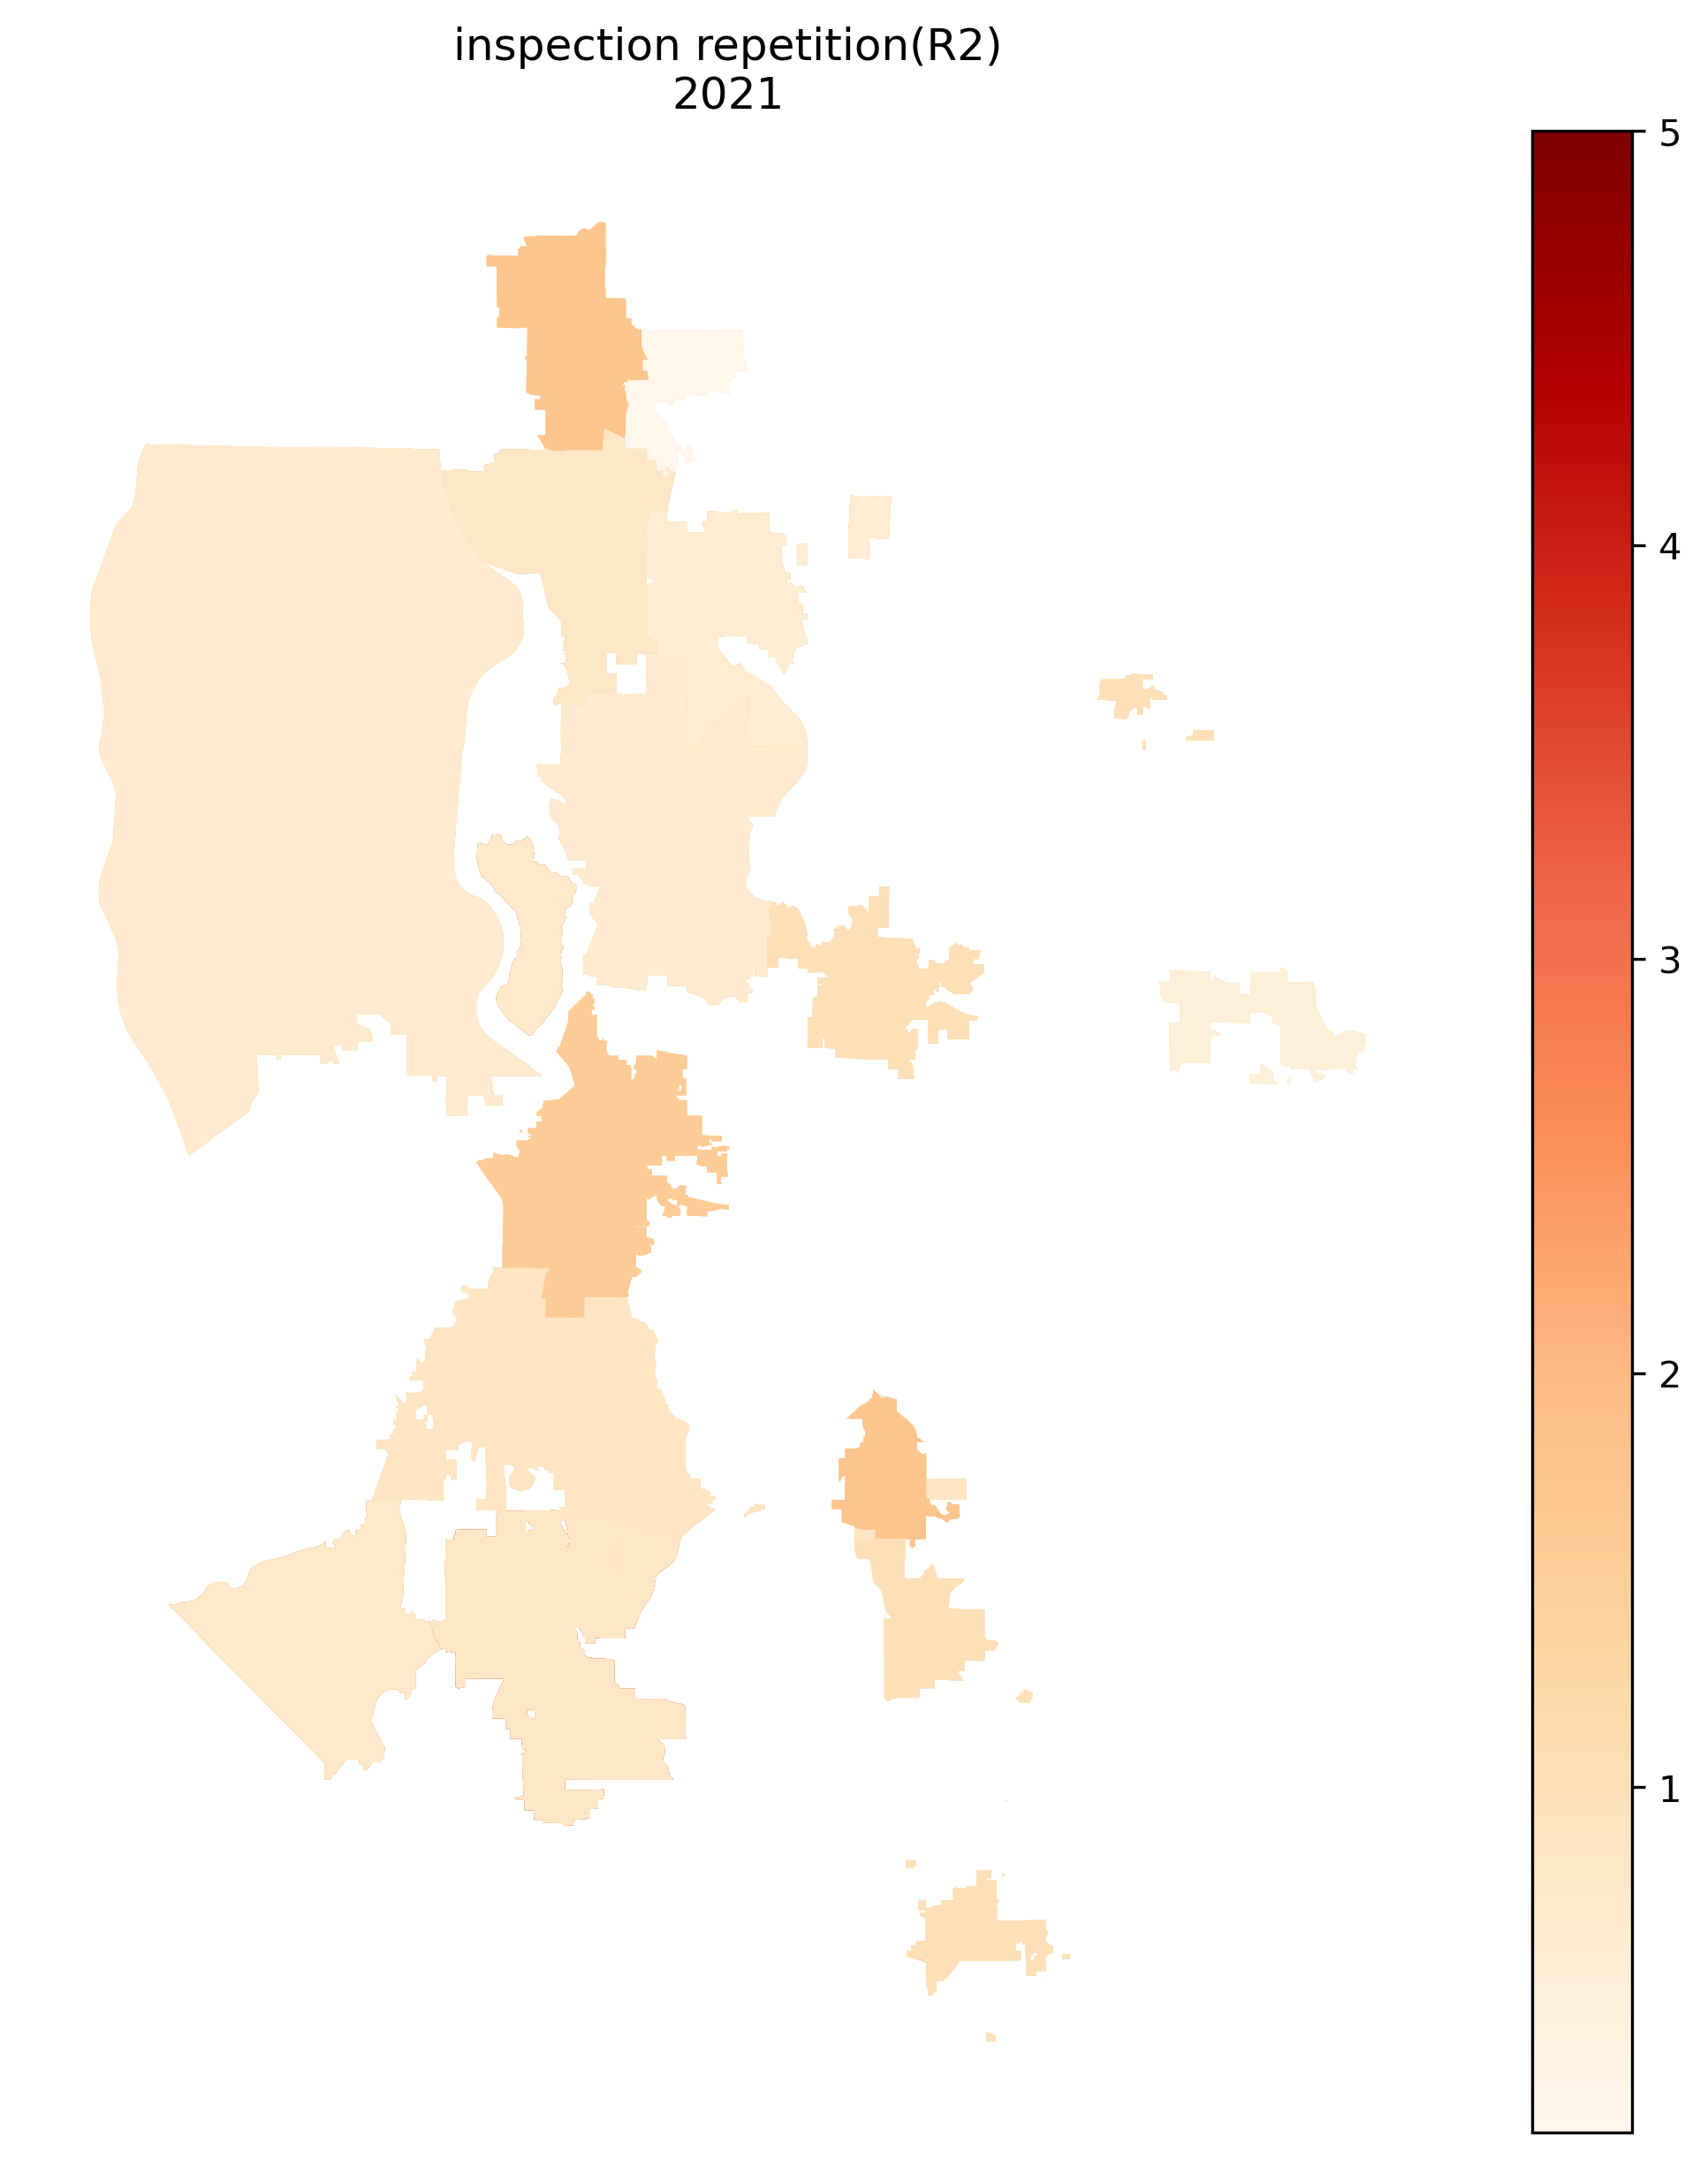

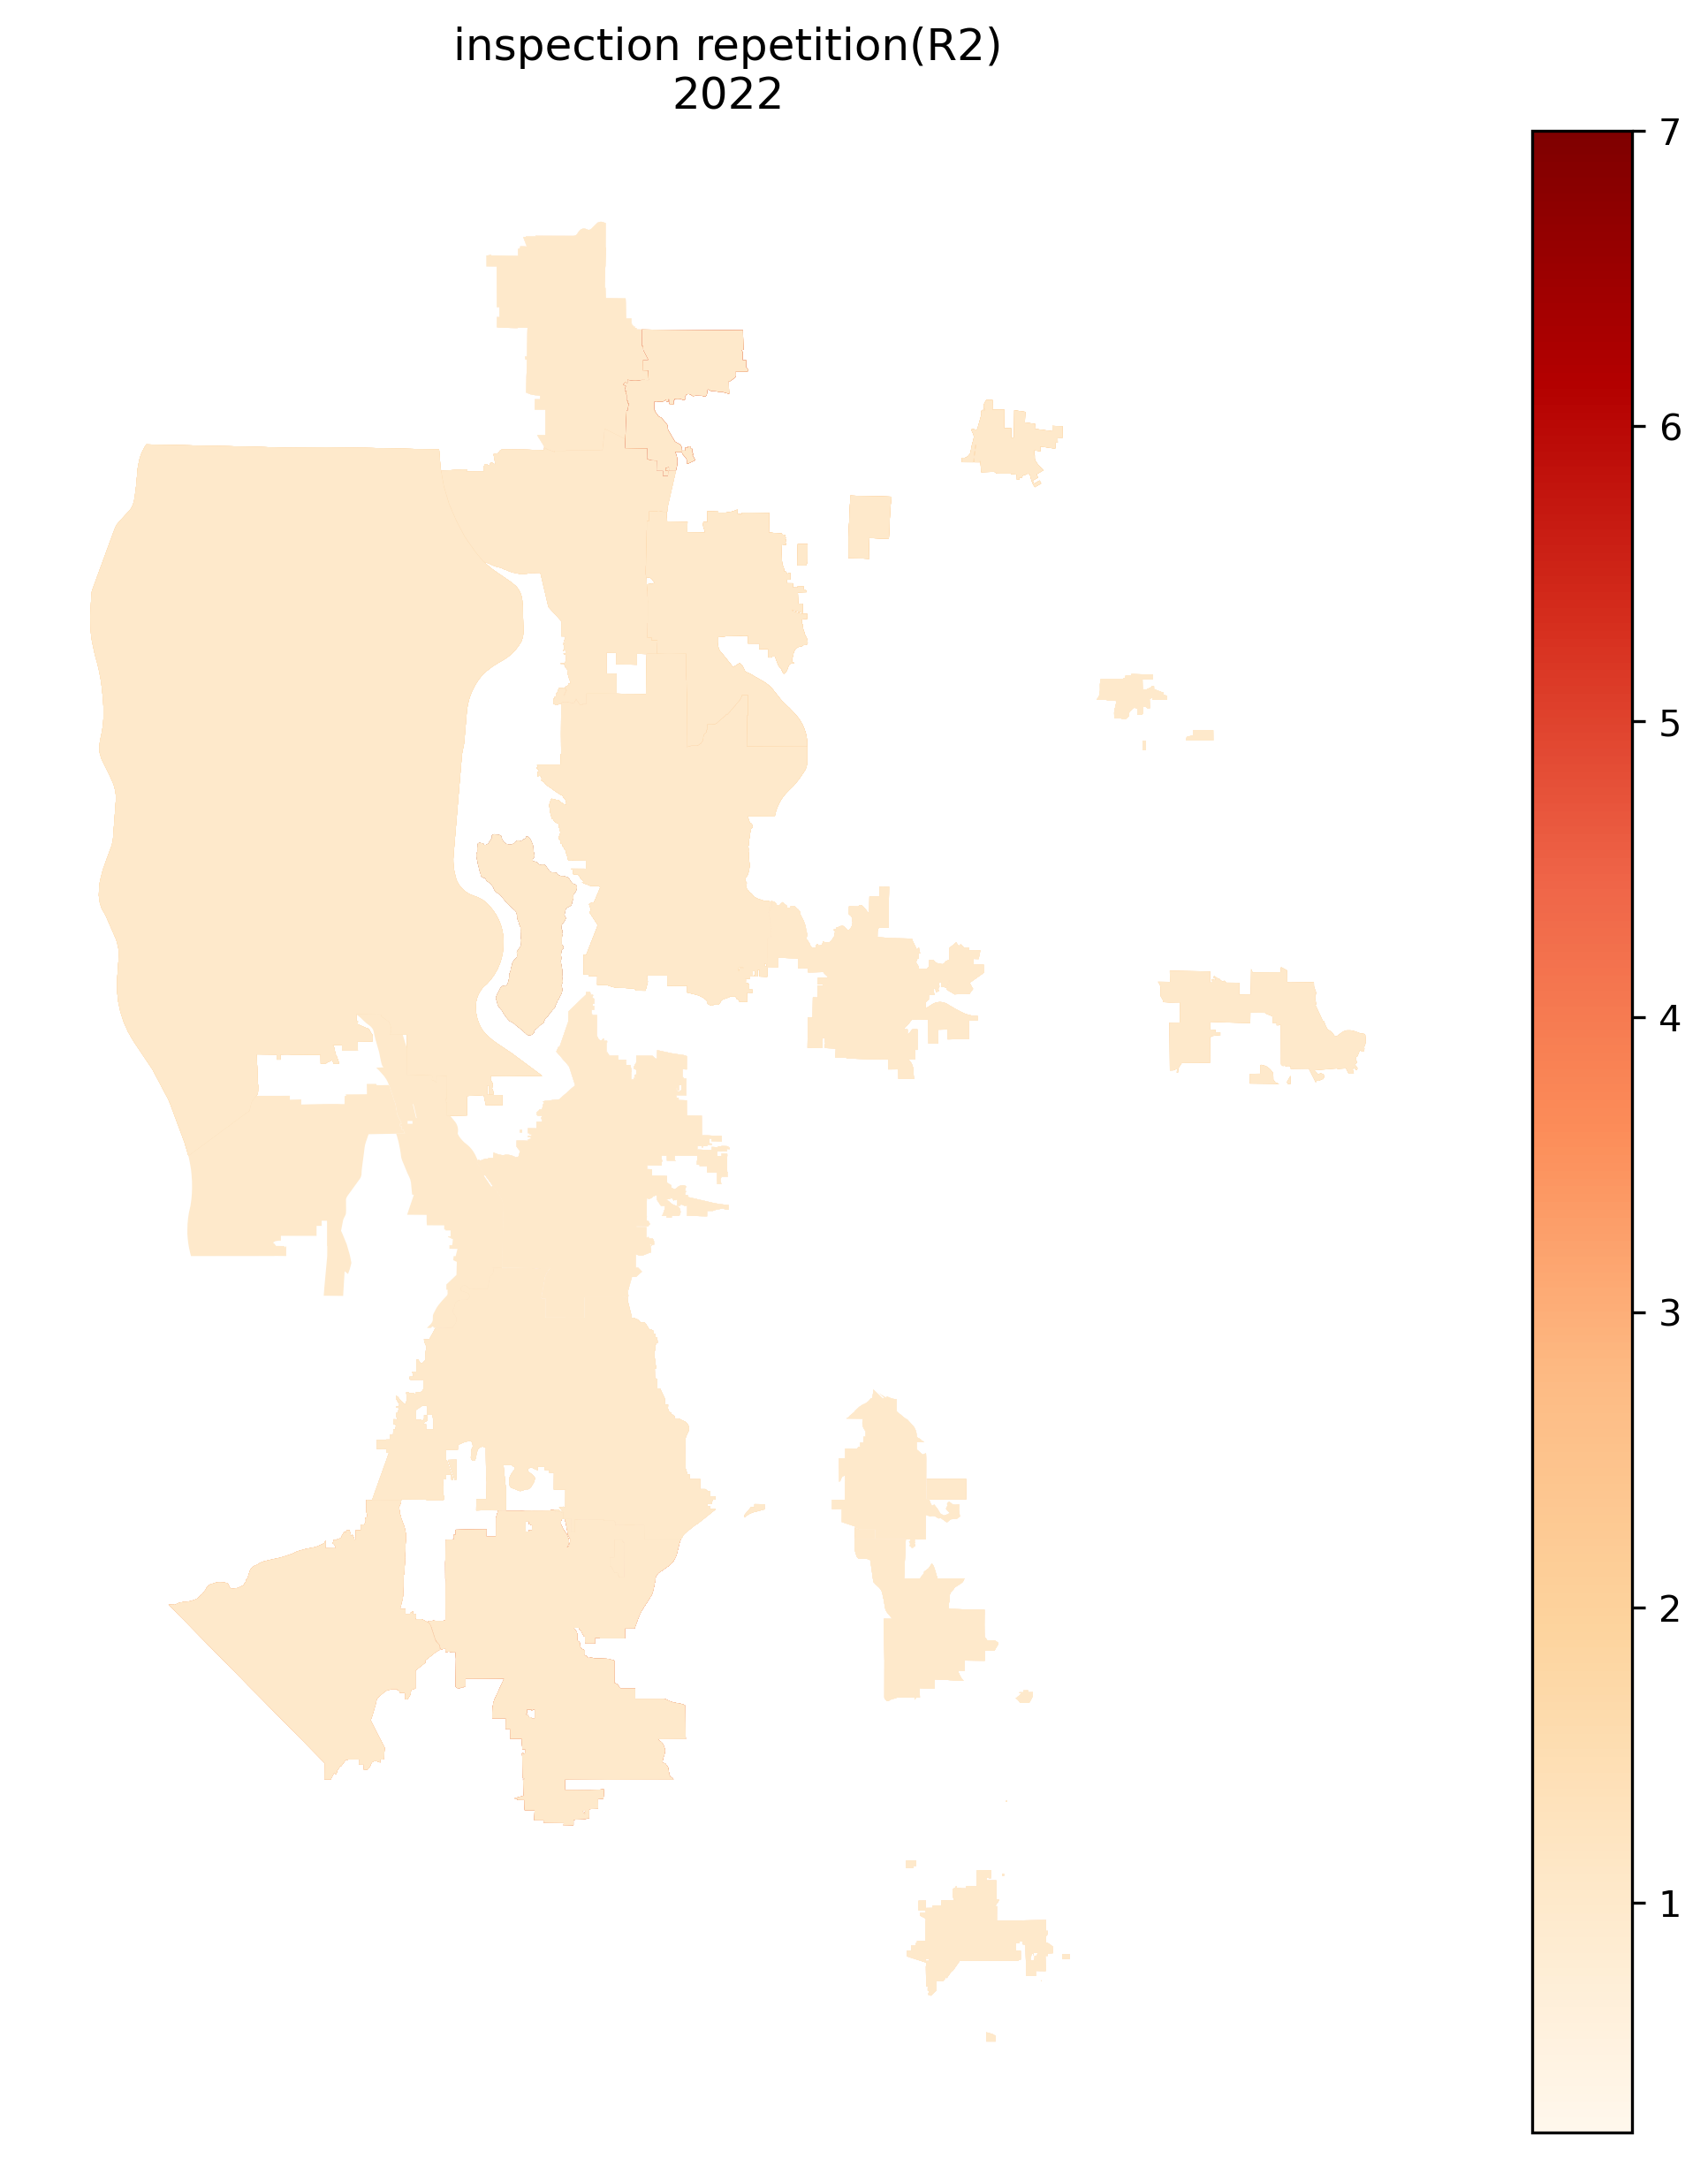

In [117]:
for year in range(2006, 2023):
    fig,ax = plt.subplots(1,1,figsize = (10,10),dpi = 300)
    geopandas.GeoDataFrame(R2_final3[R2_final3["year_x"]==year],geometry= "geometry").plot(column="inspection_per_rest",legend=True, cmap='OrRd' ,label ="inspection repetition" , ax = ax)
    # plt.axis("off")
    # plt.legend()
    # ax.set
    # plt.savefig("")
    ax.set_axis_off()
    # ax.legend(title = "Proportion")
#     ax.legend(fontsize=20,
          
#           loc=(1, .1),
#           title="LEGEND")

    ax.set_title(f"inspection repetition(R2)\n{year}")
    plt.savefig(f"IPR_{year}.jpeg" , bbox_inches = "tight")
    plt.show()

# Risk 1

In [99]:

R1=df.loc[df['Risk_category']=='Risk Category I']
R1.head()

Name     Program Identifier Inspection Date  \
21  100 PERCENT NUTRICION  100 PERCENT NUTRICION      2021-09-02   
22  100 PERCENT NUTRICION  100 PERCENT NUTRICION      2021-09-02   
23  100 PERCENT NUTRICION  100 PERCENT NUTRICION      2021-09-02   
24  100 PERCENT NUTRICION  100 PERCENT NUTRICION      2019-01-24   
25  100 PERCENT NUTRICION  100 PERCENT NUTRICION      2019-01-24   

                       Description         Address    City Zip Code  \
21  Seating 0-12 - Risk Category I  3700 NE 4TH ST  RENTON    98056   
22  Seating 0-12 - Risk Category I  3700 NE 4TH ST  RENTON    98056   
23  Seating 0-12 - Risk Category I  3700 NE 4TH ST  RENTON    98056   
24  Seating 0-12 - Risk Category I  3700 NE 4TH ST  RENTON    98056   
25  Seating 0-12 - Risk Category I  3700 NE 4TH ST  RENTON    98056   

             Phone   Longitude   Latitude  ... Violation Type  \
21  (206) 432-7381 -122.169114  47.488797  ...            RED   
22  (206) 432-7381 -122.169114  47.488797  ...            RED   
23  (206) 432-7381 -122.169114  47.488797  ...            RED   
24  (206) 432-7381 -122.169114  47.488797  ...           BLUE   
25  (206) 432-7381 -122.169114  47.488797  ...           BLUE   

                                Violation Description  Violation Points  \
21  0200 - Food Worker Cards current for all food ...                 5   
22             0600 - Adequate handwashing facilities                10   
23  2120 - Proper cold holding temperatures ( 42 d...                 5   
24  4100 - Warewashing facilities properly install...                 5   
25  4200 - Food-contact surfaces maintained, clean...                 5   

   Business_ID Inspection_Serial_Num Violation_Record_ID Grade      capacity  \
21   PR0087578             DAQI4H50B           IVP9YZNP0   3.0  Seating 0-12   
22   PR0087578             DAQI4H50B           IV0IGISAW   3.0  Seating 0-12   
23   PR0087578             DAQI4H50B           IV7LUMGYJ   3.0  Seating 0-12   
24   PR0087578             DAGFFM7DN           IV20JH1K2   3.0  Seating 0-12   
25   PR0087578             DAGFFM7DN           IVWMUB5KX   3.0  Seating 0-12   

      Risk_category    year  
21  Risk Category I  2021.0  
22  Risk Category I  2021.0  
23  Risk Category I  2021.0  
24  Risk Category I  2019.0  
25  Risk Category I  2019.0  

[5 rows x 25 columns]

In [103]:
resturans1=R1.groupby(['City','year'],as_index=False).count()
resturans_incities1=resturans1[['year','City','Business_ID']]
resturans_incities1

year         City  Business_ID
0    2016.0       ALGONA            1
1    2017.0       ALGONA            1
2    2018.0       ALGONA            1
3    2019.0       ALGONA            1
4    2020.0       ALGONA            1
..      ...          ...          ...
910  2017.0  Woodinville            5
911  2018.0  Woodinville            5
912  2019.0  Woodinville            5
913  2020.0  Woodinville            1
914  2022.0  Woodinville            8

[915 rows x 3 columns]

In [101]:
R1_final=R1.groupby(["year" ,'City'],as_index=False).count()
R1_final=R1_final[['year','City','Inspection Date']]
R1_final

year           City  Inspection Date
0    2006.0         AUBURN               23
1    2006.0         Auburn                7
2    2006.0       BELLEVUE               13
3    2006.0  BLACK DIAMOND                3
4    2006.0        BOTHELL                1
..      ...            ...              ...
910  2022.0         TACOMA                4
911  2022.0        TUKWILA               22
912  2022.0  VASHON ISLAND                6
913  2022.0    WOODINVILLE               43
914  2022.0    Woodinville                8

[915 rows x 3 columns]

In [107]:
R1_final2=(pd.merge(left=R1_final , right= resturans_incities1 , left_on= "City" , right_on="City" , how = "inner" ))
R1_final2

R1_final2['inspection_per_rest']=R1_final2['Inspection Date']/R1_final2['Business_ID']
R1_final2

year_x       City  Inspection Date  year_y  Business_ID  \
0      2006.0     AUBURN               23  2006.0           23   
1      2006.0     AUBURN               23  2007.0           22   
2      2006.0     AUBURN               23  2008.0           25   
3      2006.0     AUBURN               23  2009.0           22   
4      2006.0     AUBURN               23  2010.0           32   
...       ...        ...              ...     ...          ...   
14714  2021.0  SNOHOMISH                1  2021.0            1   
14715  2021.0  SNOHOMISH                1  2022.0            1   
14716  2022.0  SNOHOMISH                1  2021.0            1   
14717  2022.0  SNOHOMISH                1  2022.0            1   
14718  2022.0  CARNATION                1  2022.0            1   

       inspection_per_rest  
0                 1.000000  
1                 1.045455  
2                 0.920000  
3                 1.045455  
4                 0.718750  
...                    ...  
14714             1.000000  
14715             1.000000  
14716             1.000000  
14717             1.000000  
14718             1.000000  

[14719 rows x 6 columns]

In [108]:
R1_final3=(pd.merge(left=R1_final2 , right= Cities , left_on= "City" , right_on="CityName" , how = "inner" ))
R1_final3

year_x      City  Inspection Date  year_y  Business_ID  \
0     2006.0    Auburn                7  2006.0            7   
1     2006.0    Auburn                7  2007.0            7   
2     2006.0    Auburn                7  2008.0            9   
3     2006.0    Auburn                7  2009.0            8   
4     2006.0    Auburn                7  2010.0            9   
...      ...       ...              ...     ...          ...   
5066  2020.0  Mukilteo                1  2020.0            1   
5067  2020.0  Mukilteo                1  2022.0            1   
5068  2022.0  Mukilteo                1  2019.0            1   
5069  2022.0  Mukilteo                1  2020.0            1   
5070  2022.0  Mukilteo                1  2022.0            1   

      inspection_per_rest  OBJECTID  CityName CountySeat  CityGNISPl  \
0                1.000000      9118    Auburn         no     2409755   
1                1.000000      9118    Auburn         no     2409755   
2                0.777778      9118    Auburn         no     2409755   
3                0.875000      9118    Auburn         no     2409755   
4                0.777778      9118    Auburn         no     2409755   
...                   ...       ...       ...        ...         ...   
5066             1.000000      9002  Mukilteo         no     2411192   
5067             1.000000      9002  Mukilteo         no     2411192   
5068             1.000000      9002  Mukilteo         no     2411192   
5069             1.000000      9002  Mukilteo         no     2411192   
5070             1.000000      9002  Mukilteo         no     2411192   

      LastUpdate CountyFIPS MajorCity CityFIPSLo OFMCityCod  \
0     2016-02-29      53033        no    5303180       0055   
1     2016-02-29      53033        no    5303180       0055   
2     2016-02-29      53033        no    5303180       0055   
3     2016-02-29      53033        no    5303180       0055   
4     2016-02-29      53033        no    5303180       0055   
...          ...        ...       ...        ...        ...   
5066        None      53061        no    5347735       0830   
5067        None      53061        no    5347735       0830   
5068        None      53061        no    5347735       0830   
5069        None      53061        no    5347735       0830   
5070        None      53061        no    5347735       0830   

                                    GlobalID    SHAPESTAre     SHAPESTLen  \
0     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
1     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
2     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
3     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
4     {3A7B03ED-669D-4525-A444-1A90432E4A26}  8.320586e+08  232235.443416   
...                                      ...           ...            ...   
5066  {4AAD9580-A867-48AC-BB3F-2B6BD94958FA}  1.753224e+08   84580.134509   
5067  {4AAD9580-A867-48AC-BB3F-2B6BD94958FA}  1.753224e+08   84580.134509   
5068  {4AAD9580-A867-48AC-BB3F-2B6BD94958FA}  1.753224e+08   84580.134509   
5069  {4AAD9580-A867-48AC-BB3F-2B6BD94958FA}  1.753224e+08   84580.134509   
5070  {4AAD9580-A867-48AC-BB3F-2B6BD94958FA}  1.753224e+08   84580.134509   

                                               geometry  
0     POLYGON ((-13606869.504 6000023.199, -13606614...  
1     POLYGON ((-13606869.504 6000023.199, -13606614...  
2     POLYGON ((-13606869.504 6000023.199, -13606614...  
3     POLYGON ((-13606869.504 6000023.199, -13606614...  
4     POLYGON ((-13606869.504 6000023.199, -13606614...  
...                                                 ...  
5066  POLYGON ((-13613713.512 6098722.424, -13613662...  
5067  POLYGON ((-13613713.512 6098722.424, -13613662...  
5068  POLYGON ((-13613713.512 6098722.424, -13613662...  
5069  POLYGON ((-13613713.512 6098722.424, -13613662...  
5070  POLYGON ((-13613713.512 6098722.424, -13613662

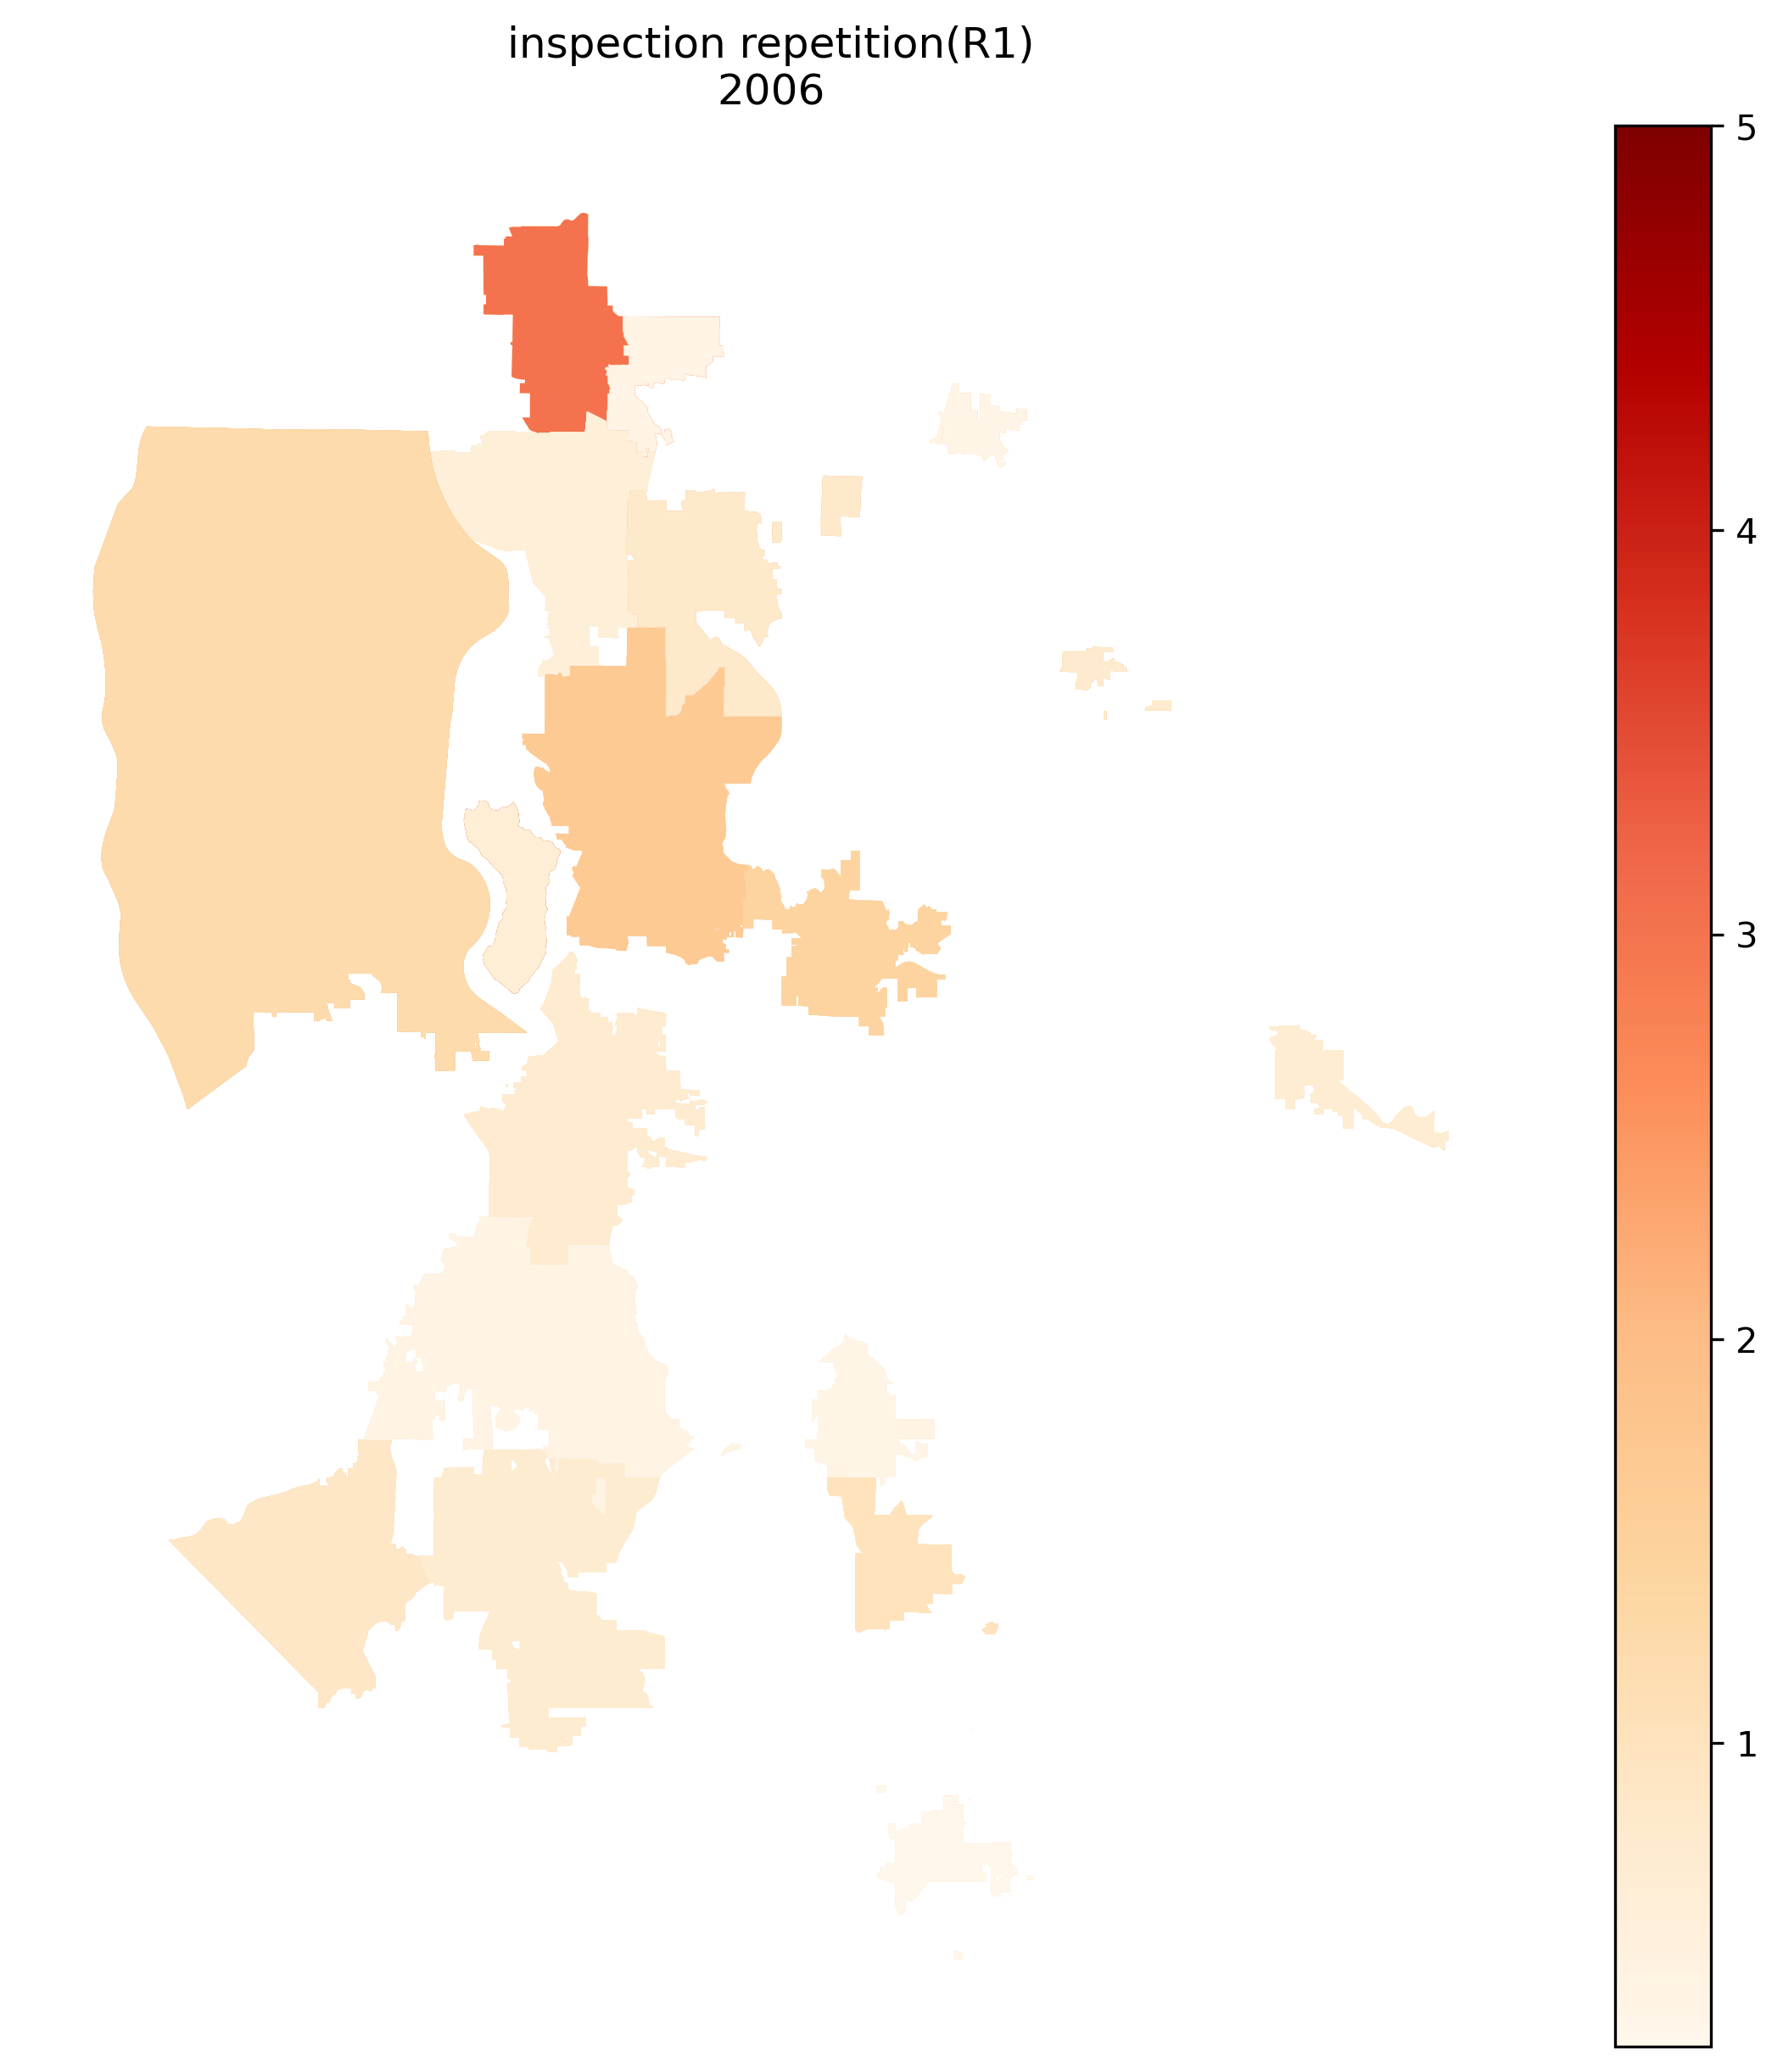

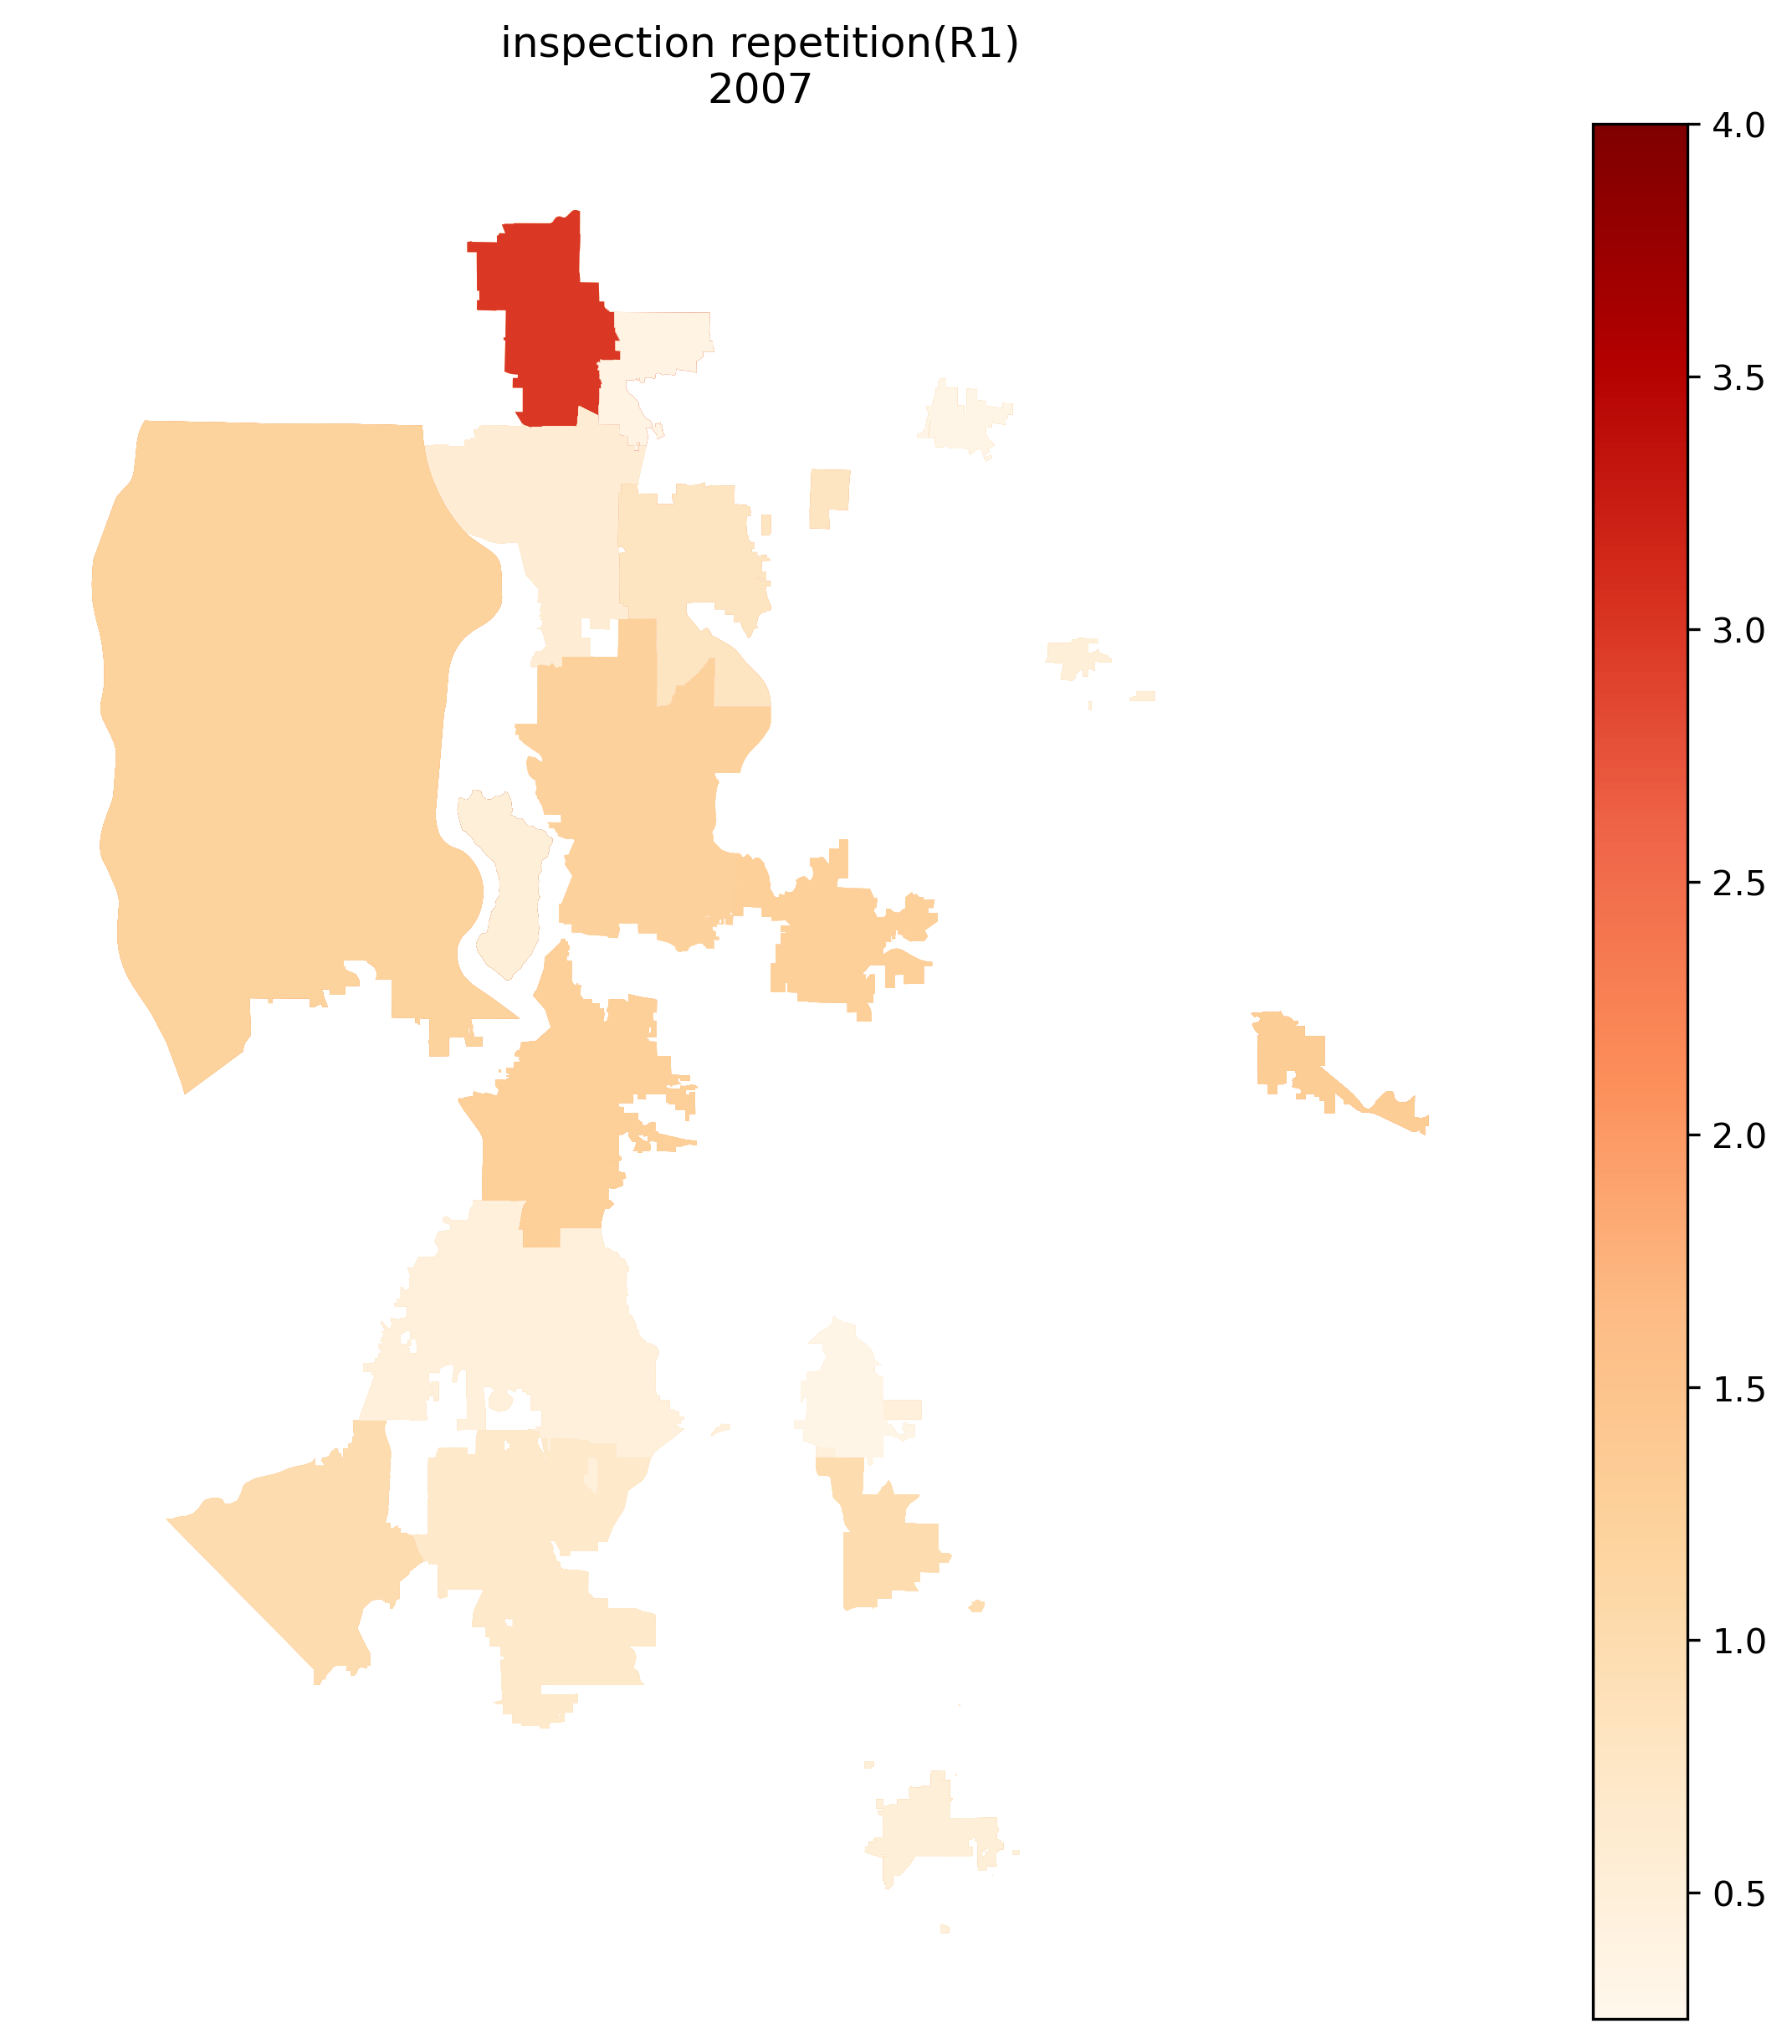

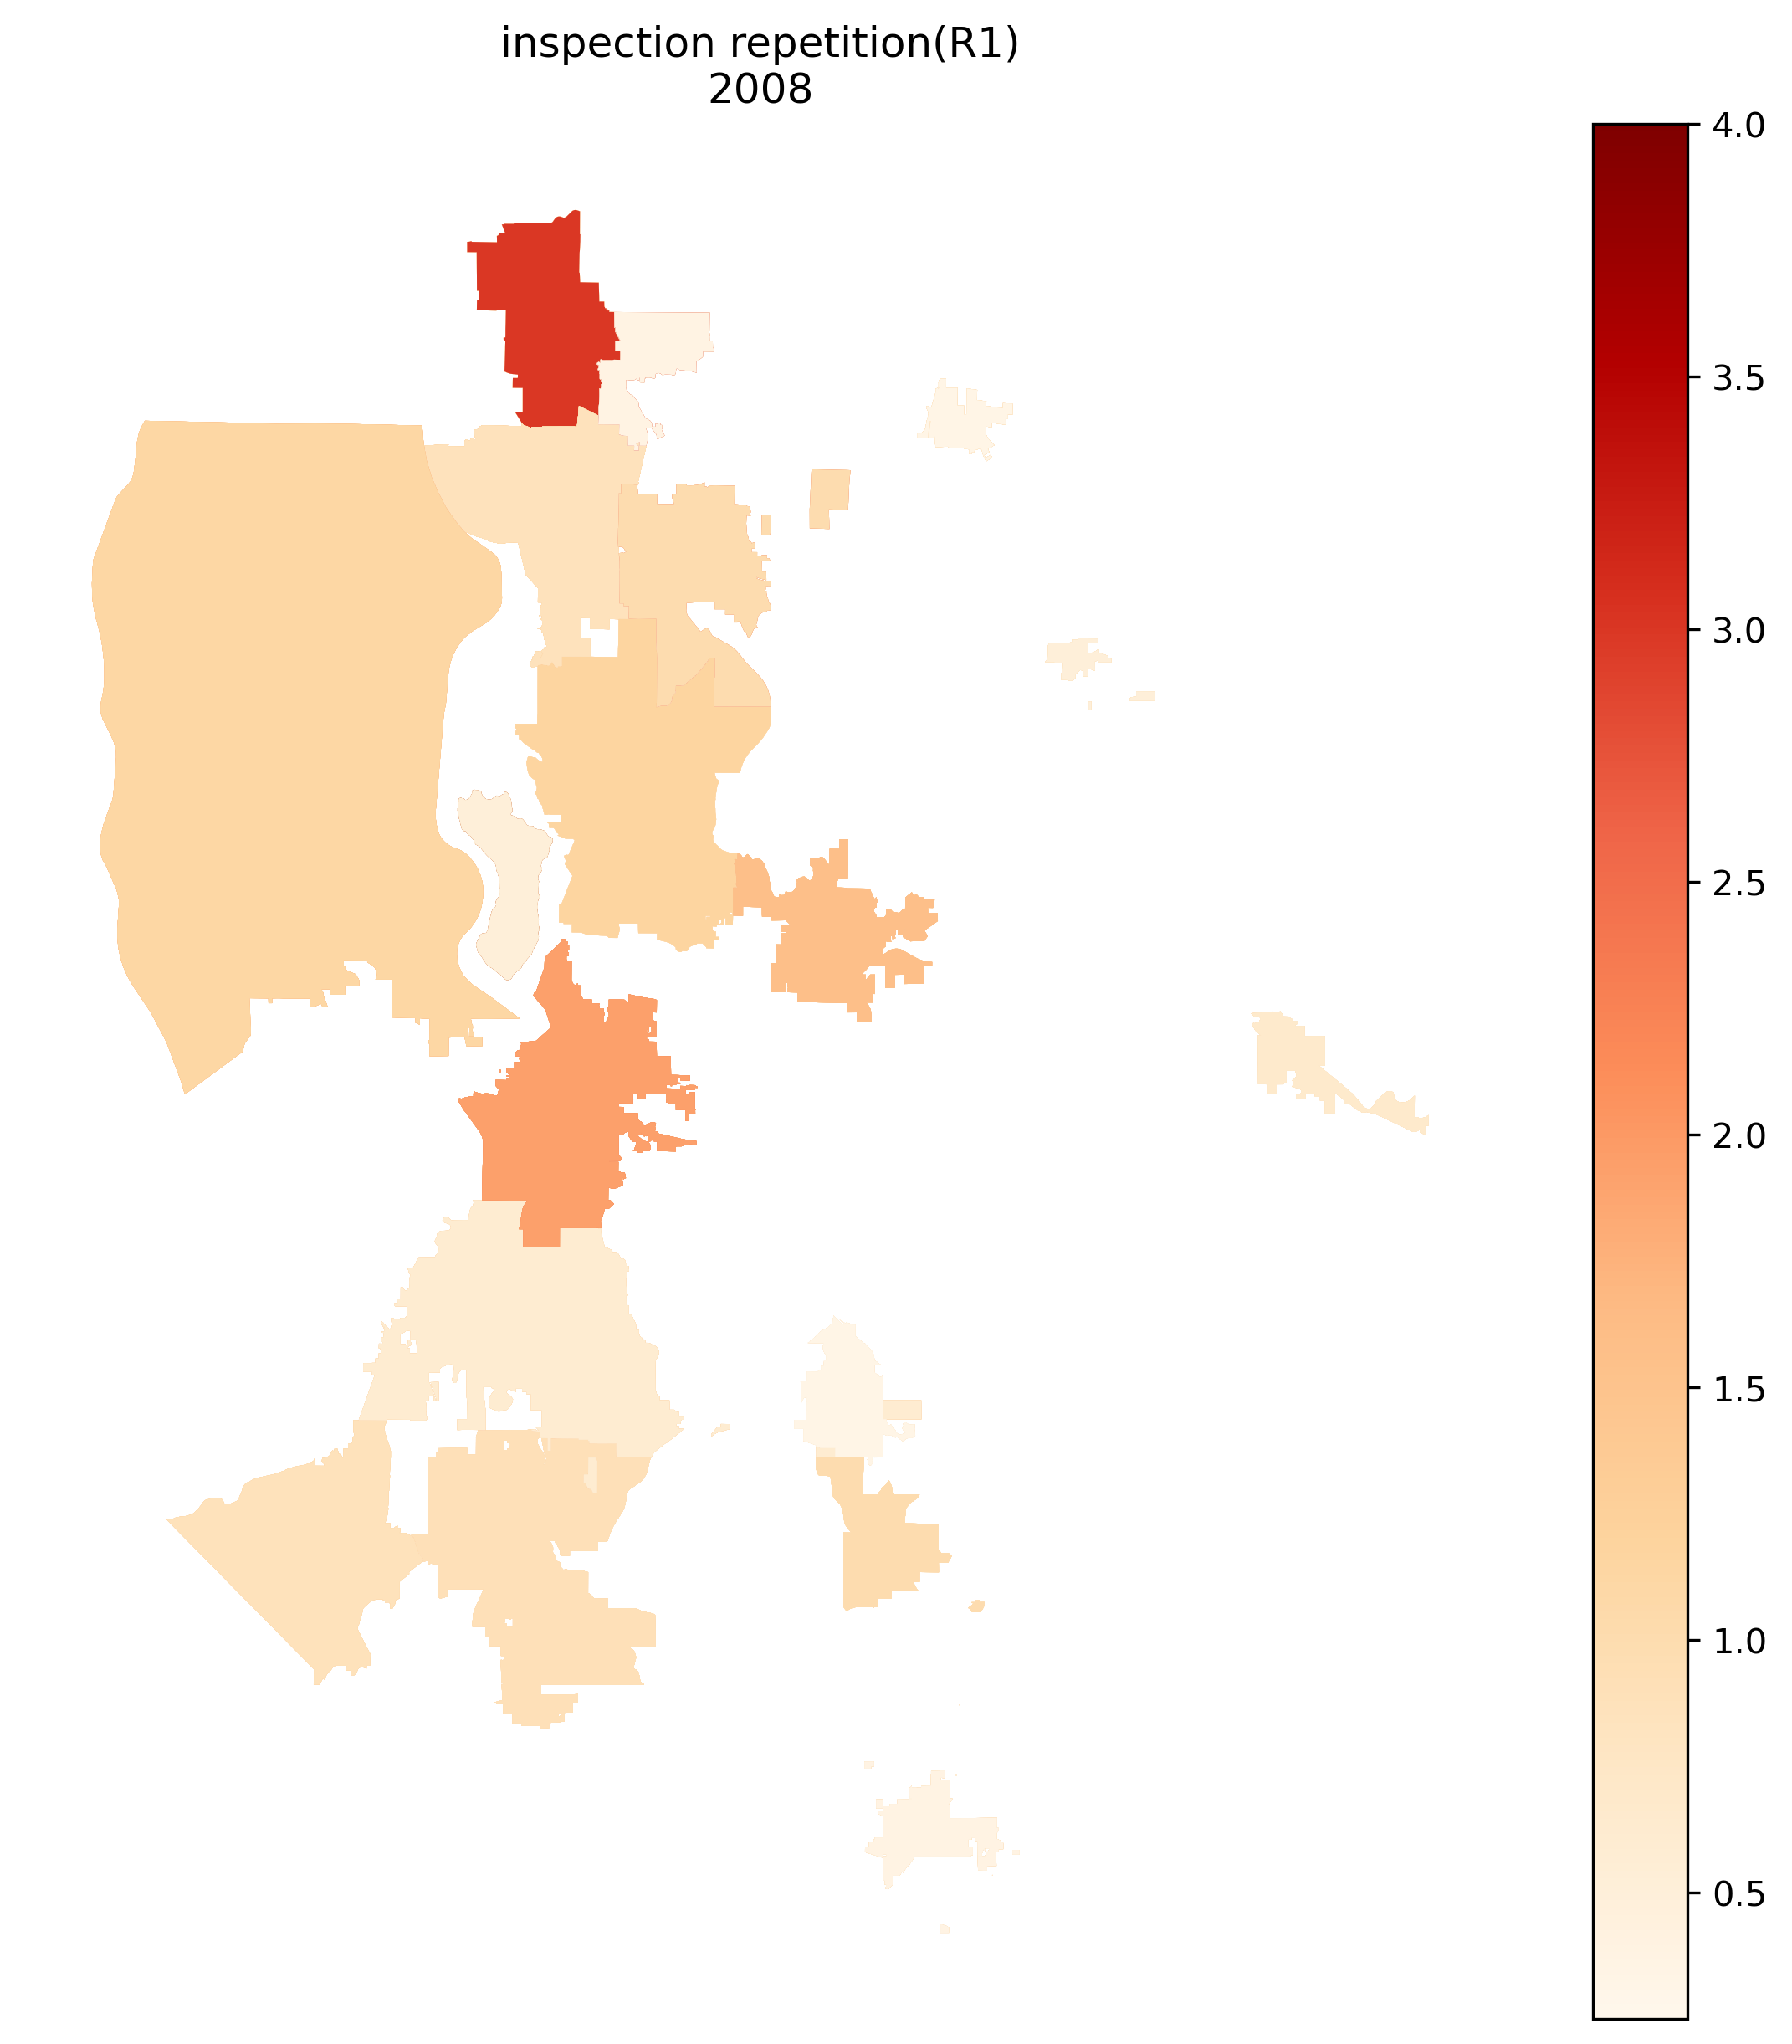

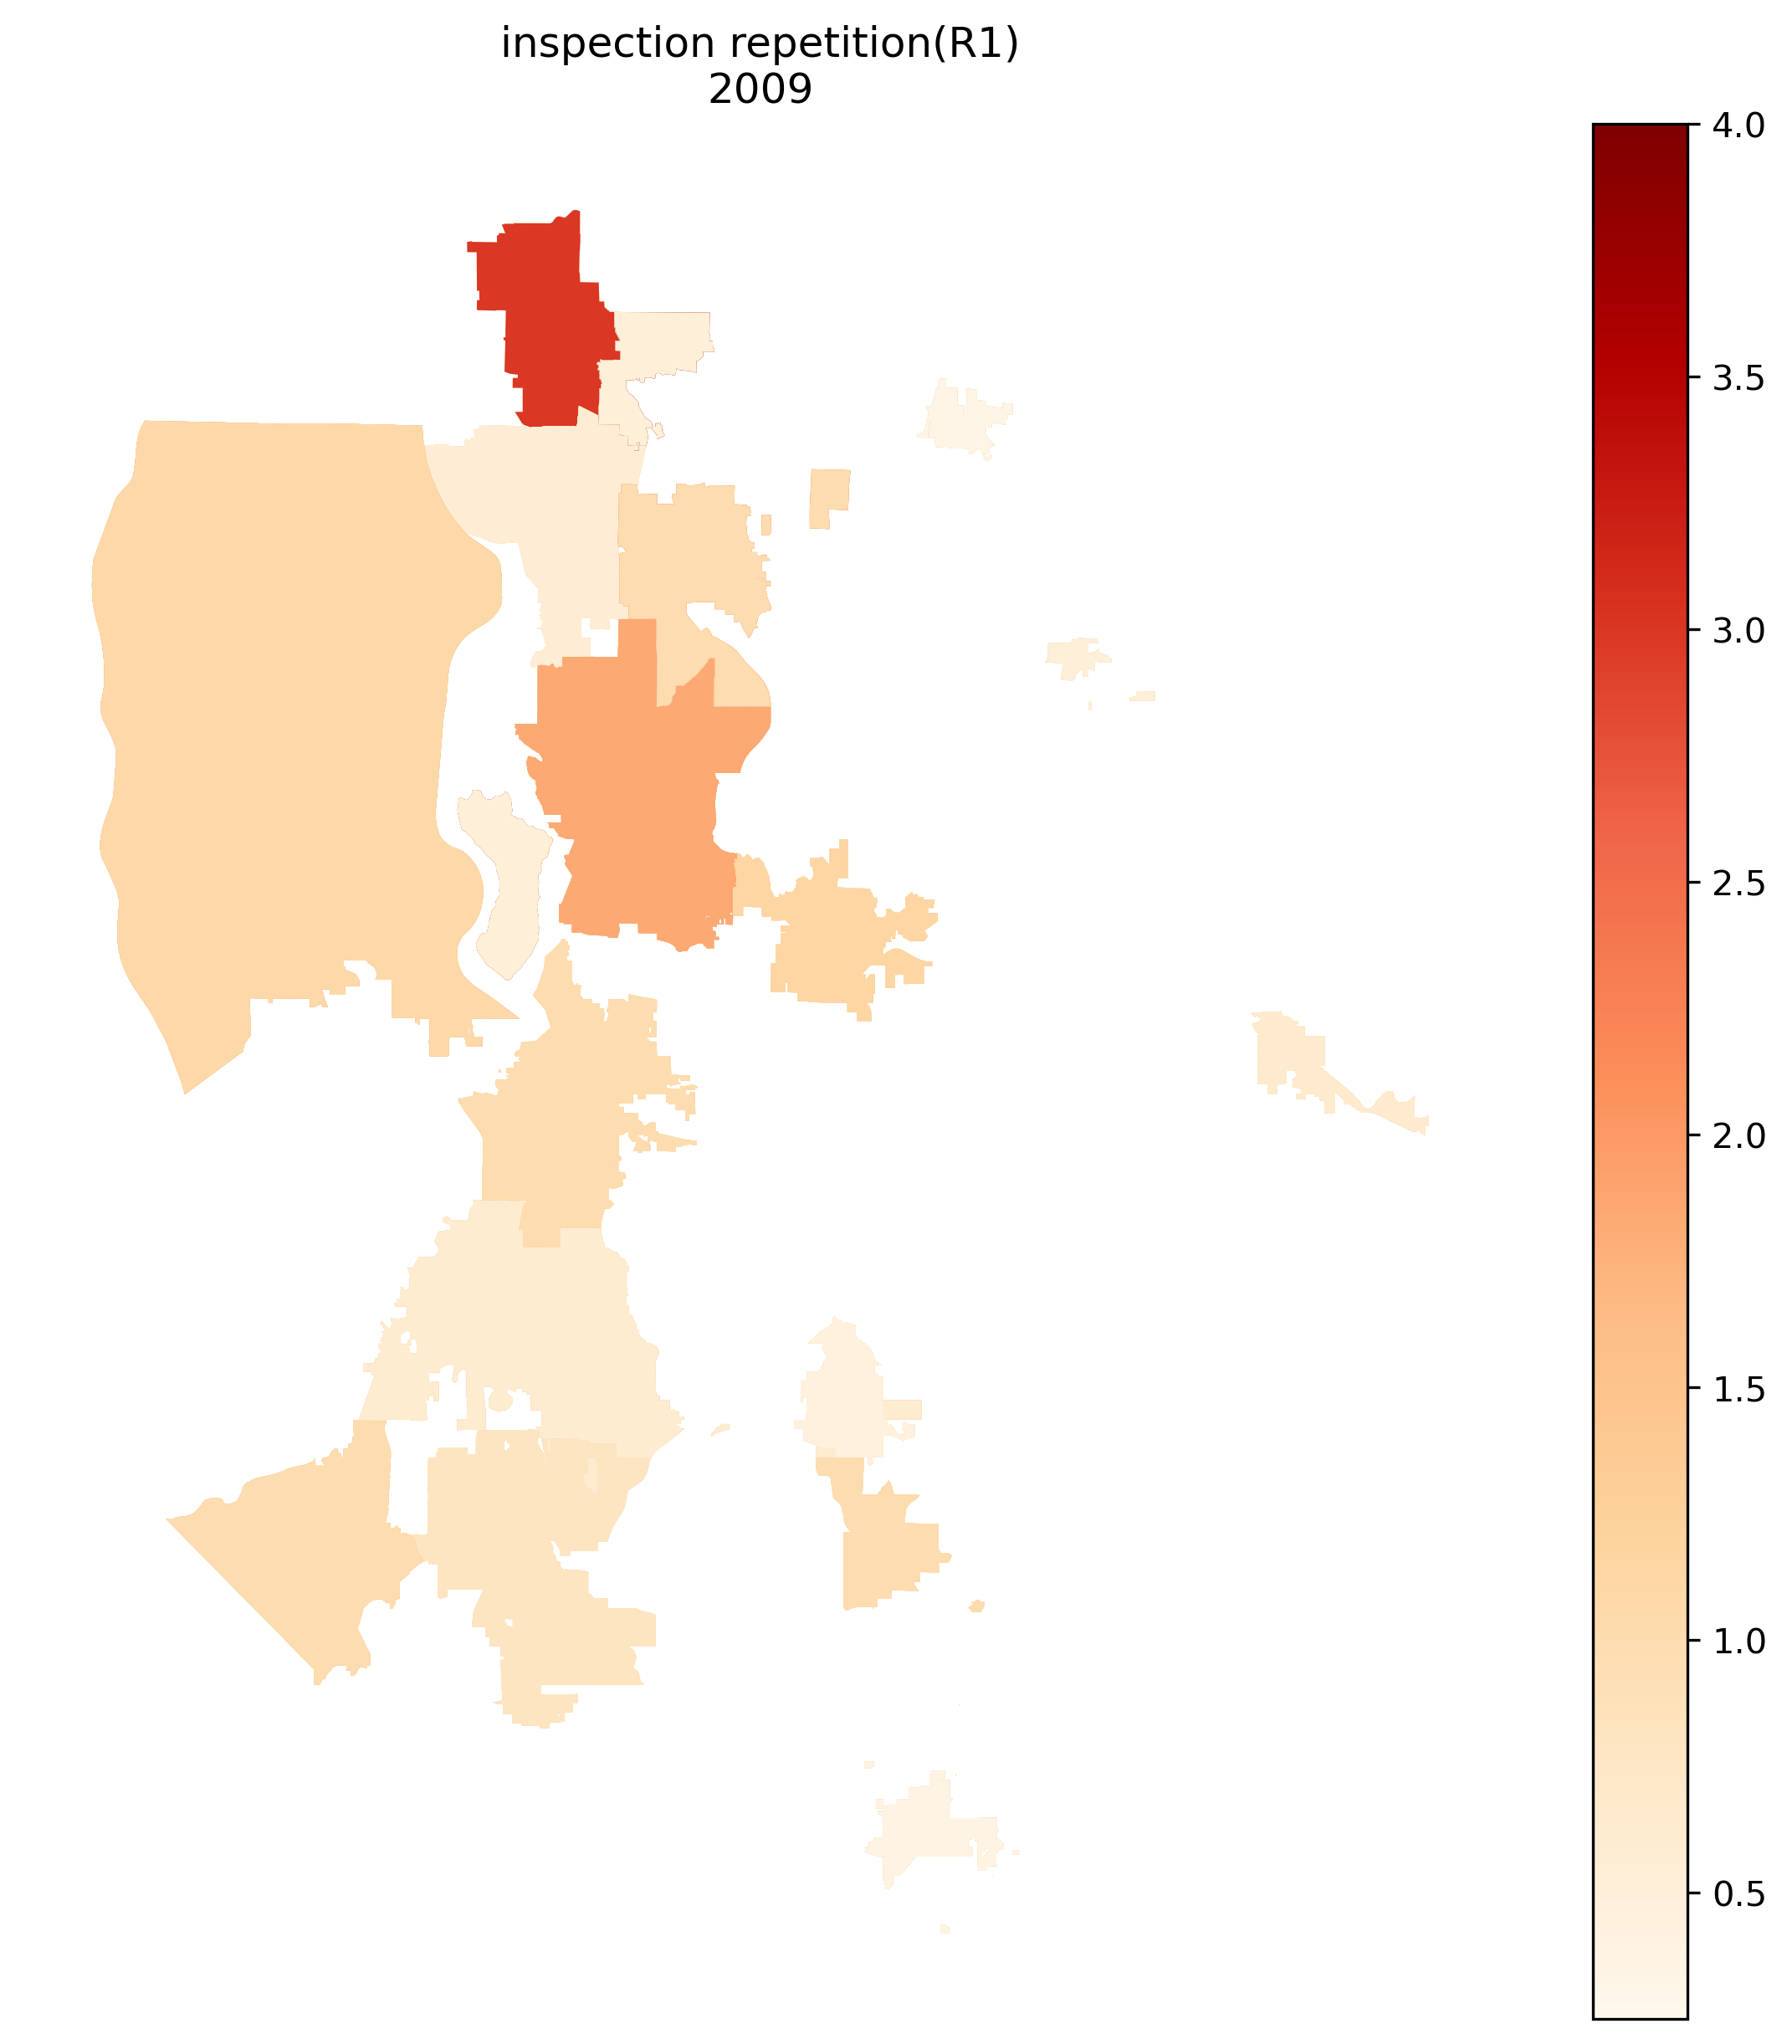

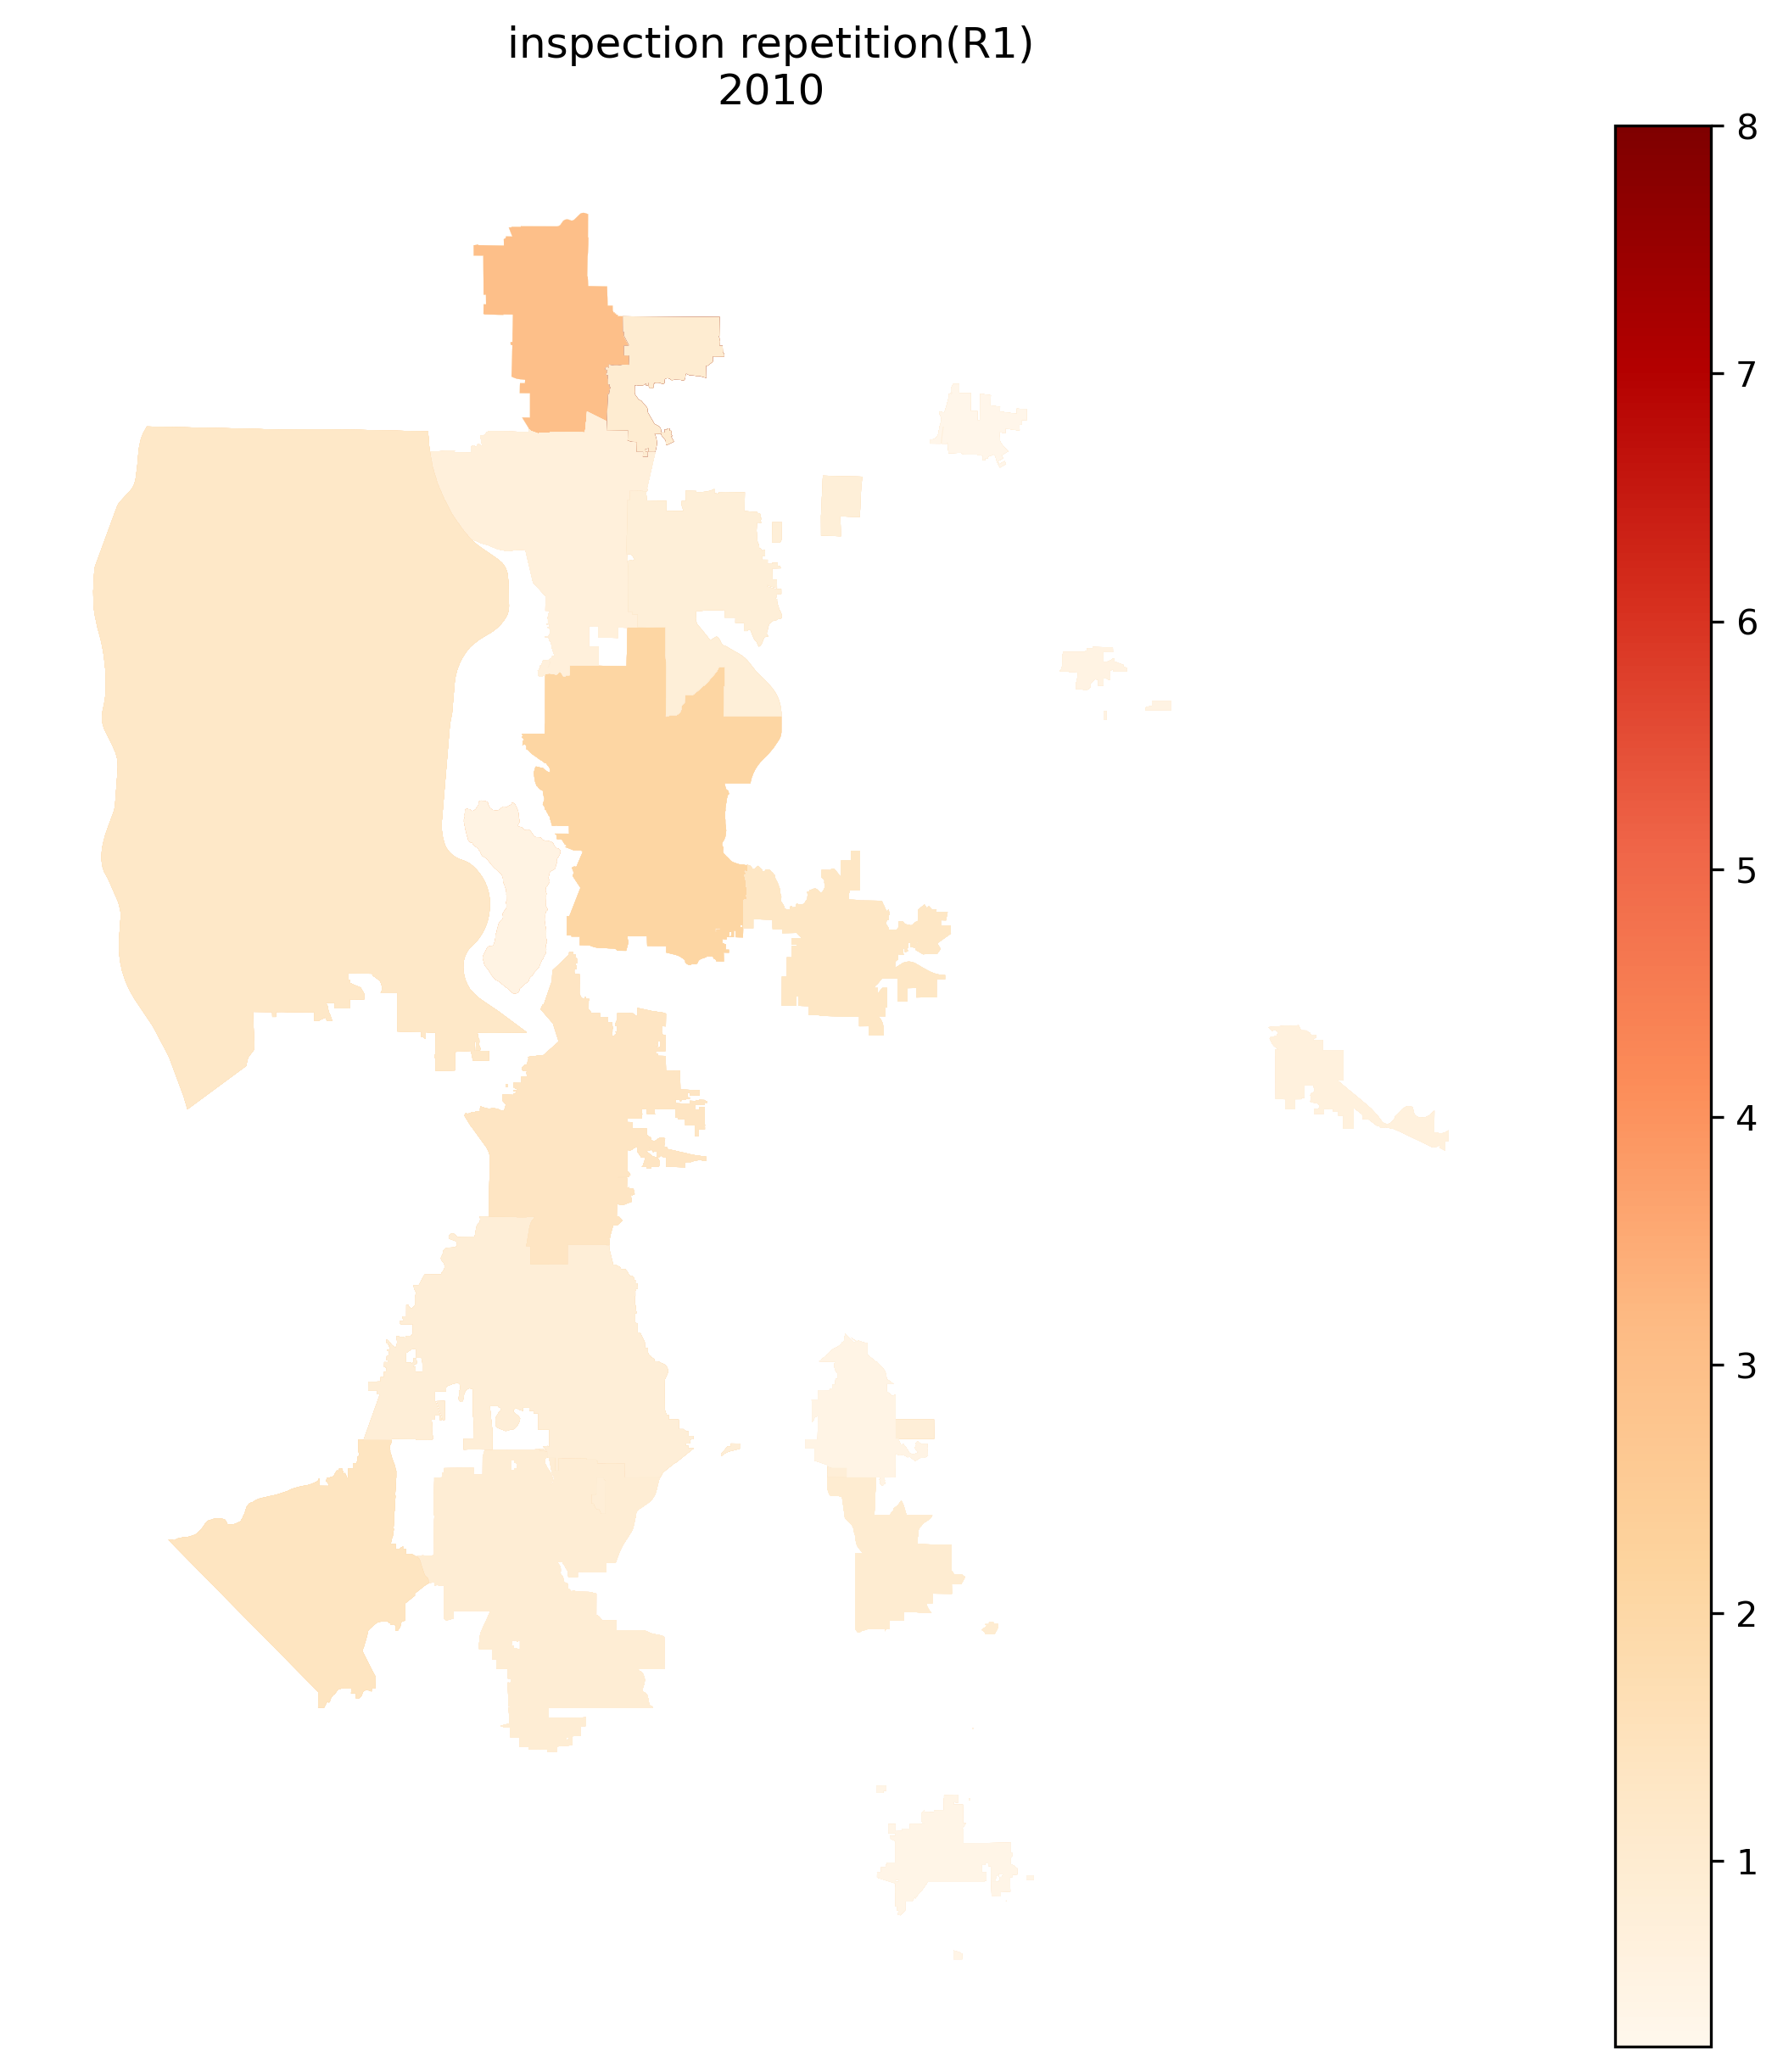

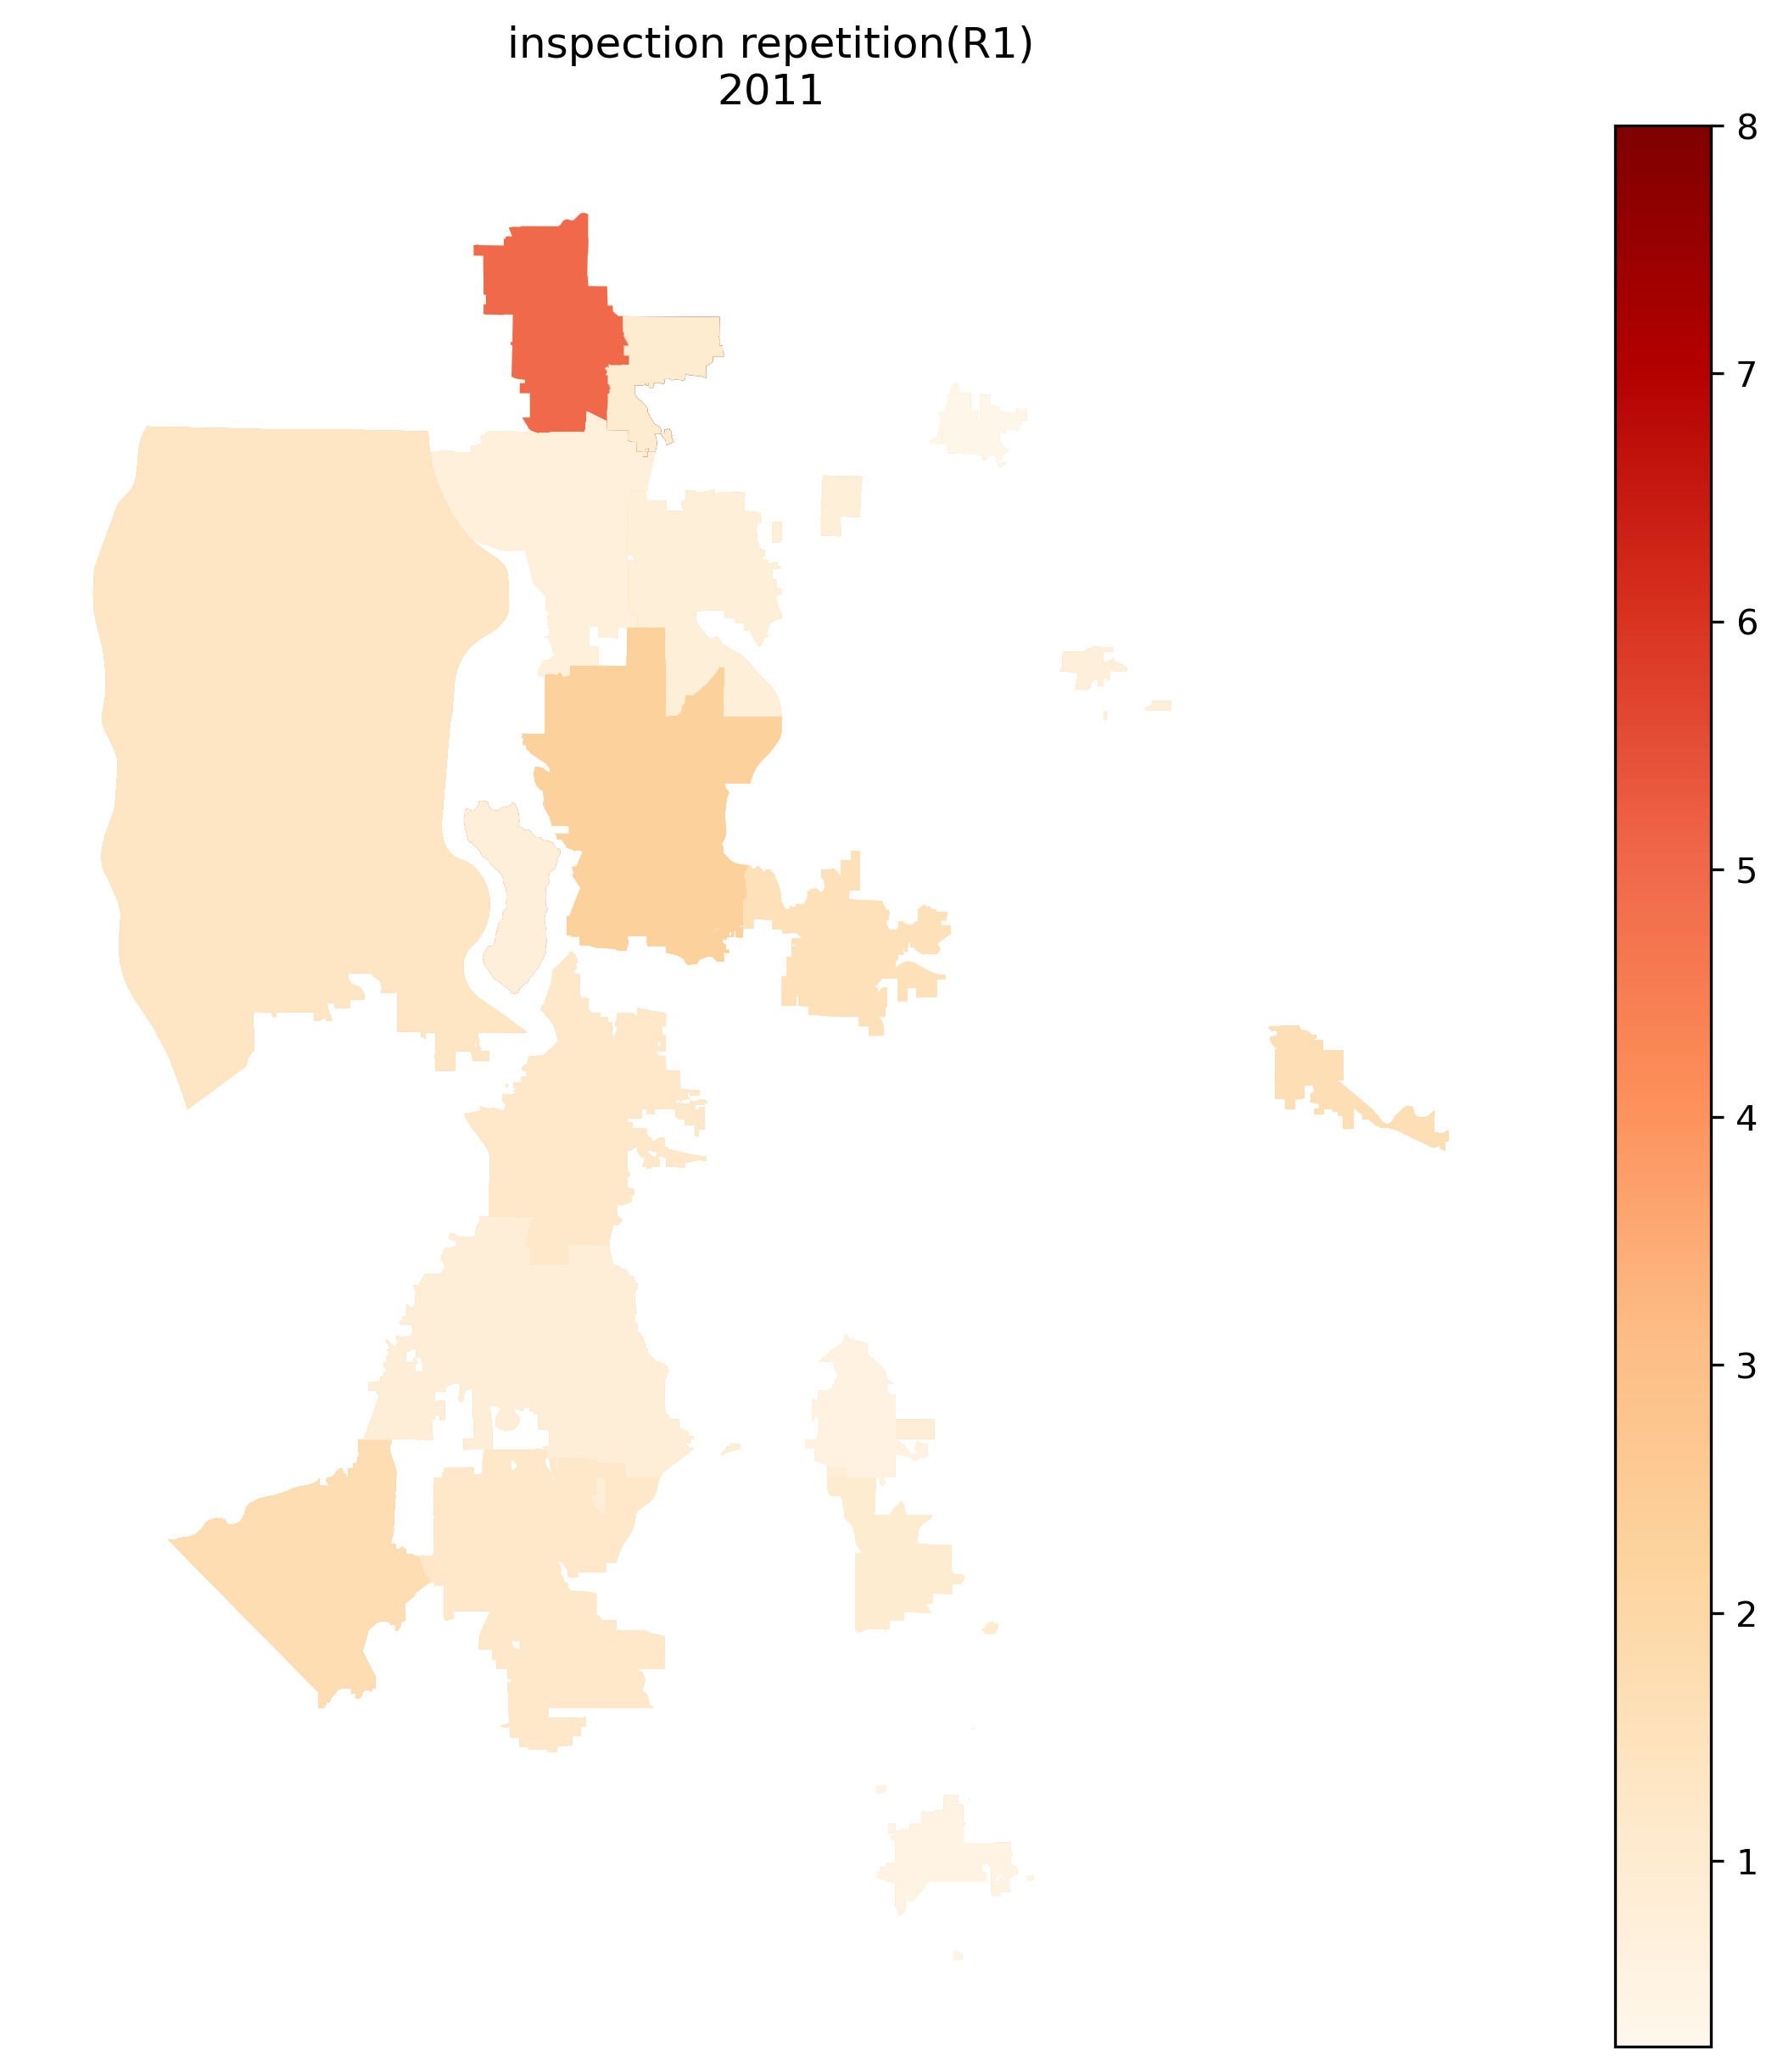

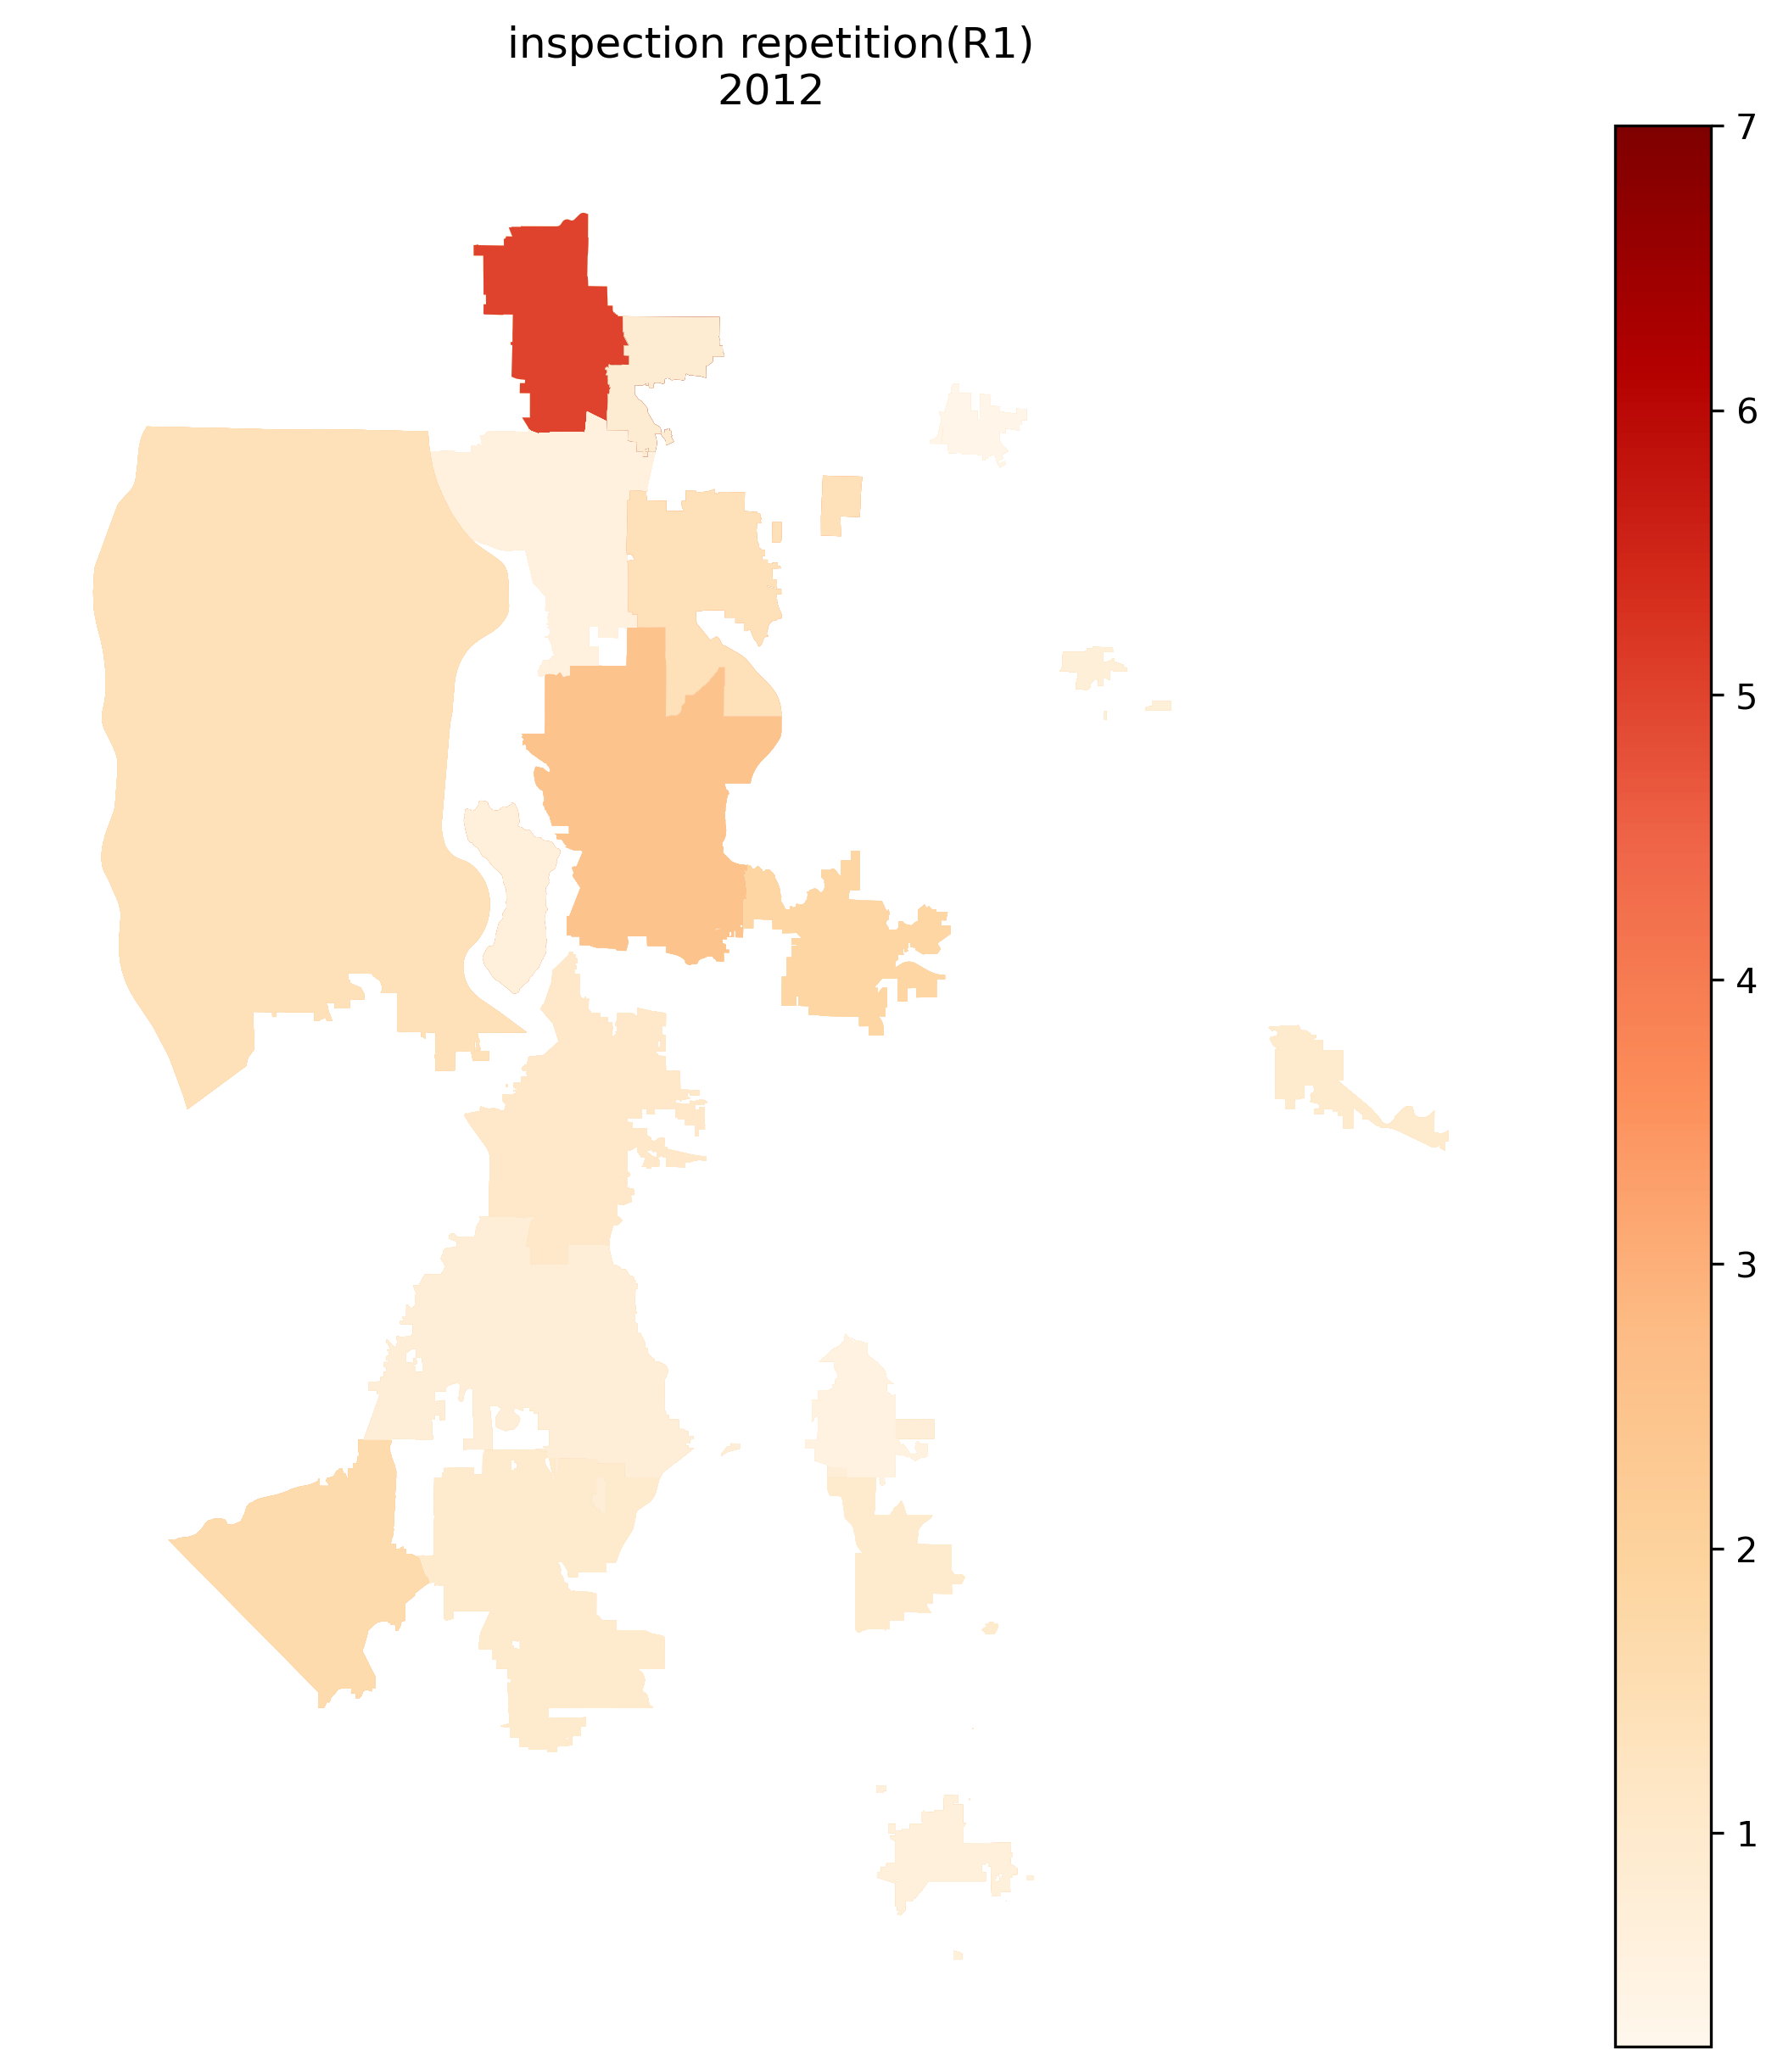

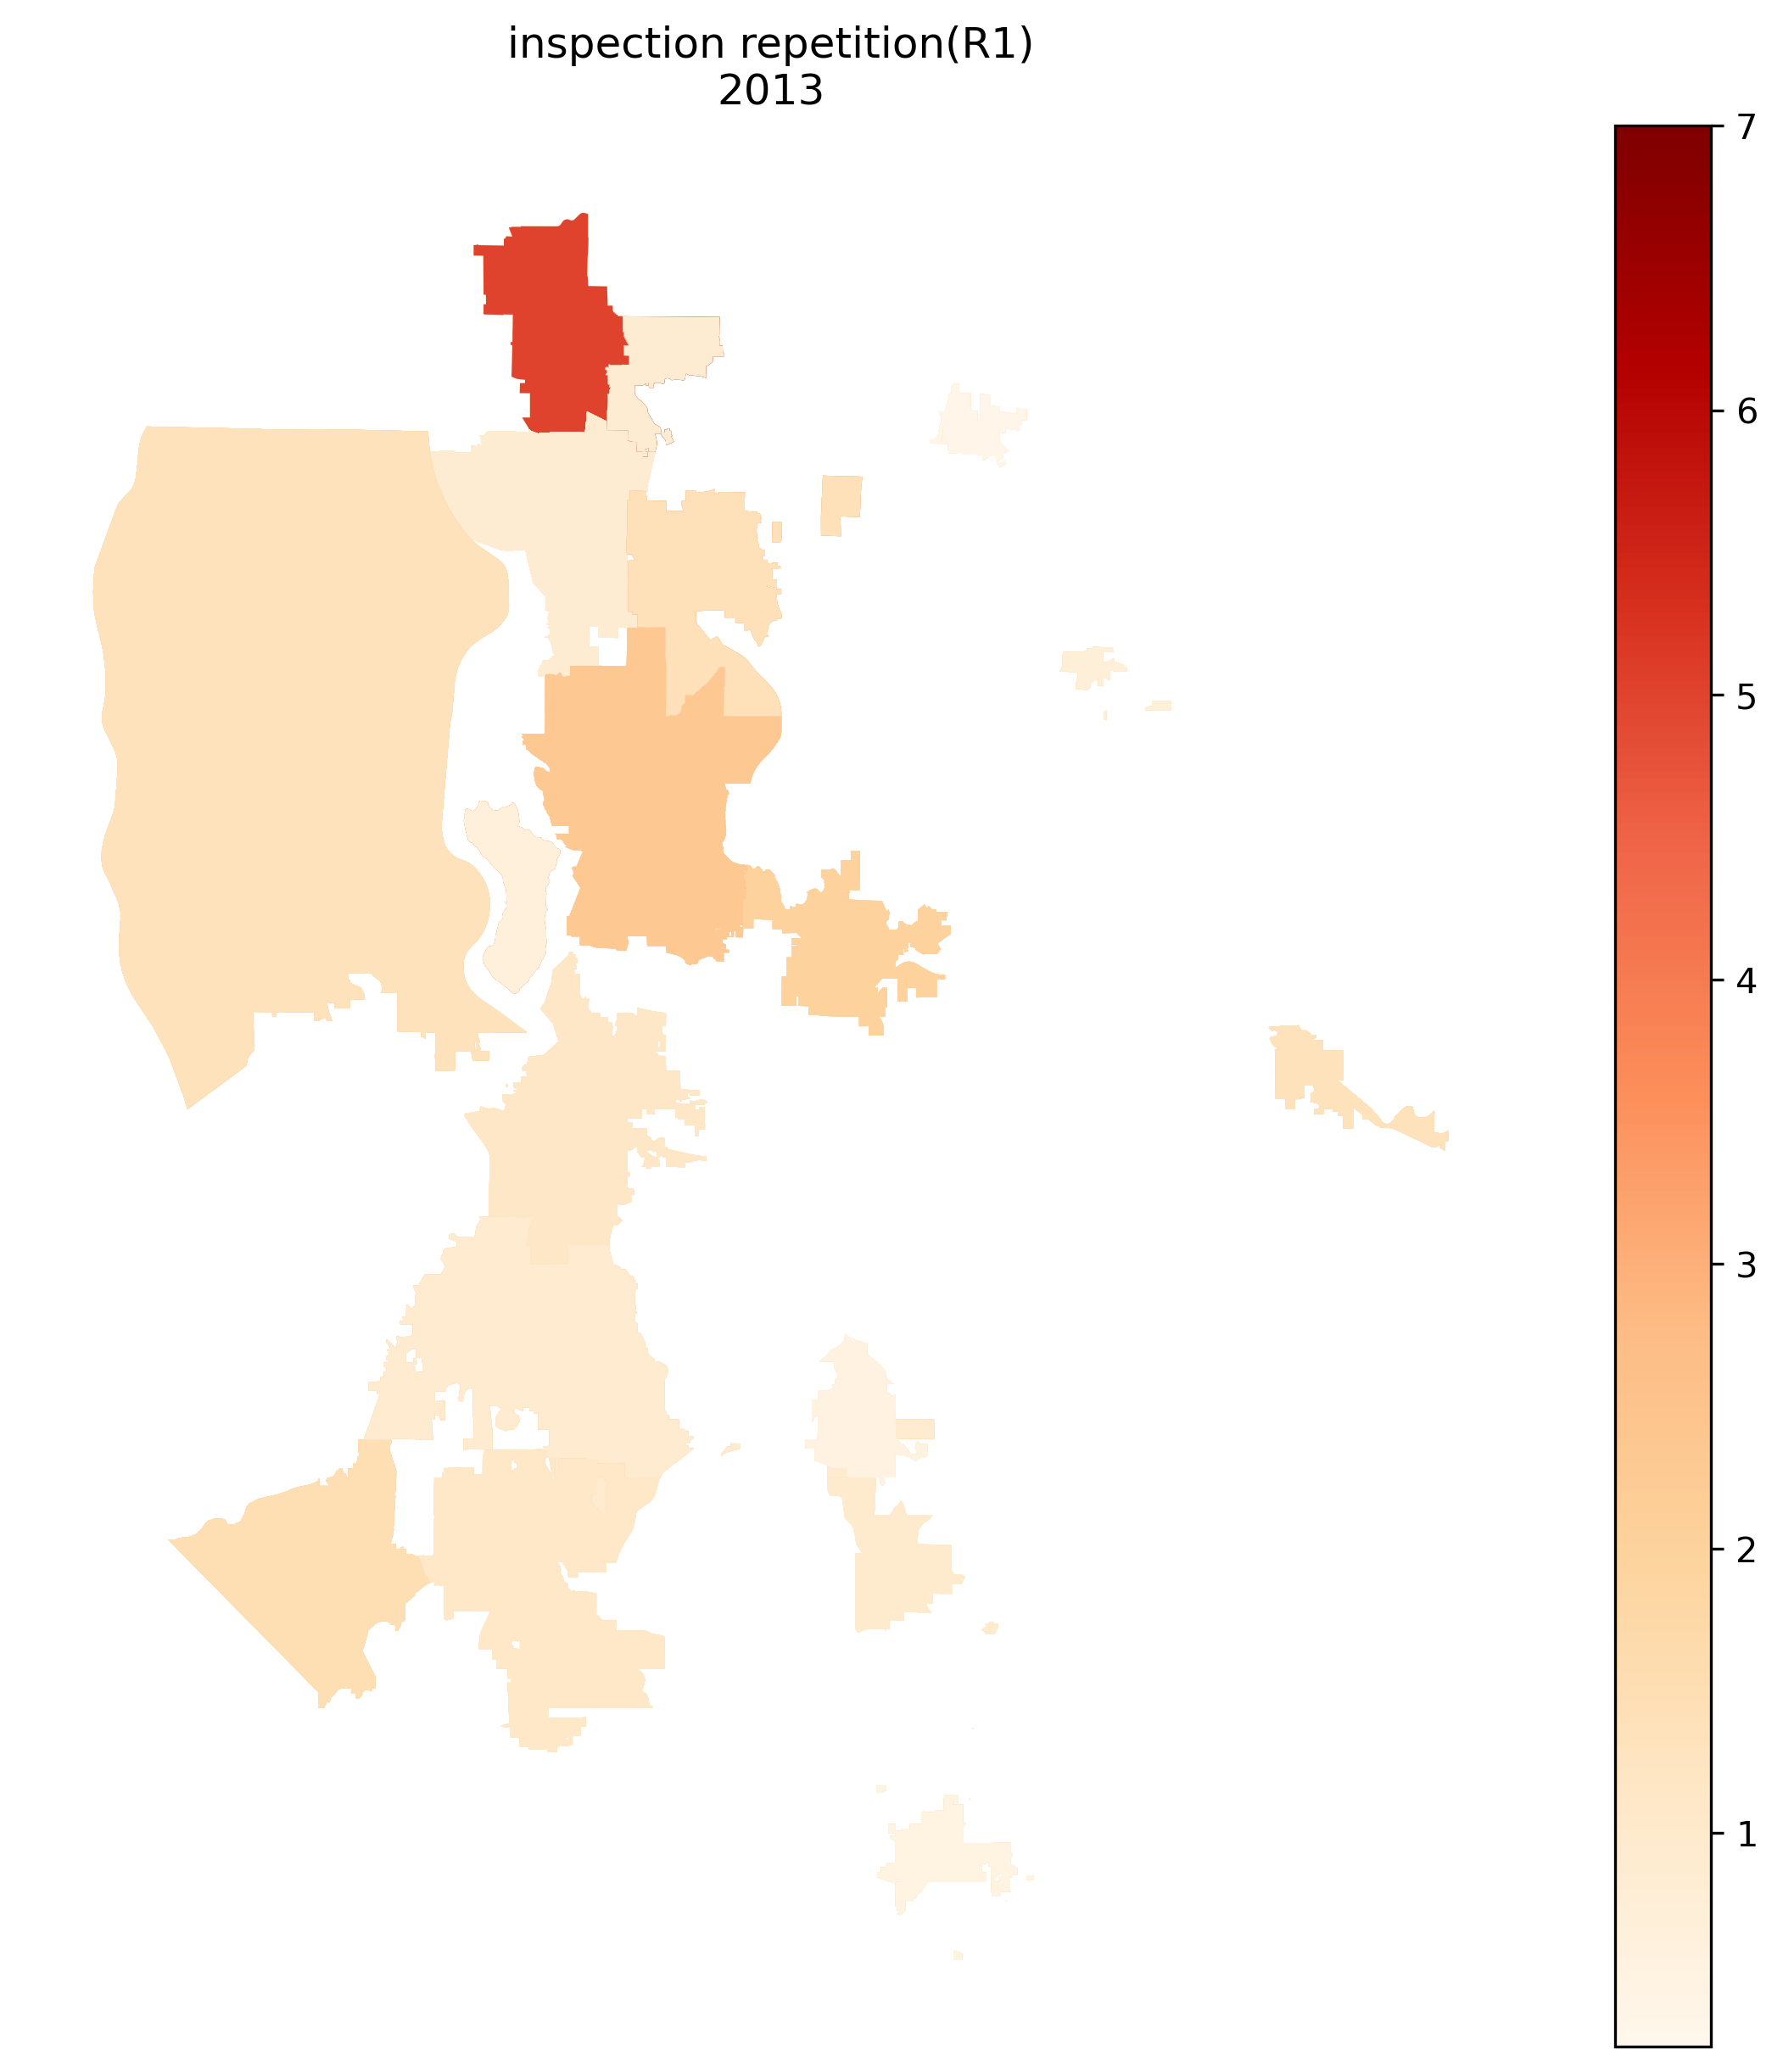

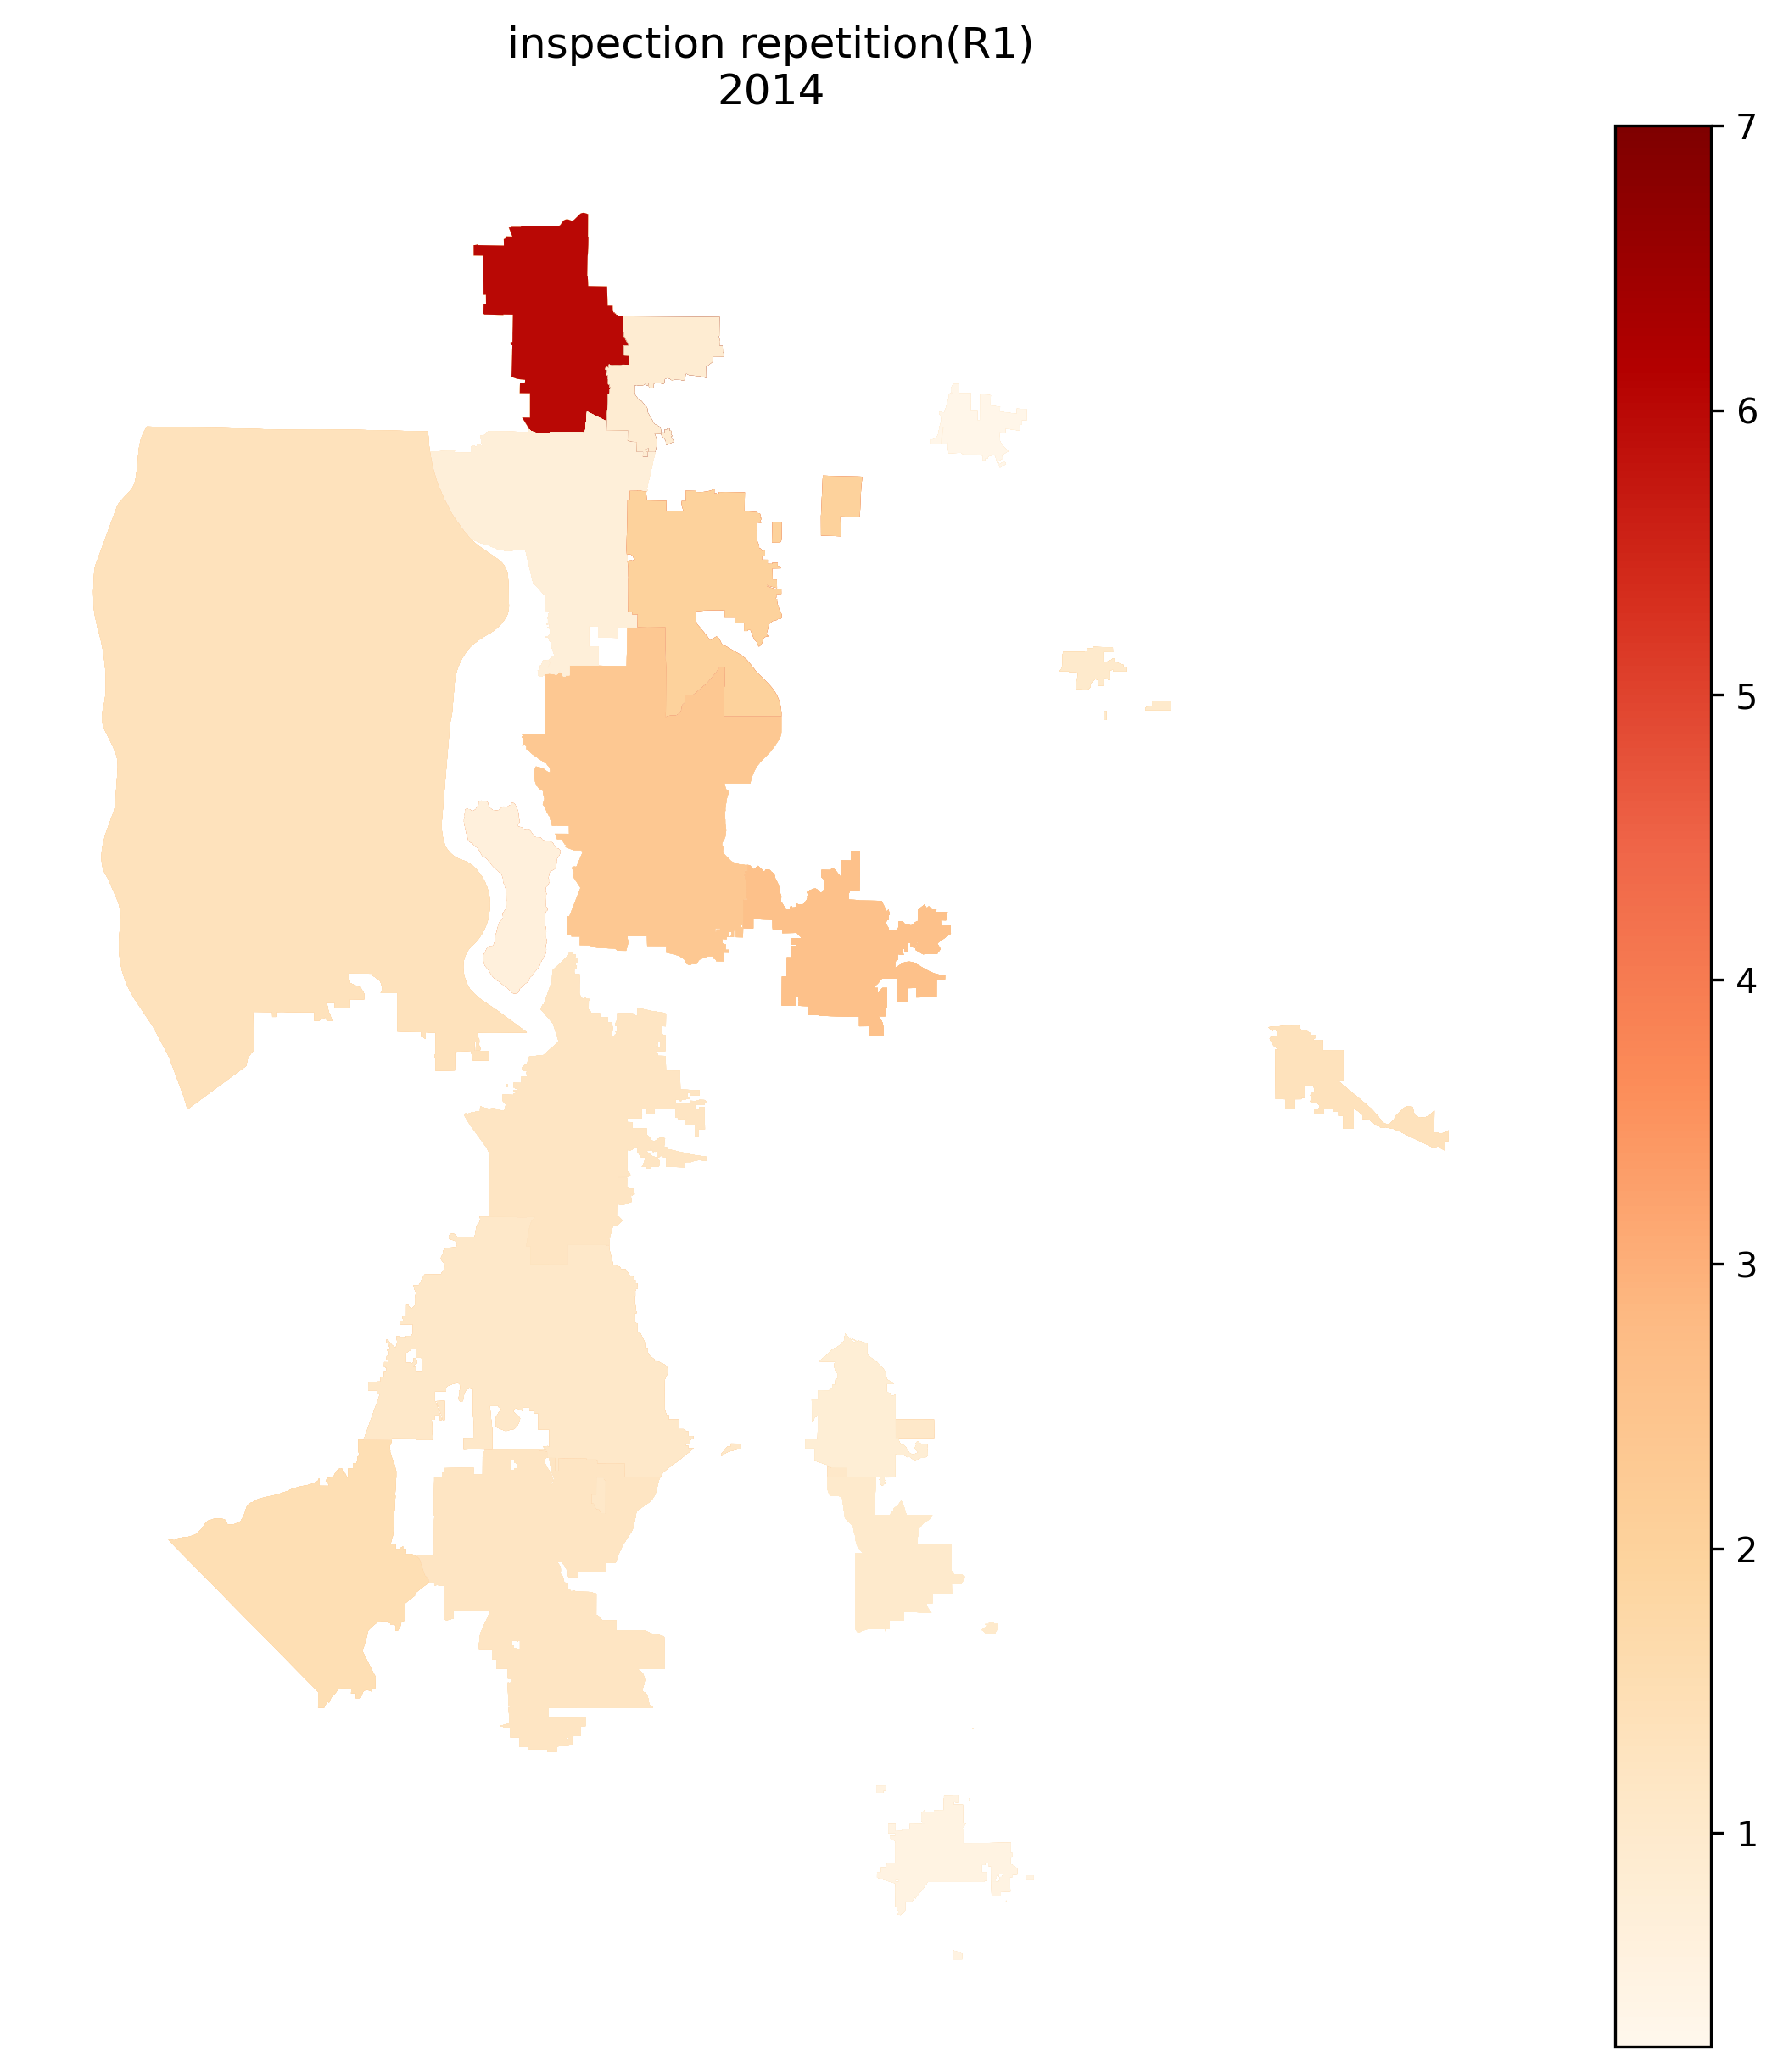

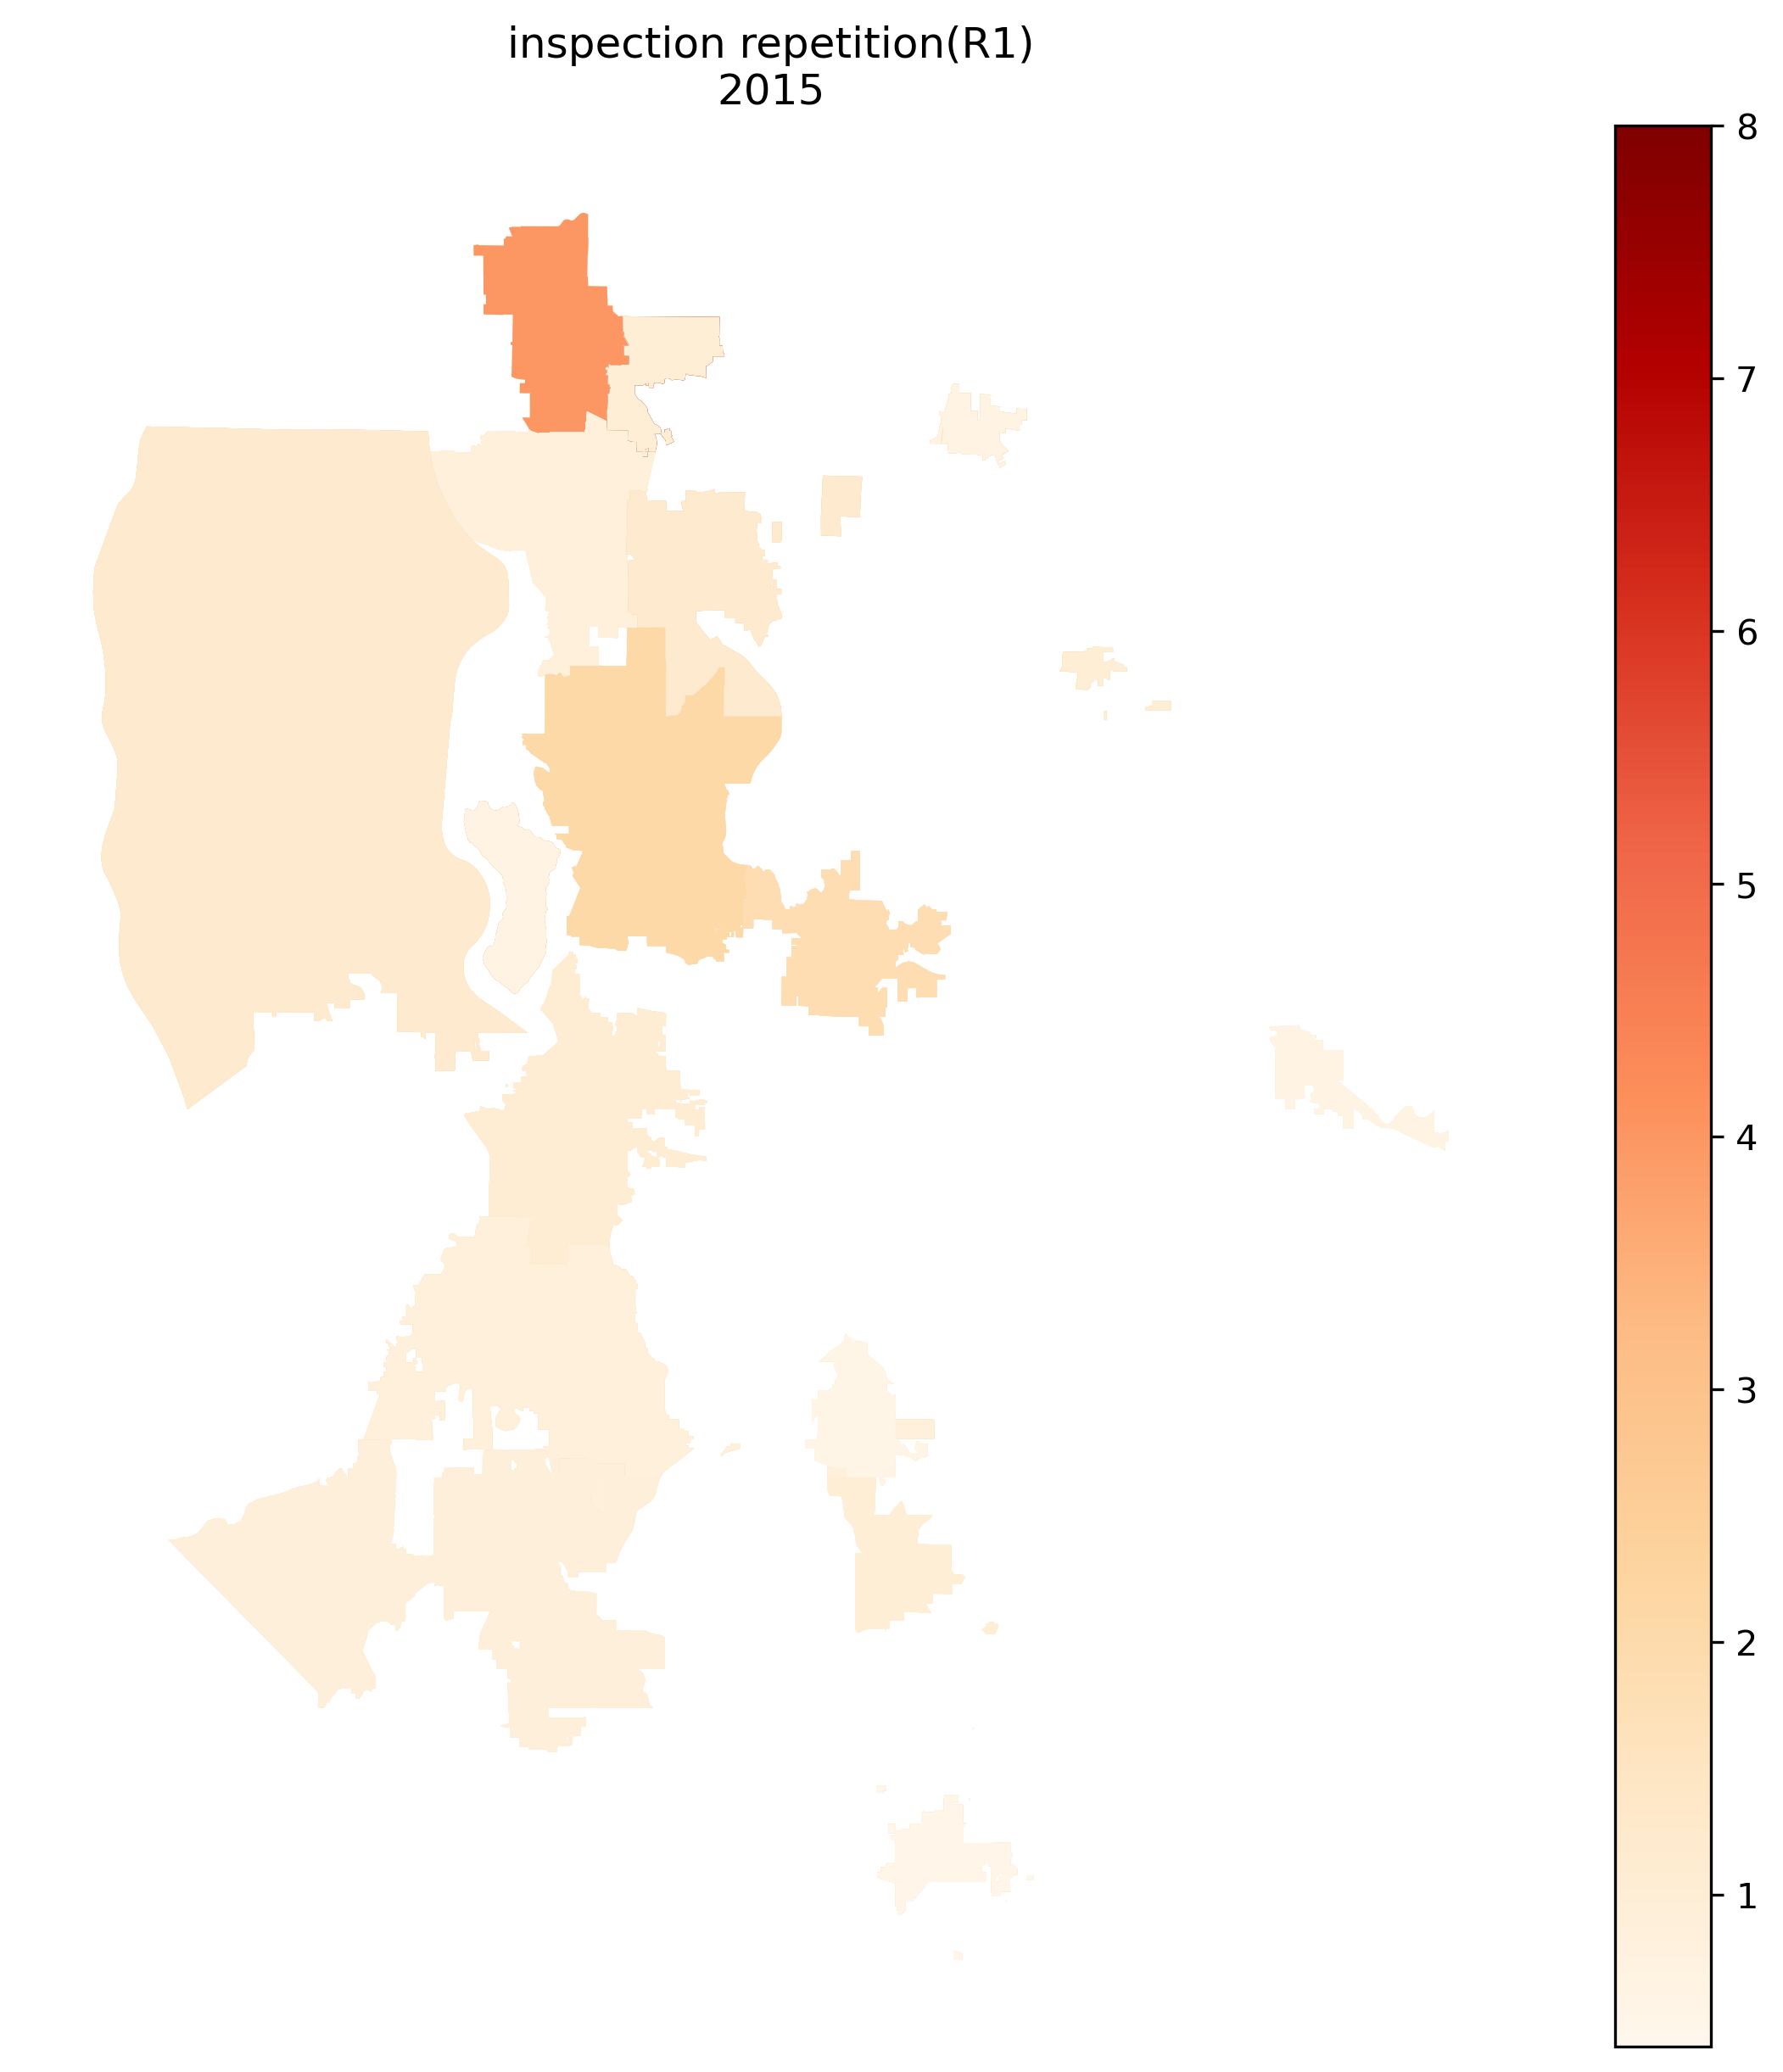

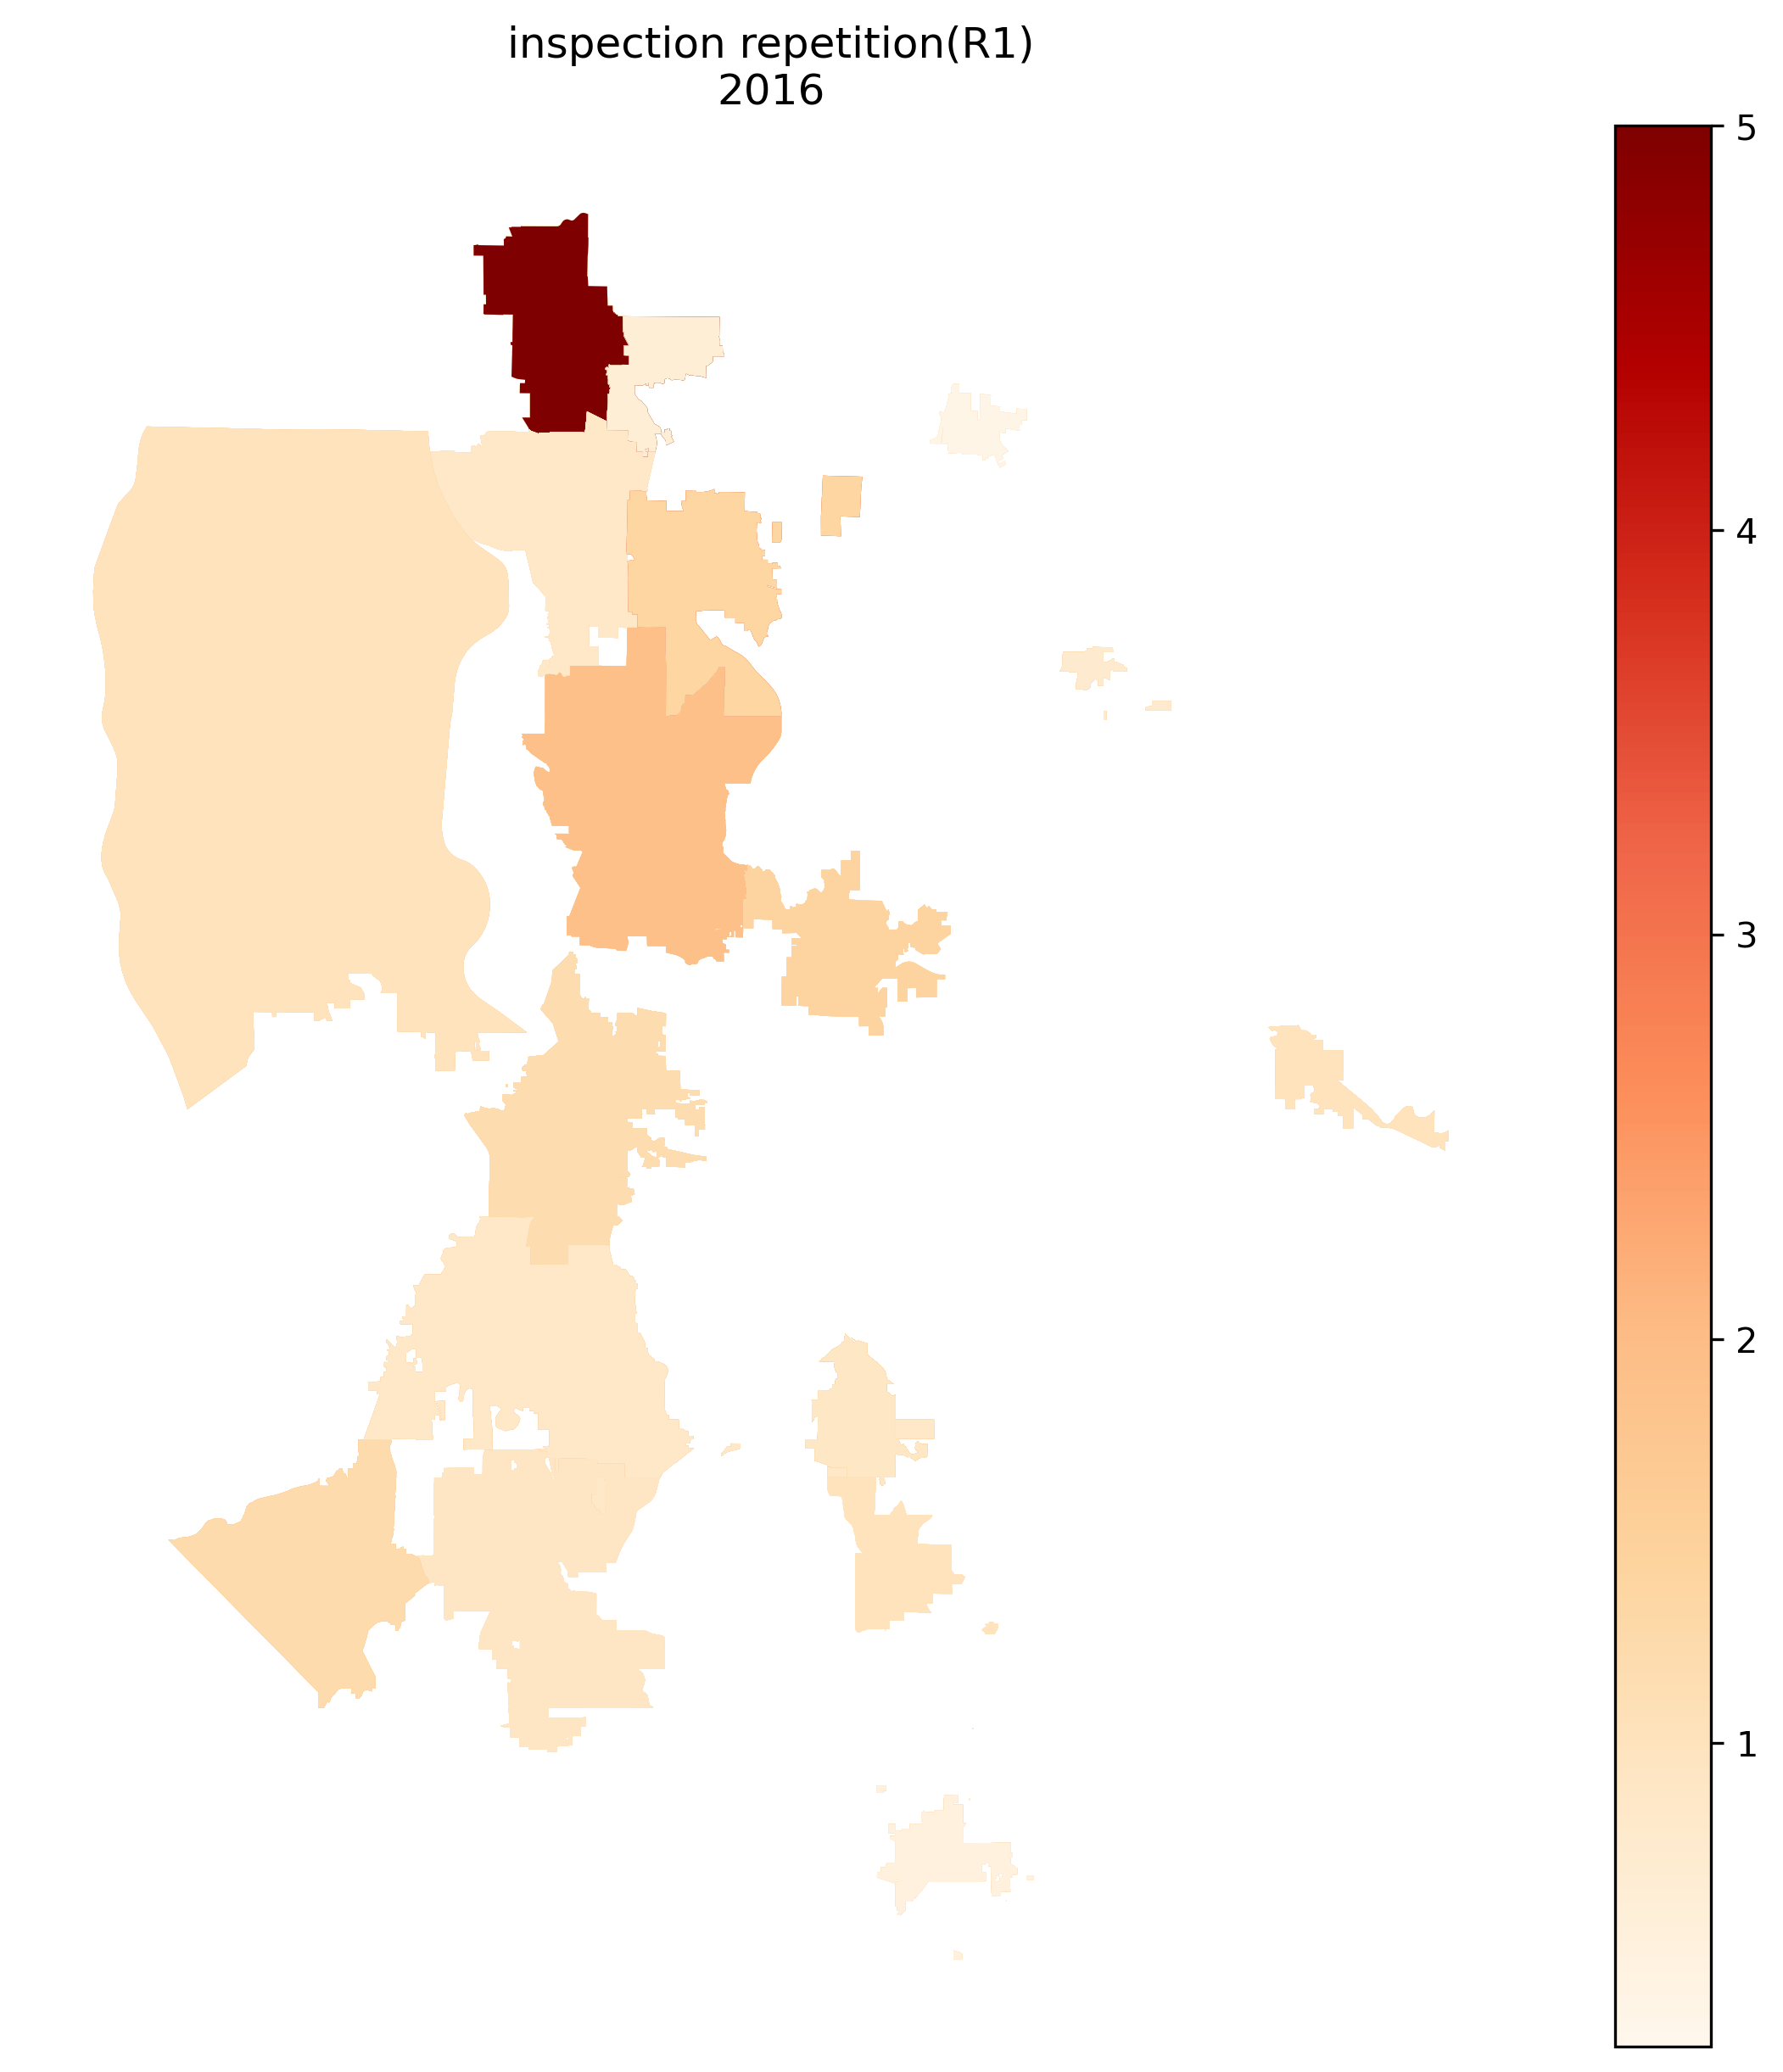

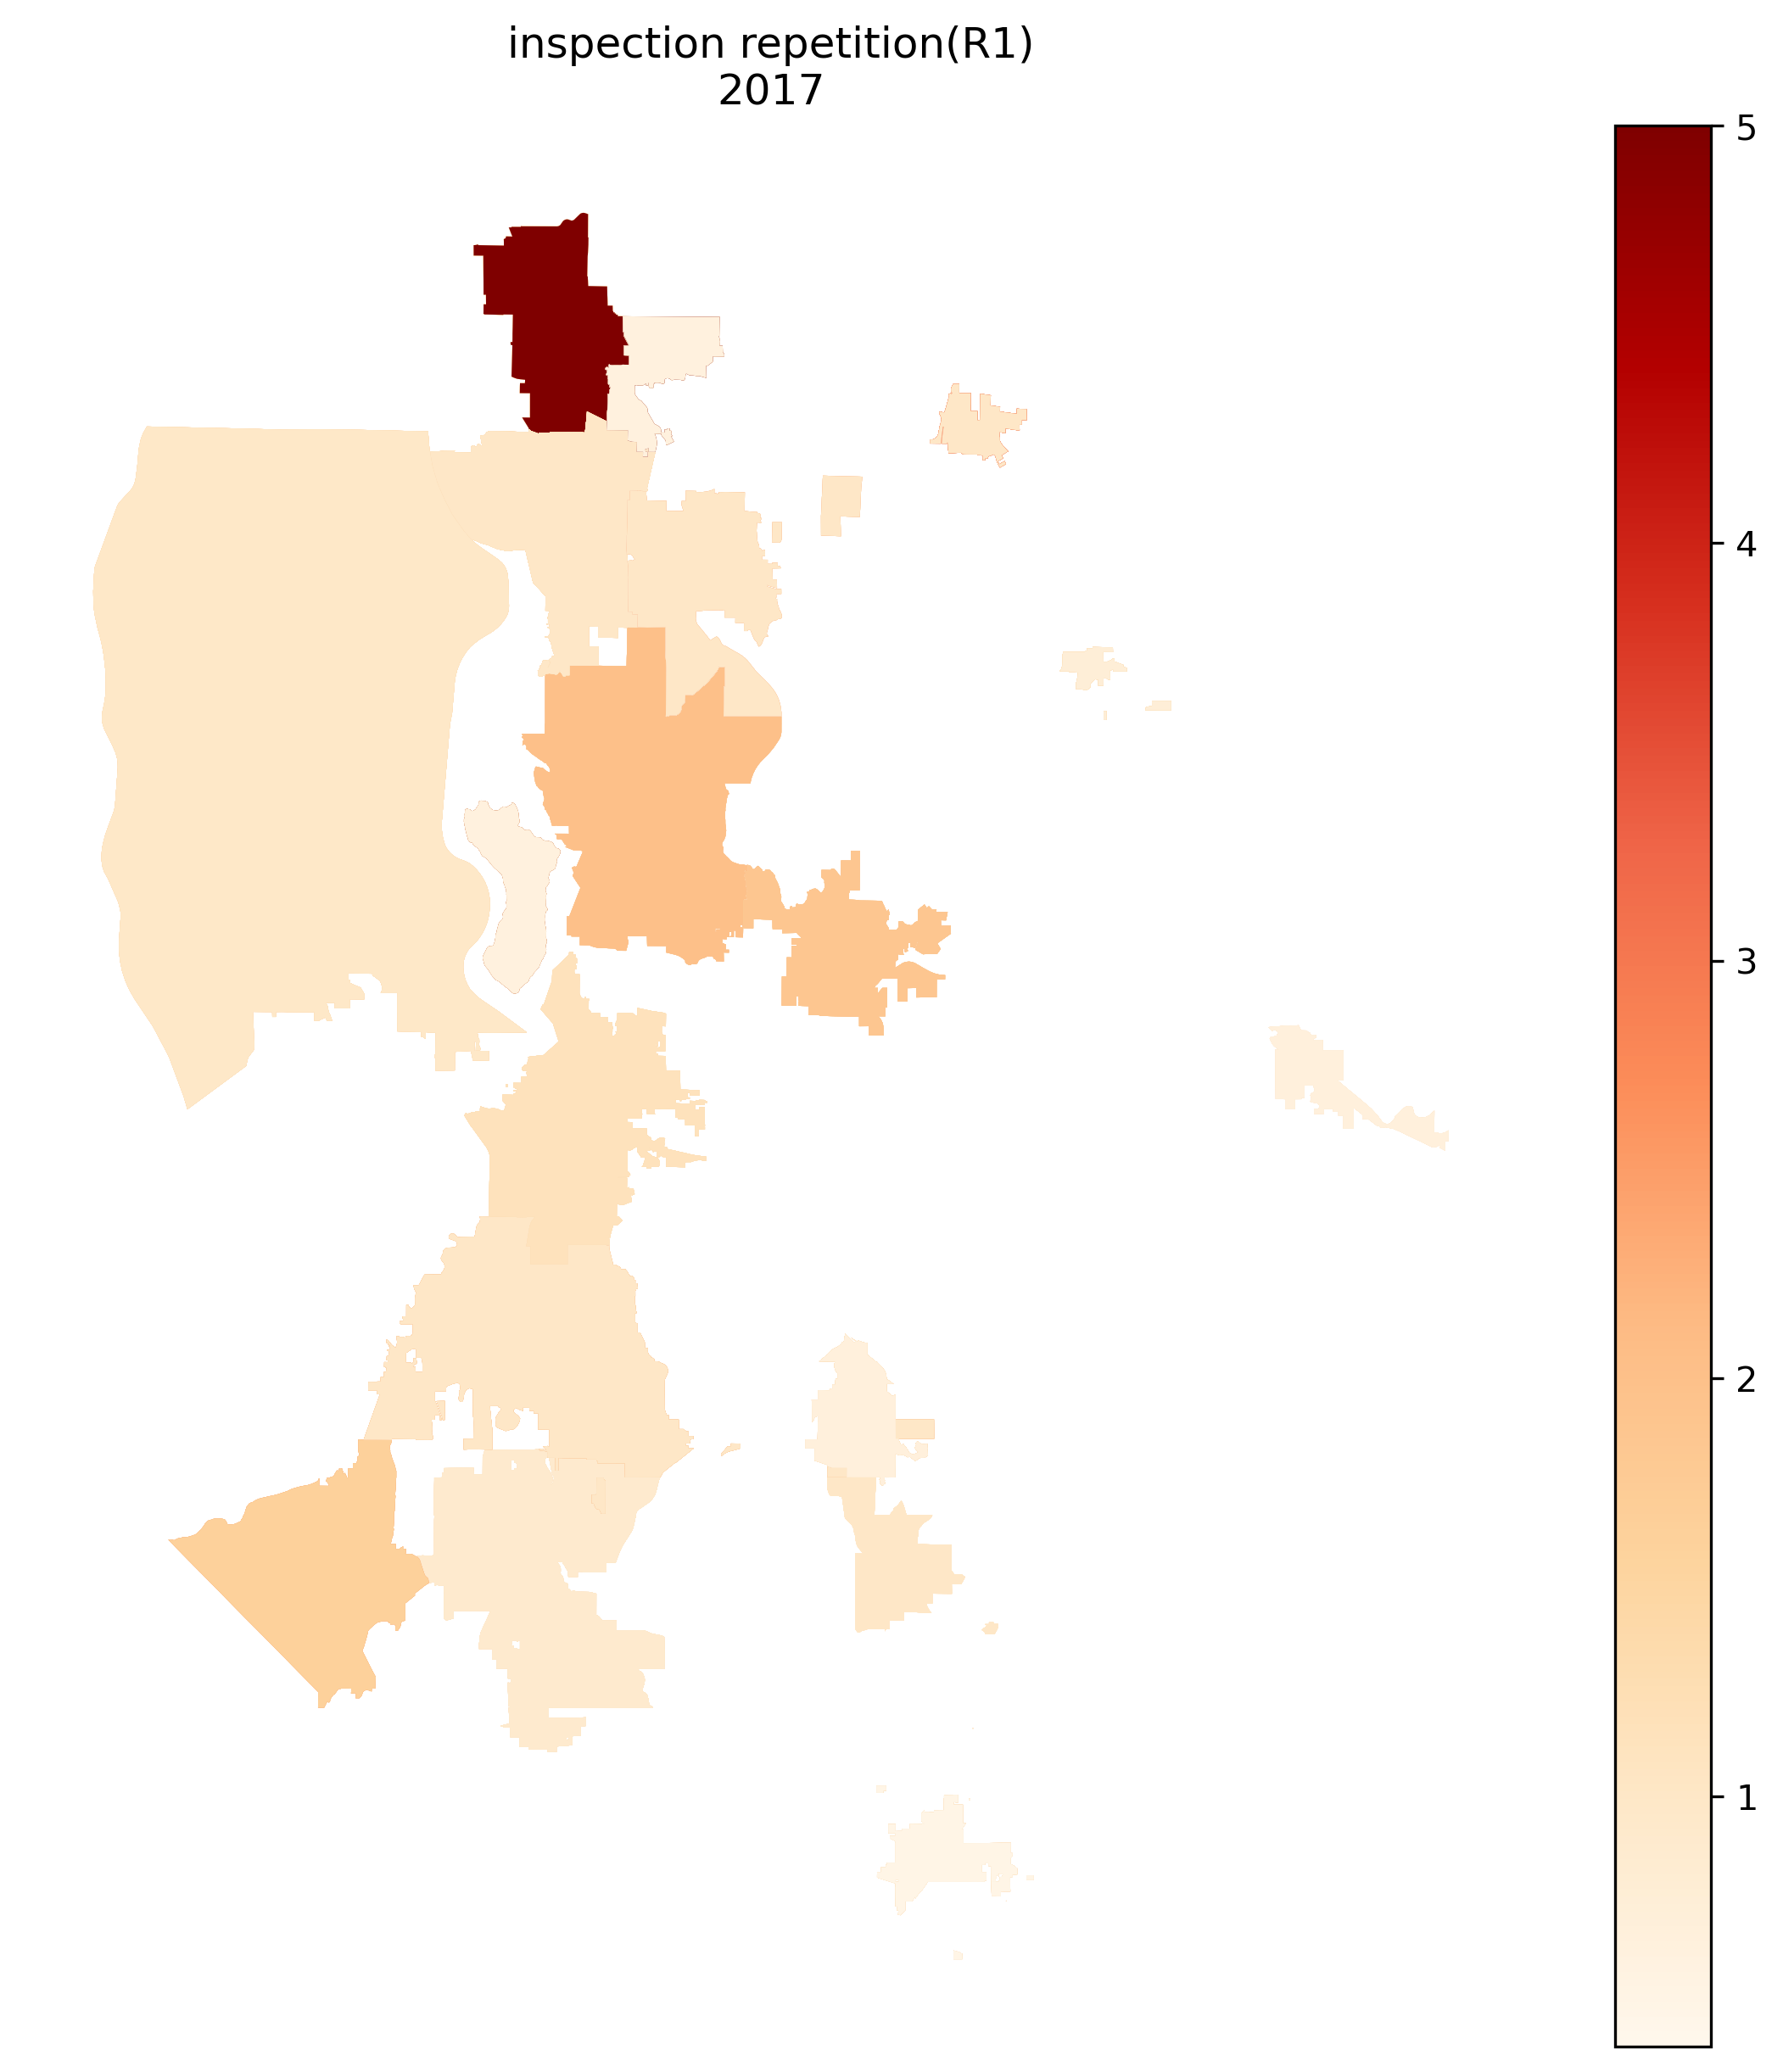

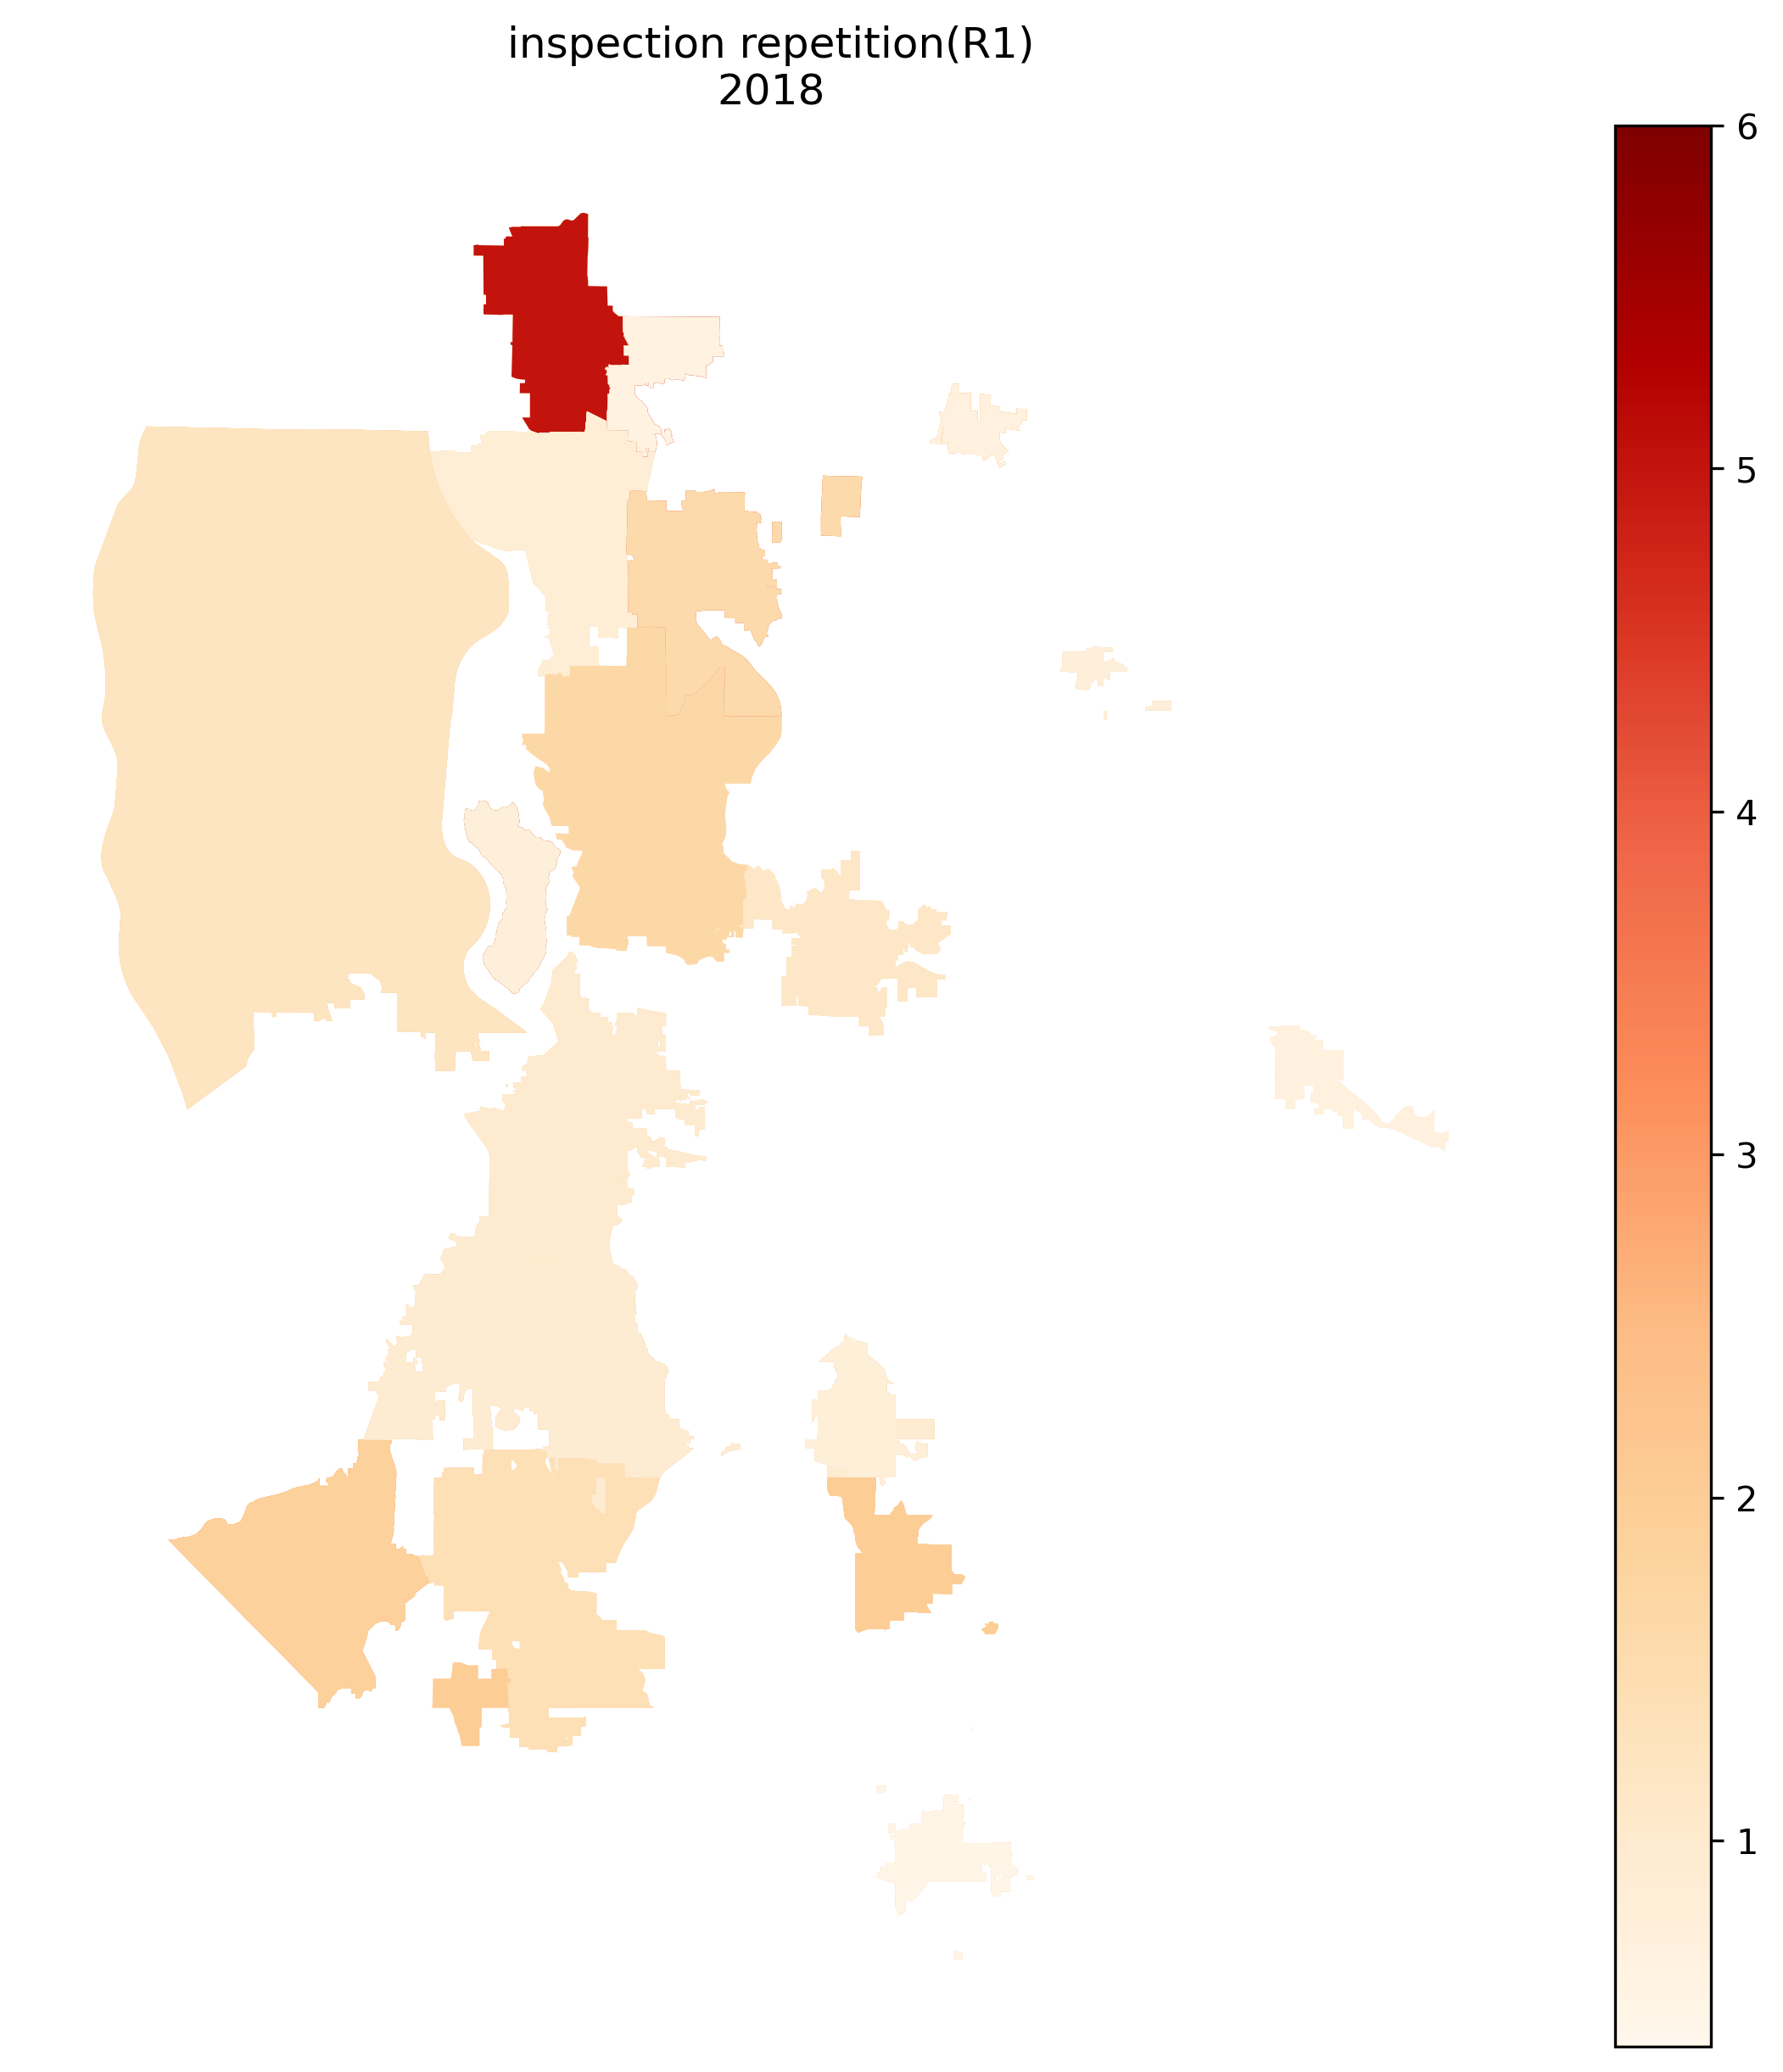

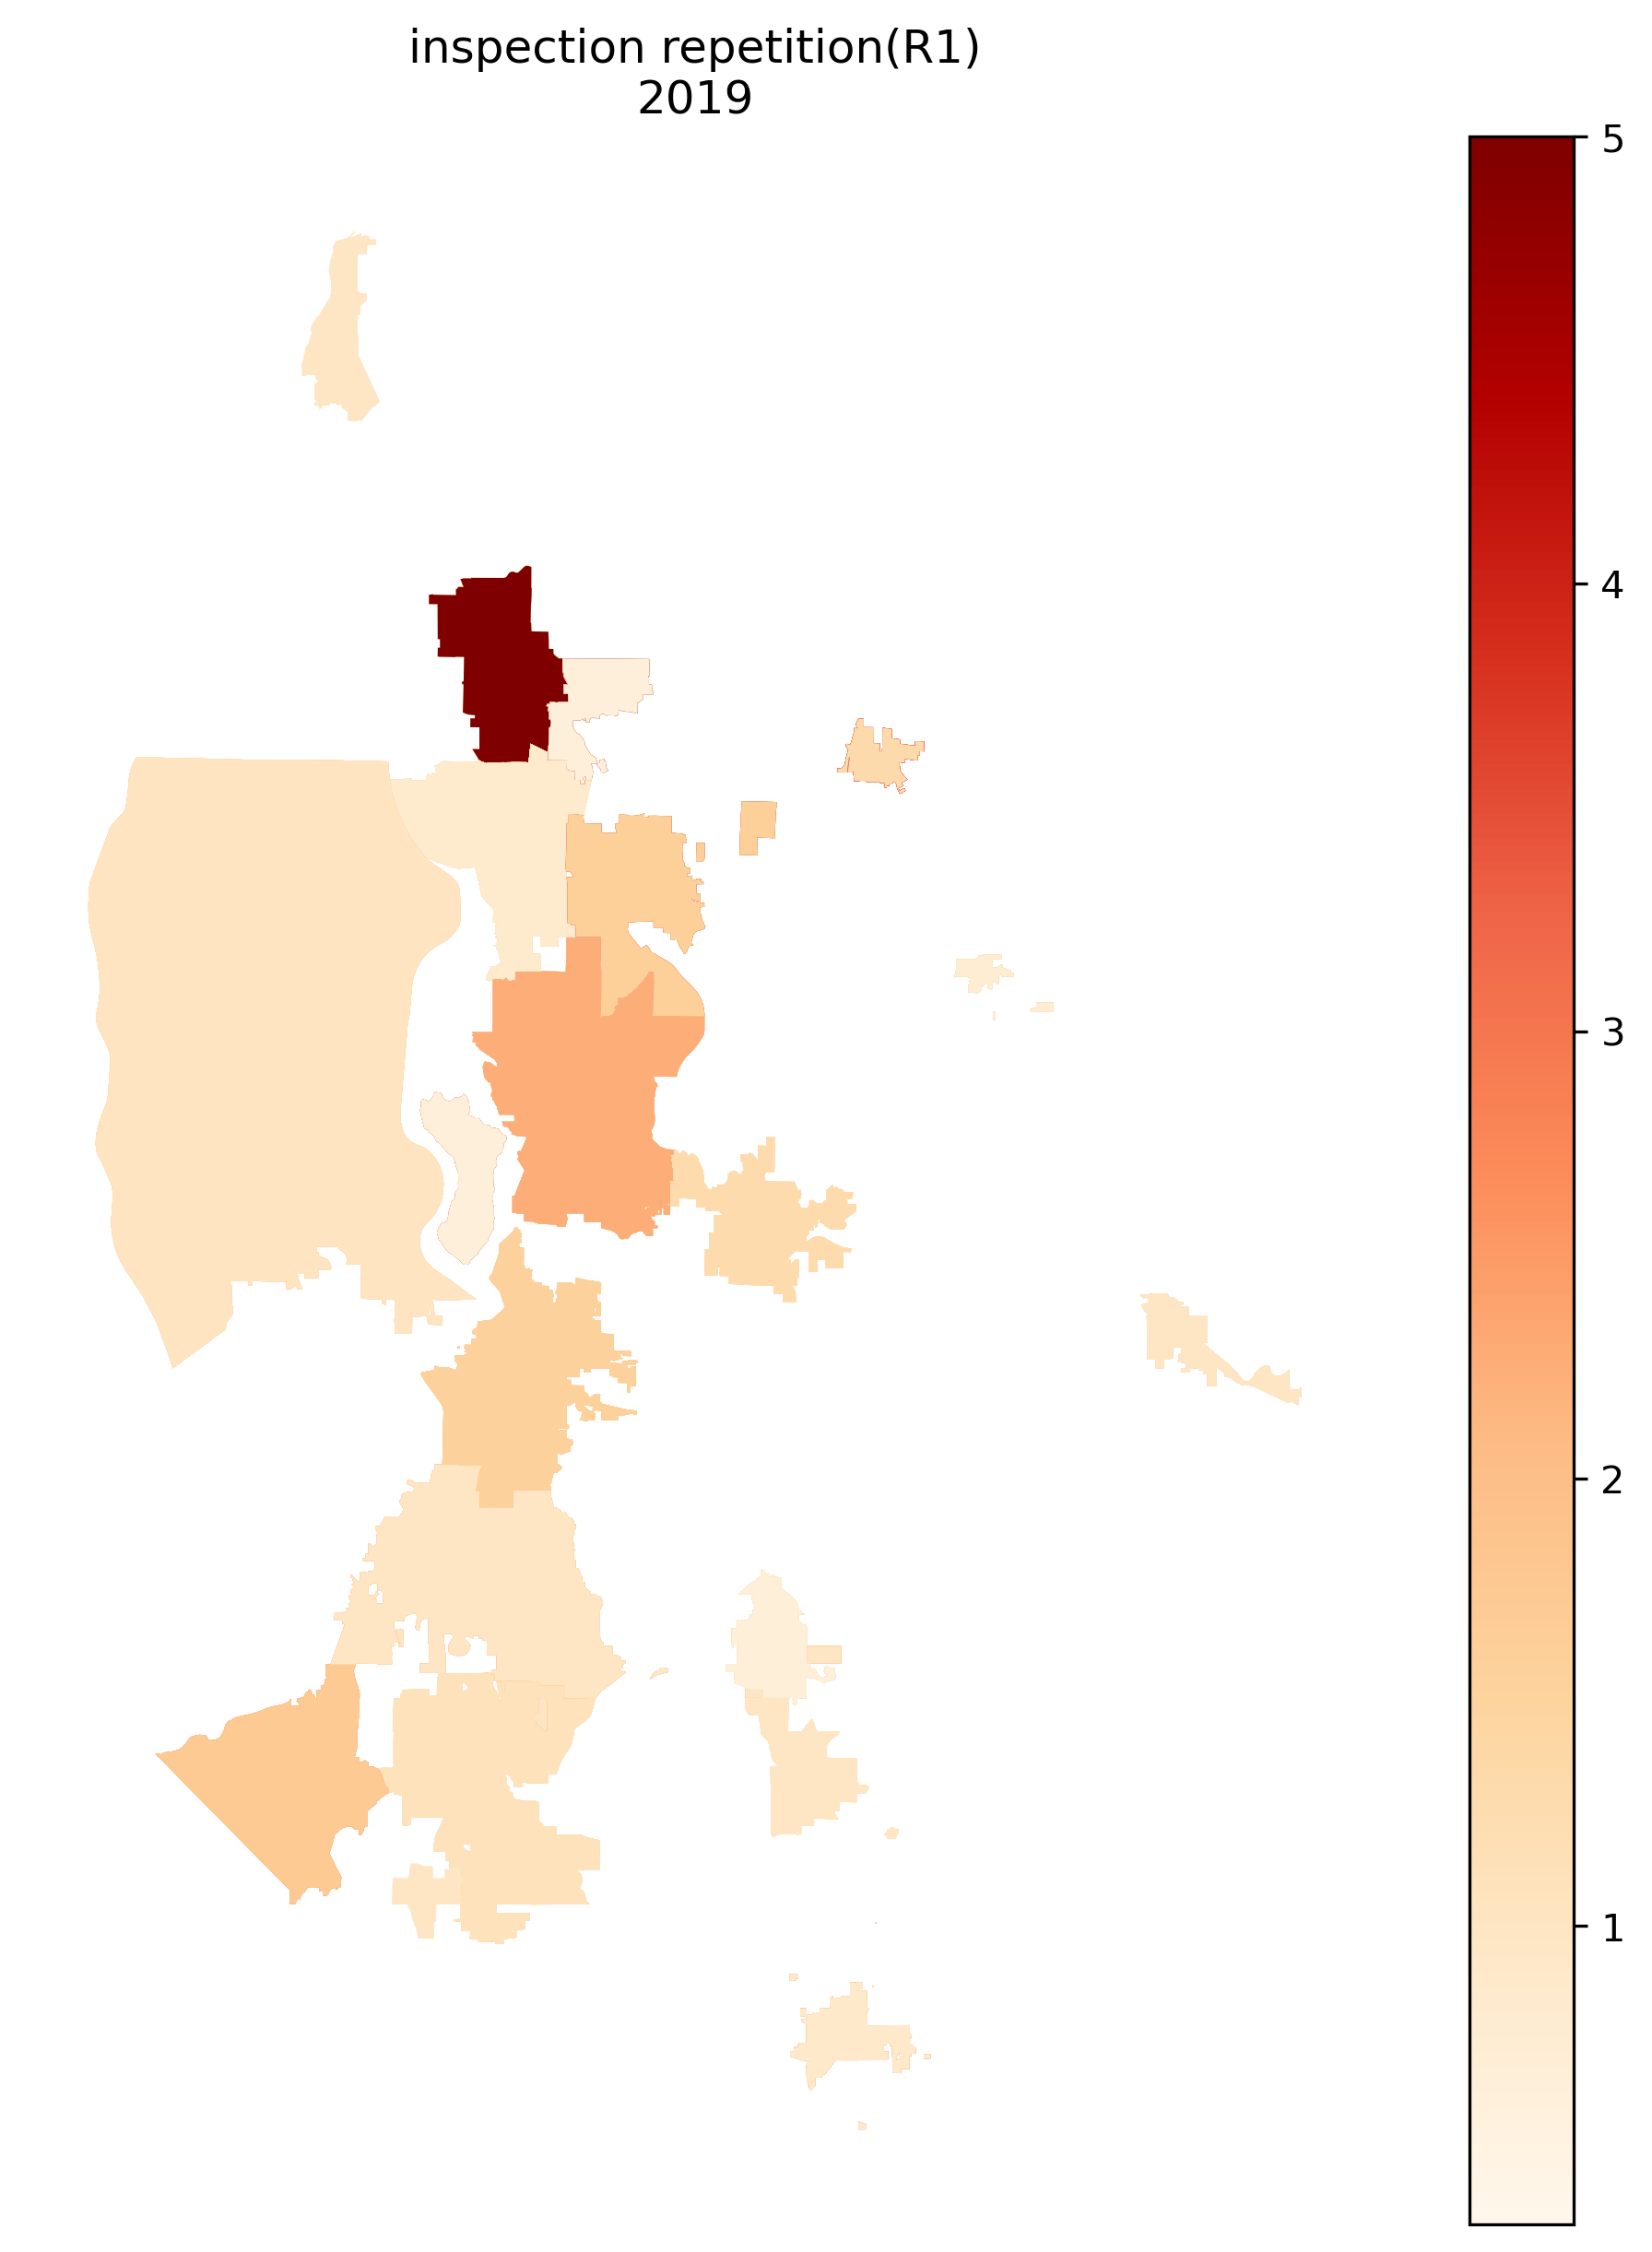

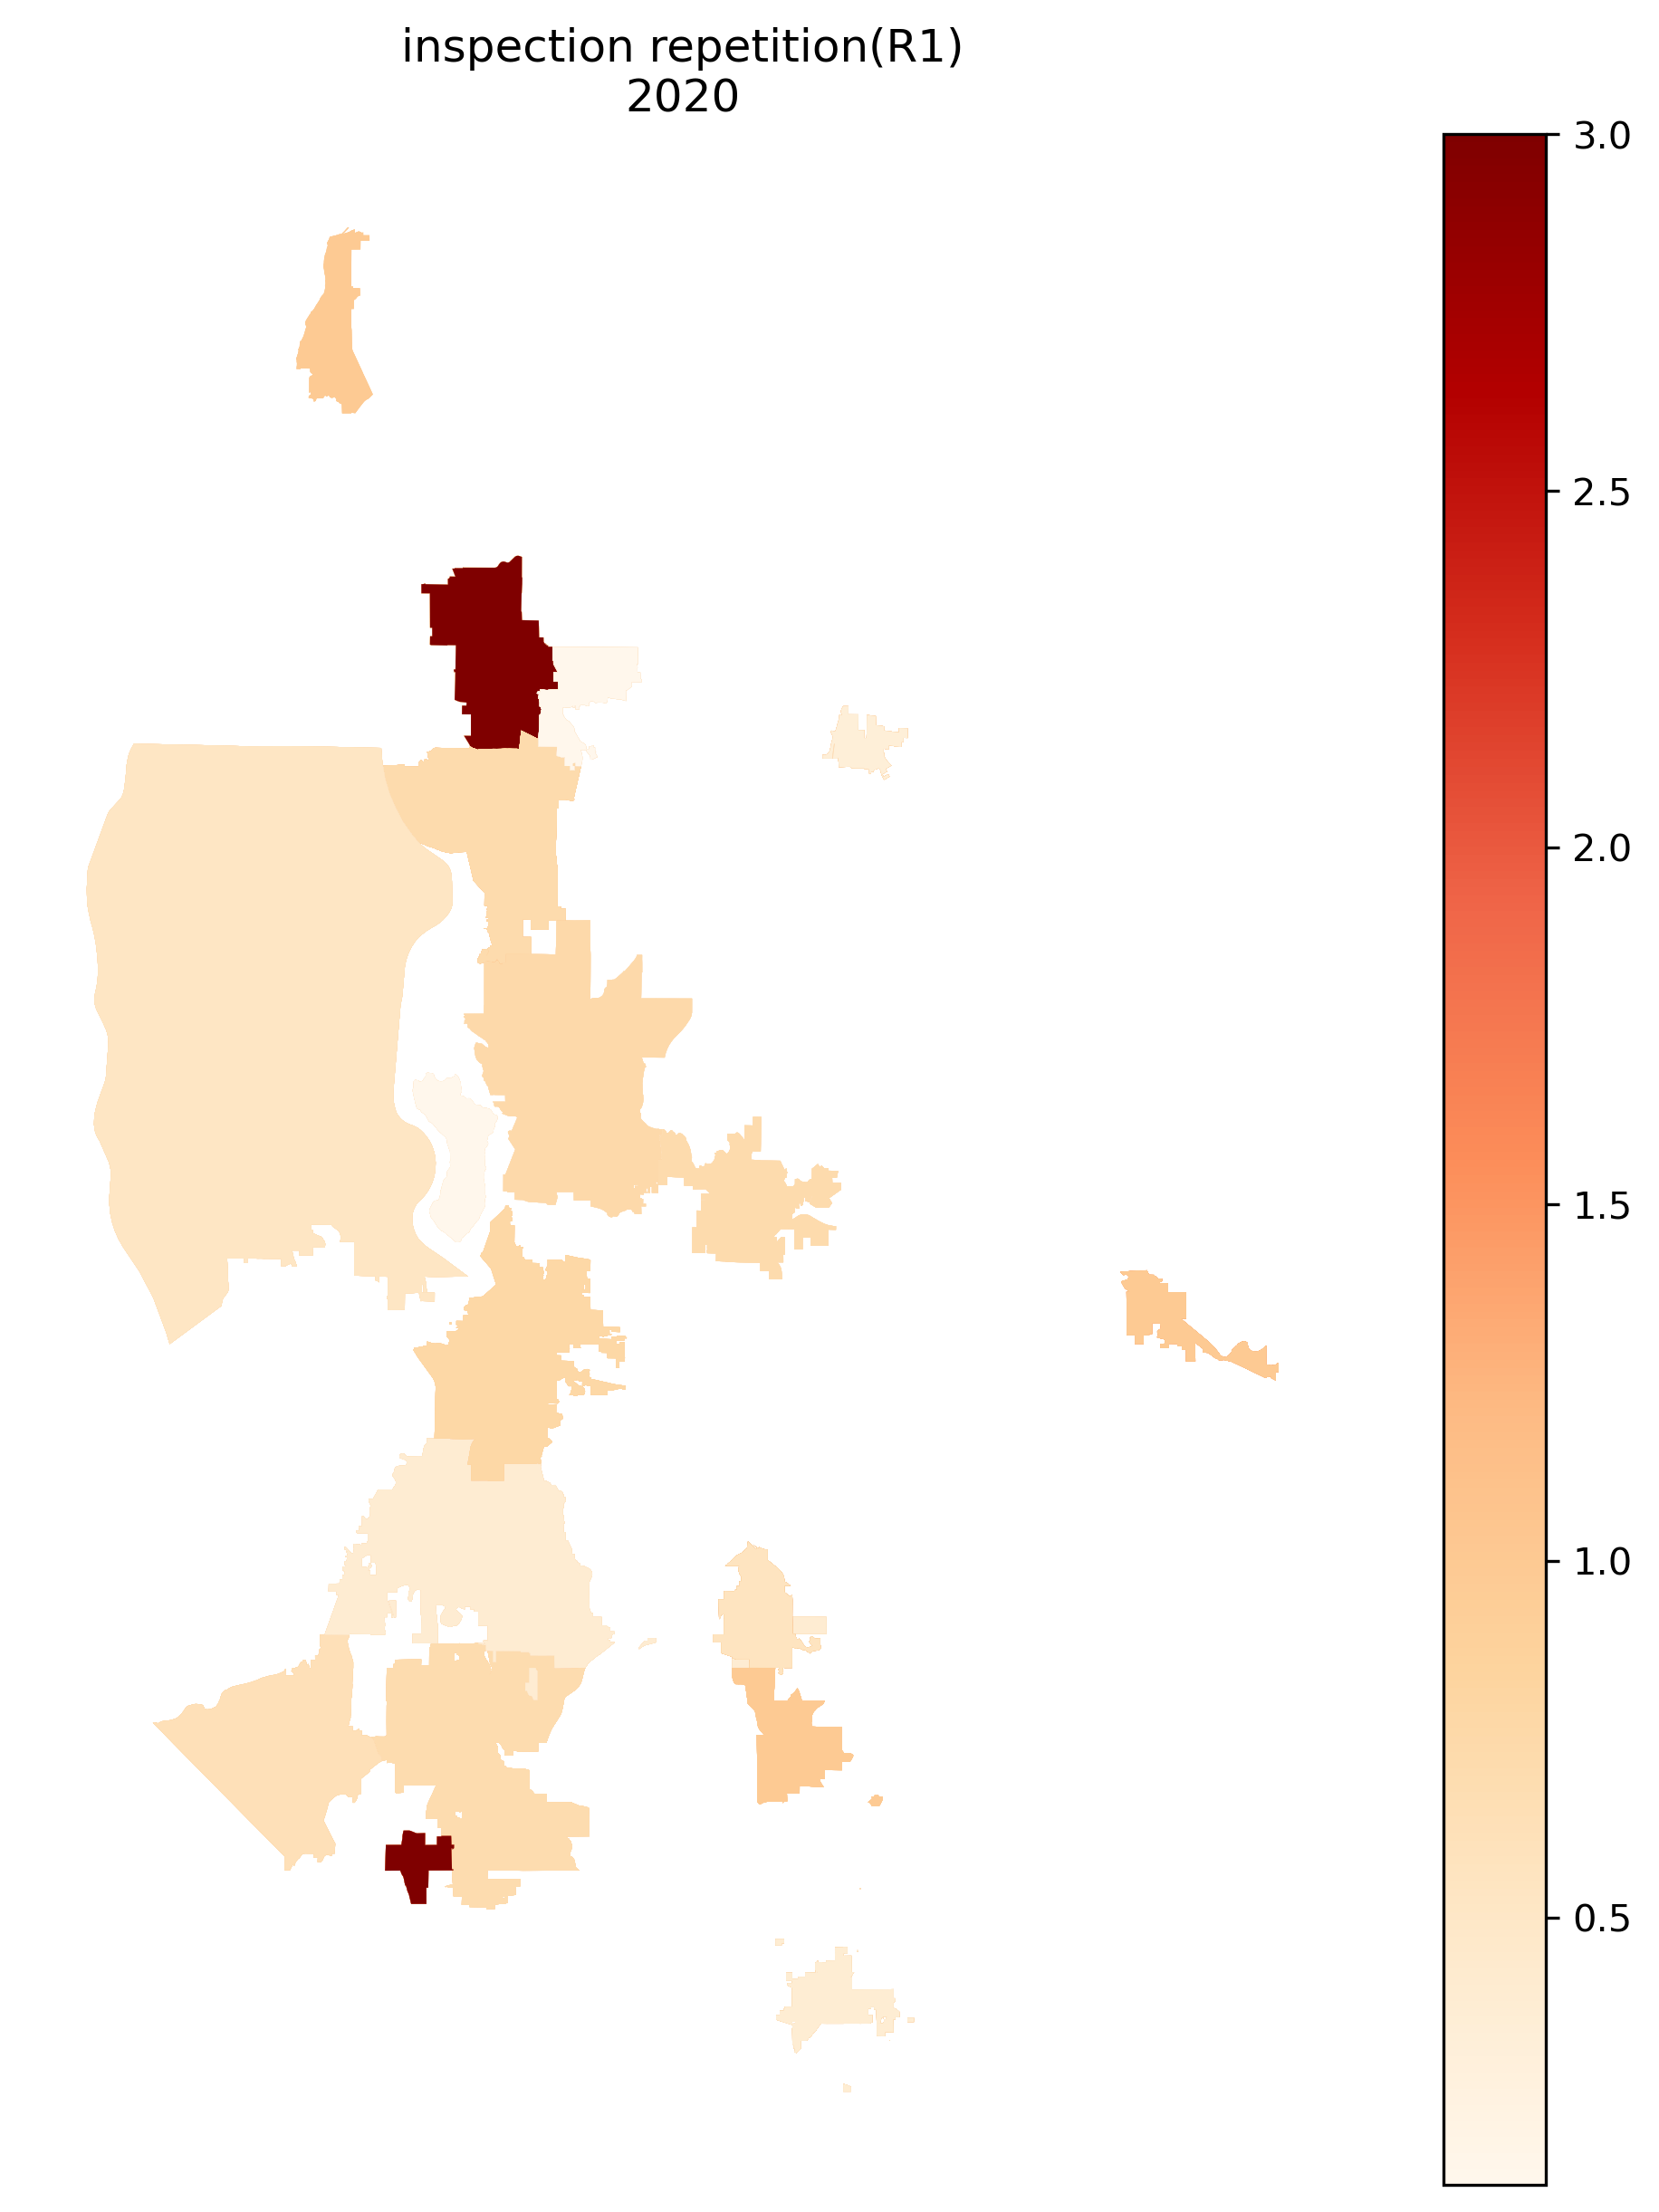

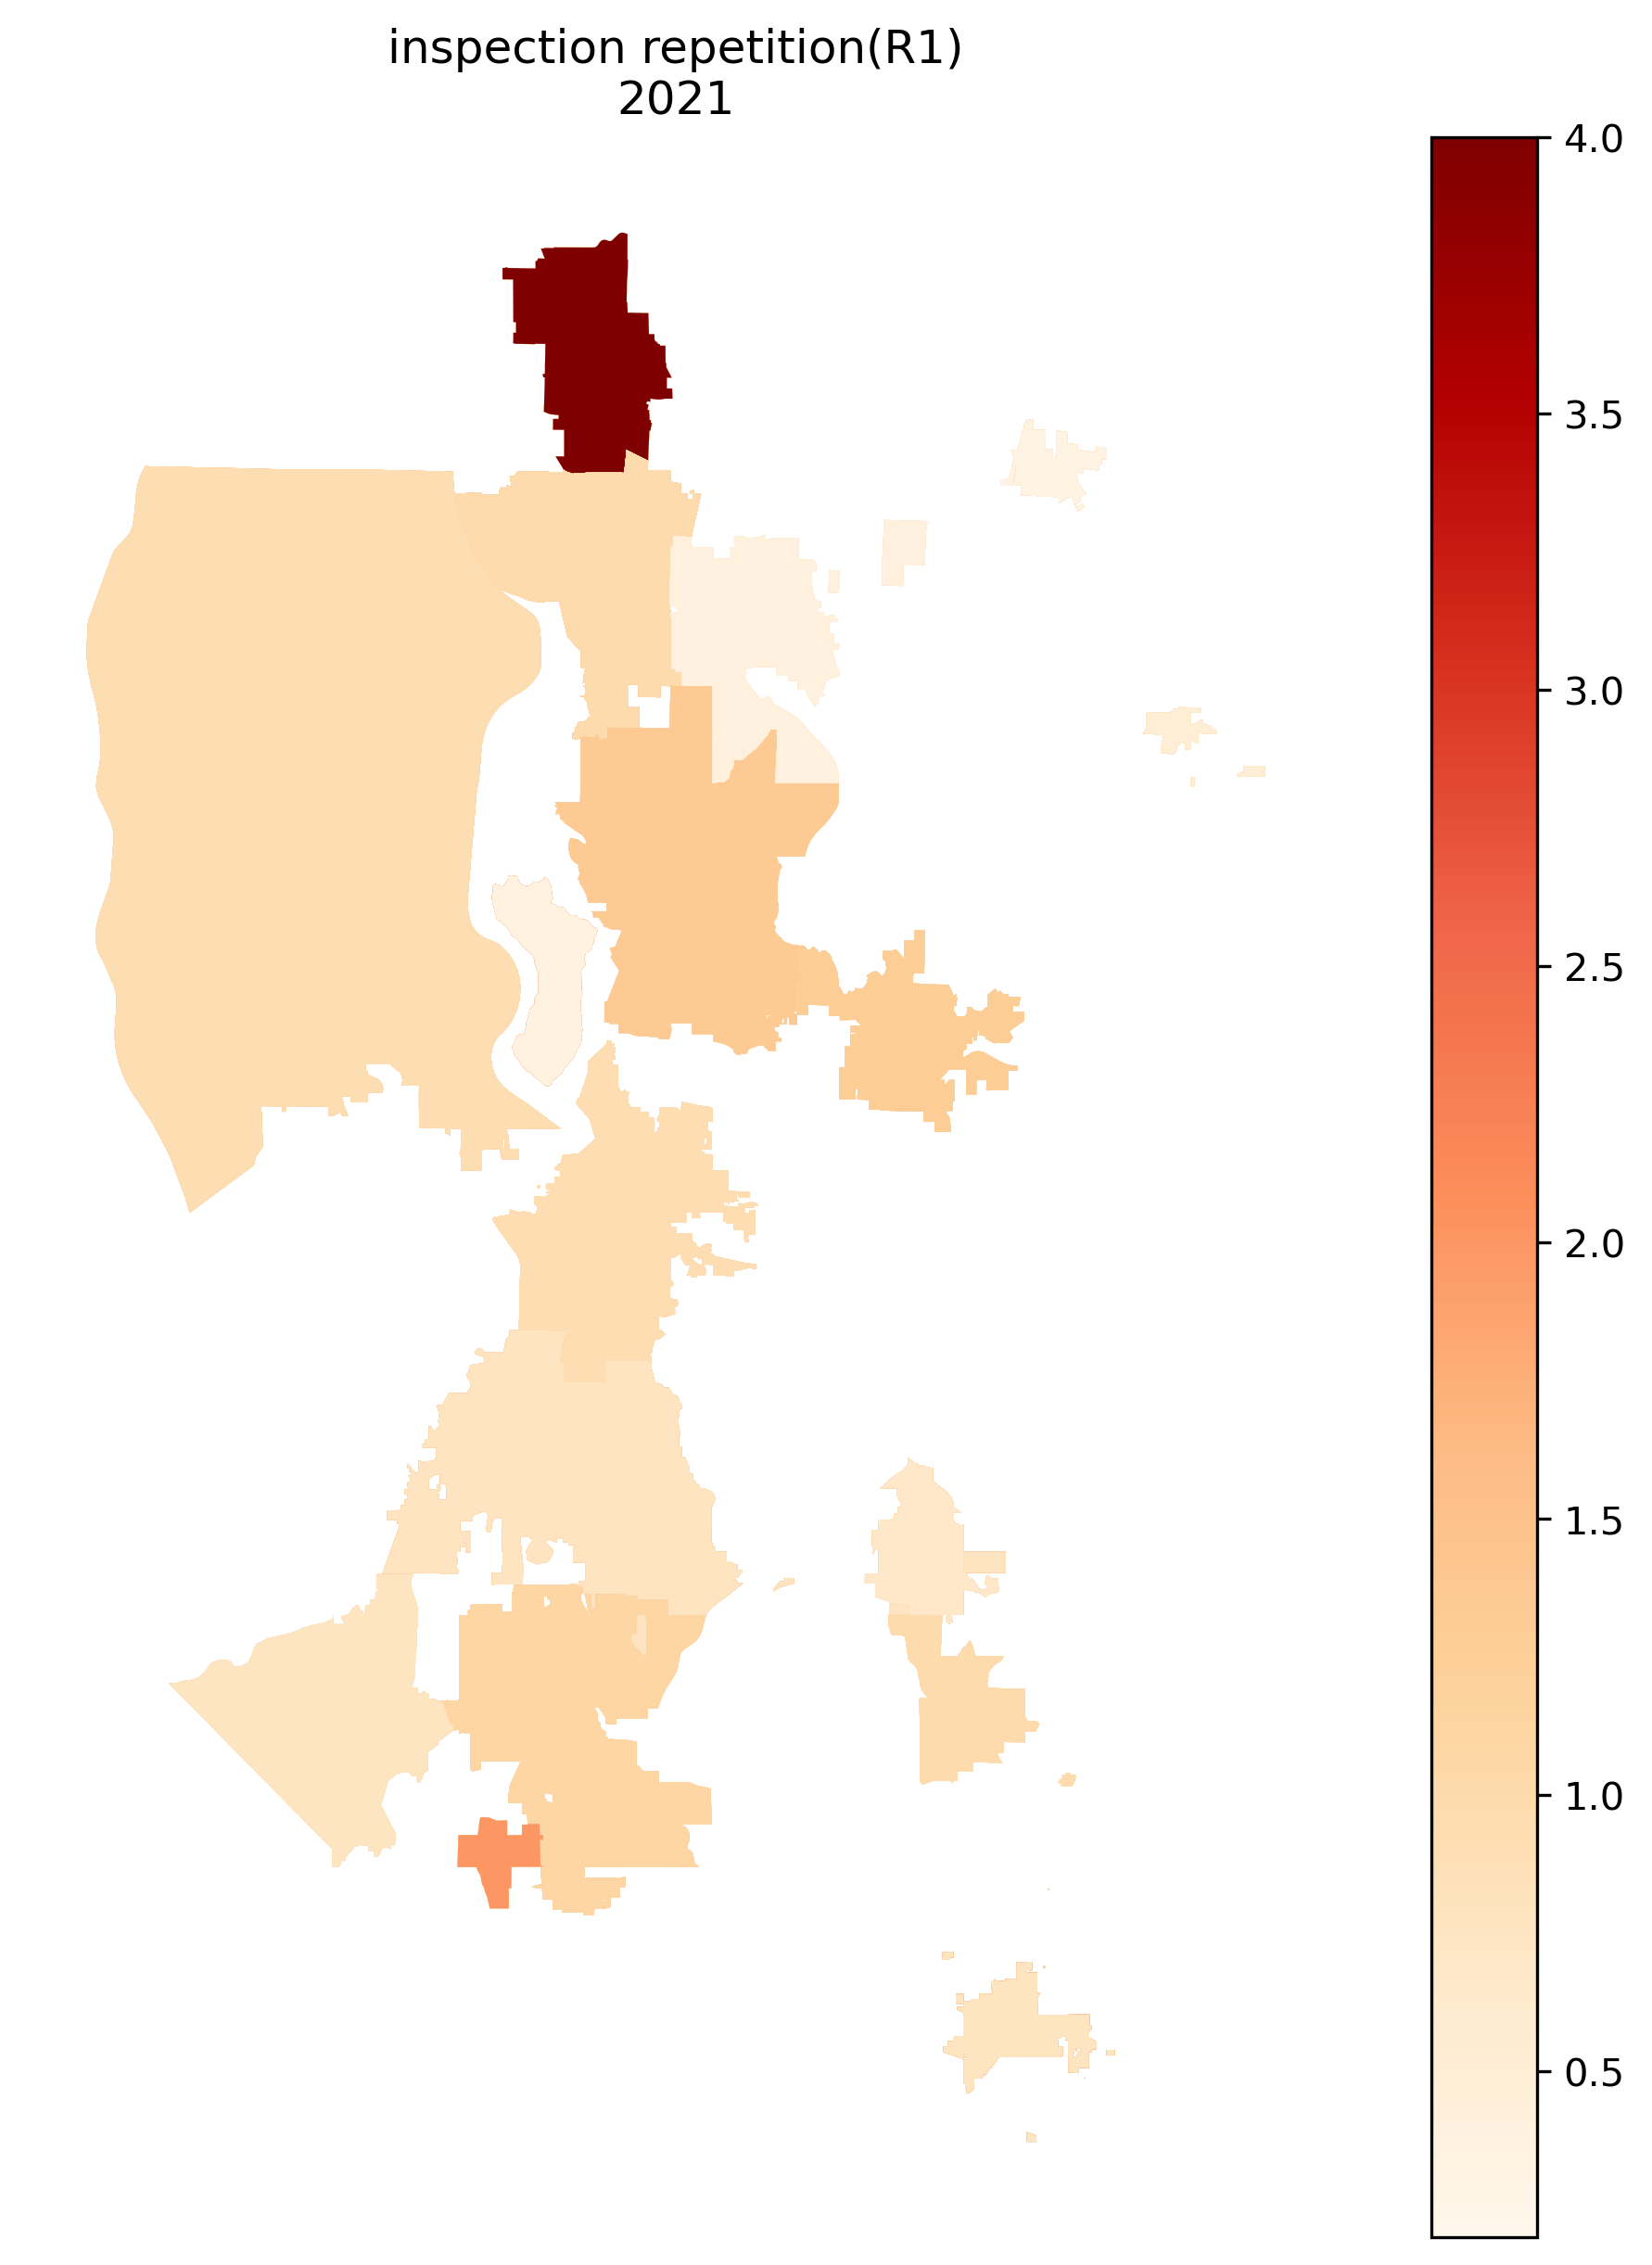

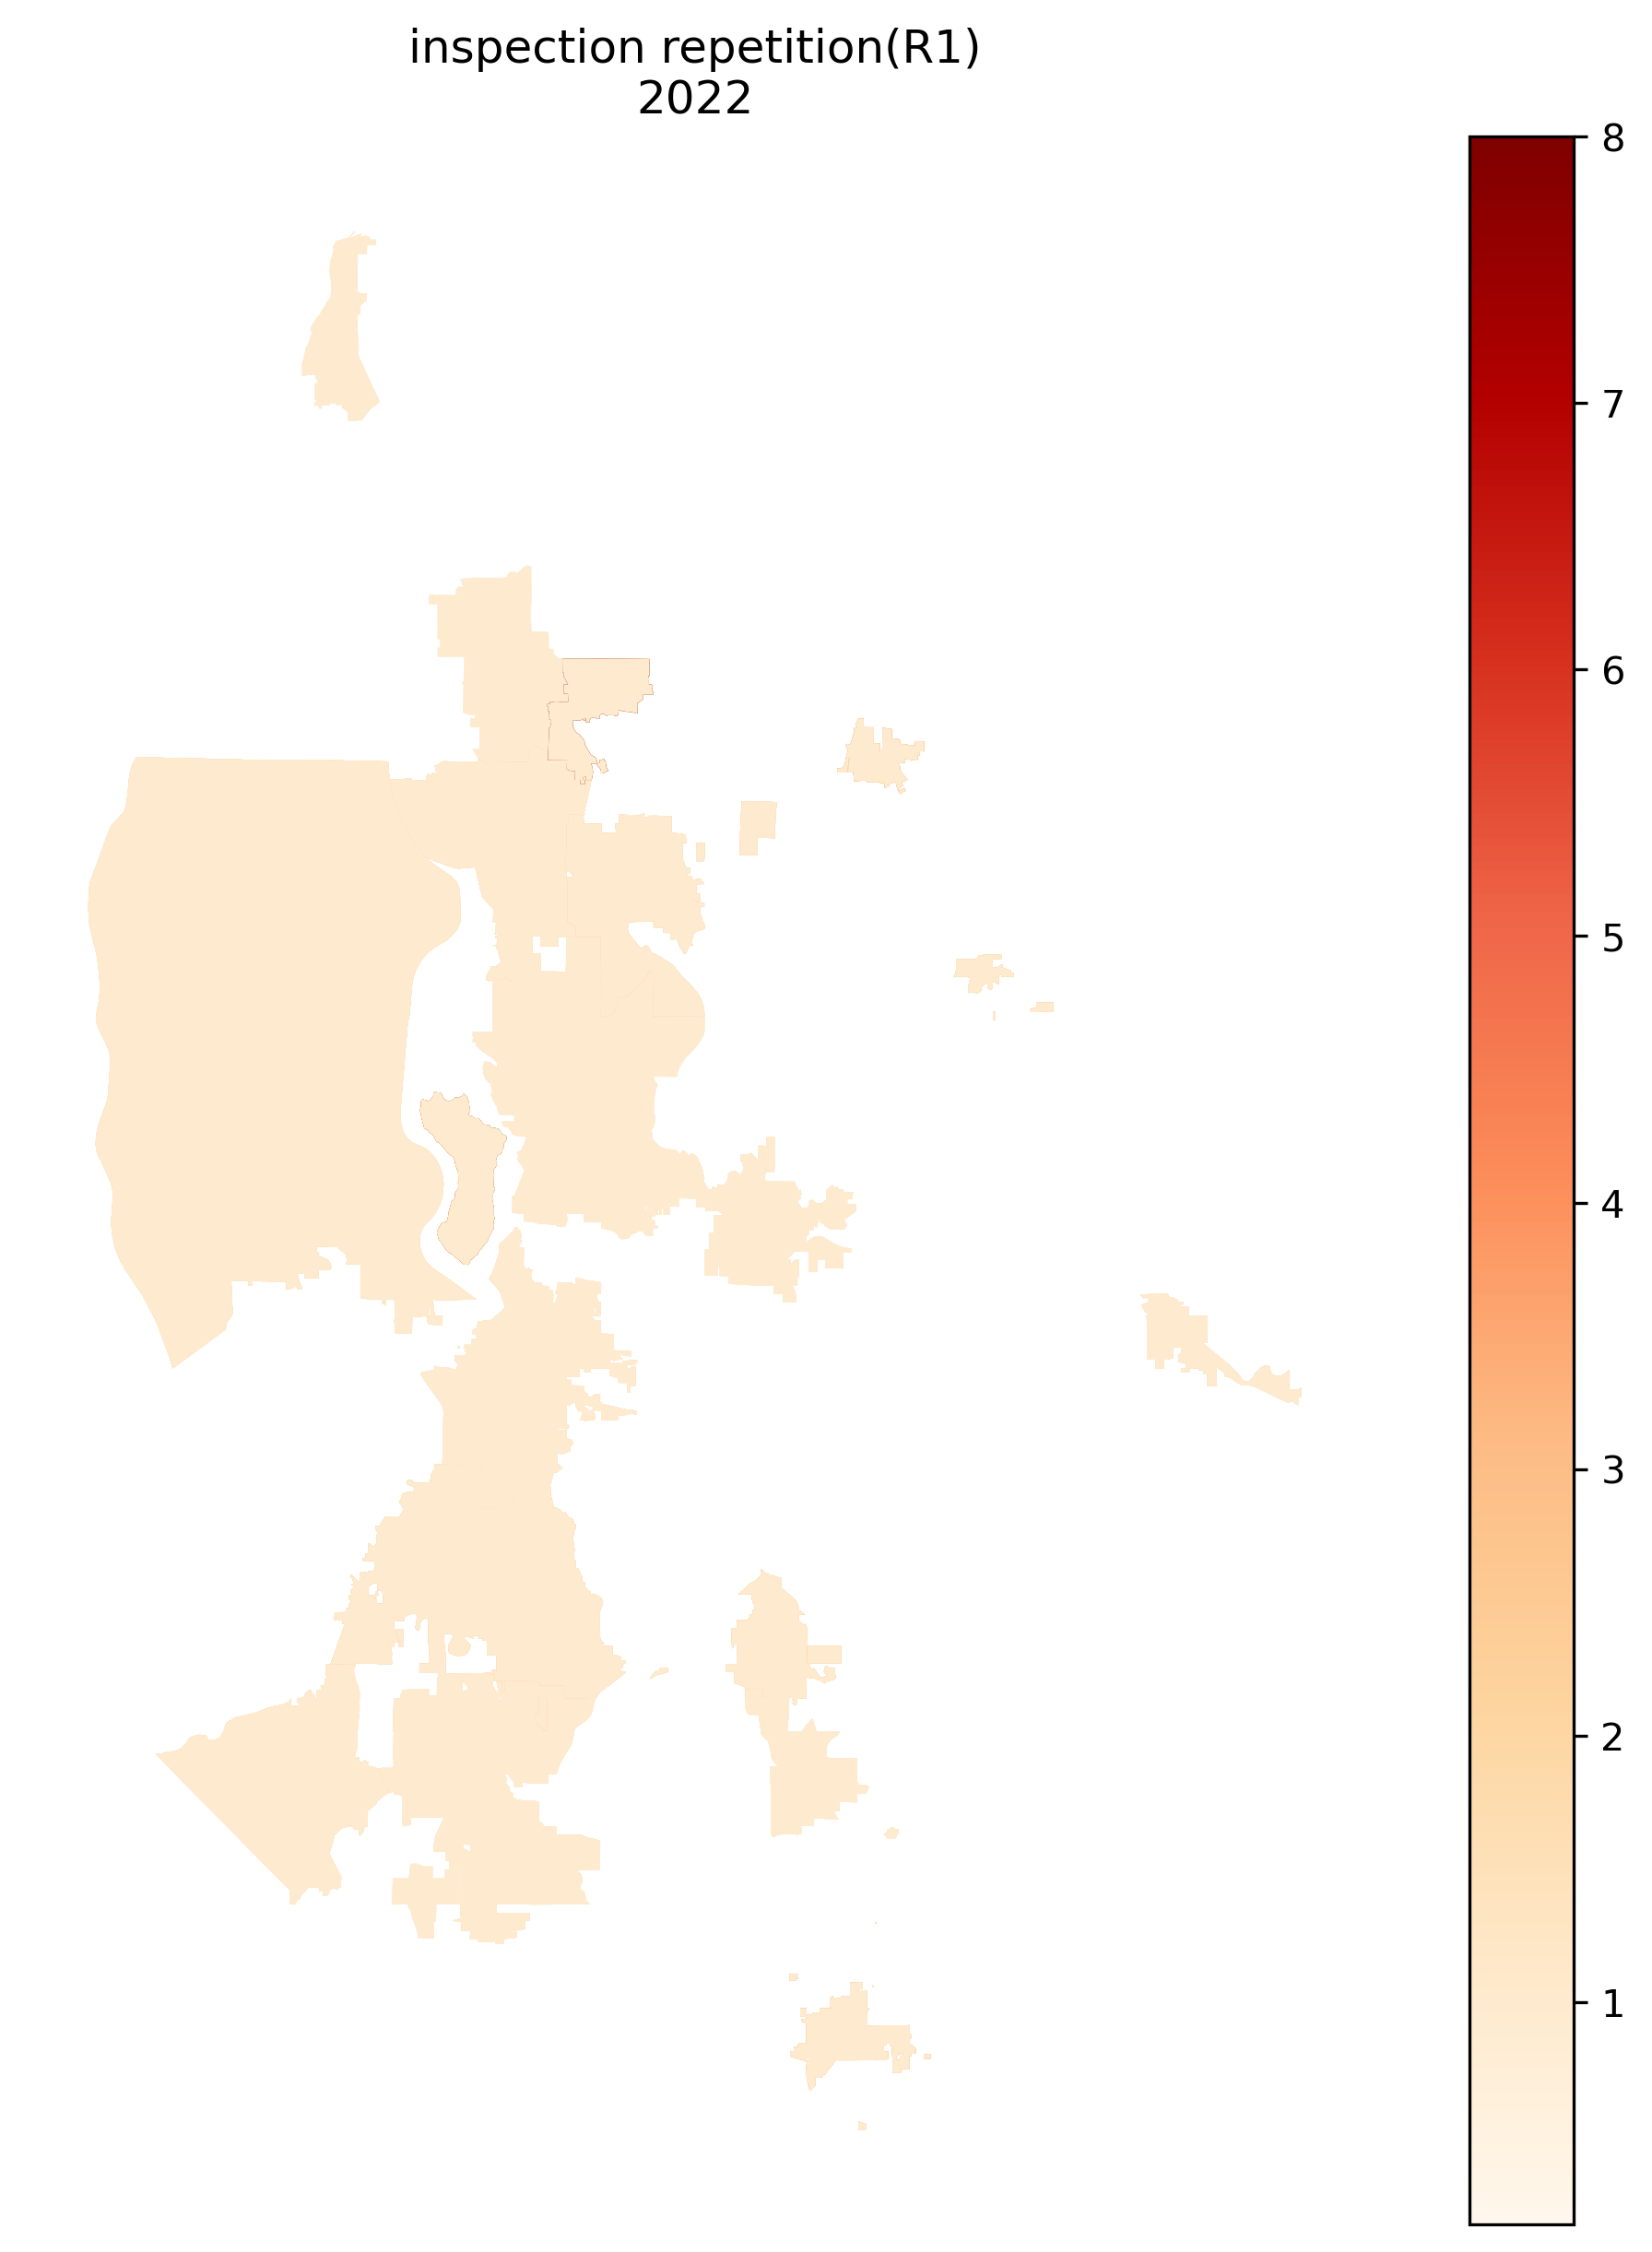

In [109]:
for year in range(2006, 2023):
    fig,ax = plt.subplots(1,1,figsize = (10,10),dpi = 300)
    geopandas.GeoDataFrame(R1_final3[R1_final3["year_x"]==year],geometry= "geometry").plot(column="inspection_per_rest",legend=True, cmap='OrRd' ,label ="inspection repetition" , ax = ax)
    # plt.axis("off")
    # plt.legend()
    # ax.set
    # plt.savefig("")
    ax.set_axis_off()
    # ax.legend(title = "Proportion")
#     ax.legend(fontsize=20,
          
#           loc=(1, .1),
#           title="LEGEND")

    ax.set_title(f"inspection repetition(R1)\n{year}")
    plt.savefig(f"IPR_{year}.jpeg" , bbox_inches = "tight")
    plt.show()

# capacity

طبقه بندی براساس نوع رستوران
و بدست اوردن میزان بازرسی انجام شده به ازای هر رستوران ان دسته

In [135]:
R_sum=df.groupby(['year','capacity'],as_index=False).count()
R_sum1=R_sum[['year','capacity','Business_ID']]
R_sum1

year                  capacity  Business_ID
0    2006.0         Bakery-no seating          211
1    2006.0         Bed and Breakfast            2
2    2006.0                   Caterer           60
3    2006.0  Grocery Store-no seating          457
4    2006.0     Limited Food Services           37
..      ...                       ...          ...
232  2022.0              Seating 0-12         4117
233  2022.0             Seating 13-50         5876
234  2022.0           Seating 151-250          602
235  2022.0            Seating 51-150         4247
236  2022.0             Seating > 250          304

[237 rows x 3 columns]

In [132]:
R_capacity=df.groupby(["year" ,'capacity'],as_index=False).count()
R_capacity=R_capacity[['year','capacity','Inspection Date']]
R_capacity

year                  capacity  Inspection Date
0    2006.0         Bakery-no seating              211
1    2006.0         Bed and Breakfast                2
2    2006.0                   Caterer               60
3    2006.0  Grocery Store-no seating              457
4    2006.0     Limited Food Services               37
..      ...                       ...              ...
232  2022.0              Seating 0-12             4117
233  2022.0             Seating 13-50             5876
234  2022.0           Seating 151-250              602
235  2022.0            Seating 51-150             4247
236  2022.0             Seating > 250              304

[237 rows x 3 columns]

In [137]:
R_final=(pd.merge(left=R_sum1 , right= R_capacity , left_on= "capacity" , right_on="capacity" , how = "inner" ))
R_final

year_x           capacity  Business_ID  year_y  Inspection Date
0     2006.0  Bakery-no seating          211  2006.0              211
1     2006.0  Bakery-no seating          211  2007.0              232
2     2006.0  Bakery-no seating          211  2008.0              246
3     2006.0  Bakery-no seating          211  2009.0              264
4     2006.0  Bakery-no seating          211  2010.0              274
...      ...                ...          ...     ...              ...
4008  2022.0      Seating > 250          304  2018.0              578
4009  2022.0      Seating > 250          304  2019.0              525
4010  2022.0      Seating > 250          304  2020.0              144
4011  2022.0      Seating > 250          304  2021.0              239
4012  2022.0      Seating > 250          304  2022.0              304

[4013 rows x 5 columns]

In [138]:
R_final['inspection_per_rest']=R_final['Inspection Date']/R_final['Business_ID']

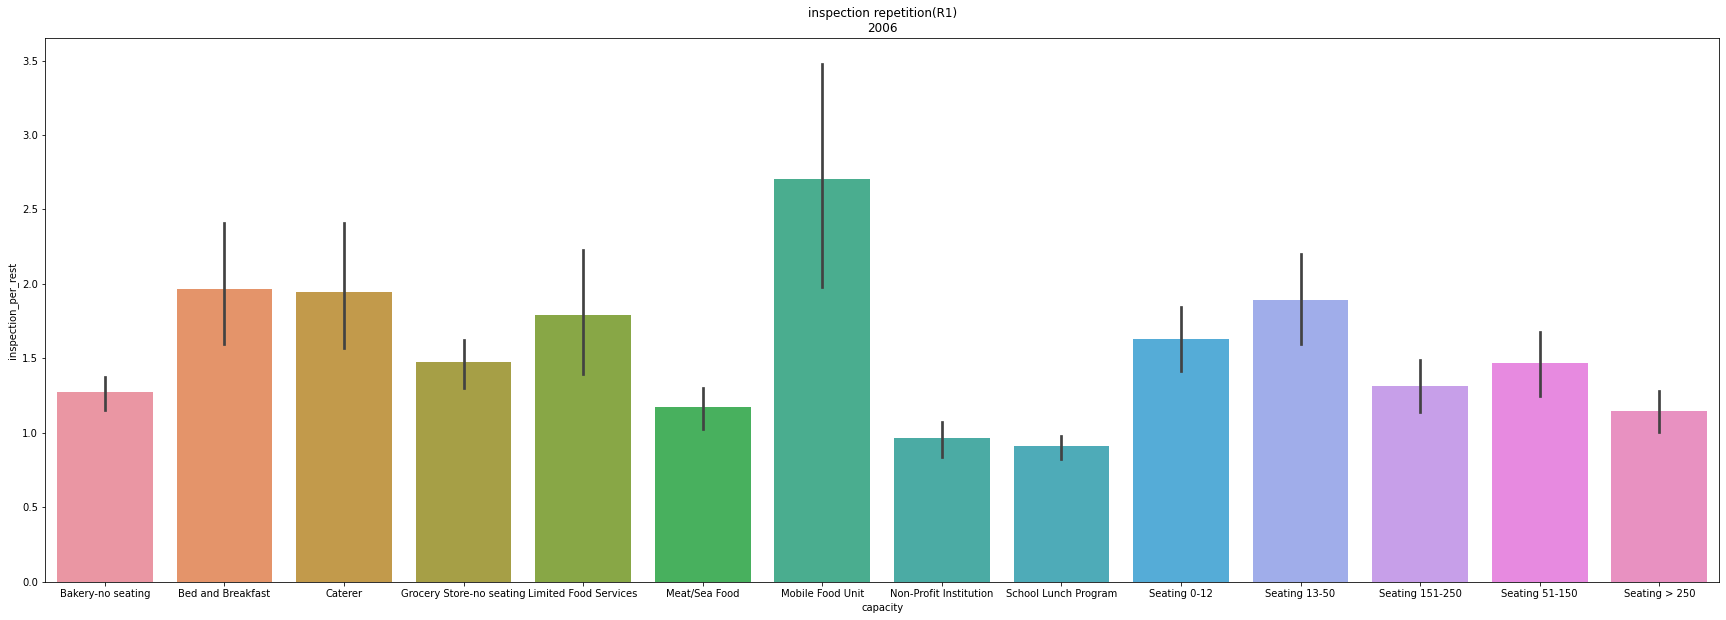

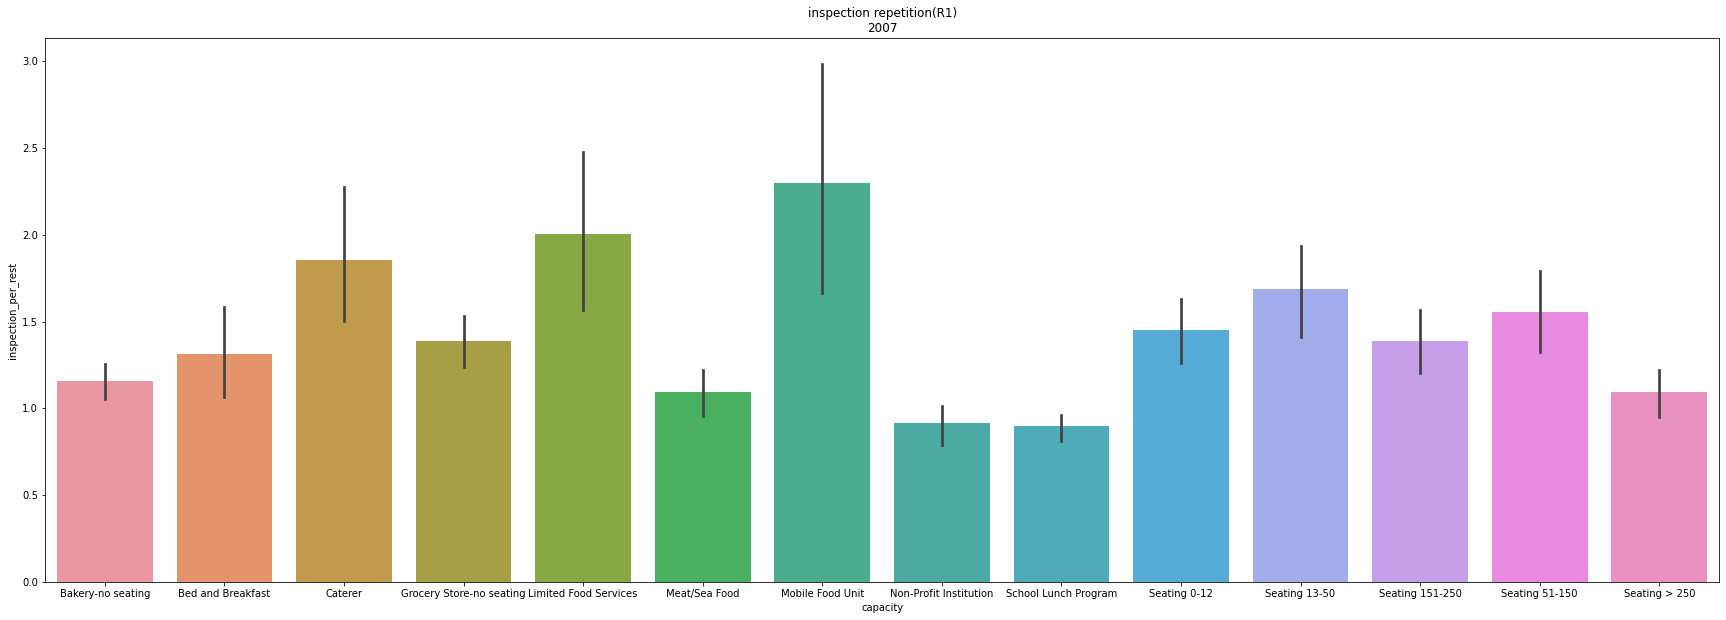

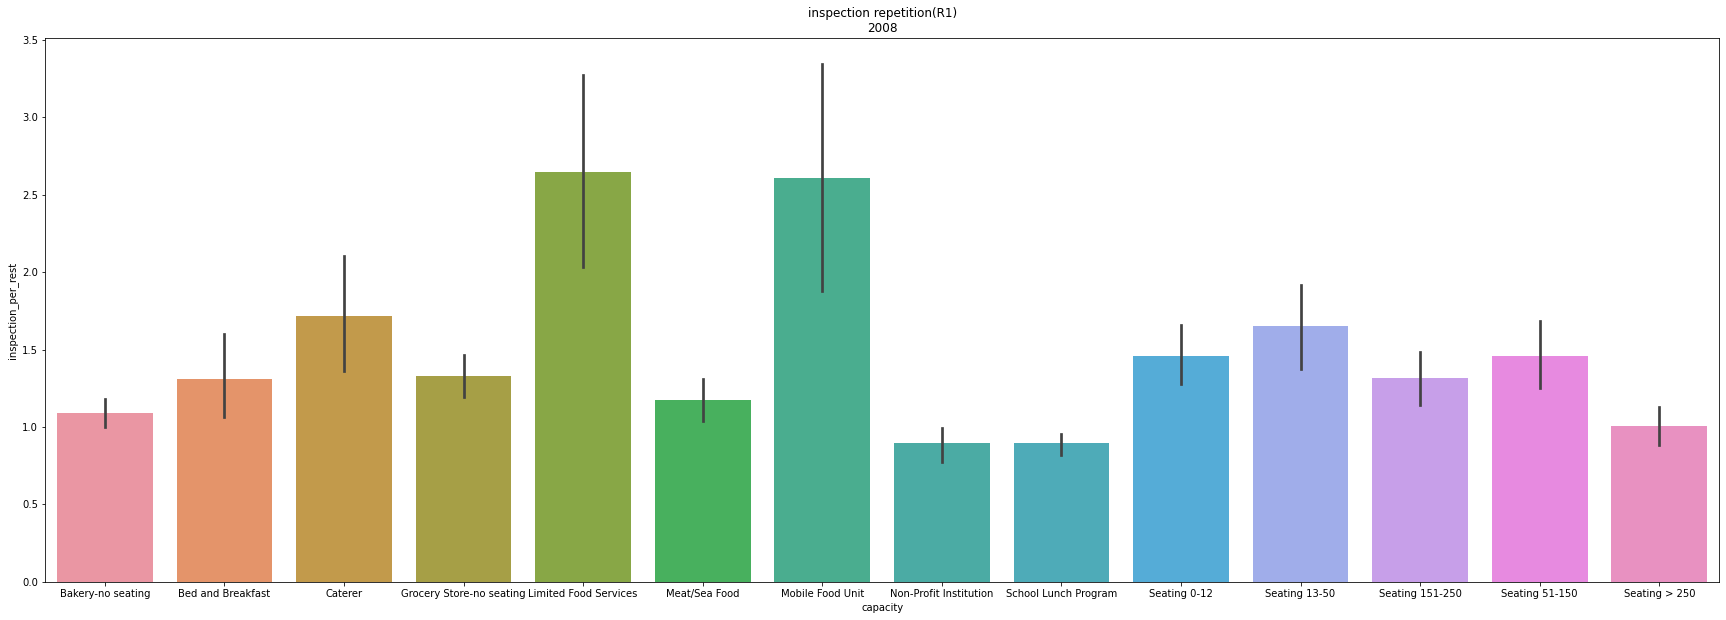

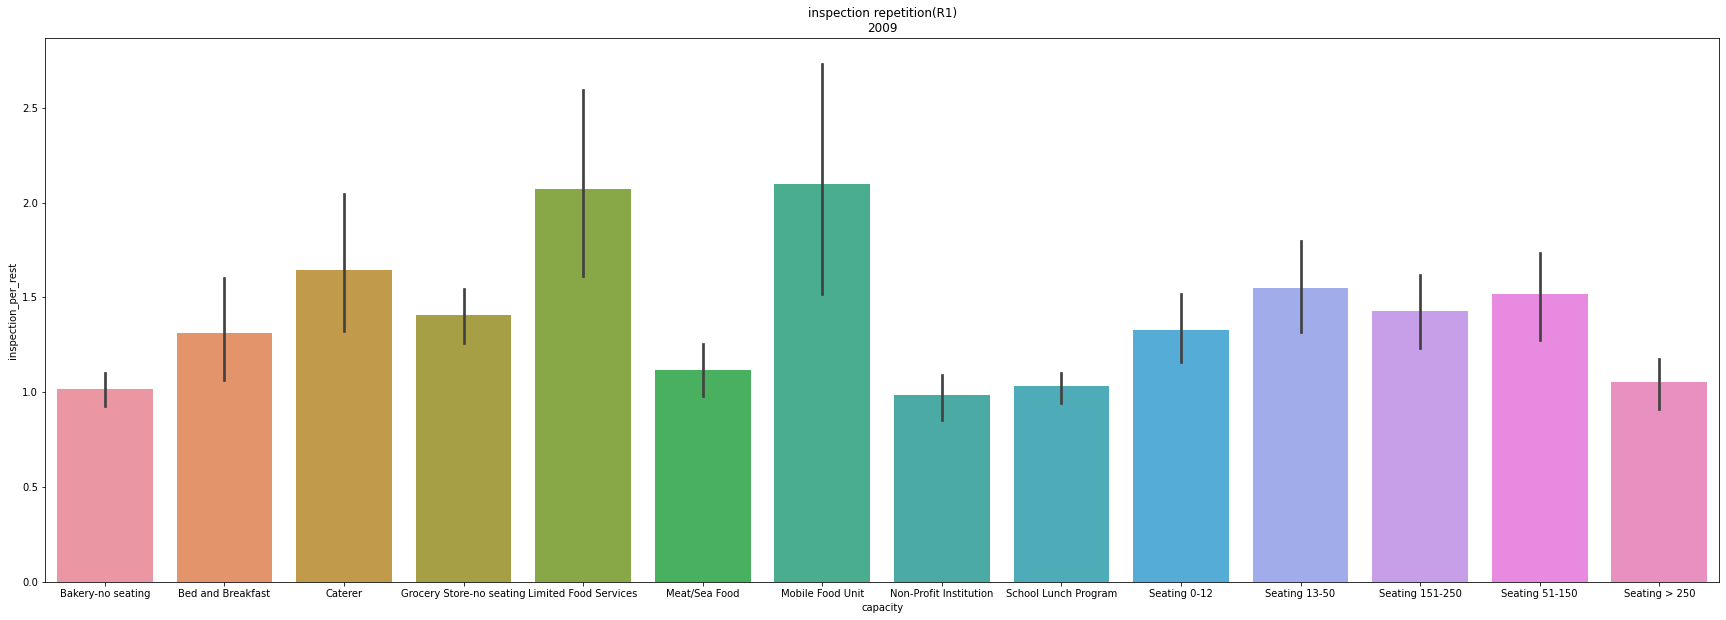

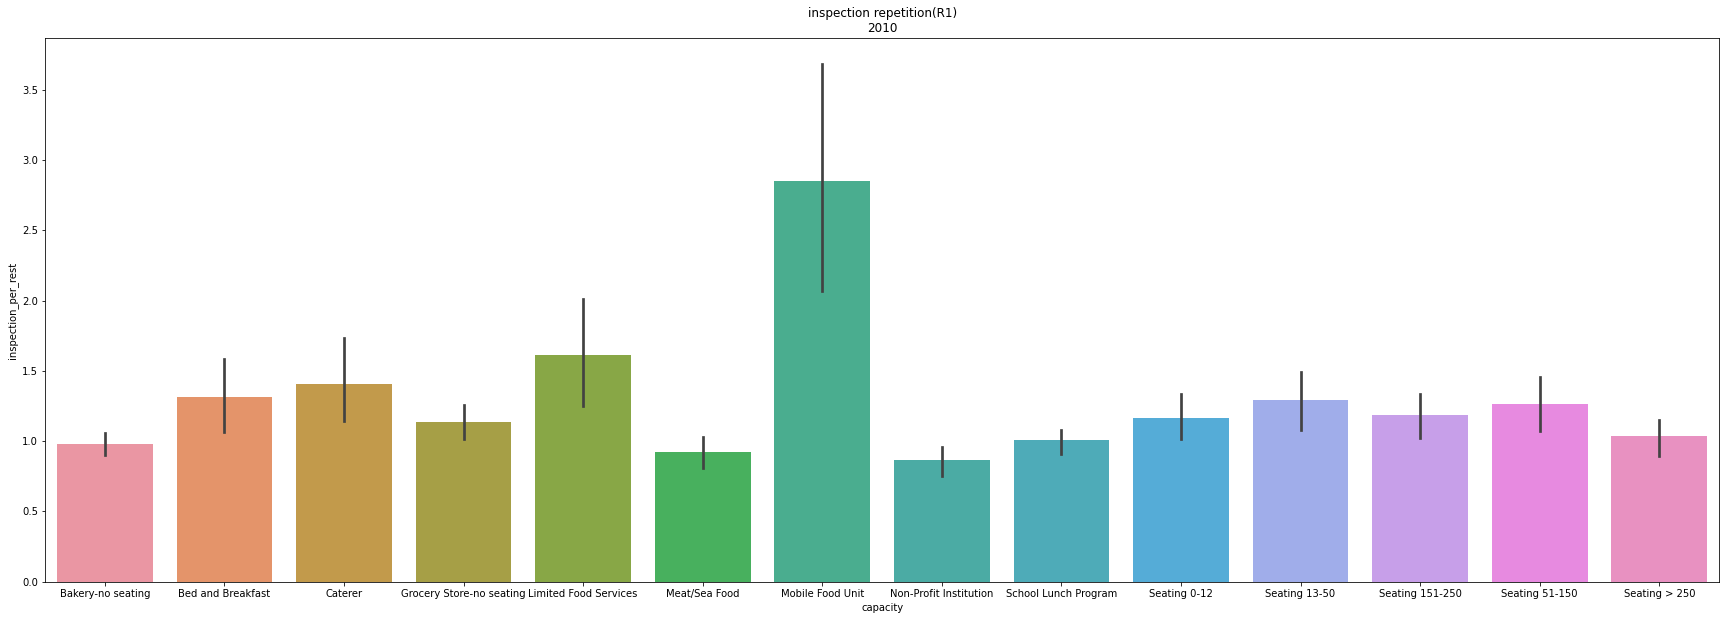

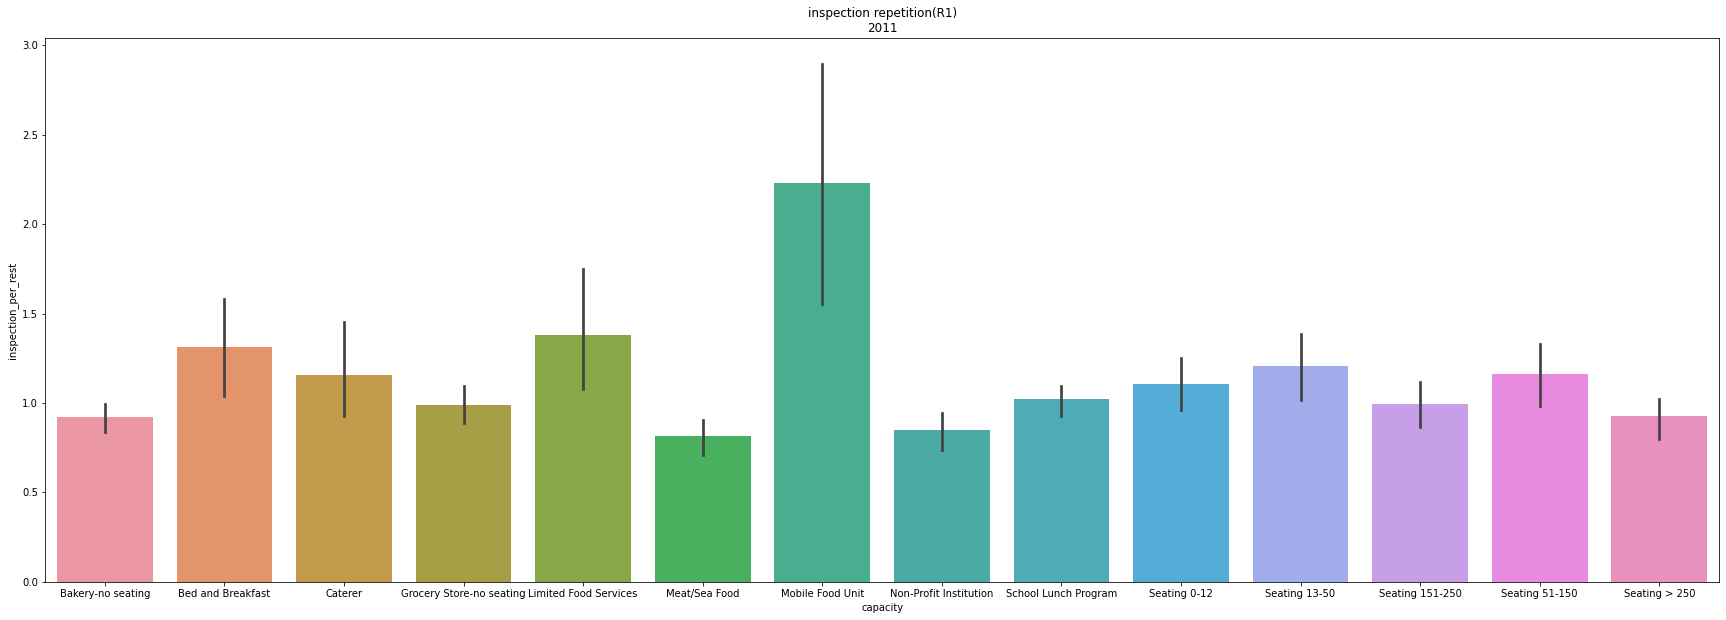

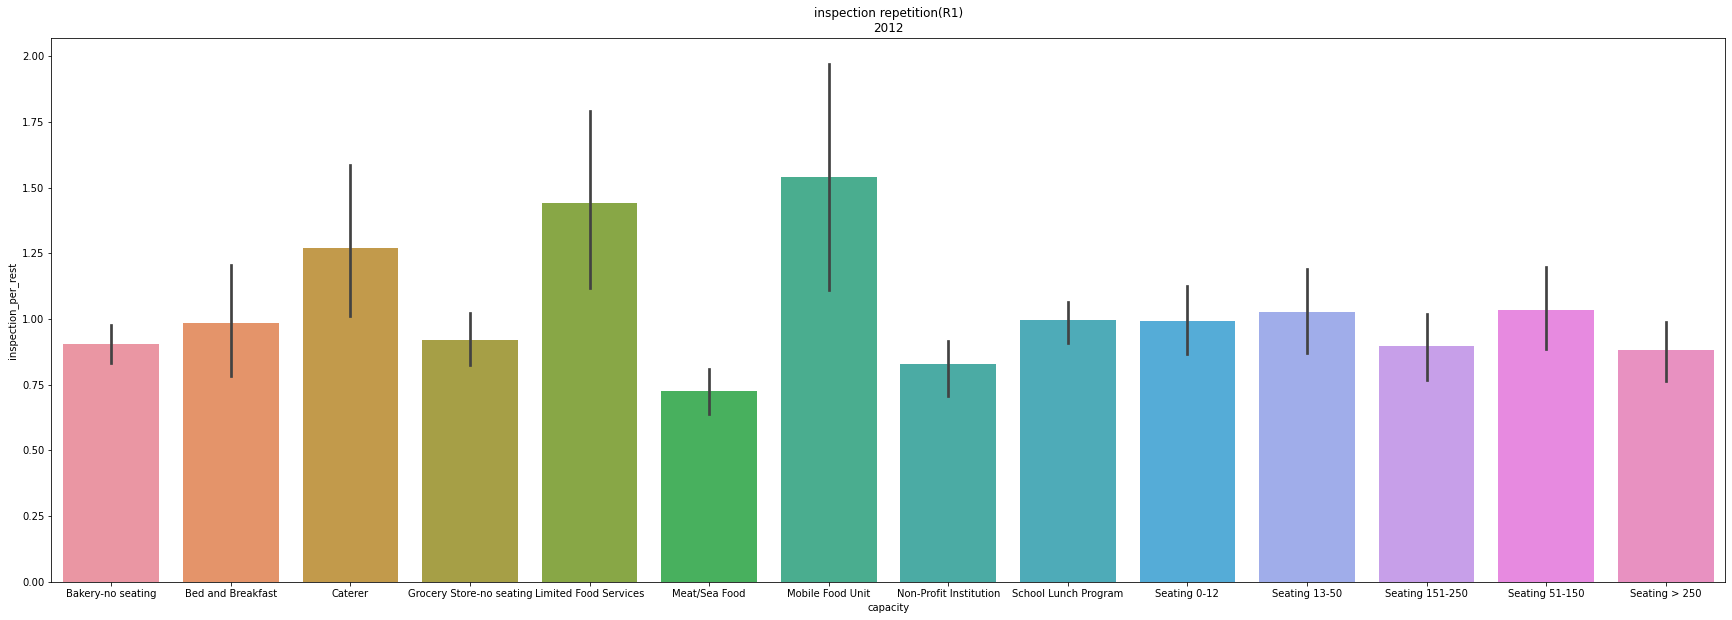

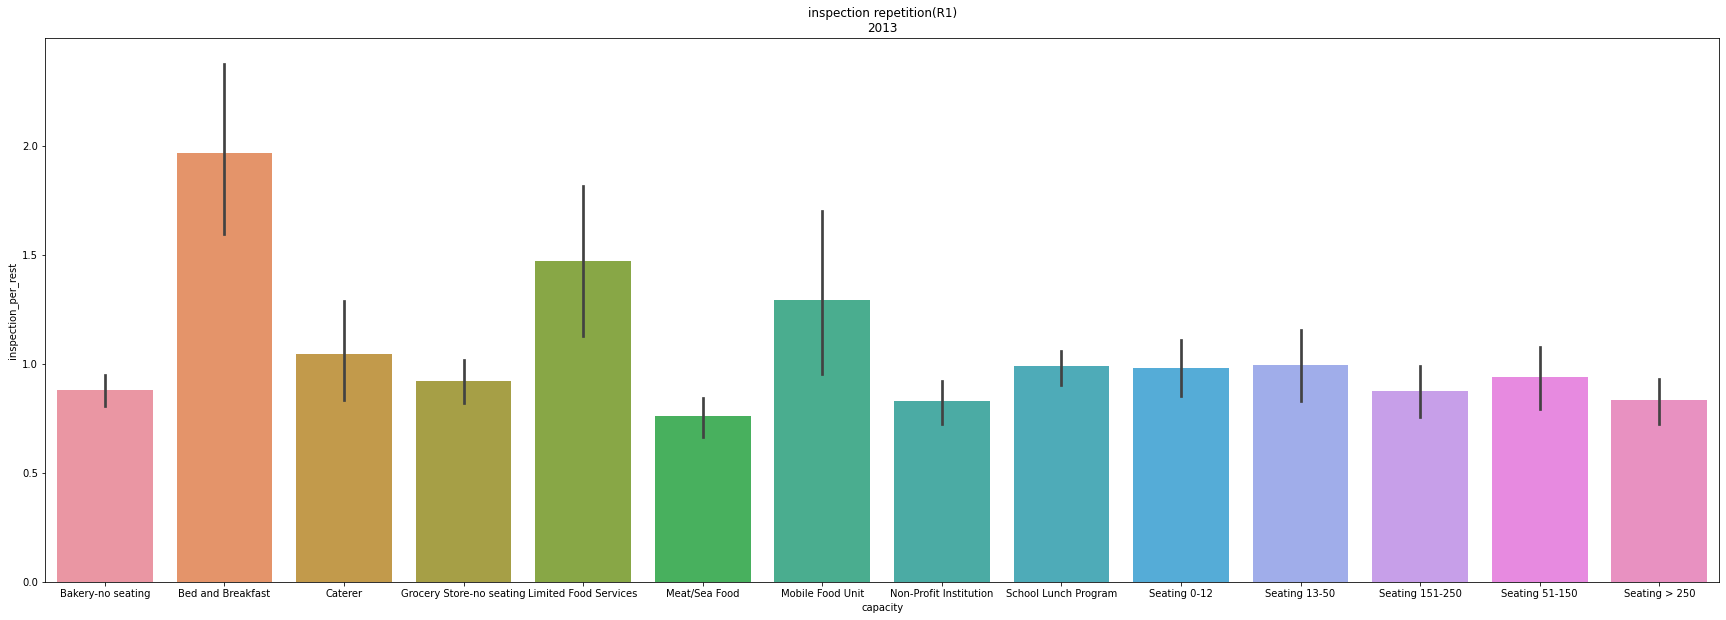

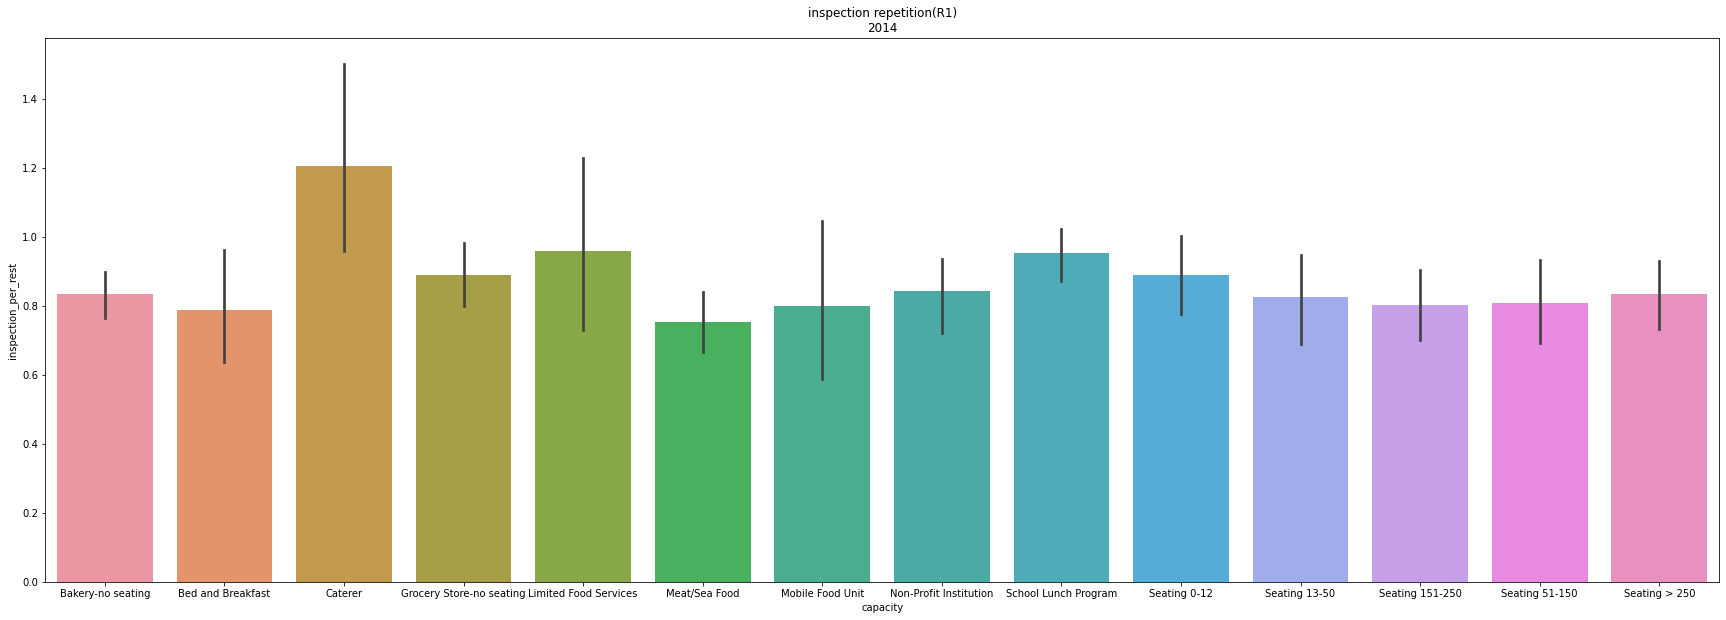

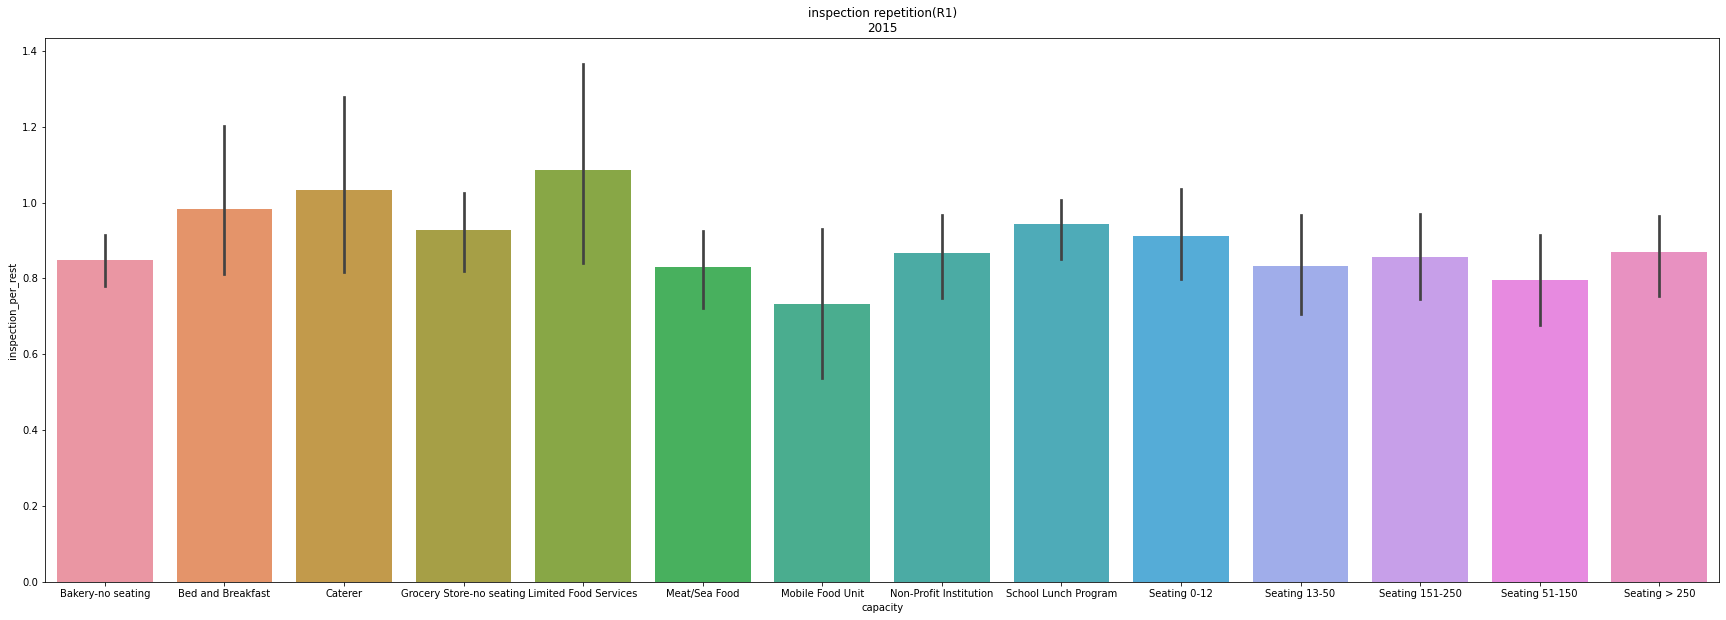

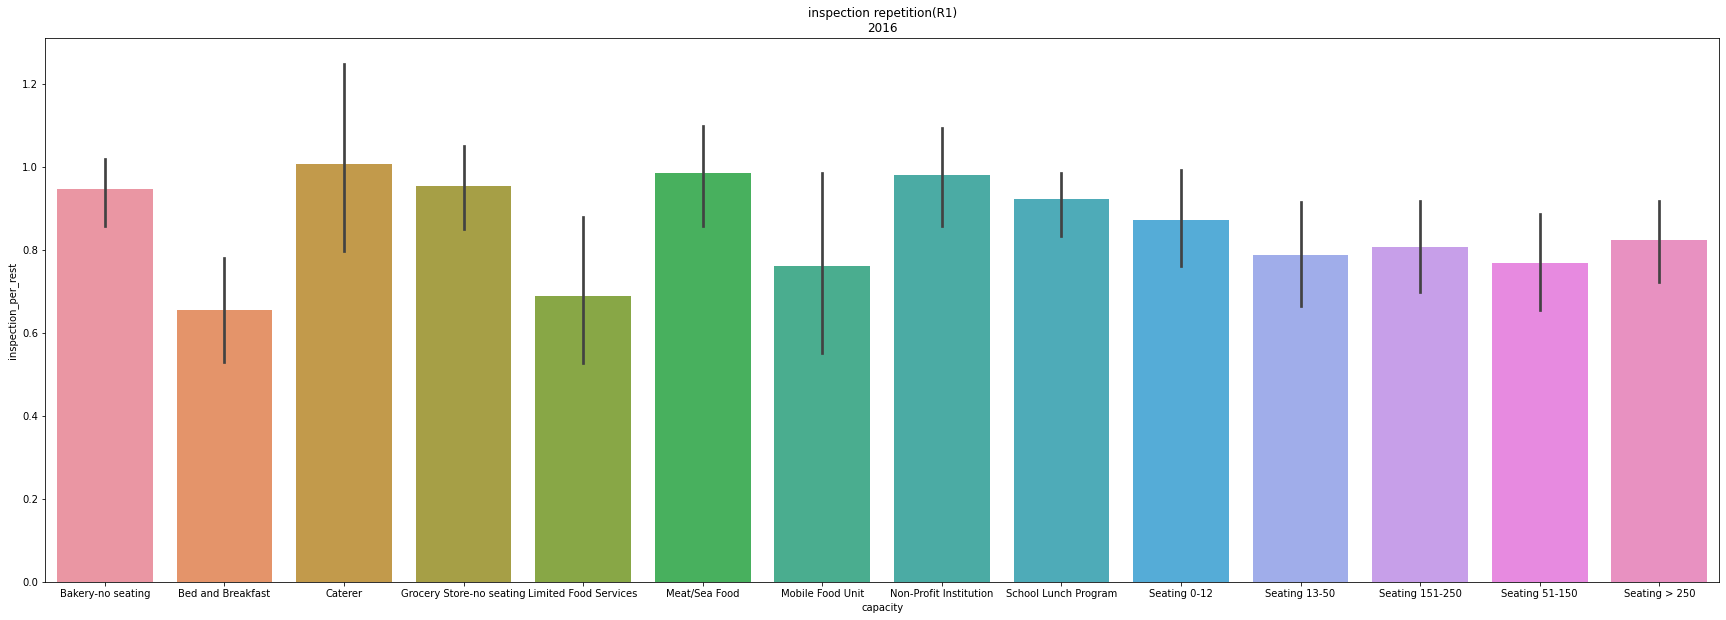

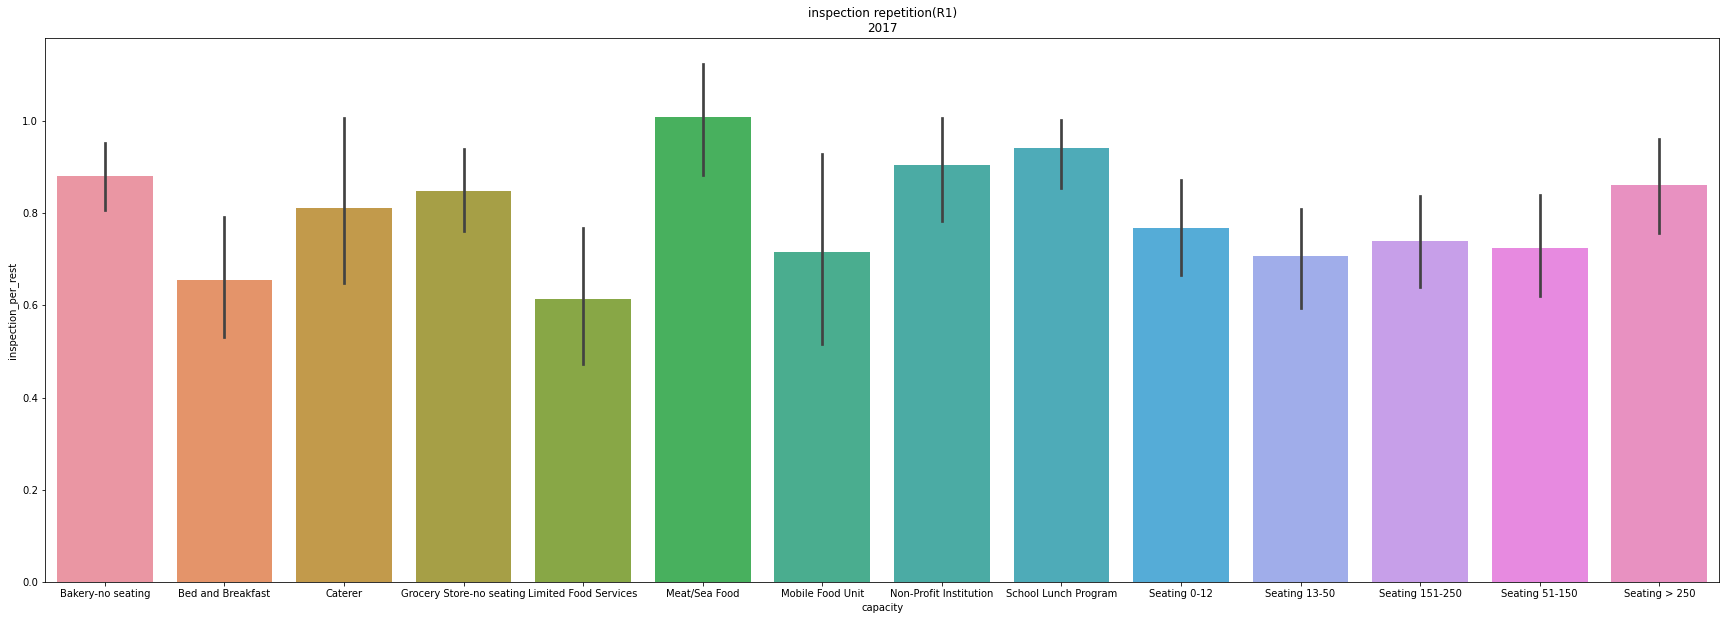

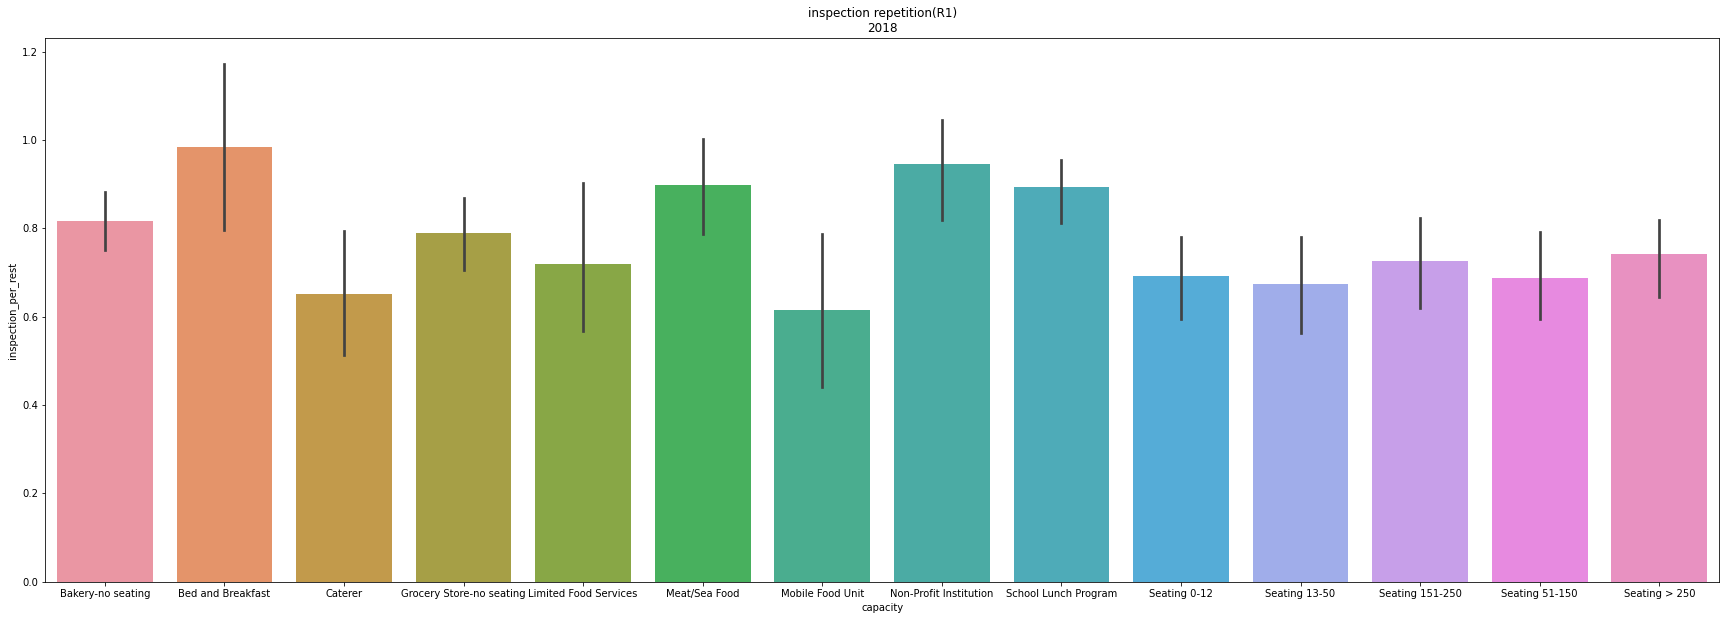

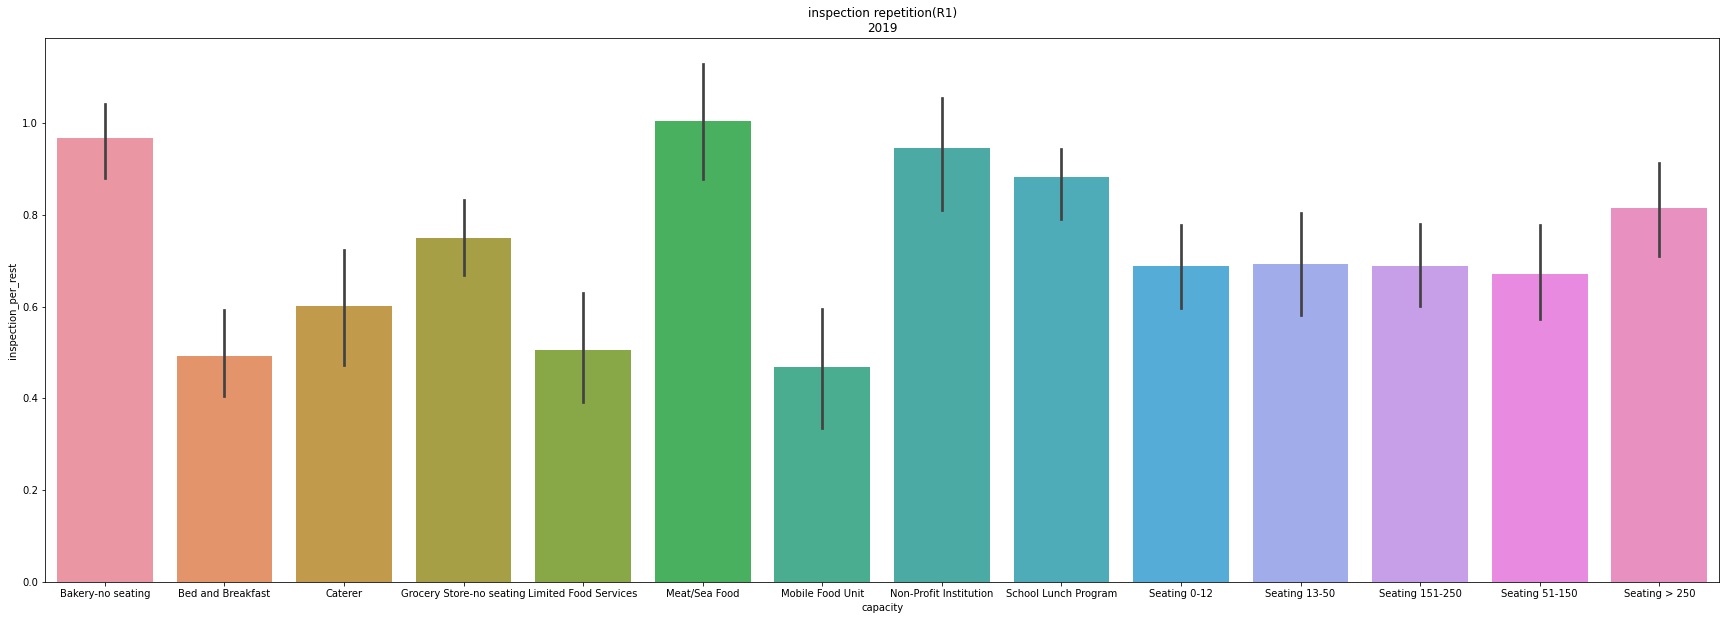

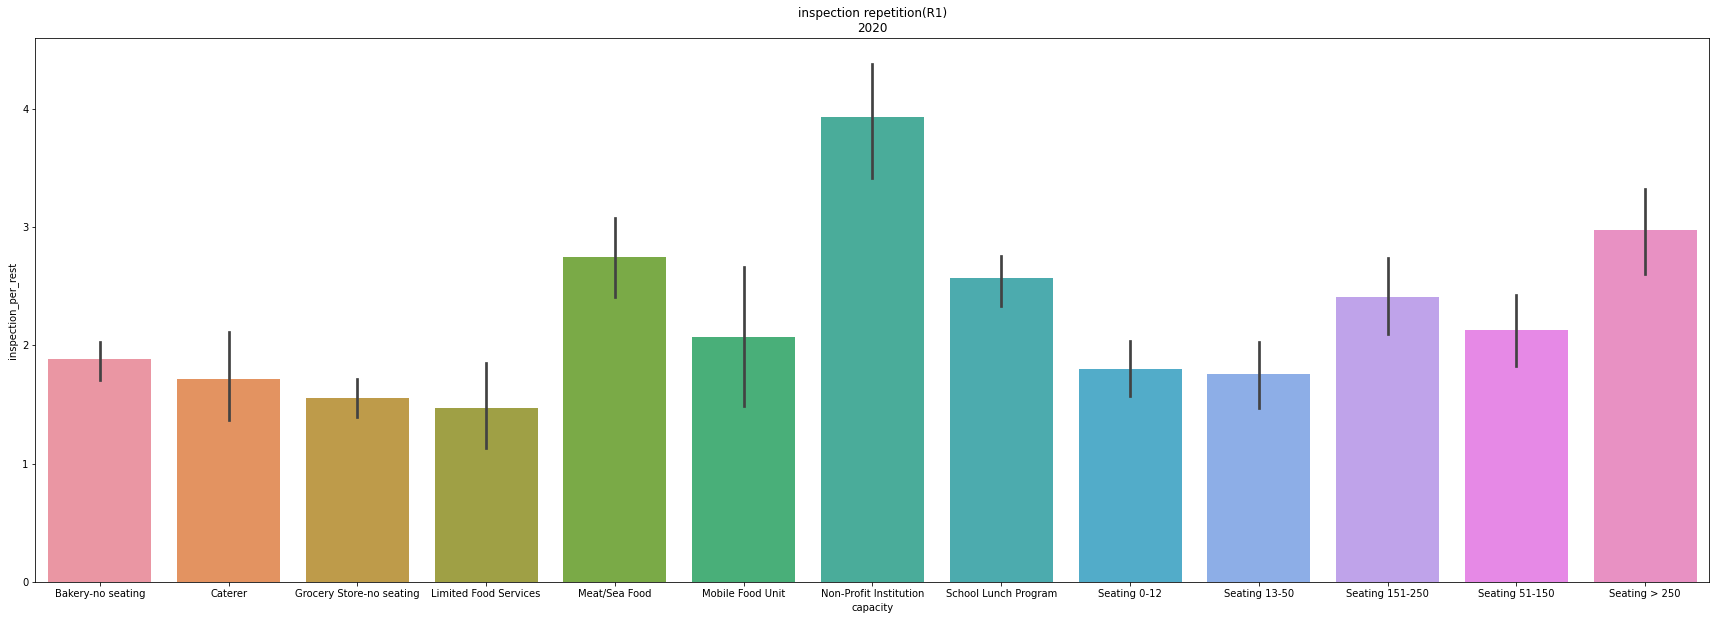

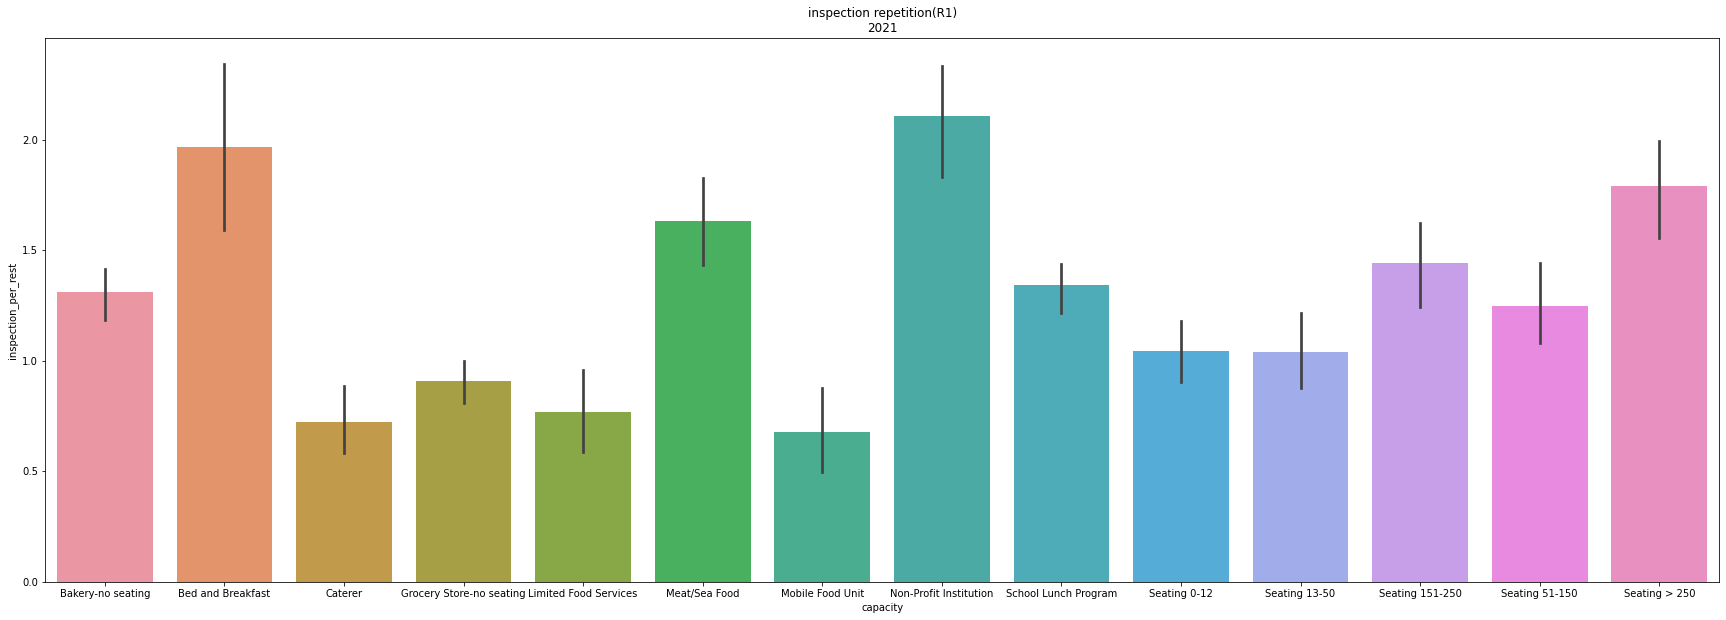

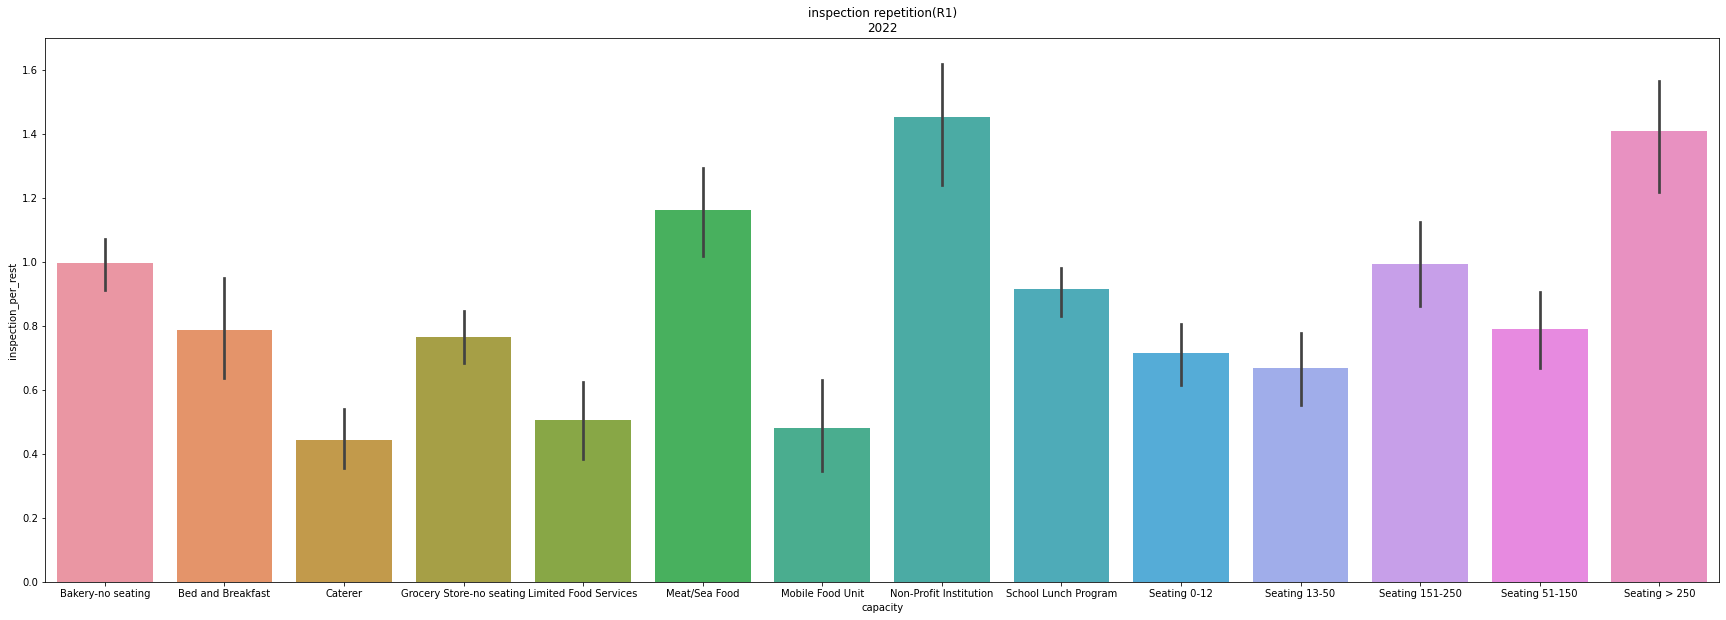

In [148]:
for year in range(2006, 2023):
    
    plt.figure(figsize=(30,10))
    
    data=R_final[R_final["year_x"]==year]
    sns.barplot(x='capacity',y='inspection_per_rest',data=data).set(title=f"inspection repetition(R1)\n{year}")
    
    
    
    plt.savefig(f"IPR_{year}.jpeg" , bbox_inches = "tight")
    plt.show()

0            Bakery-no seating
1            Bed and Breakfast
2                      Caterer
3     Grocery Store-no seating
4        Limited Food Services
5                Meat/Sea Food
6             Mobile Food Unit
7       Non-Profit Institution
8         School Lunch Program
9                 Seating 0-12
10               Seating 13-50
11             Seating 151-250
12              Seating 51-150
13               Seating > 250
Name: capacity, dtype: object
